In [4]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [5]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 200)

## data load

In [6]:
BASE_DIR = '../mnt/inputs/origin'
TRN_BASE_DIR = '../mnt/inputs/features/train'
TST_BASE_DIR = '../mnt/inputs/features/test'
# BASE_DIR = '../mnt/inputs/features/test'

In [7]:
!ls $BASE_DIR
!ls $TRN_BASE_DIR

data-science-bowl-2019.zip  test.csv	  train2.csv
sample_submission.csv	    train.csv	  train_labels.csv
specs.csv		    train.pkl.gz
specs_w_event_id.csv	    train1.csv
EncodingTitles.pkl	   TypeEventCounts.pkl
EventCount.pkl		   UserActivityCount.pkl
EventCount2.pkl		   Worldcount.pkl
GameDurMiss.pkl		   befTargetCntFeatures.pkl
KernelBasics3.pkl	   dtFeatures.pkl
PrevAssessAcc.pkl	   eventCodeRatioFeatures.pkl
PrevAssessAccByTitle.pkl   eventIDRatioFeatures.pkl
PrevAssessAccByTitle2.pkl  immediatelyBeforeFeatures.pkl
PrevAssessResult.pkl	   targetFeatures.pkl
SessionTime2.pkl	   worldGameNumeriacalFeatures.pkl


In [8]:
trn_df = pd.read_pickle(f'{BASE_DIR}/train.pkl.gz')
specs_df = pd.read_csv(f'{BASE_DIR}/specs_w_event_id.csv')
display(trn_df.shape, trn_df.head())

(11341042, 11)

event_id      game_session                 timestamp  \
0  27253bdc  45bb1e1b6b50c07b  2019-09-06T17:53:46.937Z   
1  27253bdc  17eeb7f223665f53  2019-09-06T17:54:17.519Z   
2  77261ab5  0848ef14a8dc6892  2019-09-06T17:54:56.302Z   
3  b2dba42b  0848ef14a8dc6892  2019-09-06T17:54:56.387Z   
4  1bb5fbdb  0848ef14a8dc6892  2019-09-06T17:55:03.253Z   

                                          event_data installation_id  \
0             {"event_code": 2000, "event_count": 1}        0001e90f   
1             {"event_code": 2000, "event_count": 1}        0001e90f   
2  {"version":"1.0","event_count":1,"game_time":0...        0001e90f   
3  {"description":"Let's build a sandcastle! Firs...        0001e90f   
4  {"description":"Let's build a sandcastle! Firs...        0001e90f   

   event_count  event_code  game_time                          title  \
0            1        2000          0        Welcome to Lost Lagoon!   
1            1        2000          0           Magma Peak - Level 1   
2            1        2000          0  Sandcastle Builder (Activity)   
3            2        3010         53  Sandcastle Builder (Activity)   
4            3        3110       6972  Sandcastle Builder (Activity)   

       type      world  
0      Clip       NONE  
1      Clip  MAGMAPEAK  
2  Activity  MAGMAPEAK  
3  Activity  MAGMAPEAK  
4  Activity  MAGMAPEAK

In [9]:
trn_labels_df = pd.read_csv(f'{BASE_DIR}/train_labels.csv')
display(trn_labels_df.shape, trn_labels_df.head())

(17690, 7)

game_session installation_id                         title  \
0  6bdf9623adc94d89        0006a69f  Mushroom Sorter (Assessment)   
1  77b8ee947eb84b4e        0006a69f    Bird Measurer (Assessment)   
2  901acc108f55a5a1        0006a69f  Mushroom Sorter (Assessment)   
3  9501794defd84e4d        0006a69f  Mushroom Sorter (Assessment)   
4  a9ef3ecb3d1acc6a        0006a69f    Bird Measurer (Assessment)   

   num_correct  num_incorrect  accuracy  accuracy_group  
0            1              0       1.0               3  
1            0             11       0.0               0  
2            1              0       1.0               3  
3            1              1       0.5               2  
4            1              0       1.0               3

In [10]:
tst_df = pd.read_csv(f'{BASE_DIR}/test.csv')
tst_df.head()

event_id      game_session                 timestamp  \
0  27253bdc  0ea9ecc81a565215  2019-09-10T16:50:24.910Z   
1  27253bdc  c1ea43d8b8261d27  2019-09-10T16:50:55.503Z   
2  27253bdc  7ed86c6b72e725e2  2019-09-10T16:51:51.805Z   
3  27253bdc  7e516ace50e7fe67  2019-09-10T16:53:12.825Z   
4  7d093bf9  a022c3f60ba547e7  2019-09-10T16:54:12.115Z   

                                          event_data installation_id  \
0             {"event_code": 2000, "event_count": 1}        00abaee7   
1             {"event_code": 2000, "event_count": 1}        00abaee7   
2             {"event_code": 2000, "event_count": 1}        00abaee7   
3             {"event_code": 2000, "event_count": 1}        00abaee7   
4  {"version":"1.0","round":0,"event_count":1,"ga...        00abaee7   

   event_count  event_code  game_time                    title  type  \
0            1        2000          0  Welcome to Lost Lagoon!  Clip   
1            1        2000          0     Magma Peak - Level 1  Clip   
2            1        2000          0     Magma Peak - Level 2  Clip   
3            1        2000          0  Crystal Caves - Level 1  Clip   
4            1        2000          0                Chow Time  Game   

          world  
0          NONE  
1     MAGMAPEAK  
2     MAGMAPEAK  
3  CRYSTALCAVES  
4  CRYSTALCAVES

In [11]:
sub_df = pd.read_csv(f'{BASE_DIR}/sample_submission.csv')
sub_df.head()

installation_id  accuracy_group
0        00abaee7               3
1        01242218               3
2        017c5718               3
3        01a44906               3
4        01bc6cb6               3

## trn vs tst 見てみる

In [12]:
ls '../mnt/inputs/features/train/'

EncodingTitles.pkl         TypeEventCounts.pkl
EventCount.pkl             UserActivityCount.pkl
EventCount2.pkl            Worldcount.pkl
GameDurMiss.pkl            befTargetCntFeatures.pkl
KernelBasics3.pkl          dtFeatures.pkl
PrevAssessAcc.pkl          eventCodeRatioFeatures.pkl
PrevAssessAccByTitle.pkl   eventIDRatioFeatures.pkl
PrevAssessAccByTitle2.pkl  immediatelyBeforeFeatures.pkl
PrevAssessResult.pkl       targetFeatures.pkl
SessionTime2.pkl           worldGameNumeriacalFeatures.pkl


In [13]:
trn_kb_df = pd.read_pickle('../mnt/inputs/features/train/KernelBasics3.pkl')
tst_kb_df = pd.read_pickle('../mnt/inputs/features/test/KernelBasics3.pkl')

In [14]:
trn_bef_target_cnt_df = pd.read_pickle('../mnt/inputs/features/train/befTargetCntFeatures.pkl')
tst_bef_target_cnt_df = pd.read_pickle('../mnt/inputs/features/test/befTargetCntFeatures.pkl')

#### last truncated のもののみ使う

In [45]:
trn_kb_df = trn_kb_df.merge(trn_bef_target_cnt_df, on=['installation_id', 'game_session'], how='left')
tst_kb_df = tst_kb_df.merge(tst_bef_target_cnt_df, on=['installation_id', 'game_session'], how='left')

In [46]:
trn_kb_df = trn_kb_df.sort_values(['installation_id', 'game_session', 'f019_bef_target_cnt']).drop_duplicates(['installation_id'], keep='last')

#### util funcs

In [17]:
def plot_trn_vs_tst(trn_col, tst_col):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    col_name = trn_col.name
    print(f' ---------- {col_name} ---------- ')
    ax2 = axs[2]
    
    ax = axs[0]
    # if trn_col.dtype in []:
    #     ax.hist(trn_col, alpha=0.5)
    # else:
    #     ax.hist(trn_col, alpha=0.5)
    trn_max_ratio = trn_col.value_counts().iloc[0] / len(trn_col)
    ax.hist(trn_col, alpha=0.5, bins=20)
    ax.set_title(f'trn {col_name} : {trn_max_ratio:.4f}')
    ax.set_yscale('log')
    ax2.hist(trn_col, alpha=0.5, bins=20, normed=True)
    ax2.set_yscale('log')
    
    ax = axs[1]
    # if trn_col.dtype in []:
    #     ax.hist(trn_col, alpha=0.5)
    # else:
    #     ax.hist(trn_col, alpha=0.5)
    tst_max_ratio = tst_col.value_counts().iloc[0] / len(tst_col)
    ax.hist(tst_col, alpha=0.5, bins=20)
    ax.set_title(f'tst {col_name} : {tst_max_ratio:.4f}')
    ax.set_yscale('log')
    ax2.hist(tst_col, alpha=0.5, bins=20, normed=True)
    ax2.set_yscale('log')
    
    ax2.set_title('both, normed')

    plt.show()

 ---------- 12 Monkeys ---------- 


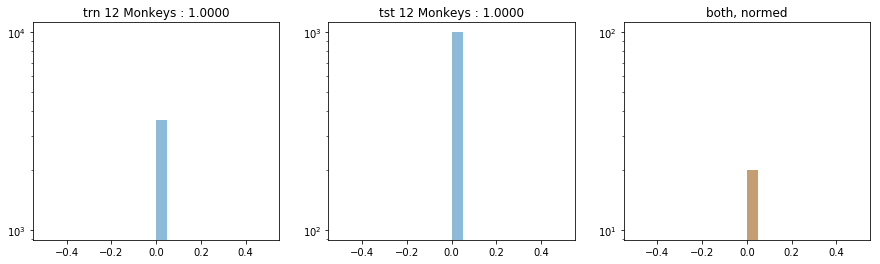

 ---------- Air Show ---------- 


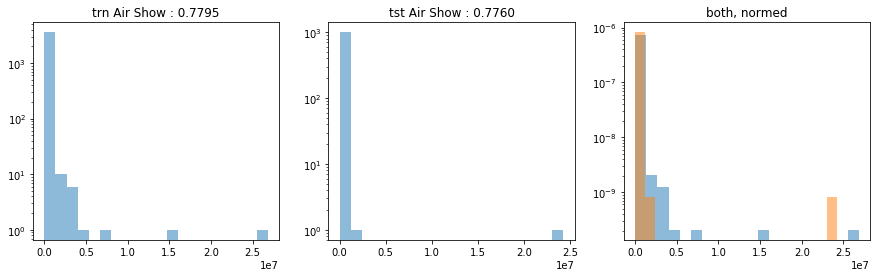

 ---------- All Star Sorting ---------- 


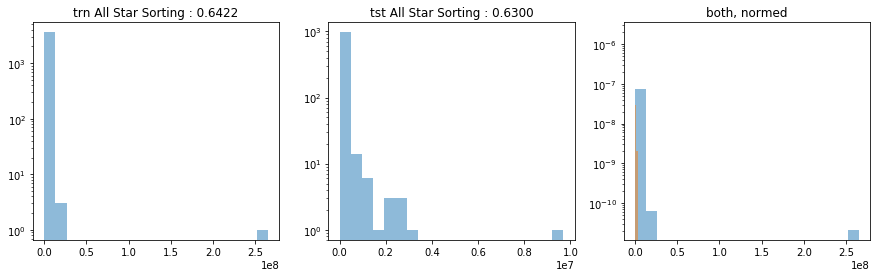

 ---------- Balancing Act ---------- 


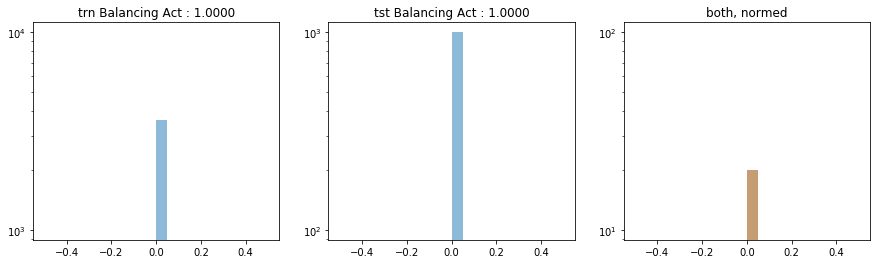

 ---------- Bird Measurer (Assessment) ---------- 


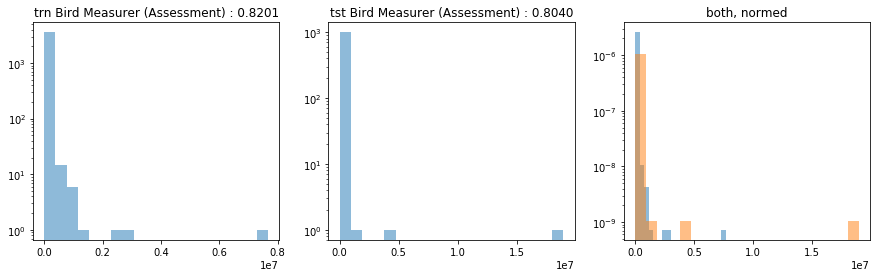

 ---------- Bottle Filler (Activity) ---------- 


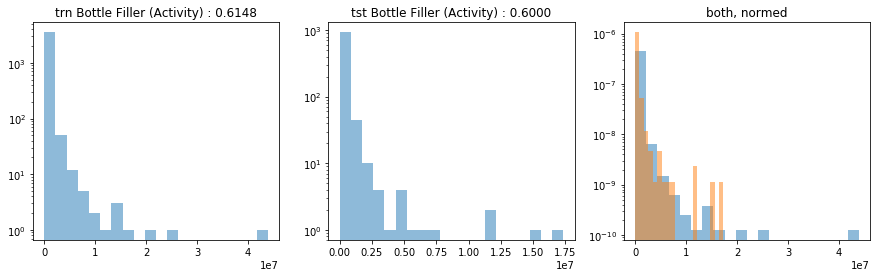

 ---------- Bubble Bath ---------- 


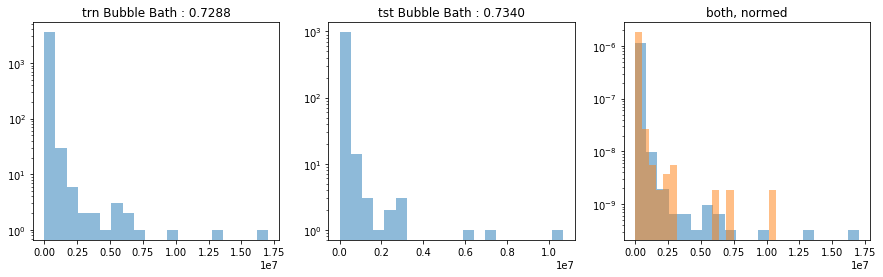

 ---------- Bug Measurer (Activity) ---------- 


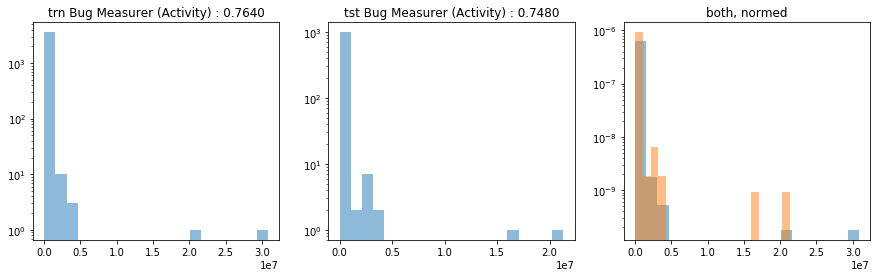

 ---------- Cart Balancer (Assessment) ---------- 


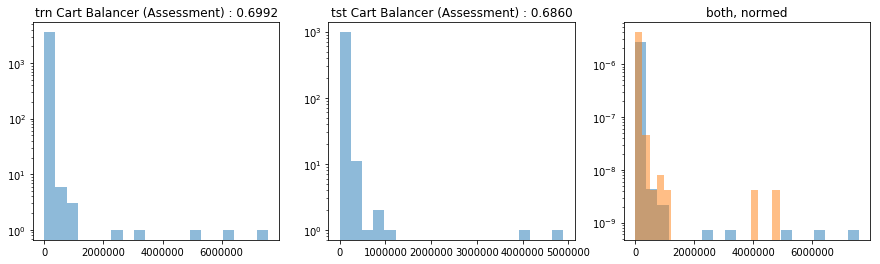

 ---------- Cauldron Filler (Assessment) ---------- 


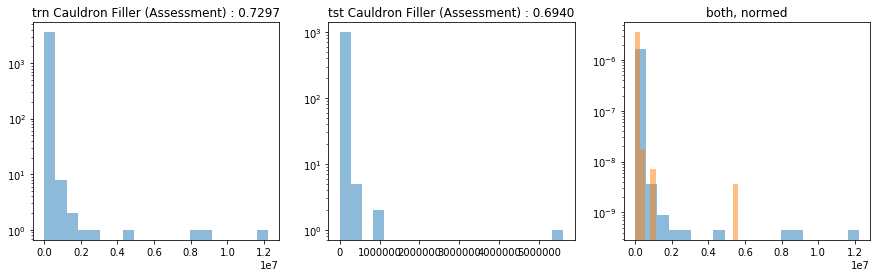

 ---------- Chest Sorter (Assessment) ---------- 


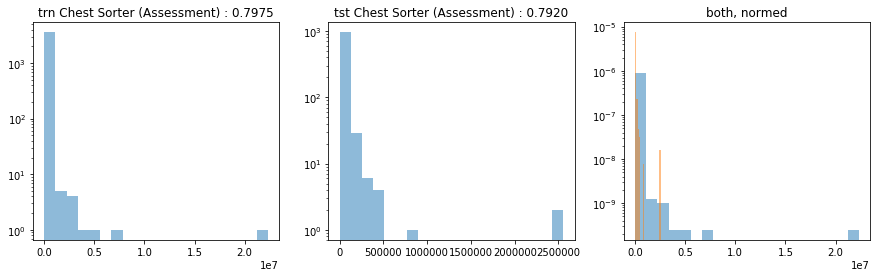

 ---------- Chicken Balancer (Activity) ---------- 


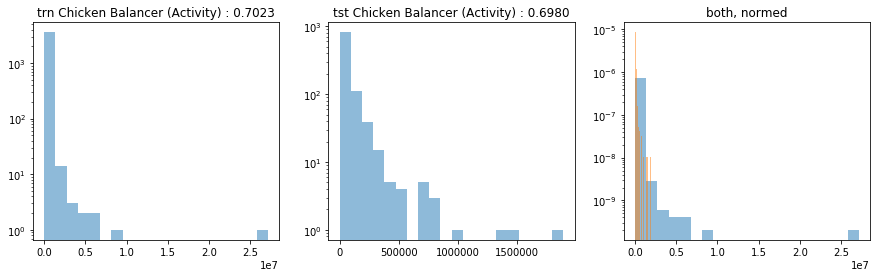

 ---------- Chow Time ---------- 


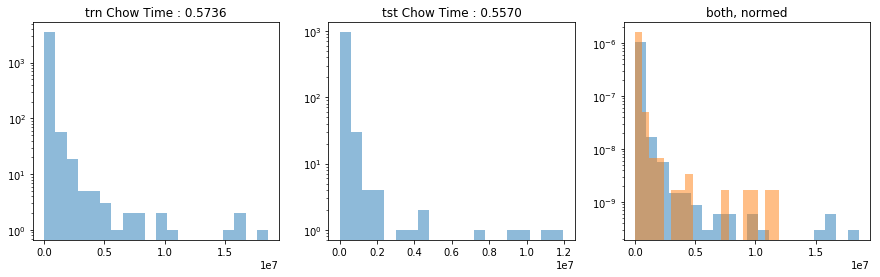

 ---------- Costume Box ---------- 


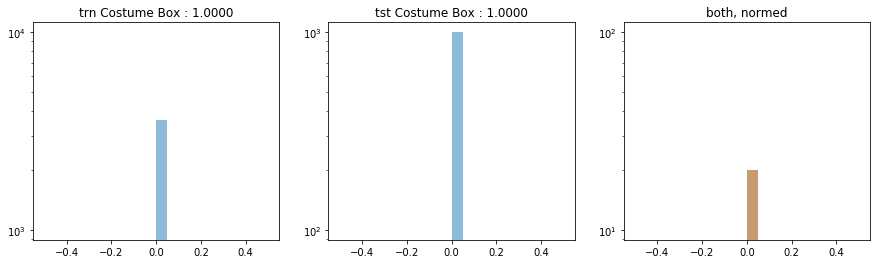

 ---------- Crystal Caves - Level 1 ---------- 


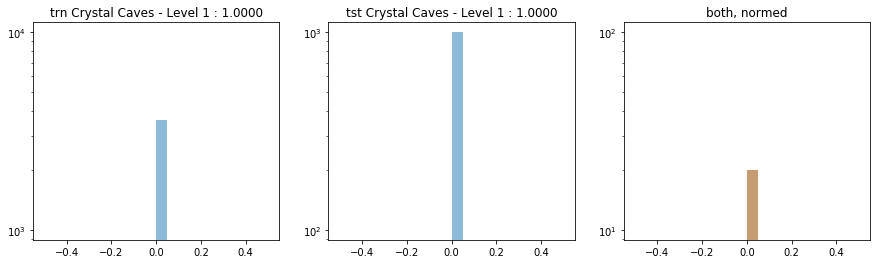

 ---------- Crystal Caves - Level 2 ---------- 


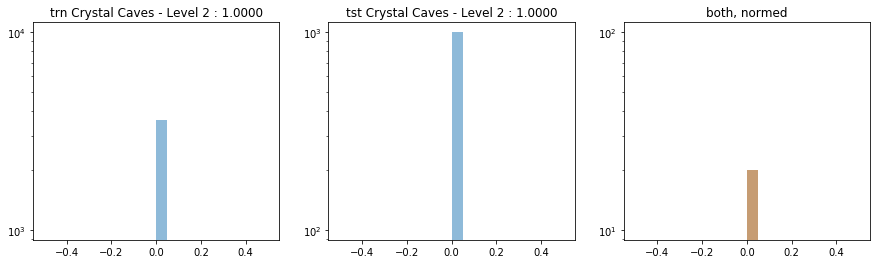

 ---------- Crystal Caves - Level 3 ---------- 


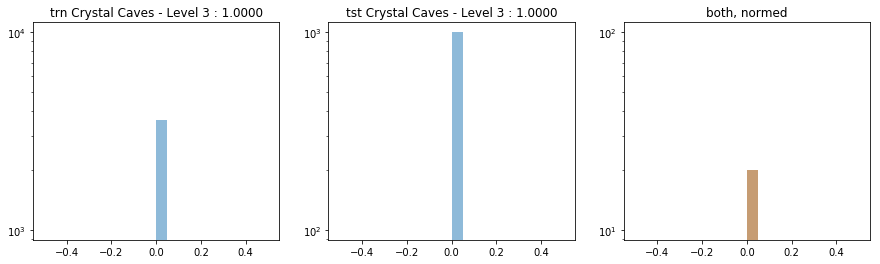

 ---------- Crystals Rule ---------- 


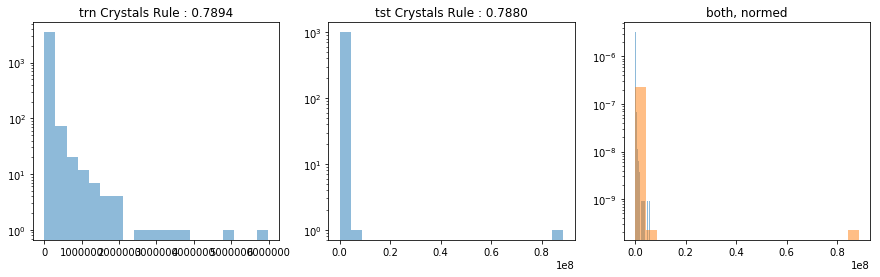

 ---------- Dino Dive ---------- 


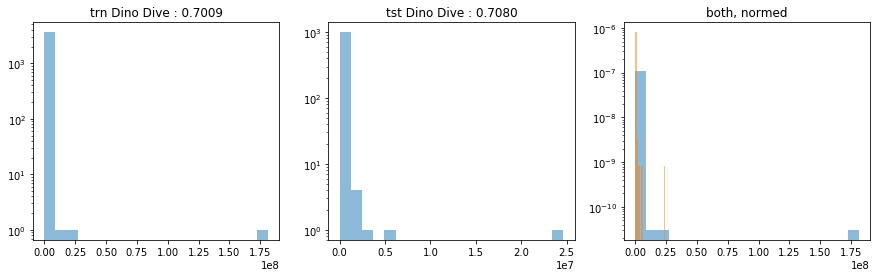

 ---------- Dino Drink ---------- 


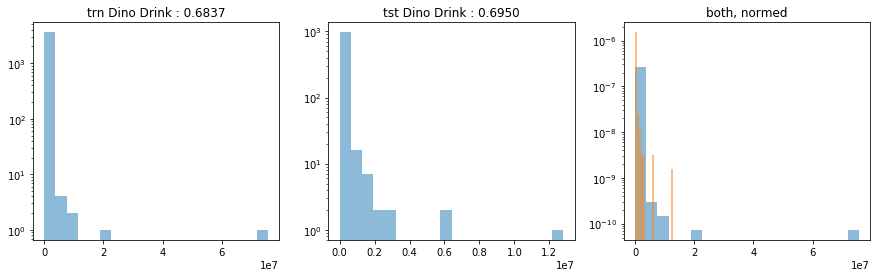

 ---------- Egg Dropper (Activity) ---------- 


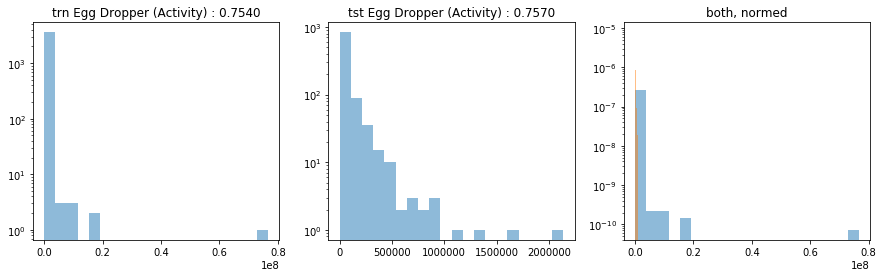

 ---------- Fireworks (Activity) ---------- 


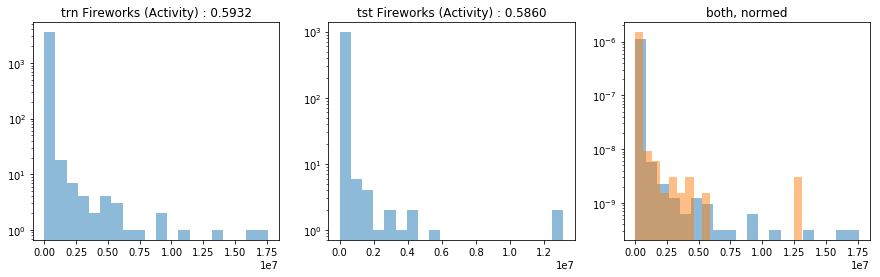

 ---------- Flower Waterer (Activity) ---------- 


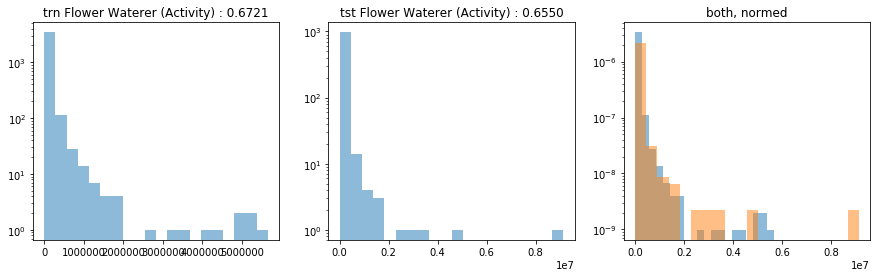

 ---------- Happy Camel ---------- 


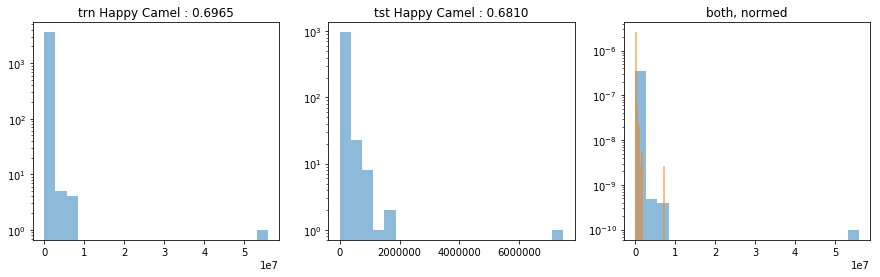

 ---------- Heavy, Heavier, Heaviest ---------- 


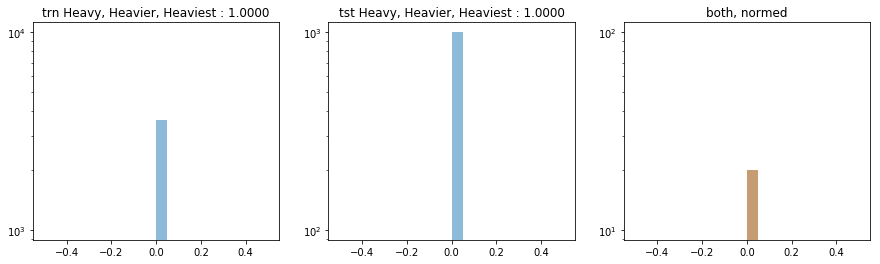

 ---------- Honey Cake ---------- 


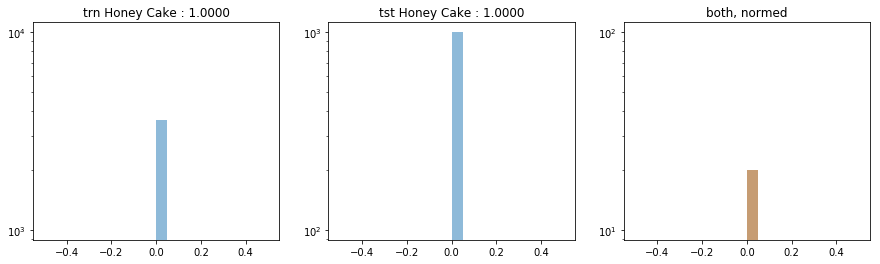

 ---------- Leaf Leader ---------- 


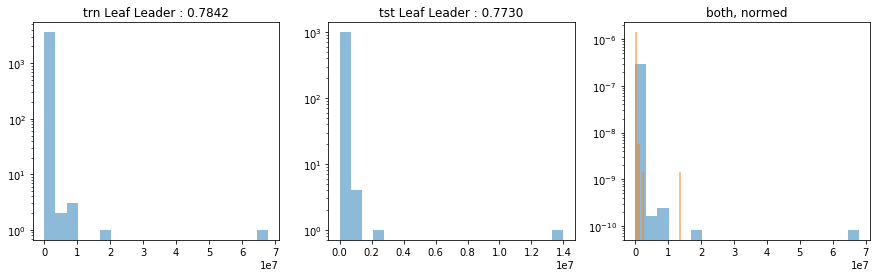

 ---------- Lifting Heavy Things ---------- 


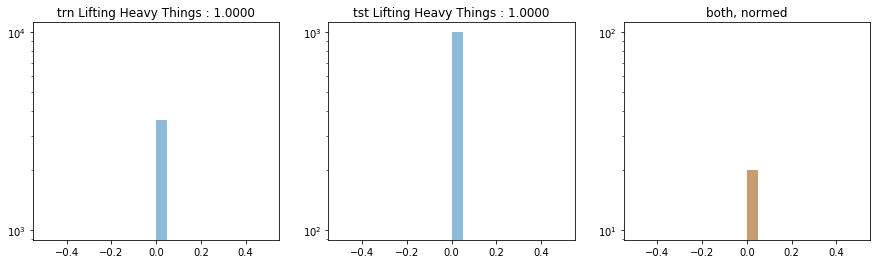

 ---------- Magma Peak - Level 1 ---------- 


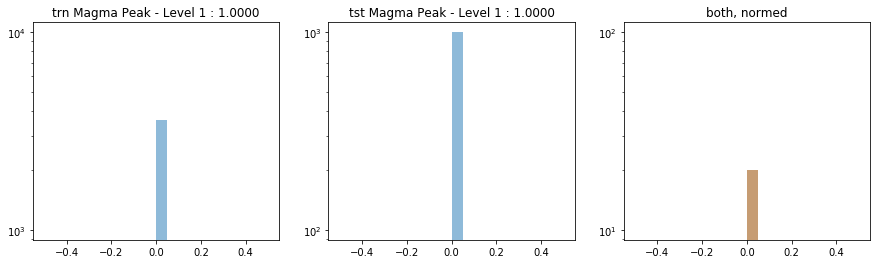

 ---------- Magma Peak - Level 2 ---------- 


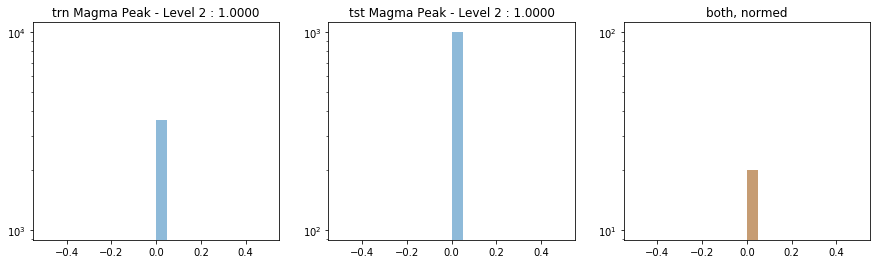

 ---------- Mushroom Sorter (Assessment) ---------- 


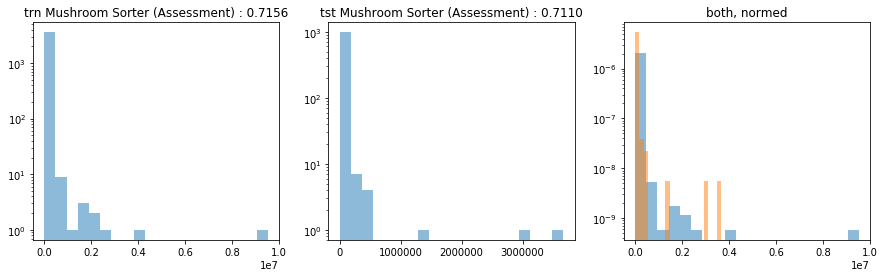

 ---------- Ordering Spheres ---------- 


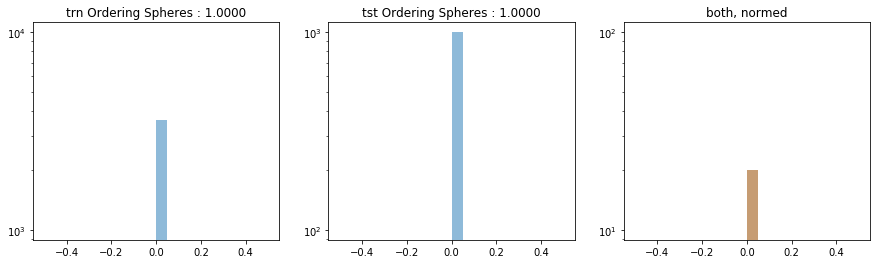

 ---------- Pan Balance ---------- 


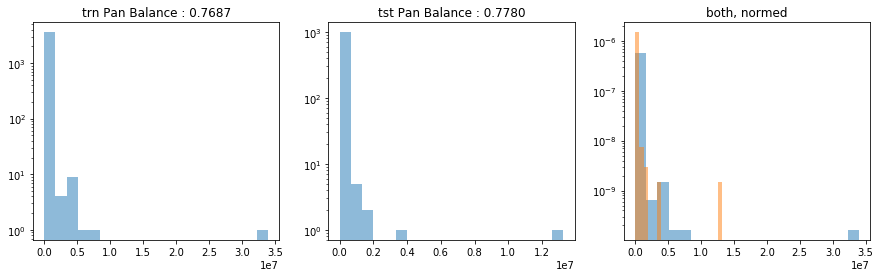

 ---------- Pirate's Tale ---------- 


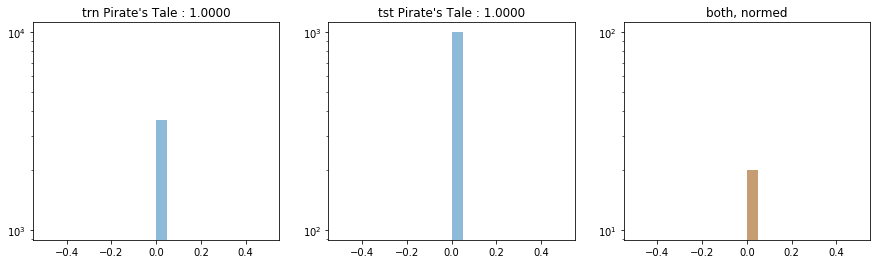

 ---------- Rulers ---------- 


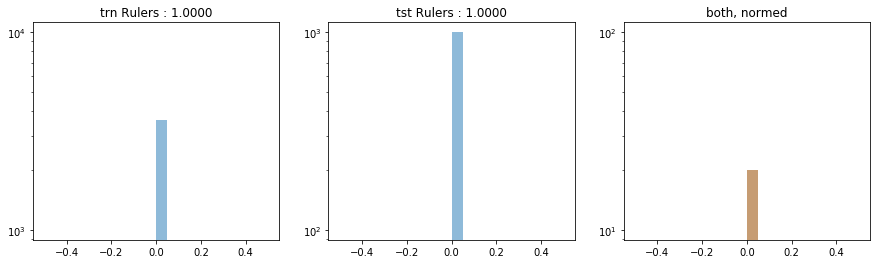

 ---------- Sandcastle Builder (Activity) ---------- 


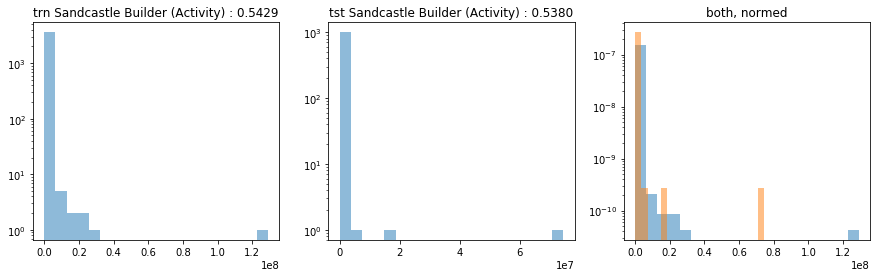

 ---------- Scrub-A-Dub ---------- 


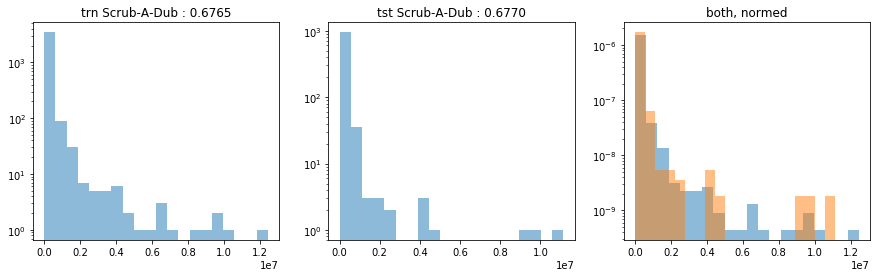

 ---------- Slop Problem ---------- 


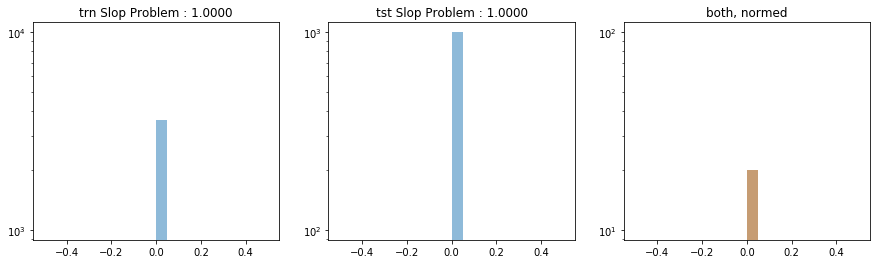

 ---------- Treasure Map ---------- 


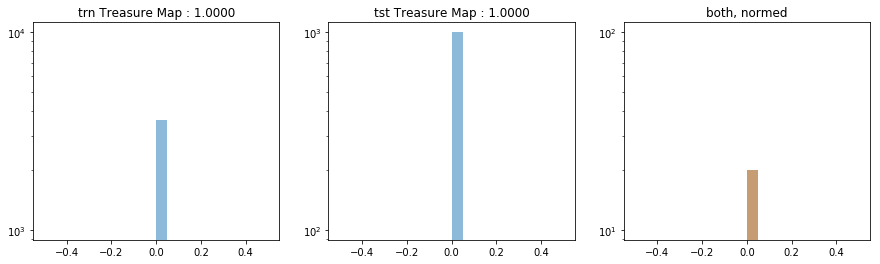

 ---------- Tree Top City - Level 1 ---------- 


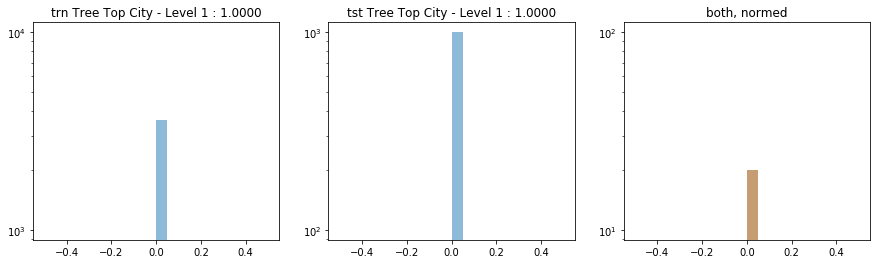

 ---------- Tree Top City - Level 2 ---------- 


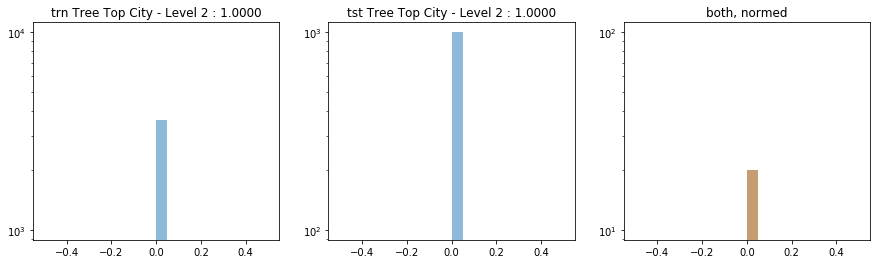

 ---------- Tree Top City - Level 3 ---------- 


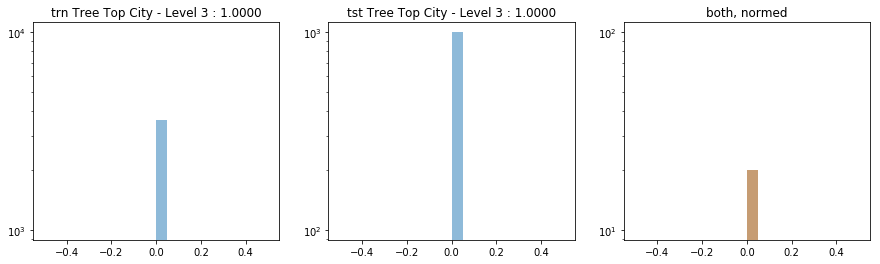

 ---------- Watering Hole (Activity) ---------- 


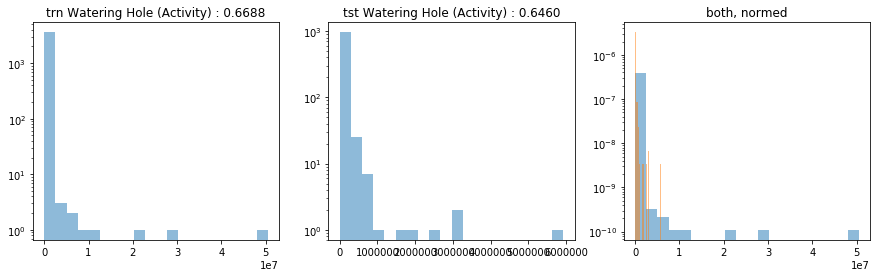

 ---------- Welcome to Lost Lagoon! ---------- 


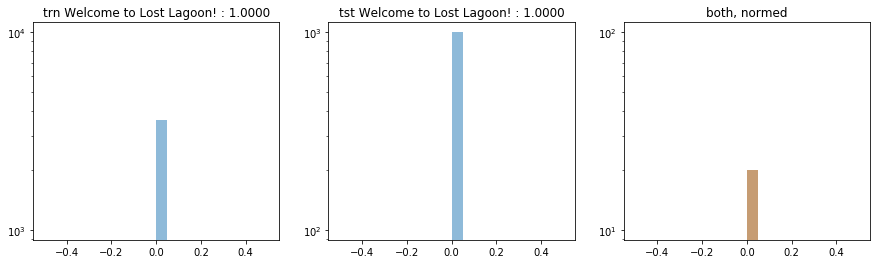

 ---------- accum_acc_gr_0 ---------- 


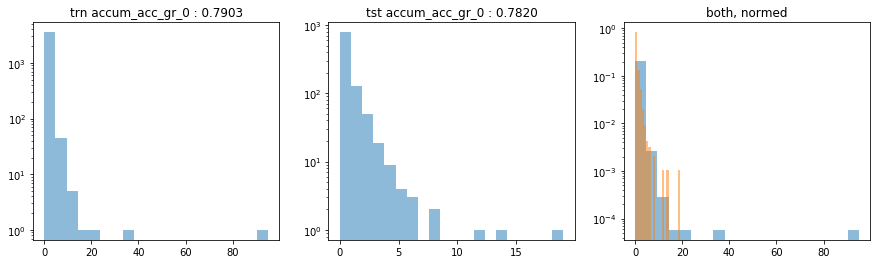

 ---------- accum_acc_gr_1 ---------- 


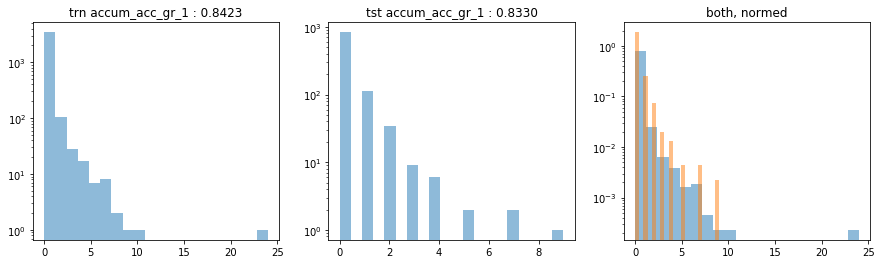

 ---------- accum_acc_gr_2 ---------- 


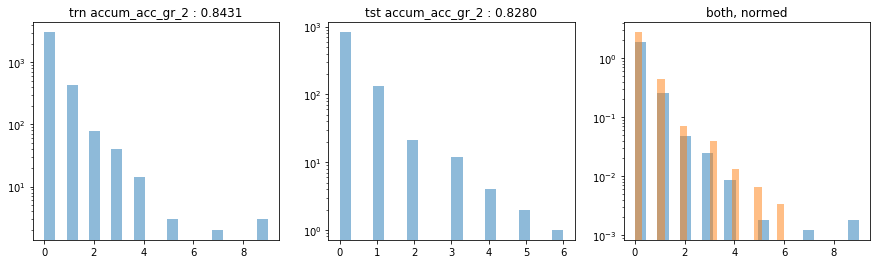

 ---------- accum_acc_gr_3 ---------- 


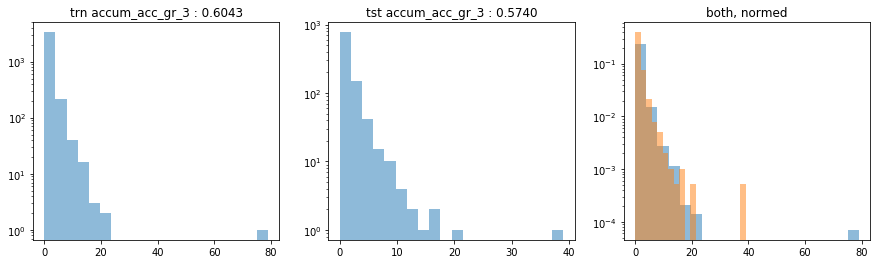

 ---------- cum_accuracy ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


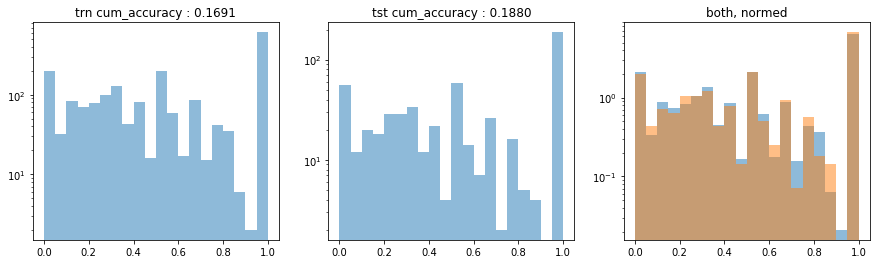

 ---------- prev_acc_gr_0 ---------- 


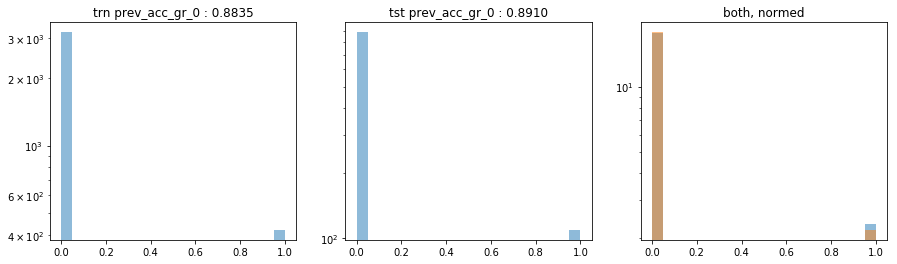

 ---------- prev_acc_gr_1 ---------- 


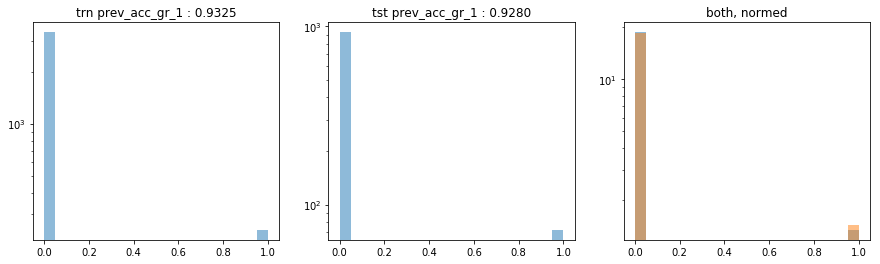

 ---------- prev_acc_gr_2 ---------- 


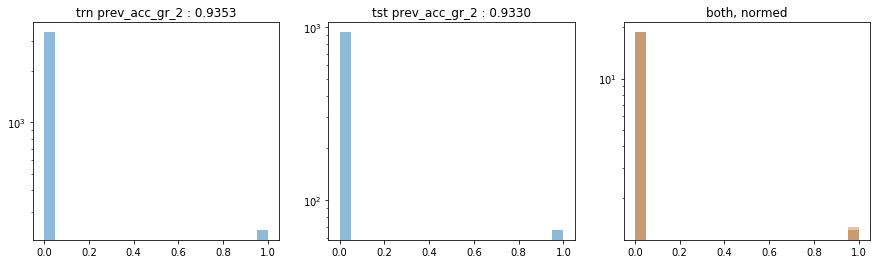

 ---------- prev_acc_gr_3 ---------- 


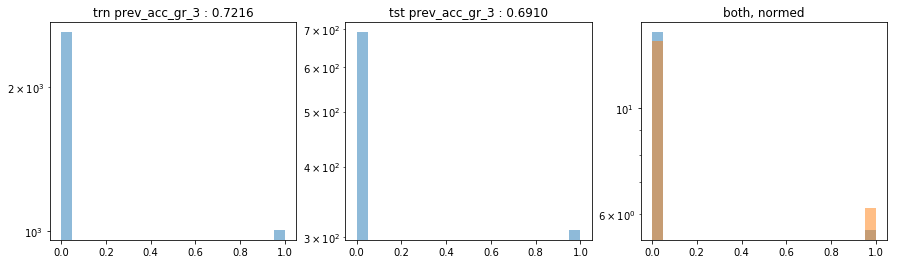

 ---------- prev_cumnum_c ---------- 


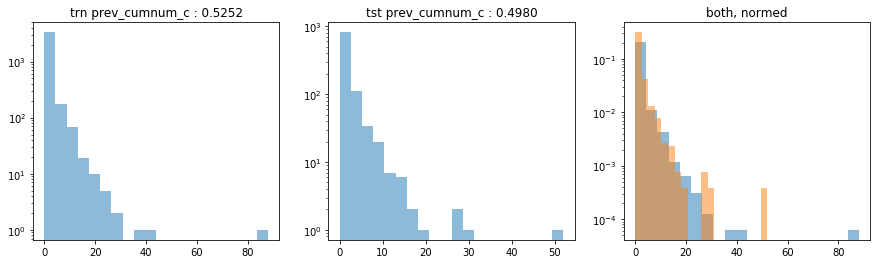

 ---------- prev_cumnum_inc ---------- 


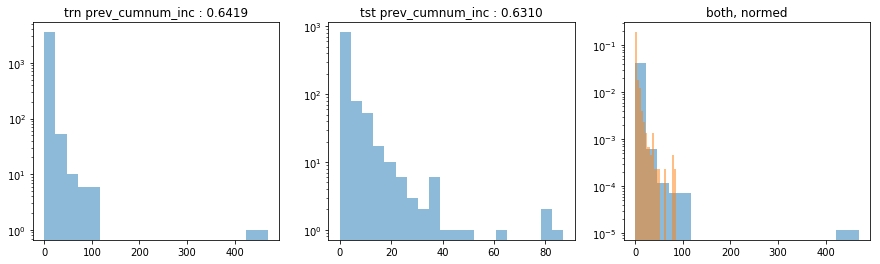

 ---------- prev_num_corrects ---------- 


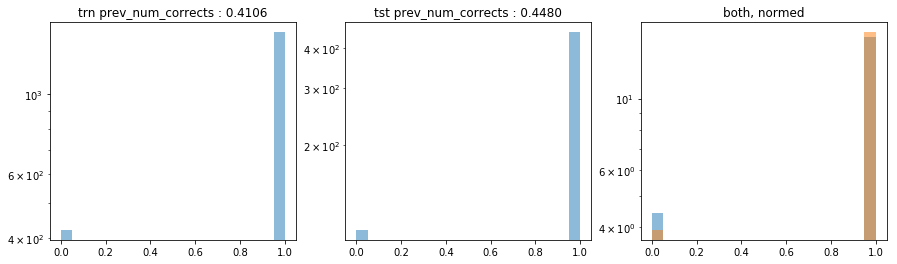

 ---------- prev_num_incorrects ---------- 


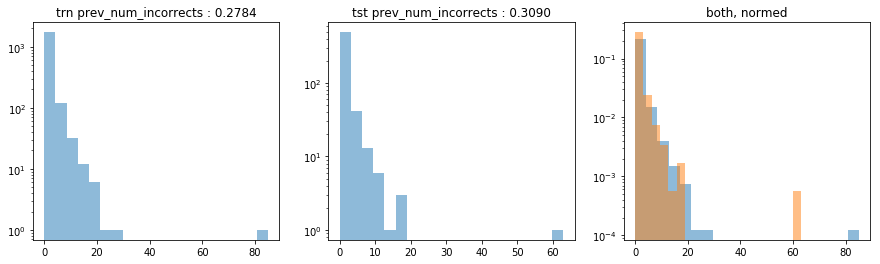

 ---------- f019_bef_target_cnt_x ---------- 


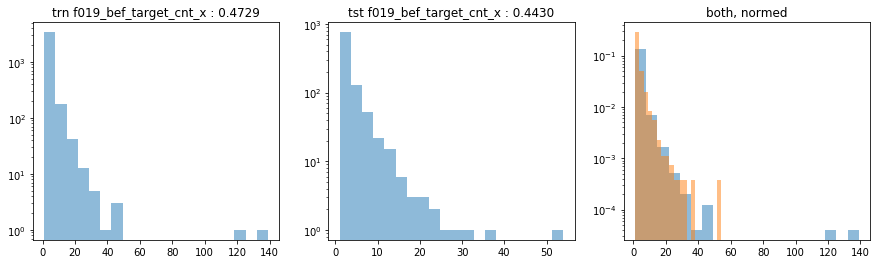

 ---------- f019_bef_target_cnt_y ---------- 


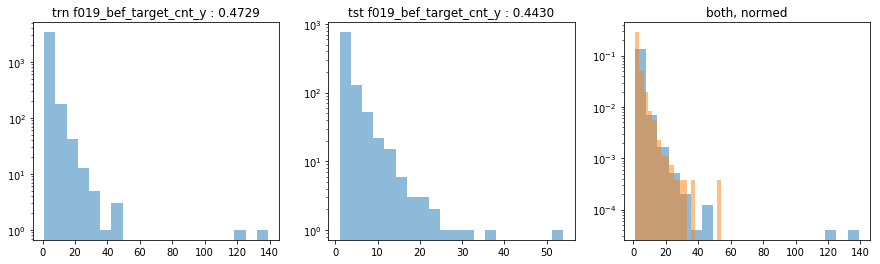

In [74]:
for col in tst_kb_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_kb_df[col], tst_kb_df[col])

#### Worldcount

In [63]:
trn_wc_df = pd.read_pickle('../mnt/inputs/features/train/Worldcount.pkl')
tst_wc_df = pd.read_pickle('../mnt/inputs/features/test/Worldcount.pkl')

trn_wc_df = trn_kb_df[['game_session']].merge(trn_wc_df, on=['game_session'], how='left')
tst_wc_df = tst_kb_df[['game_session']].merge(tst_wc_df, on=['game_session'], how='left')

 ---------- title_type_cnt_12 Monkeys_Clip ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


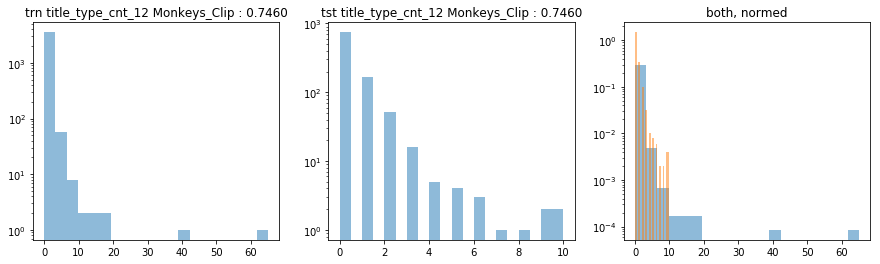

 ---------- title_type_cnt_Air Show_Game ---------- 


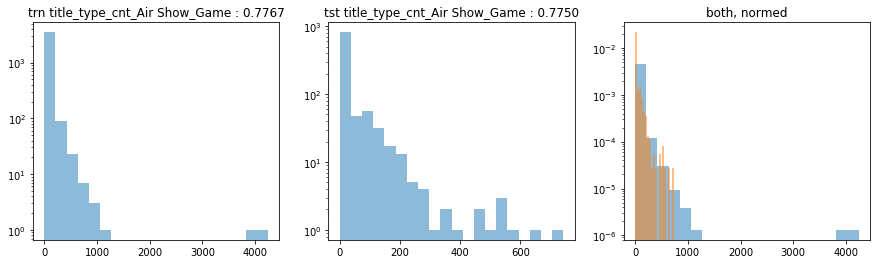

 ---------- title_type_cnt_All Star Sorting_Game ---------- 


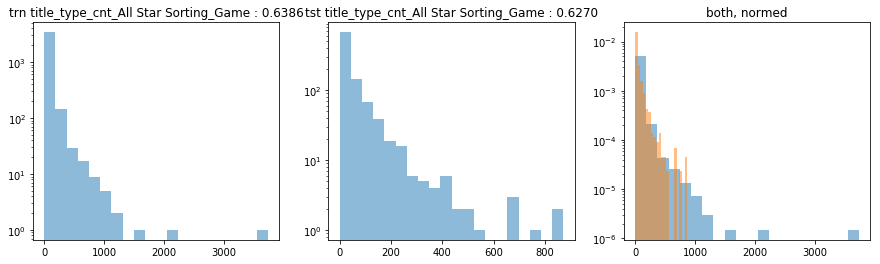

 ---------- title_type_cnt_Balancing Act_Clip ---------- 


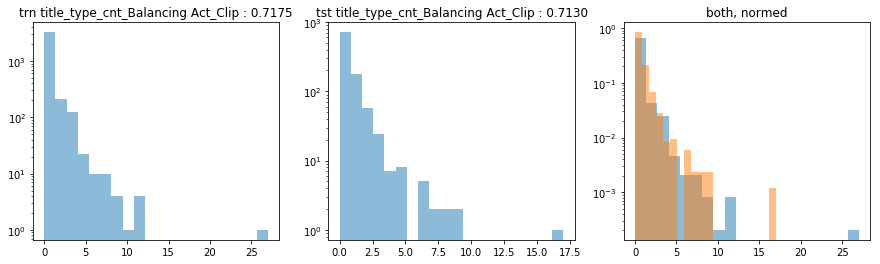

 ---------- title_type_cnt_Bird Measurer (Assessment)_Assessment ---------- 


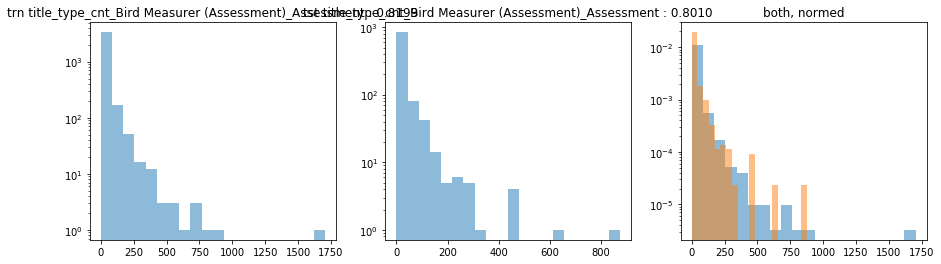

 ---------- title_type_cnt_Bottle Filler (Activity)_Activity ---------- 


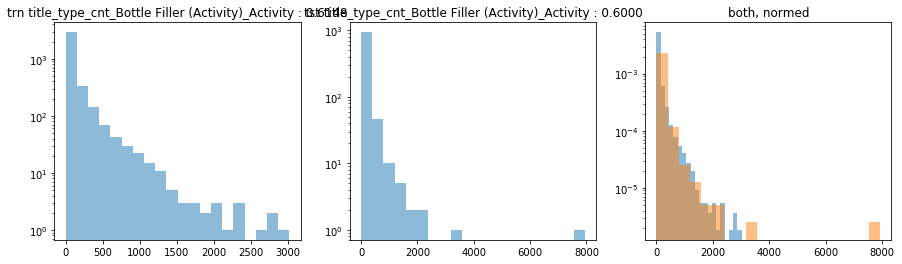

 ---------- title_type_cnt_Bubble Bath_Game ---------- 


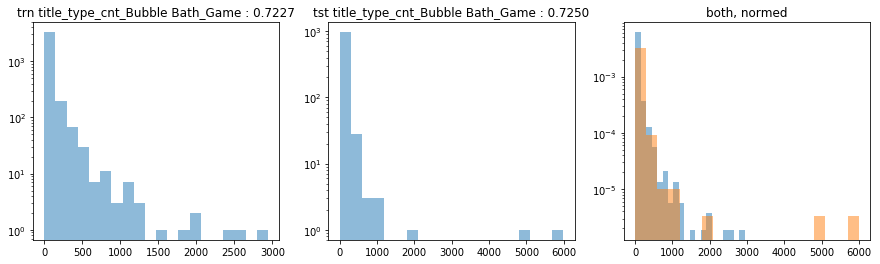

 ---------- title_type_cnt_Bug Measurer (Activity)_Activity ---------- 


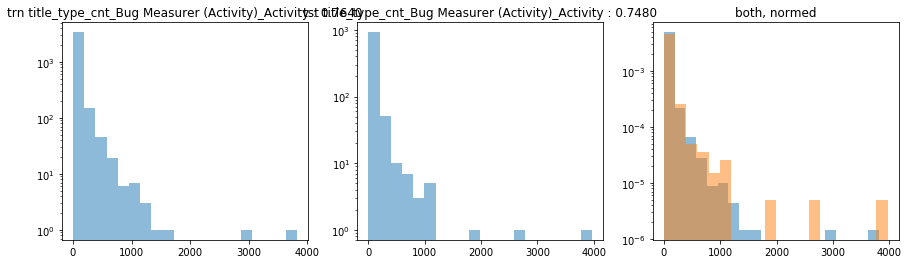

 ---------- title_type_cnt_Cart Balancer (Assessment)_Assessment ---------- 


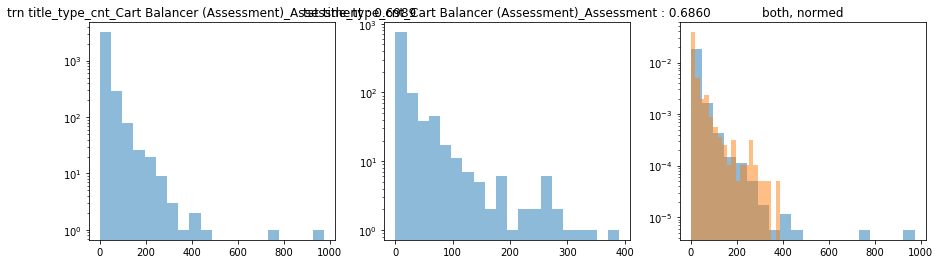

 ---------- title_type_cnt_Cauldron Filler (Assessment)_Assessment ---------- 


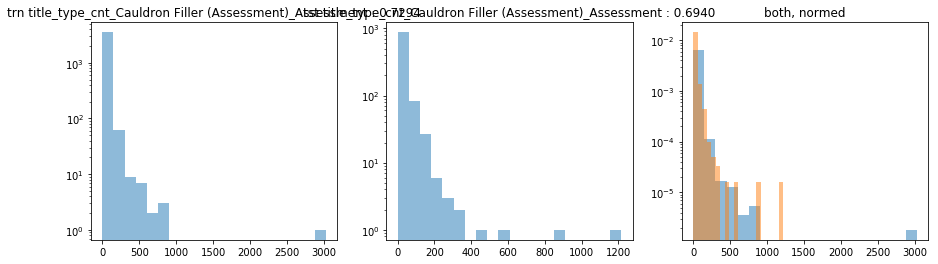

 ---------- title_type_cnt_Chest Sorter (Assessment)_Assessment ---------- 


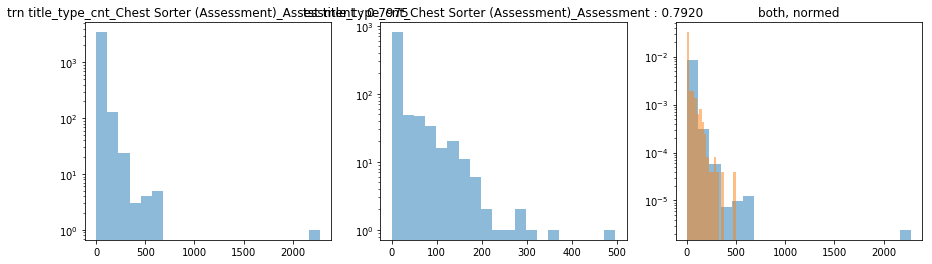

 ---------- title_type_cnt_Chicken Balancer (Activity)_Activity ---------- 


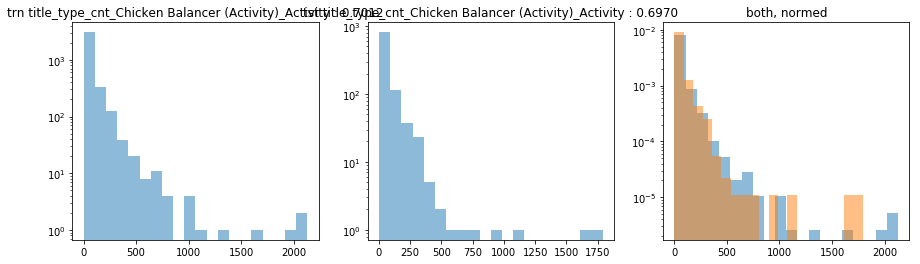

 ---------- title_type_cnt_Chow Time_Game ---------- 


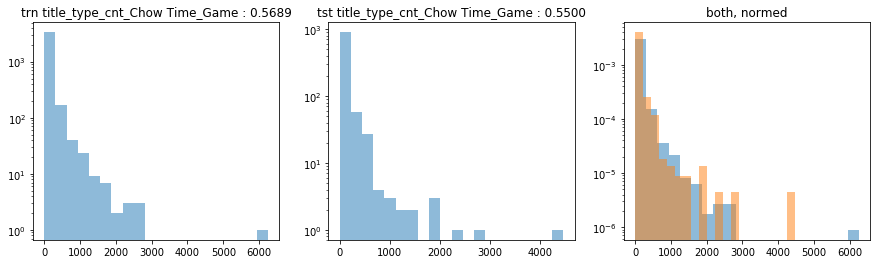

 ---------- title_type_cnt_Costume Box_Clip ---------- 


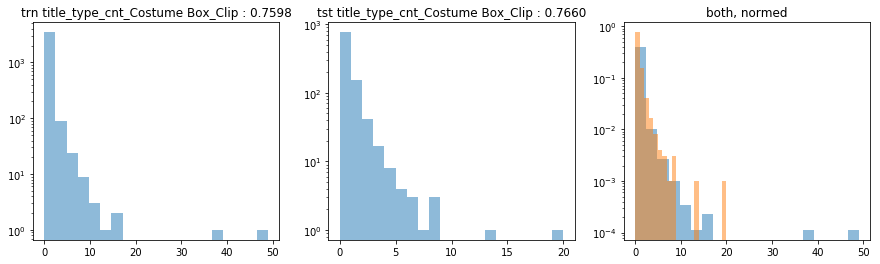

 ---------- title_type_cnt_Crystal Caves - Level 1_Clip ---------- 


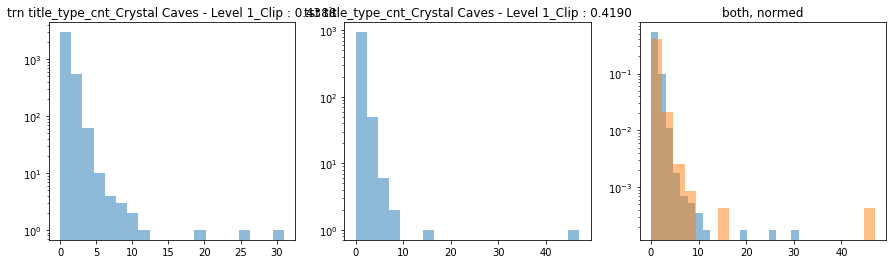

 ---------- title_type_cnt_Crystal Caves - Level 2_Clip ---------- 


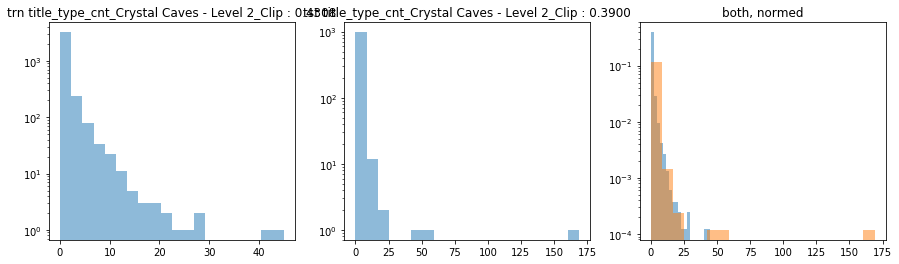

 ---------- title_type_cnt_Crystal Caves - Level 3_Clip ---------- 


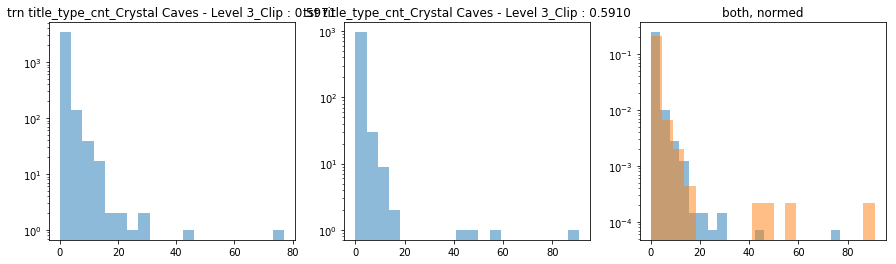

 ---------- title_type_cnt_Crystals Rule_Game ---------- 


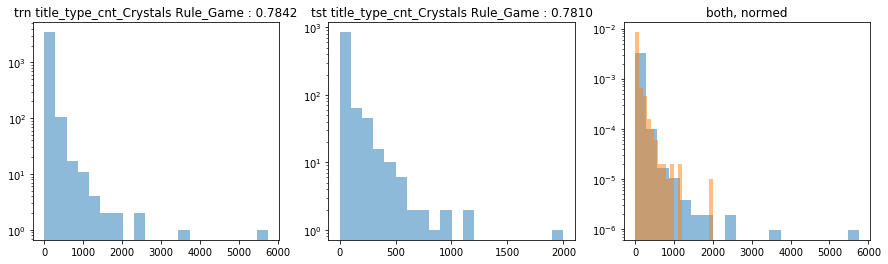

 ---------- title_type_cnt_Dino Dive_Game ---------- 


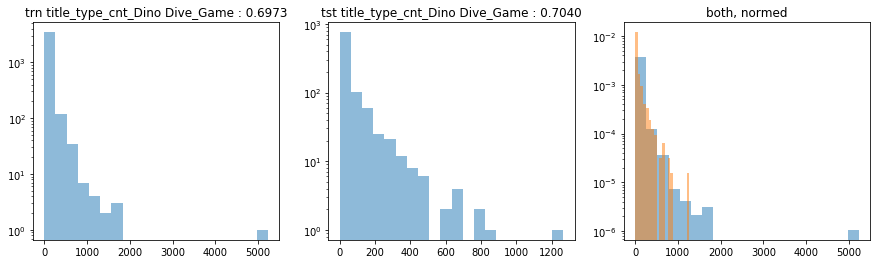

 ---------- title_type_cnt_Dino Drink_Game ---------- 


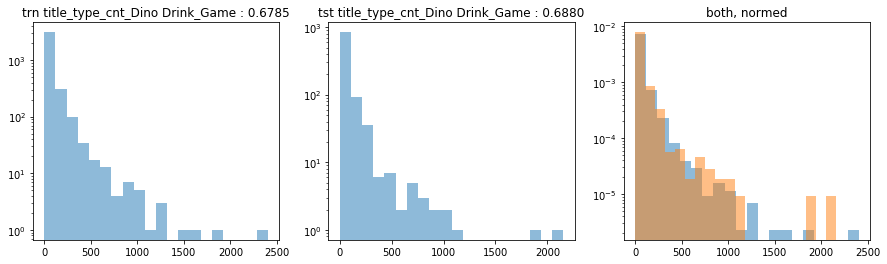

 ---------- title_type_cnt_Egg Dropper (Activity)_Activity ---------- 


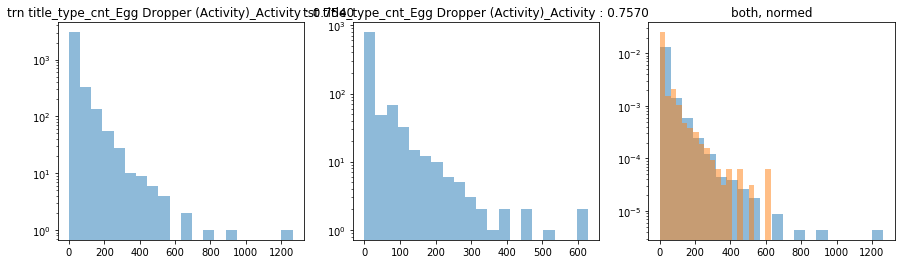

 ---------- title_type_cnt_Fireworks (Activity)_Activity ---------- 


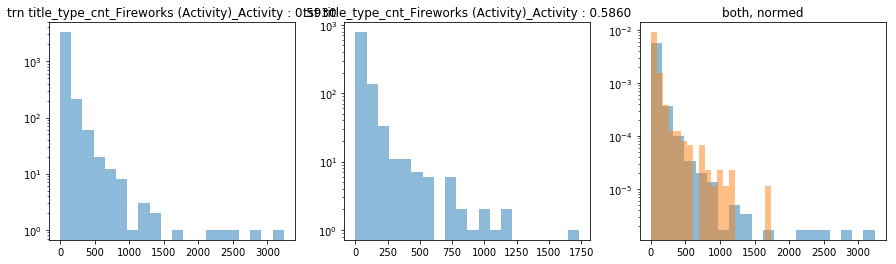

 ---------- title_type_cnt_Flower Waterer (Activity)_Activity ---------- 


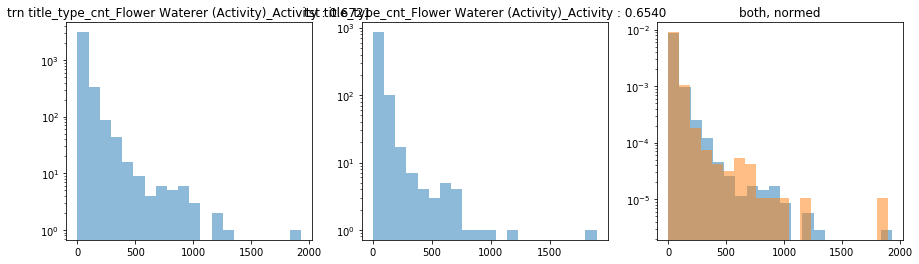

 ---------- title_type_cnt_Happy Camel_Game ---------- 


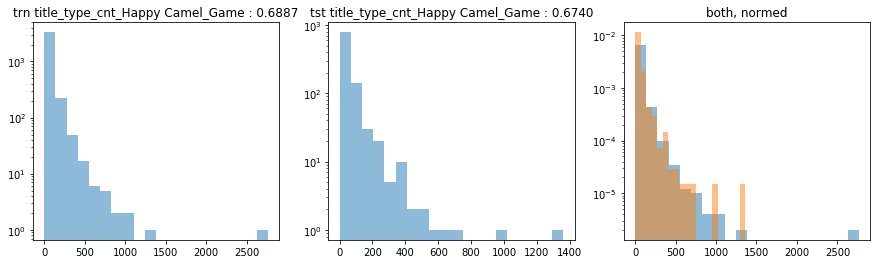

 ---------- title_type_cnt_Heavy, Heavier, Heaviest_Clip ---------- 


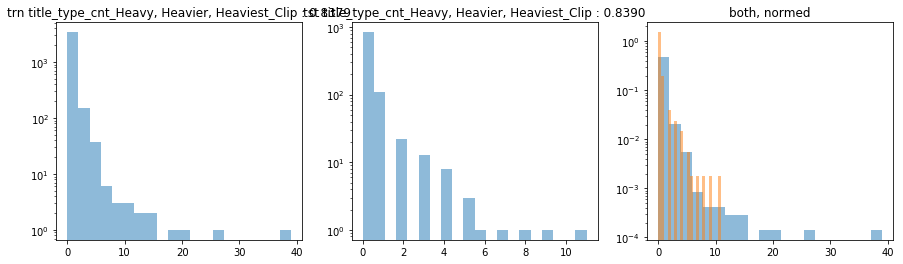

 ---------- title_type_cnt_Honey Cake_Clip ---------- 


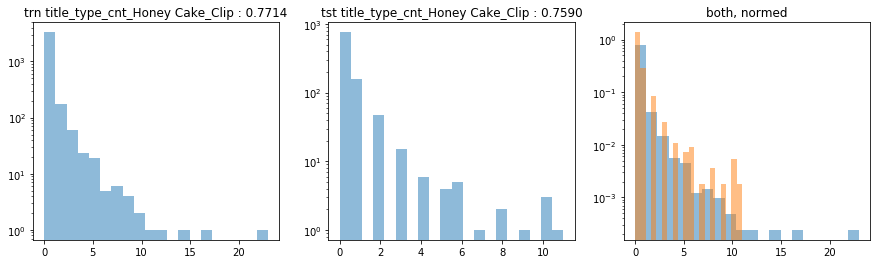

 ---------- title_type_cnt_Leaf Leader_Game ---------- 


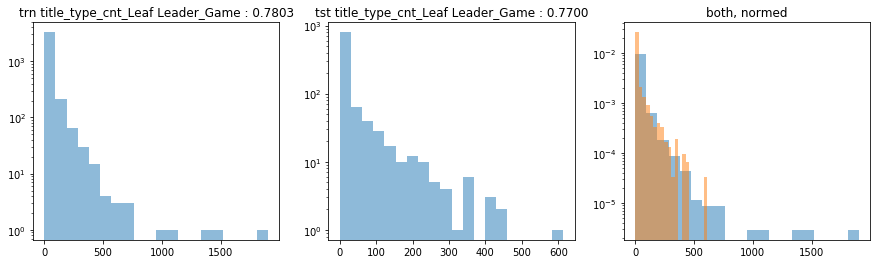

 ---------- title_type_cnt_Lifting Heavy Things_Clip ---------- 


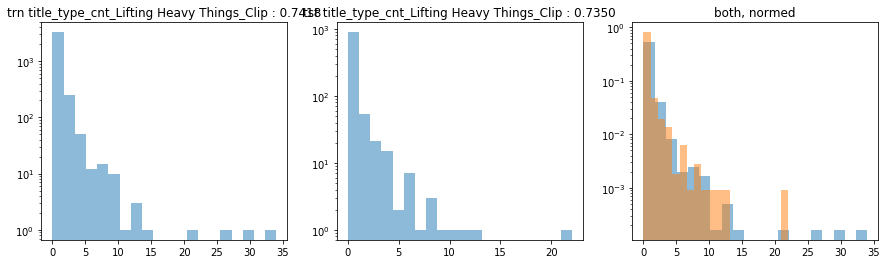

 ---------- title_type_cnt_Magma Peak - Level 1_Clip ---------- 


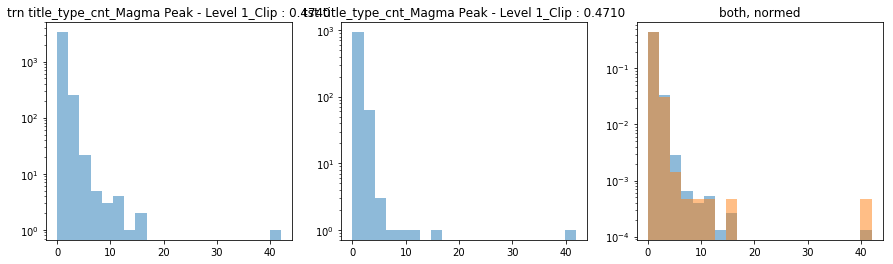

 ---------- title_type_cnt_Magma Peak - Level 2_Clip ---------- 


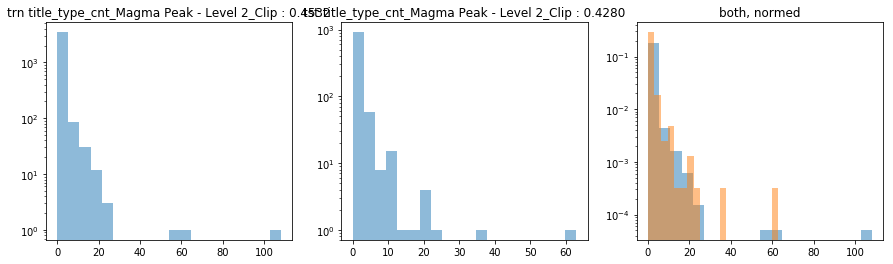

 ---------- title_type_cnt_Mushroom Sorter (Assessment)_Assessment ---------- 


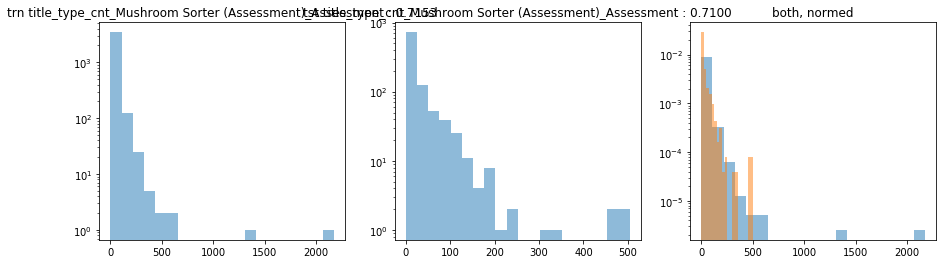

 ---------- title_type_cnt_Ordering Spheres_Clip ---------- 


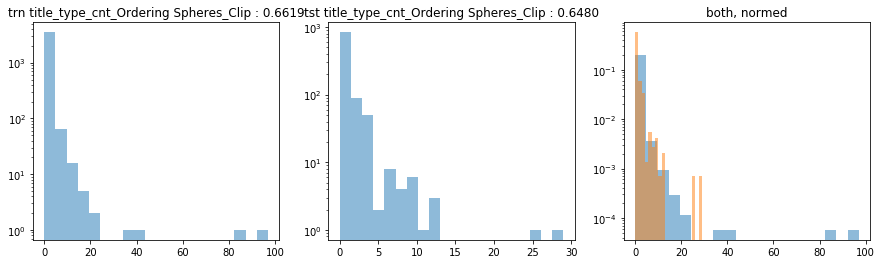

 ---------- title_type_cnt_Pan Balance_Game ---------- 


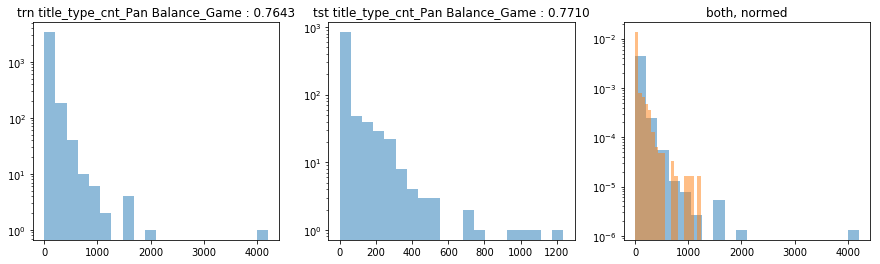

 ---------- title_type_cnt_Pirate's Tale_Clip ---------- 


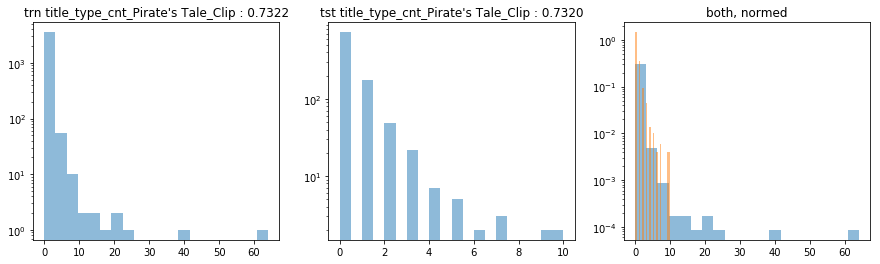

 ---------- title_type_cnt_Rulers_Clip ---------- 


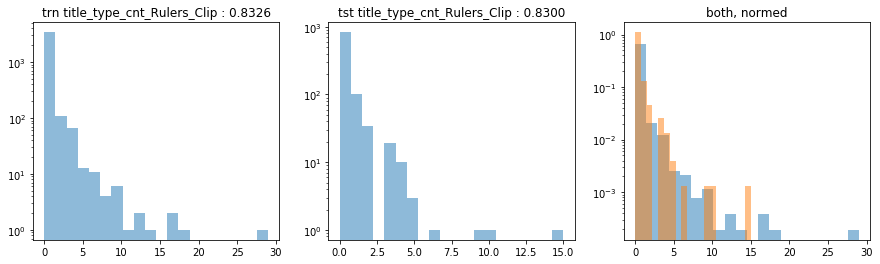

 ---------- title_type_cnt_Sandcastle Builder (Activity)_Activity ---------- 


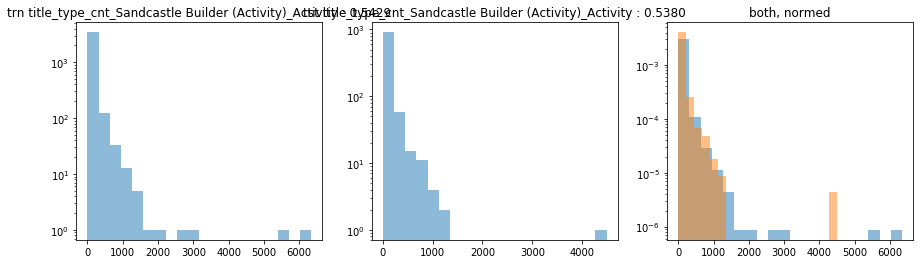

 ---------- title_type_cnt_Scrub-A-Dub_Game ---------- 


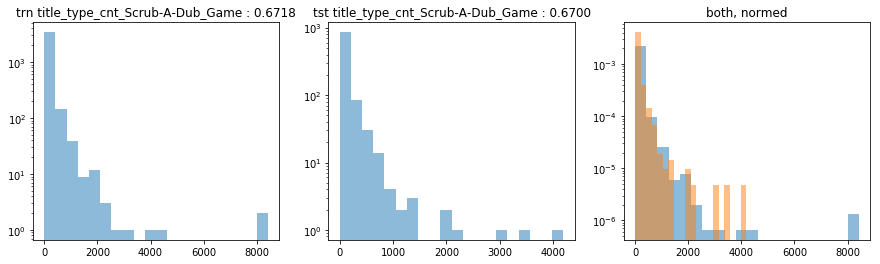

 ---------- title_type_cnt_Slop Problem_Clip ---------- 


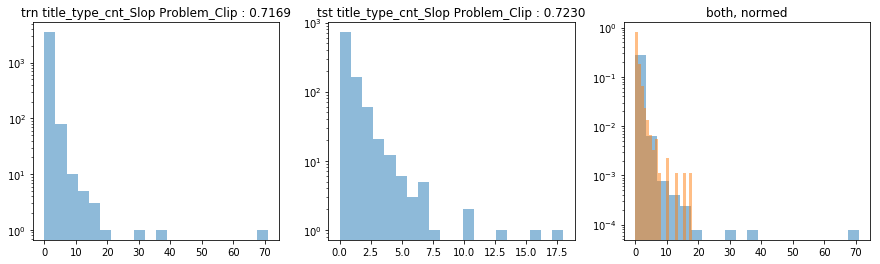

 ---------- title_type_cnt_Treasure Map_Clip ---------- 


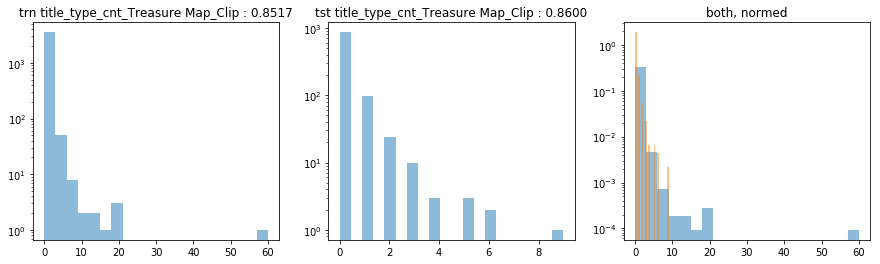

 ---------- title_type_cnt_Tree Top City - Level 1_Clip ---------- 


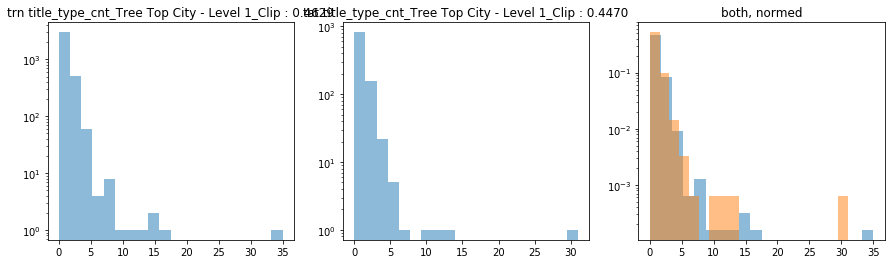

 ---------- title_type_cnt_Tree Top City - Level 2_Clip ---------- 


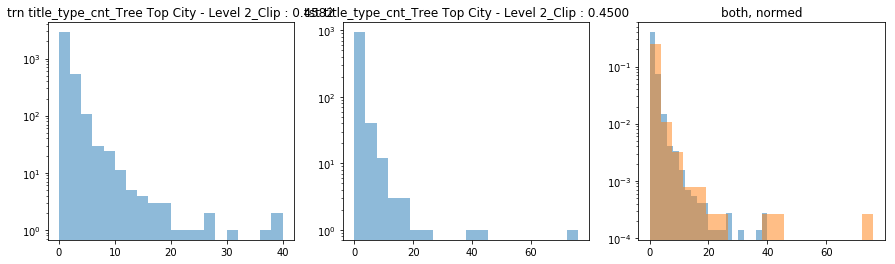

 ---------- title_type_cnt_Tree Top City - Level 3_Clip ---------- 


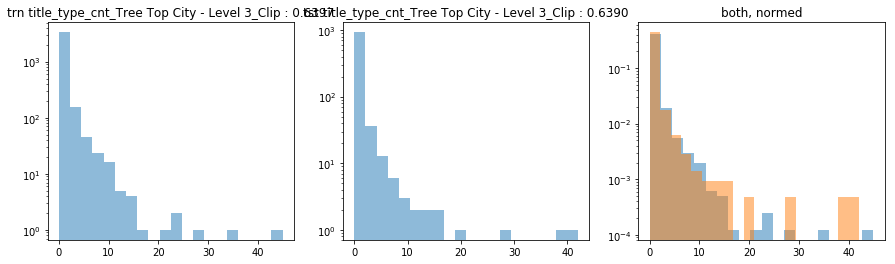

 ---------- title_type_cnt_Watering Hole (Activity)_Activity ---------- 


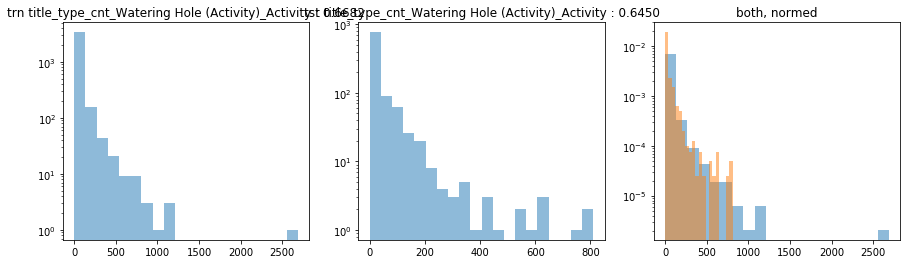

 ---------- title_type_cnt_Welcome to Lost Lagoon!_Clip ---------- 


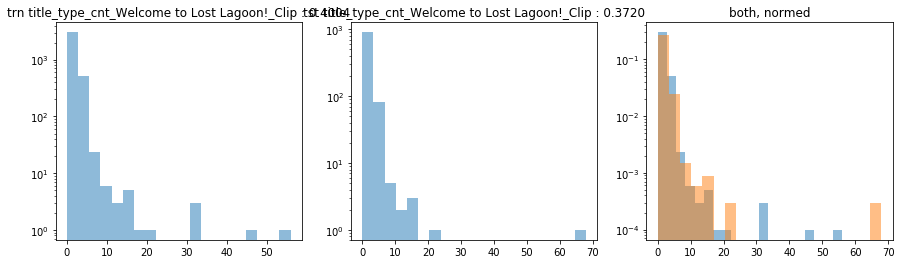

 ---------- wrd_cnt_CRYSTALCAVES ---------- 


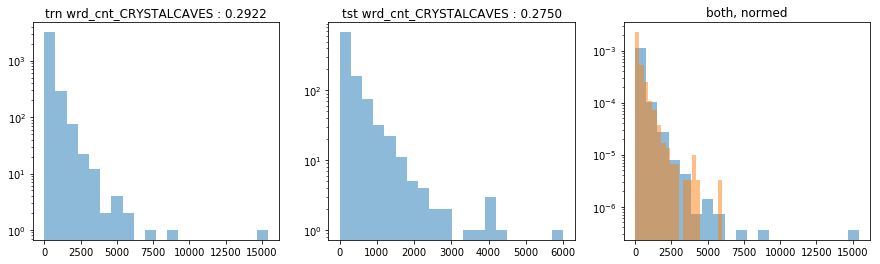

 ---------- wrd_cnt_MAGMAPEAK ---------- 


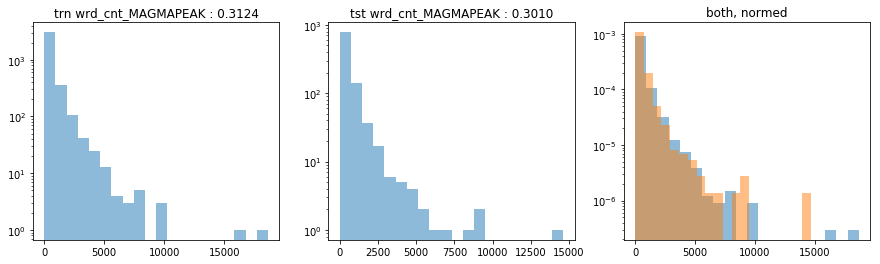

 ---------- wrd_cnt_NONE ---------- 


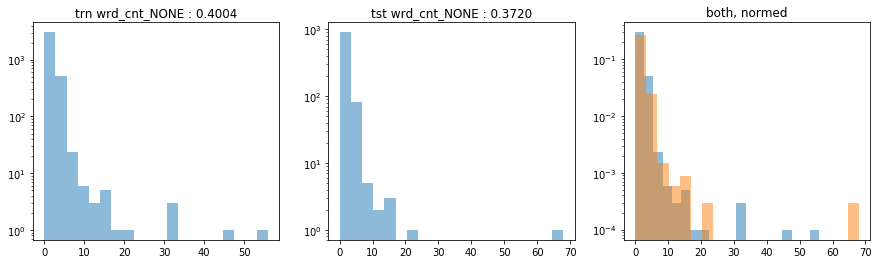

 ---------- wrd_cnt_TREETOPCITY ---------- 


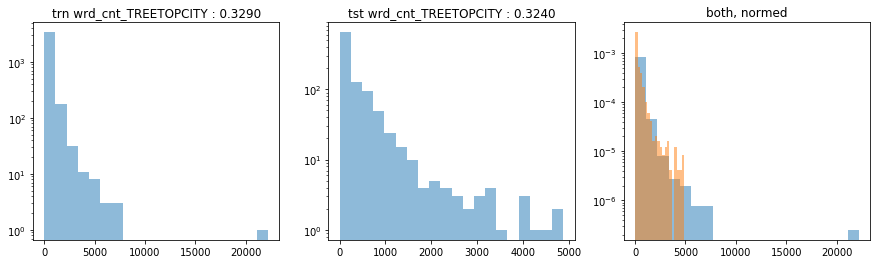

 ---------- wrd_type_cnt_CRYSTALCAVES_Activity ---------- 


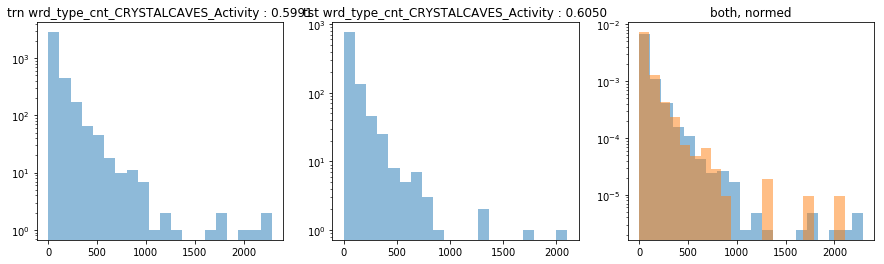

 ---------- wrd_type_cnt_CRYSTALCAVES_Assessment ---------- 


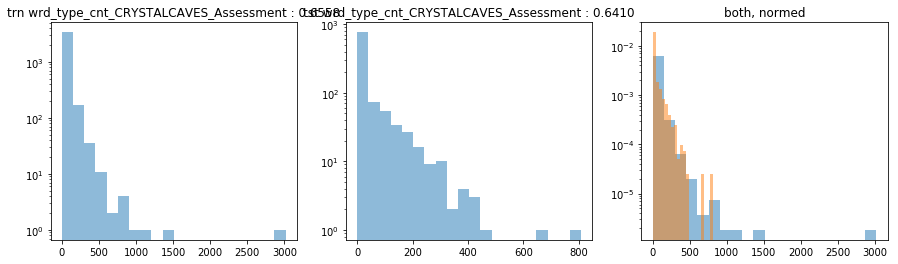

 ---------- wrd_type_cnt_CRYSTALCAVES_Clip ---------- 


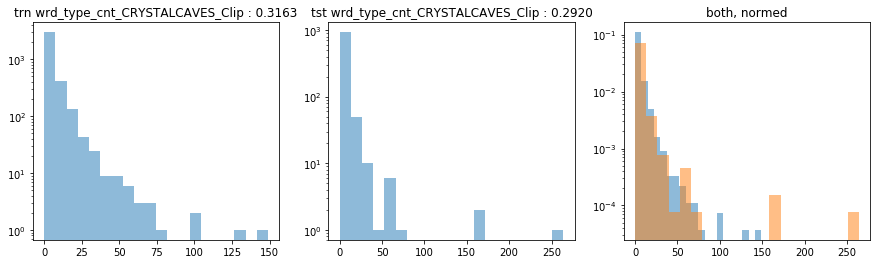

 ---------- wrd_type_cnt_CRYSTALCAVES_Game ---------- 


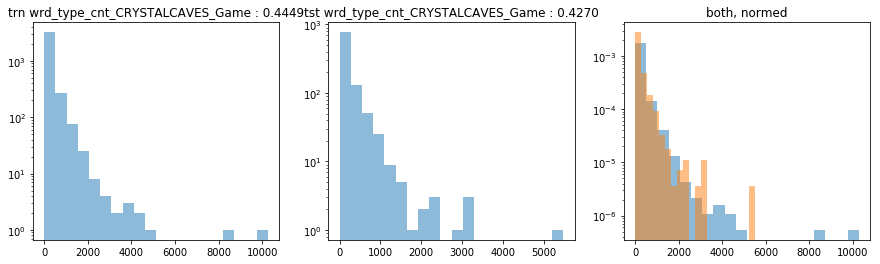

 ---------- wrd_type_cnt_MAGMAPEAK_Activity ---------- 


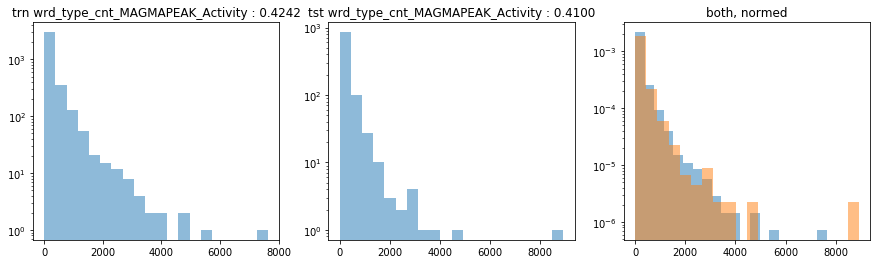

 ---------- wrd_type_cnt_MAGMAPEAK_Assessment ---------- 


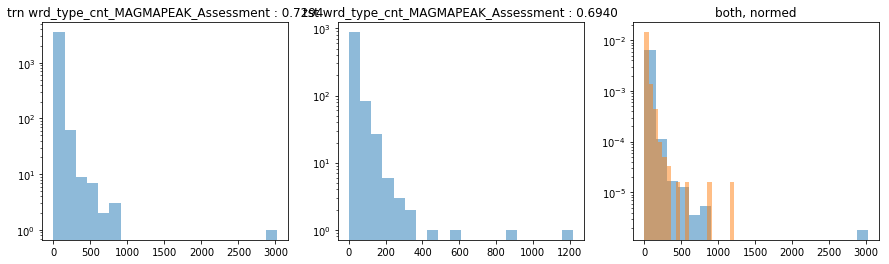

 ---------- wrd_type_cnt_MAGMAPEAK_Clip ---------- 


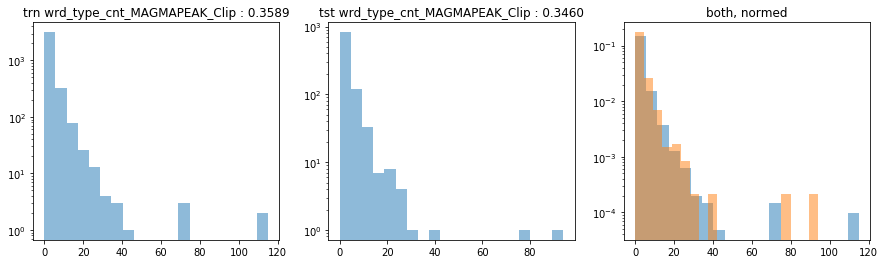

 ---------- wrd_type_cnt_MAGMAPEAK_Game ---------- 


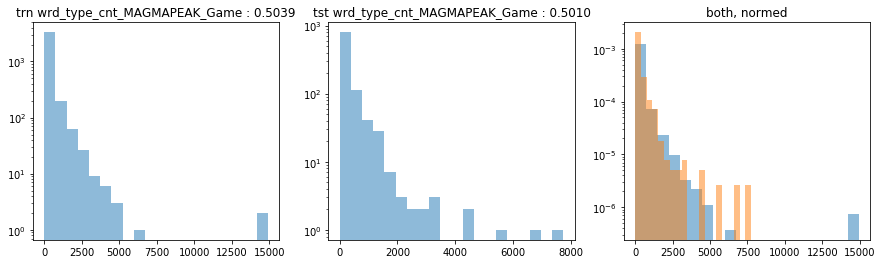

 ---------- wrd_type_cnt_NONE_Clip ---------- 


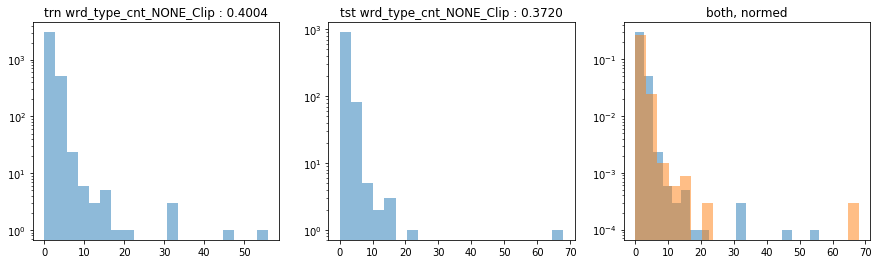

 ---------- wrd_type_cnt_TREETOPCITY_Activity ---------- 


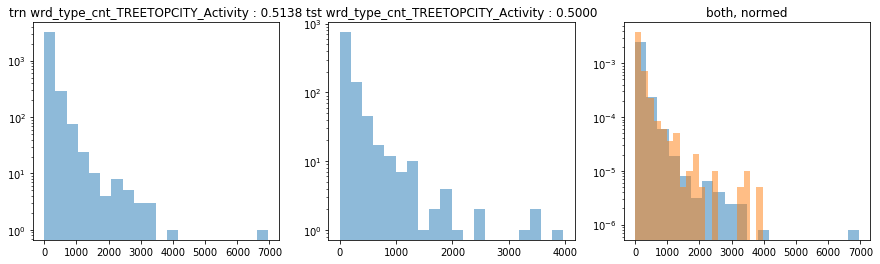

 ---------- wrd_type_cnt_TREETOPCITY_Assessment ---------- 


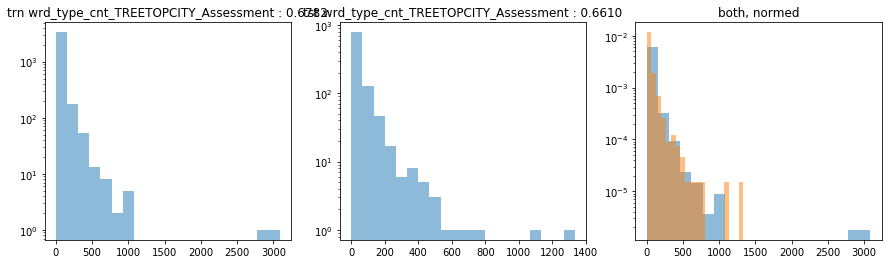

 ---------- wrd_type_cnt_TREETOPCITY_Clip ---------- 


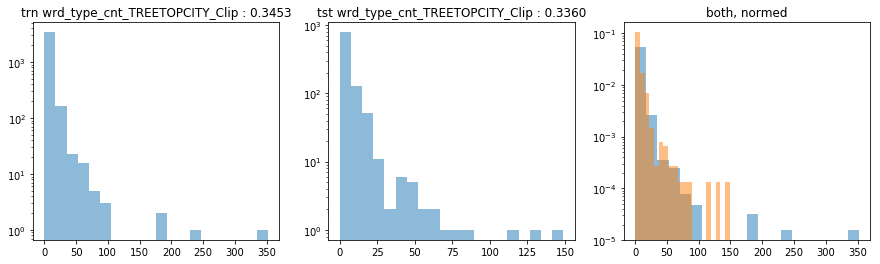

 ---------- wrd_type_cnt_TREETOPCITY_Game ---------- 


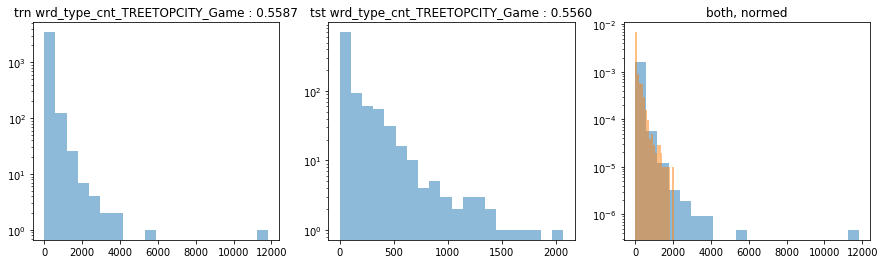

In [64]:
for col in tst_wc_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_wc_df[col], tst_wc_df[col])

#### EncodingTitles

In [66]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/EncodingTitles.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/EncodingTitles.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- title_enc ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


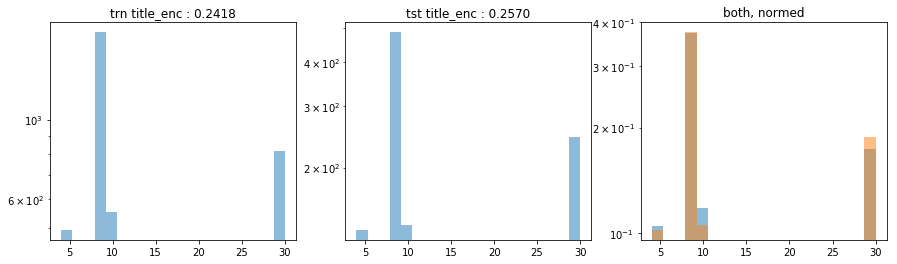

In [67]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### dtFeatures

In [21]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/dtFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/dtFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f002_dt_assesment_day ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


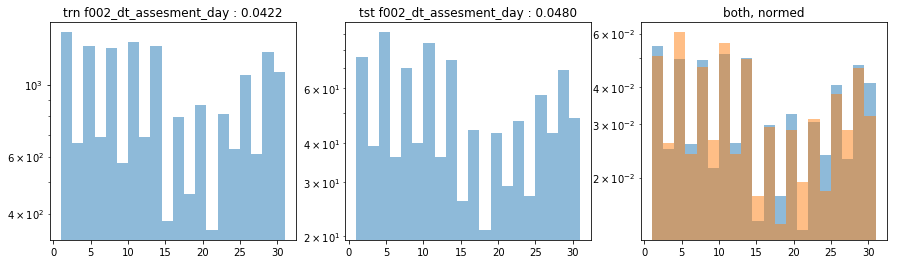

 ---------- f002_dt_assesment_dayofweek ---------- 


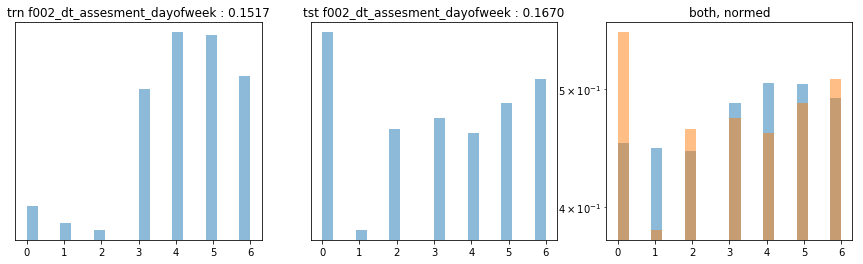

 ---------- f002_dt_assesment_hour ---------- 


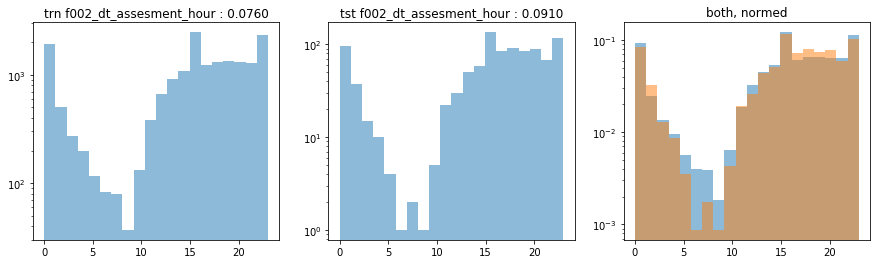

 ---------- f002_dt_assesment_month ---------- 


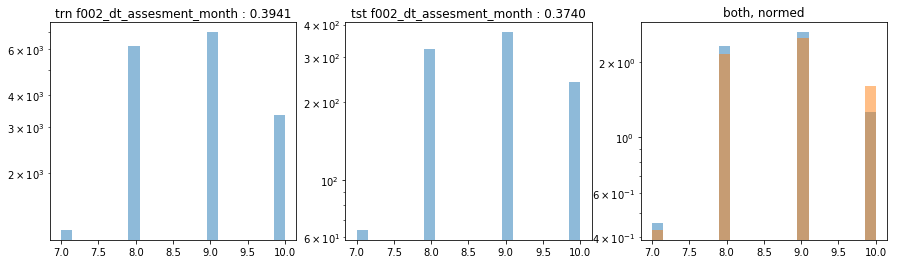

 ---------- f002_dt_assesment_minute ---------- 


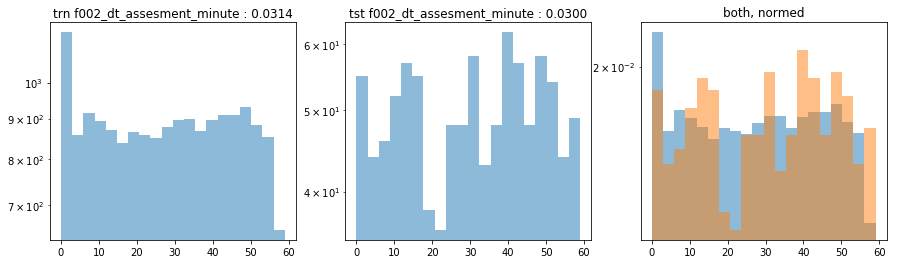

In [22]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### PrevAssessResult

In [17]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/PrevAssessResult.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/PrevAssessResult.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- accumassess_cnt_Bird Measurer (Assessment) ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


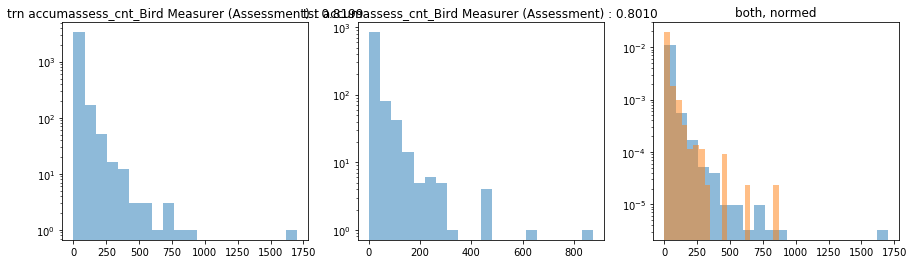

 ---------- accumassess_cnt_Cart Balancer (Assessment) ---------- 


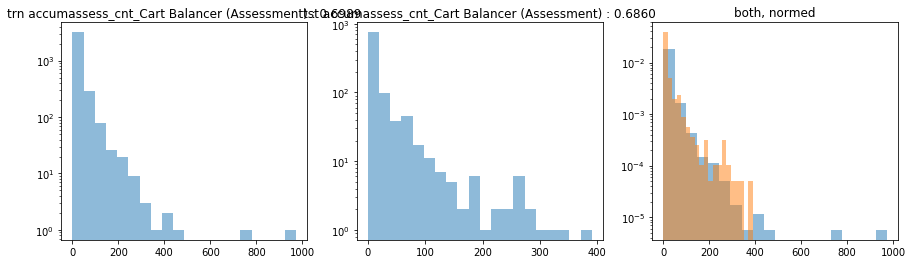

 ---------- accumassess_cnt_Cauldron Filler (Assessment) ---------- 


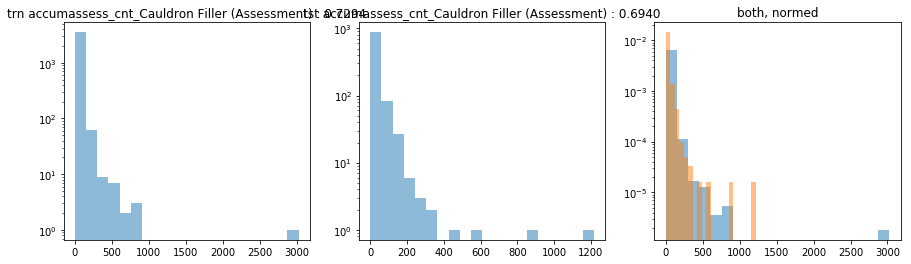

 ---------- accumassess_cnt_Chest Sorter (Assessment) ---------- 


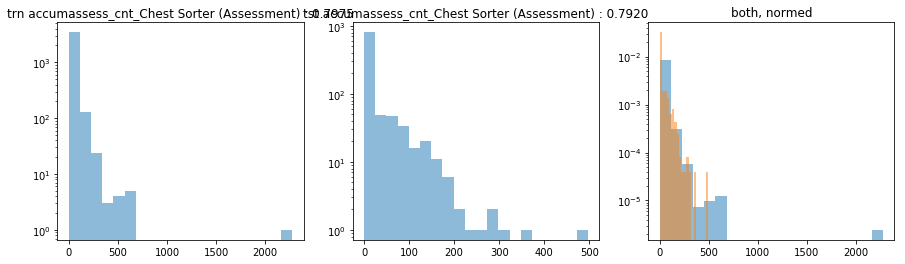

 ---------- accumassess_cnt_Mushroom Sorter (Assessment) ---------- 


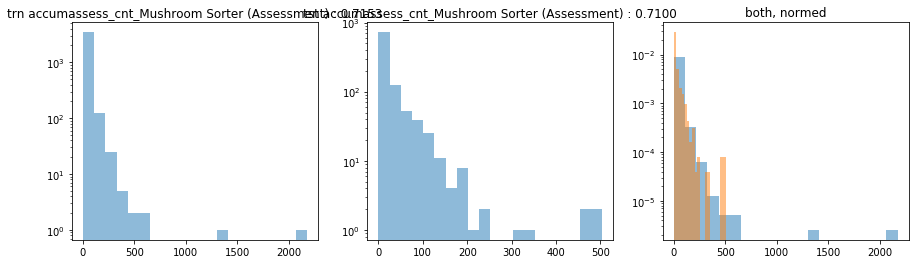

 ---------- assess_cnt_Bird Measurer (Assessment) ---------- 


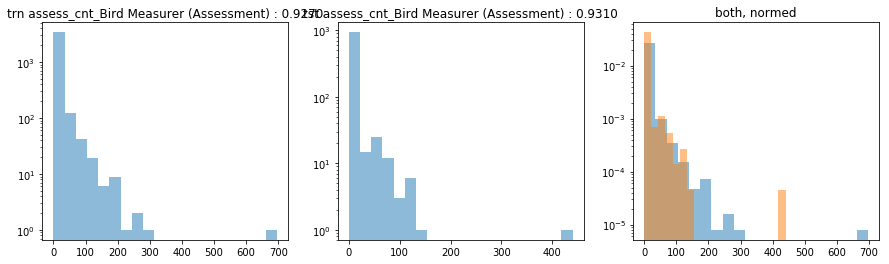

 ---------- assess_cnt_Cart Balancer (Assessment) ---------- 


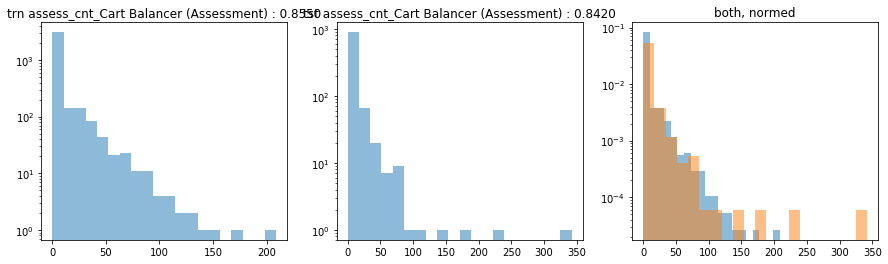

 ---------- assess_cnt_Cauldron Filler (Assessment) ---------- 


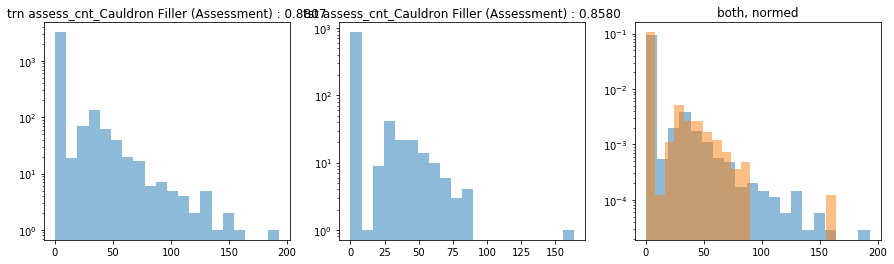

 ---------- assess_cnt_Chest Sorter (Assessment) ---------- 


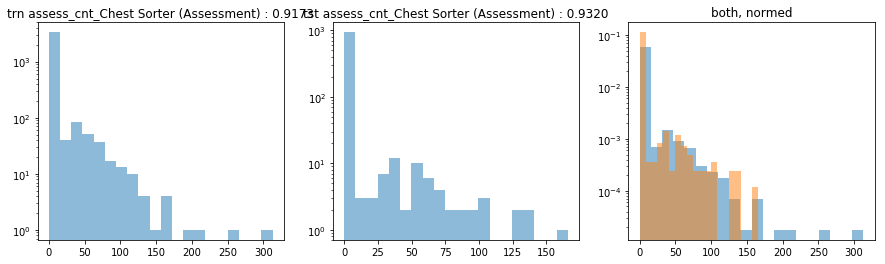

 ---------- assess_cnt_Mushroom Sorter (Assessment) ---------- 


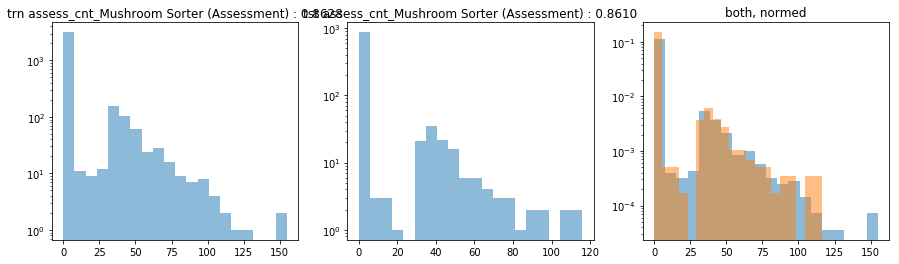

In [18]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### PrevAssessAcc

In [30]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/PrevAssessAcc.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/PrevAssessAcc.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- num_correct ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


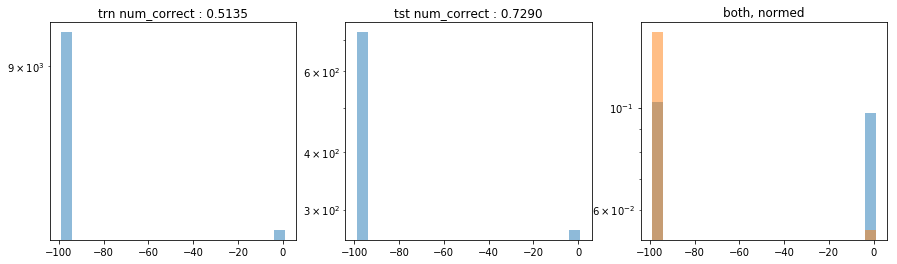

 ---------- num_incorrect ---------- 


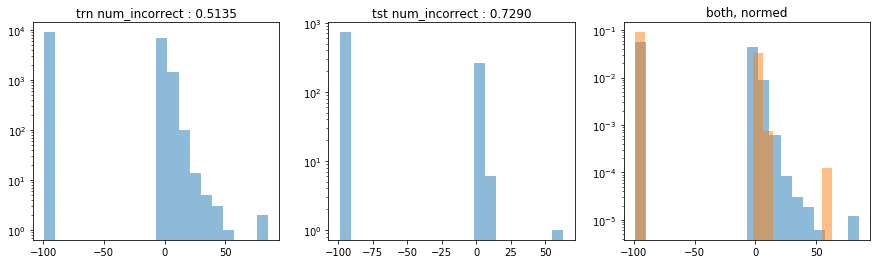

 ---------- as_acc_c_num ---------- 


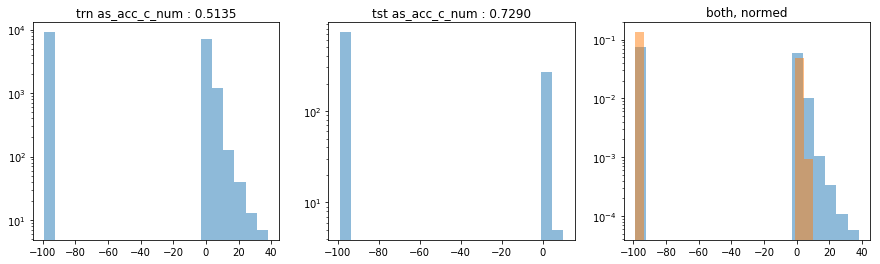

 ---------- as_acc_inc_num ---------- 


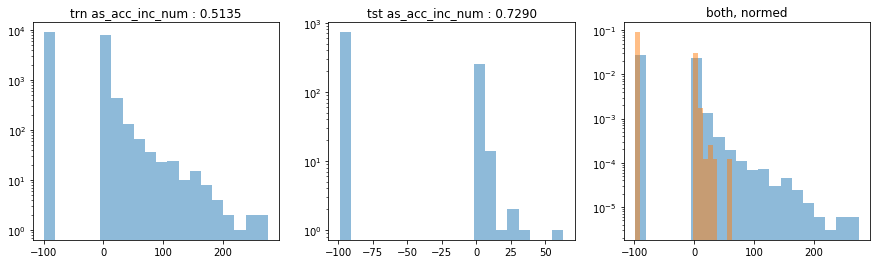

 ---------- as_prev_acc ---------- 


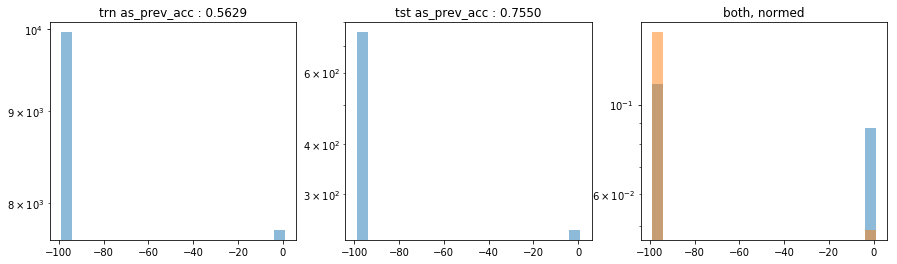

 ---------- as_cum_acc ---------- 


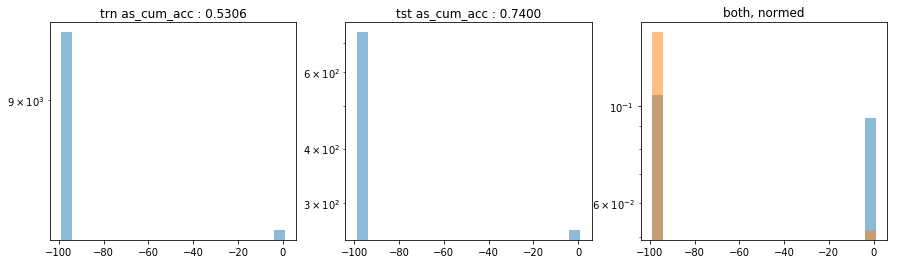

In [26]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

 ---------- num_correct ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


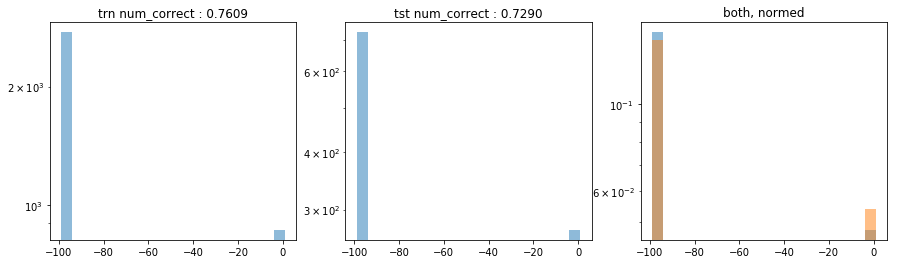

 ---------- num_incorrect ---------- 


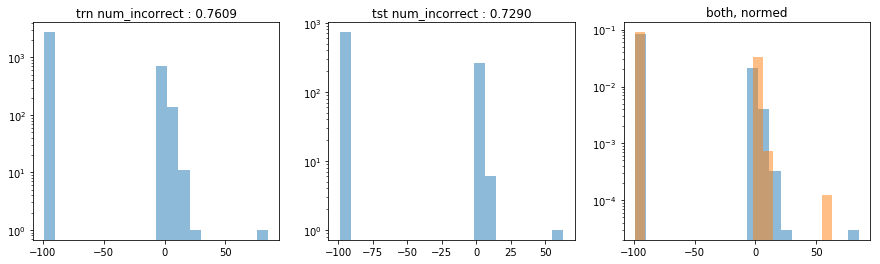

 ---------- as_acc_c_num ---------- 


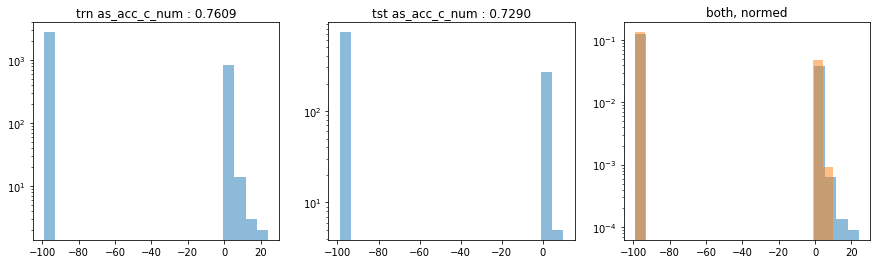

 ---------- as_acc_inc_num ---------- 


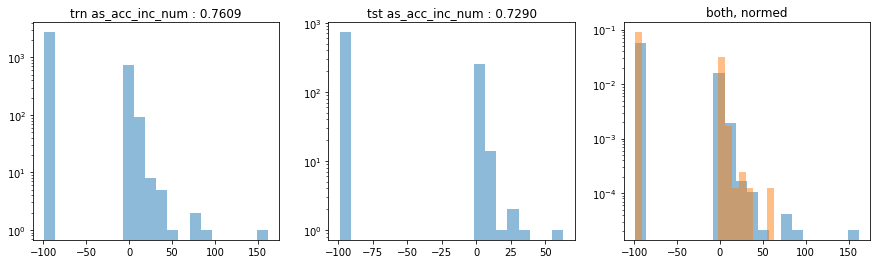

 ---------- as_prev_acc ---------- 


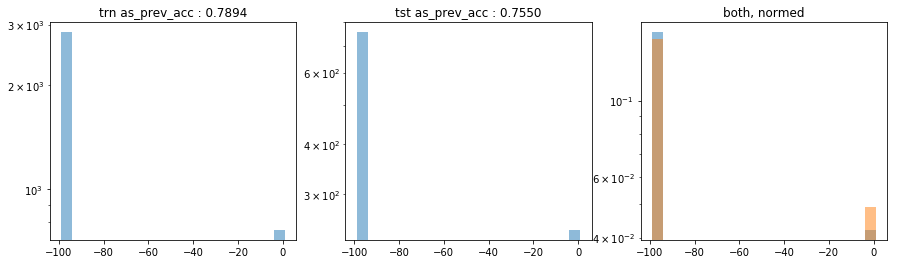

 ---------- as_cum_acc ---------- 


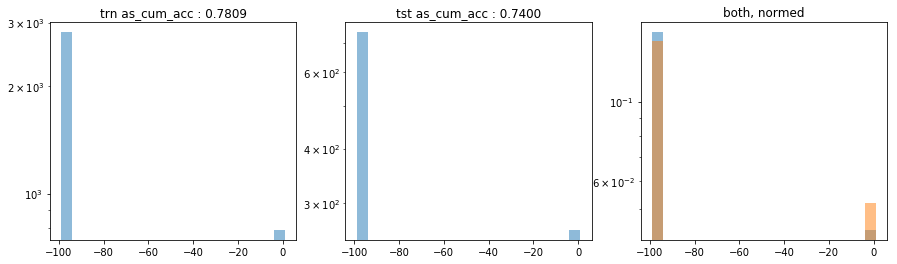

In [31]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### PrevAssessAccByTitle

In [71]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/PrevAssessAccByTitle.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/PrevAssessAccByTitle.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- cum_acc_cum_Bird Measurer (Assessment) ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


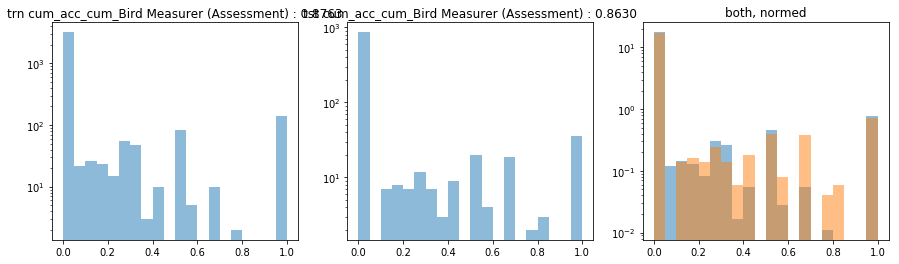

 ---------- cum_acc_cum_Cart Balancer (Assessment) ---------- 


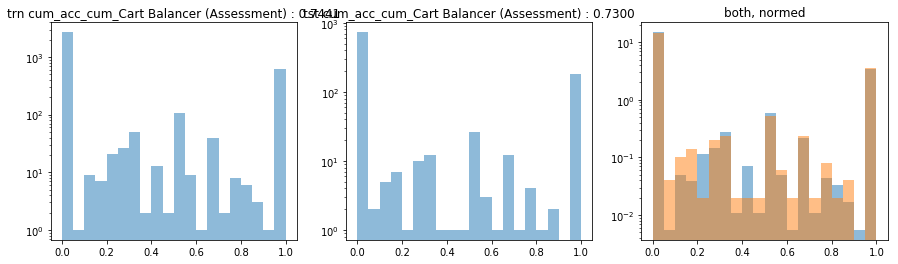

 ---------- cum_acc_cum_Cauldron Filler (Assessment) ---------- 


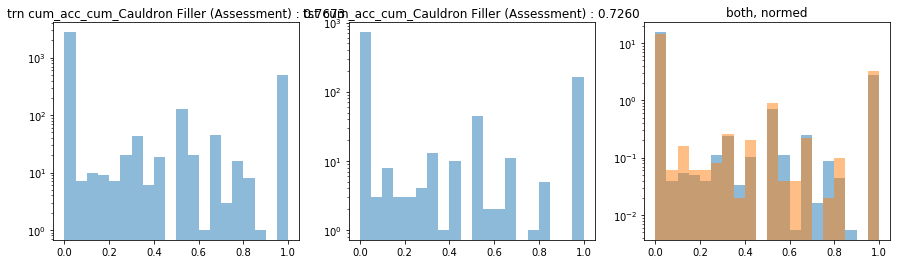

 ---------- cum_acc_cum_Chest Sorter (Assessment) ---------- 


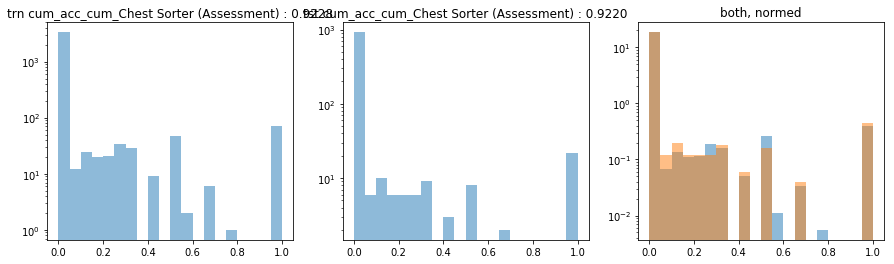

 ---------- cum_acc_cum_Mushroom Sorter (Assessment) ---------- 


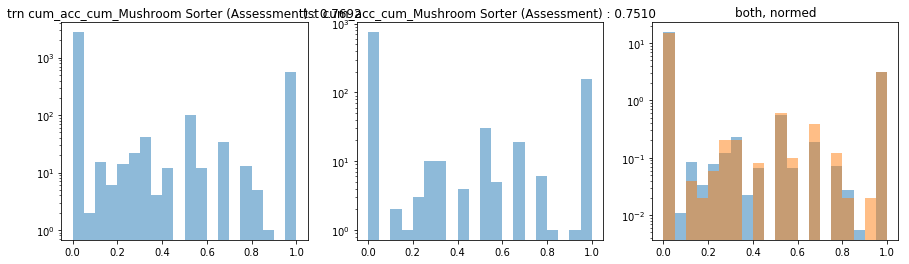

 ---------- cum_num_correct_Bird Measurer (Assessment) ---------- 


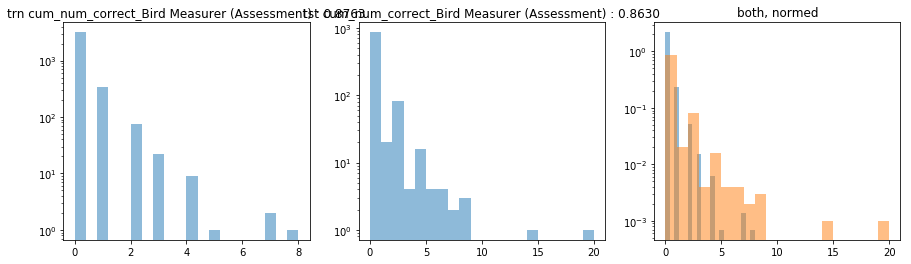

 ---------- cum_num_correct_Cart Balancer (Assessment) ---------- 


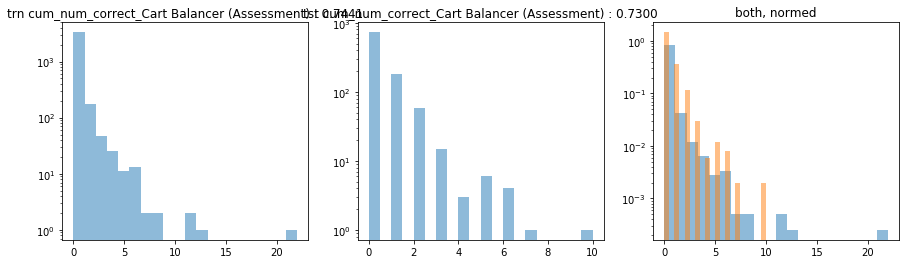

 ---------- cum_num_correct_Cauldron Filler (Assessment) ---------- 


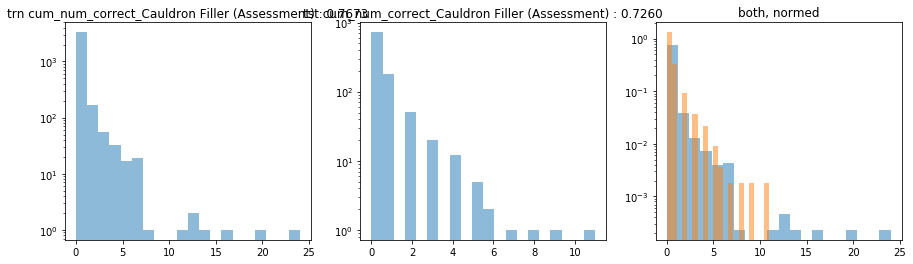

 ---------- cum_num_correct_Chest Sorter (Assessment) ---------- 


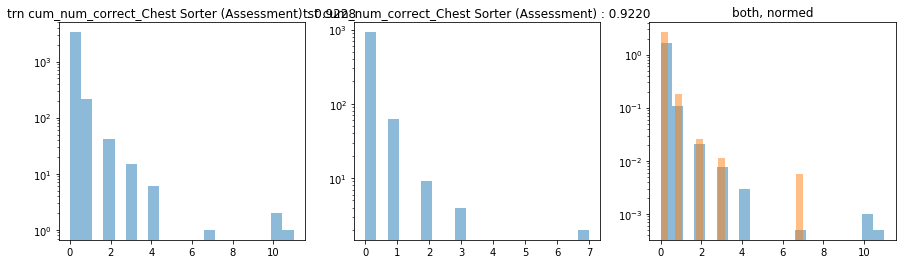

 ---------- cum_num_correct_Mushroom Sorter (Assessment) ---------- 


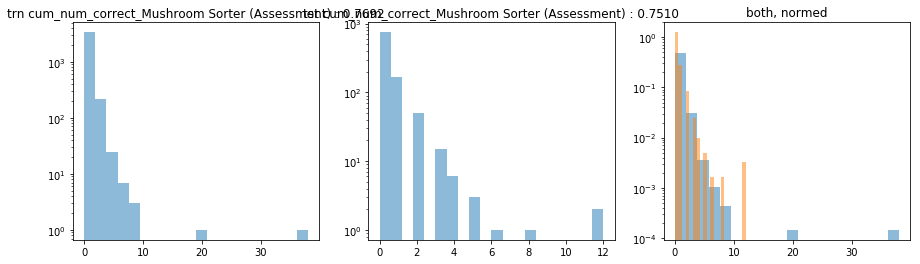

 ---------- cum_num_incorrect_Bird Measurer (Assessment) ---------- 


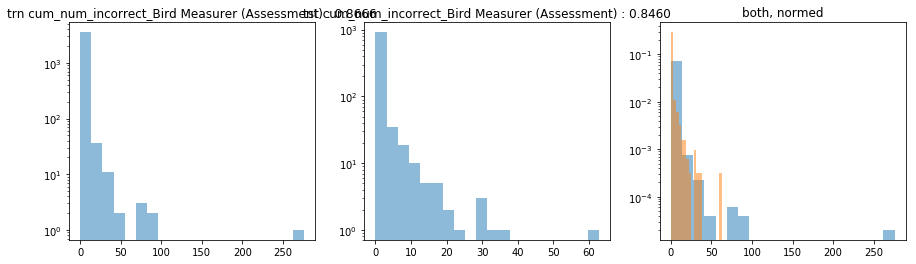

 ---------- cum_num_incorrect_Cart Balancer (Assessment) ---------- 


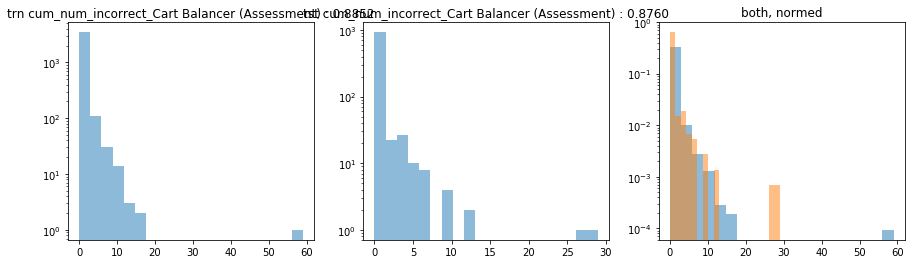

 ---------- cum_num_incorrect_Cauldron Filler (Assessment) ---------- 


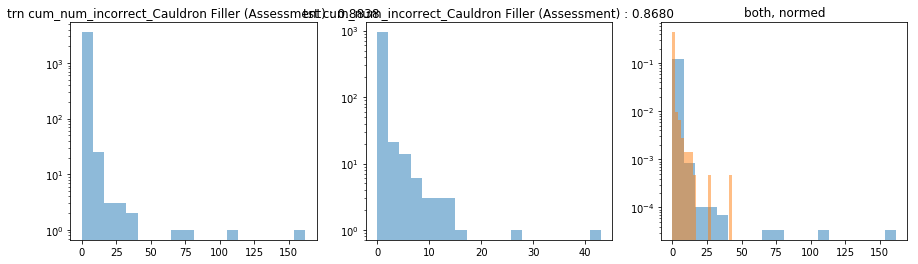

 ---------- cum_num_incorrect_Chest Sorter (Assessment) ---------- 


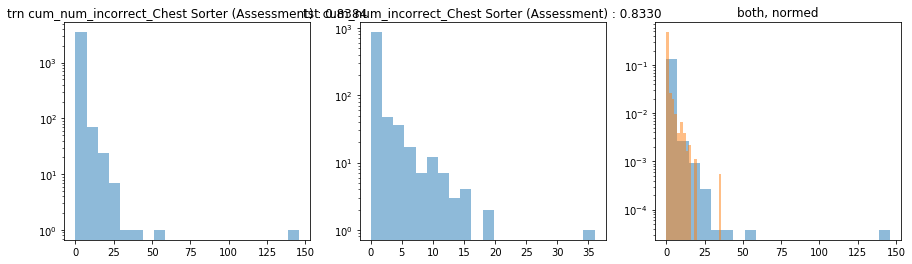

 ---------- cum_num_incorrect_Mushroom Sorter (Assessment) ---------- 


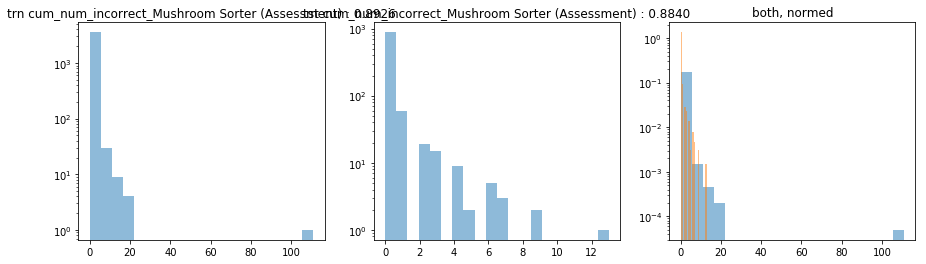

 ---------- num_correct_Bird Measurer (Assessment) ---------- 


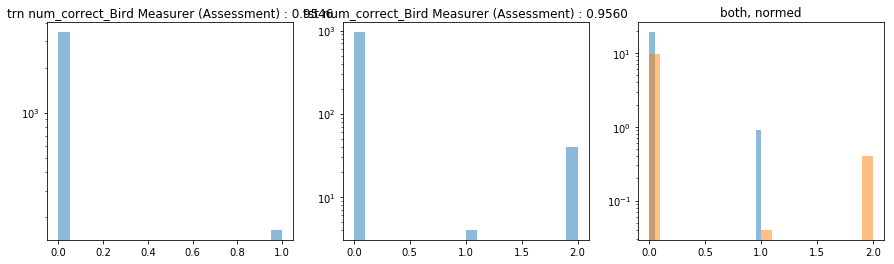

 ---------- num_correct_Cart Balancer (Assessment) ---------- 


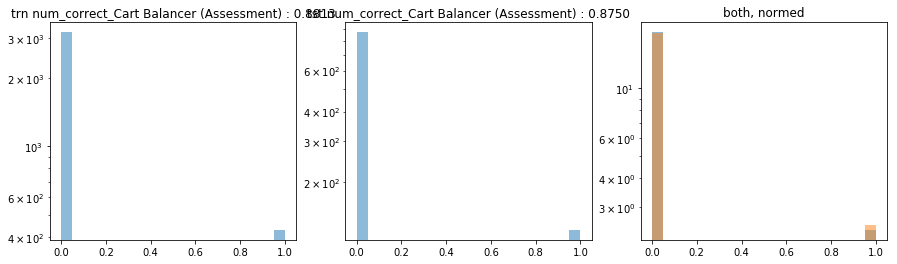

 ---------- num_correct_Cauldron Filler (Assessment) ---------- 


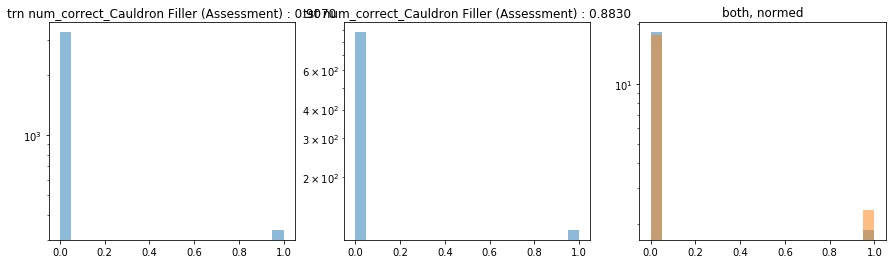

 ---------- num_correct_Chest Sorter (Assessment) ---------- 


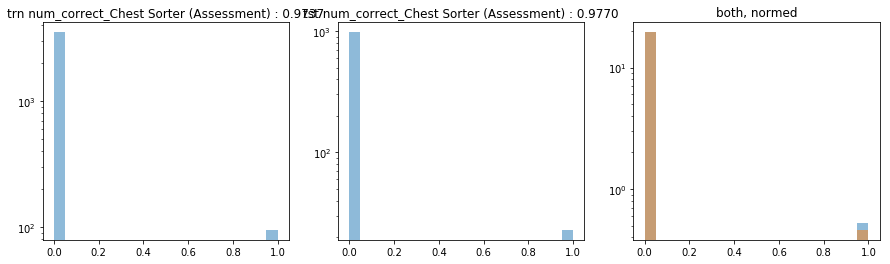

 ---------- num_correct_Mushroom Sorter (Assessment) ---------- 


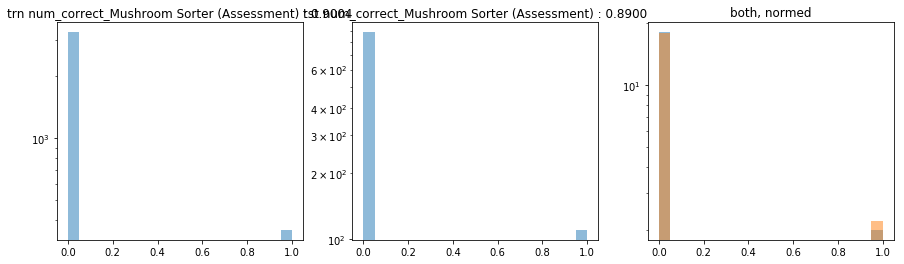

 ---------- num_incorrect_Bird Measurer (Assessment) ---------- 


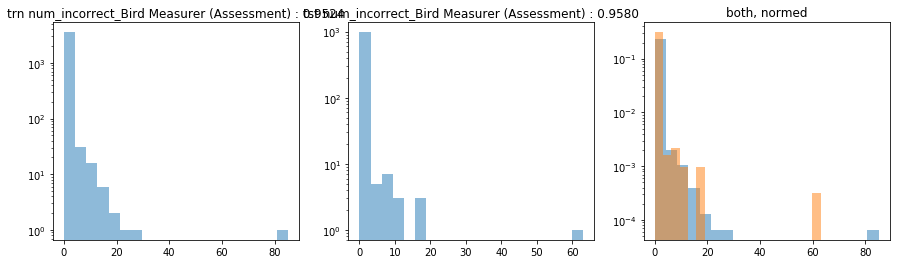

 ---------- num_incorrect_Cart Balancer (Assessment) ---------- 


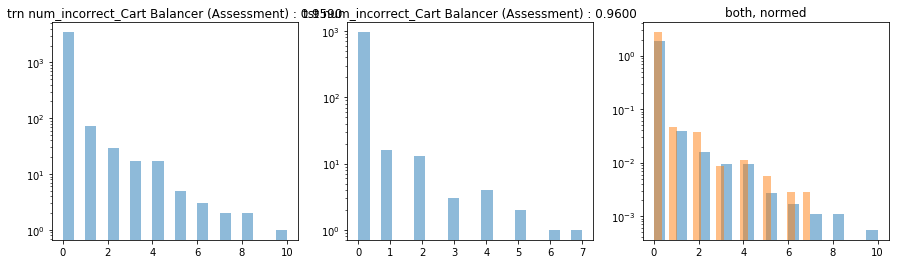

 ---------- num_incorrect_Cauldron Filler (Assessment) ---------- 


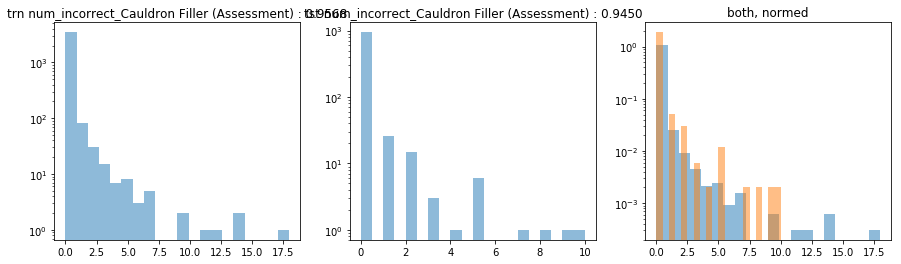

 ---------- num_incorrect_Chest Sorter (Assessment) ---------- 


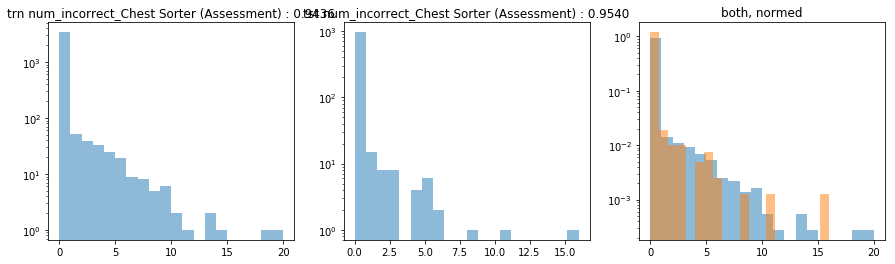

 ---------- num_incorrect_Mushroom Sorter (Assessment) ---------- 


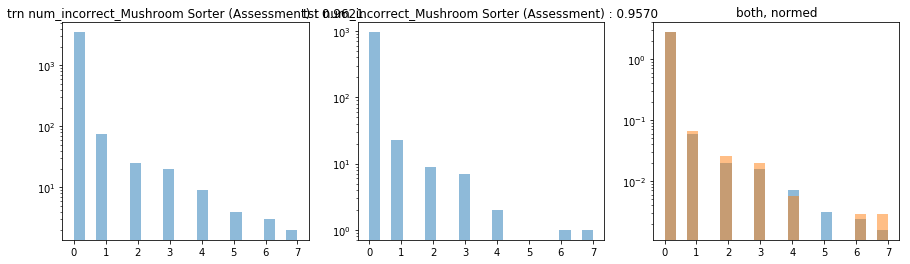

In [72]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### PrevAssessAccByTitle2

In [23]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/PrevAssessAccByTitle2.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/PrevAssessAccByTitle2.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- cum_accuracy_Bird Measurer (Assessment) ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


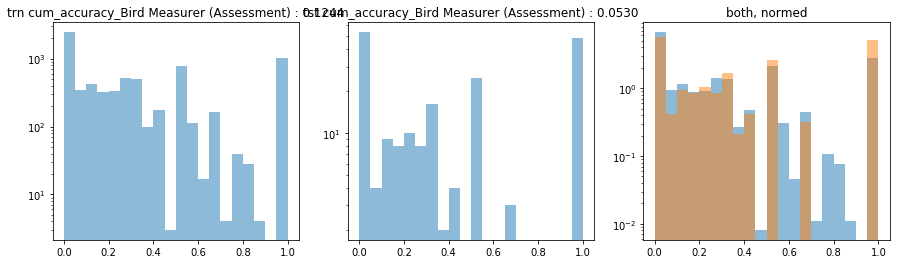

 ---------- cum_accuracy_Cart Balancer (Assessment) ---------- 


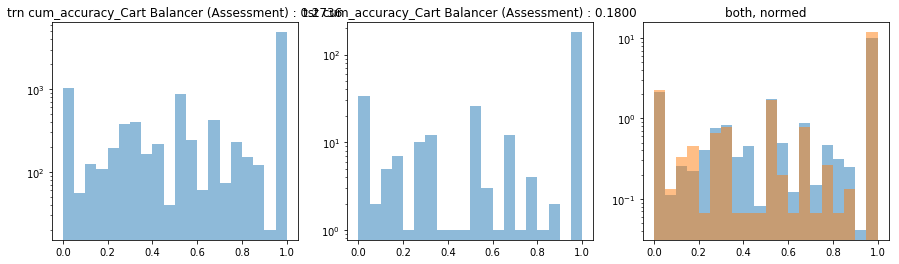

 ---------- cum_accuracy_Cauldron Filler (Assessment) ---------- 


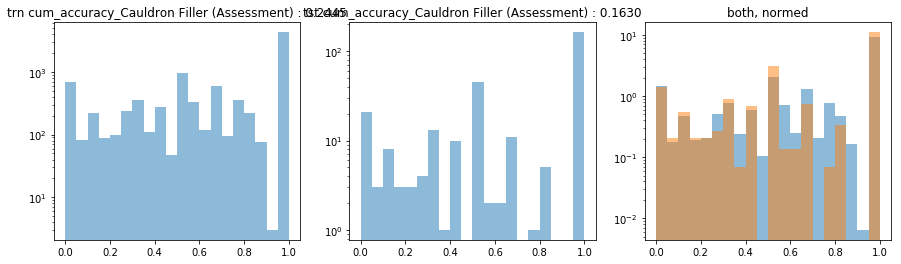

 ---------- cum_accuracy_Chest Sorter (Assessment) ---------- 


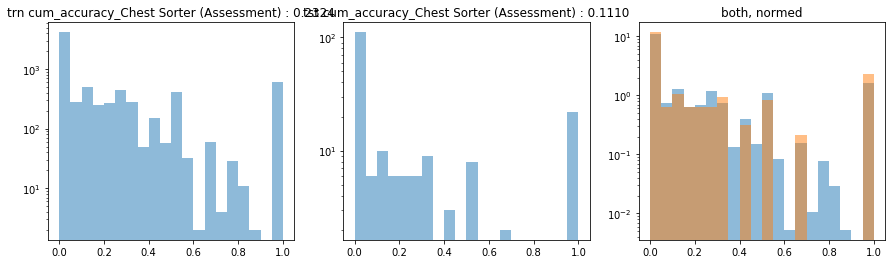

 ---------- cum_accuracy_Mushroom Sorter (Assessment) ---------- 


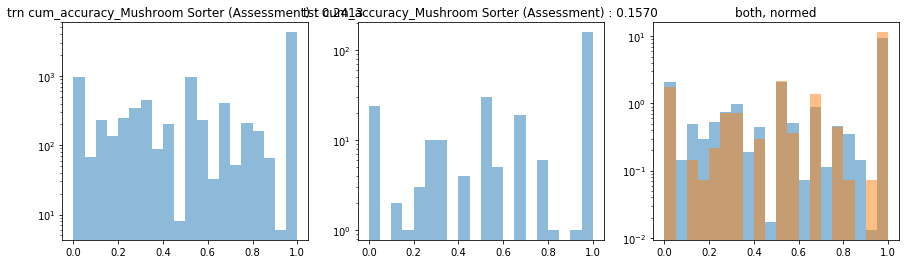

 ---------- cumsum_num_correct_Bird Measurer (Assessment) ---------- 


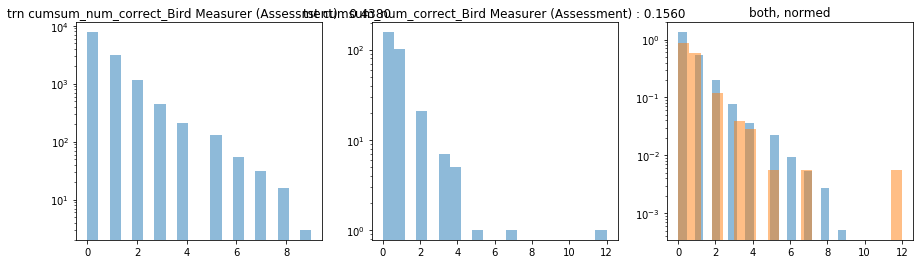

 ---------- cumsum_num_correct_Cart Balancer (Assessment) ---------- 


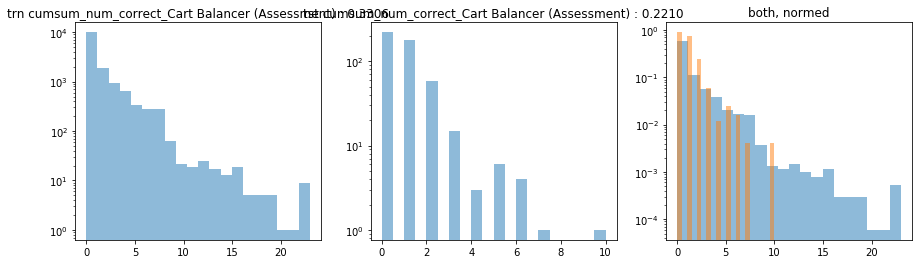

 ---------- cumsum_num_correct_Cauldron Filler (Assessment) ---------- 


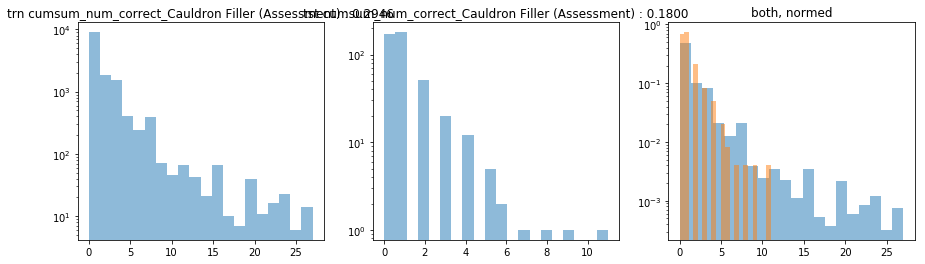

 ---------- cumsum_num_correct_Chest Sorter (Assessment) ---------- 


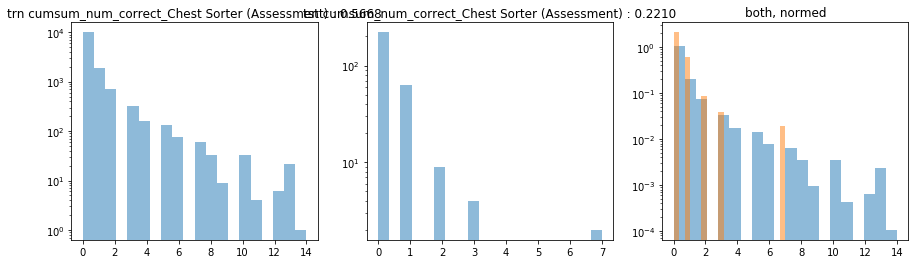

 ---------- cumsum_num_correct_Mushroom Sorter (Assessment) ---------- 


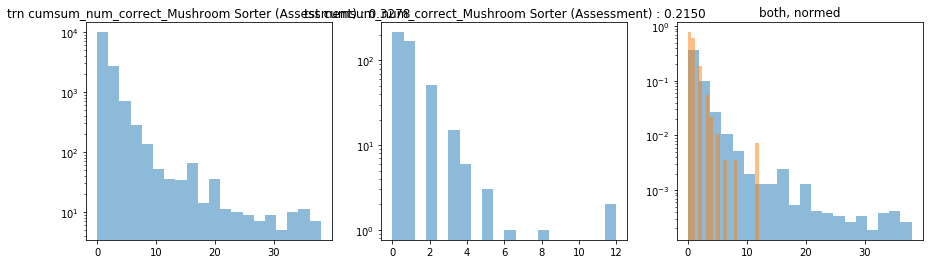

 ---------- cumsum_num_incorrect_Bird Measurer (Assessment) ---------- 


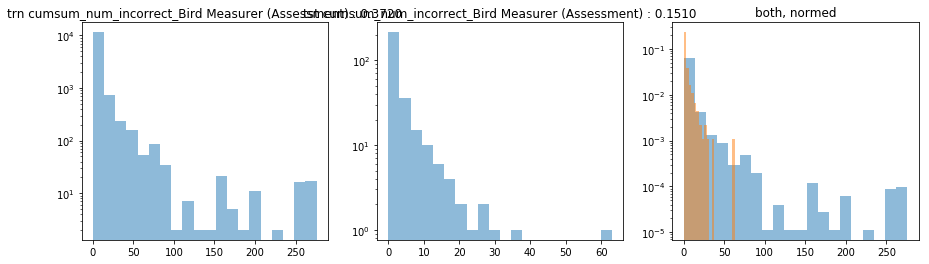

 ---------- cumsum_num_incorrect_Cart Balancer (Assessment) ---------- 


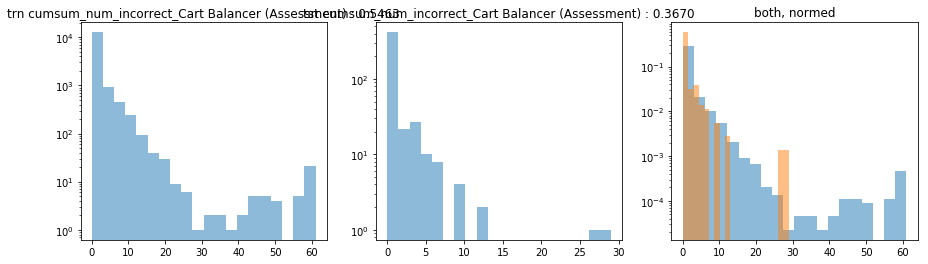

 ---------- cumsum_num_incorrect_Cauldron Filler (Assessment) ---------- 


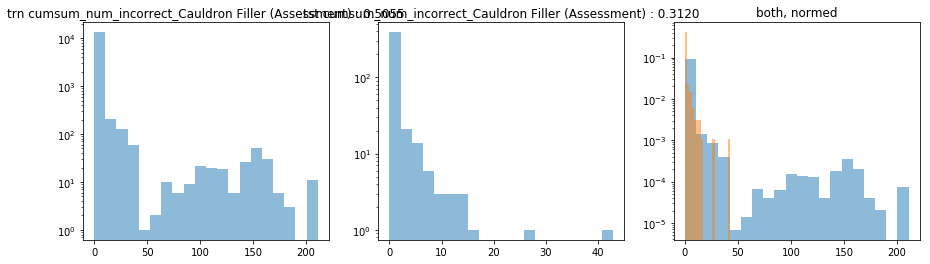

 ---------- cumsum_num_incorrect_Chest Sorter (Assessment) ---------- 


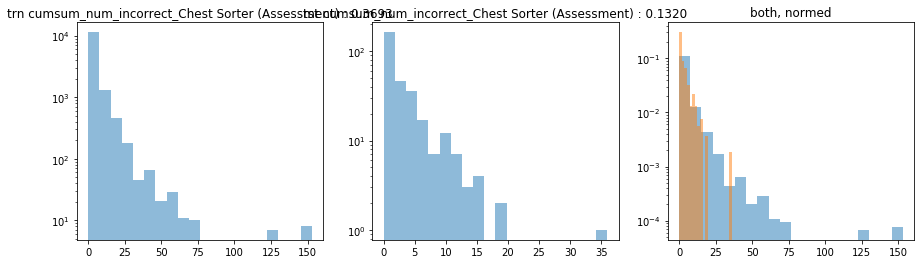

 ---------- cumsum_num_incorrect_Mushroom Sorter (Assessment) ---------- 


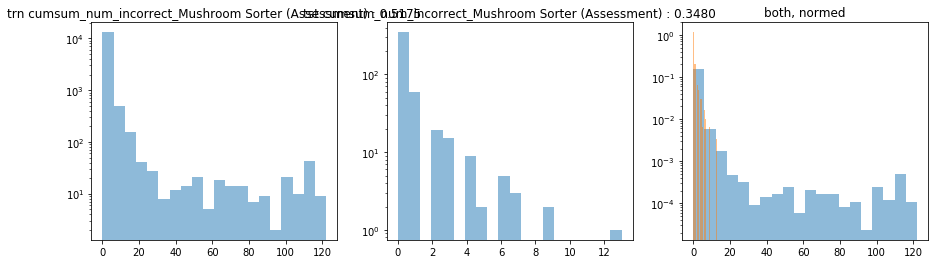

 ---------- num_correct_Bird Measurer (Assessment) ---------- 


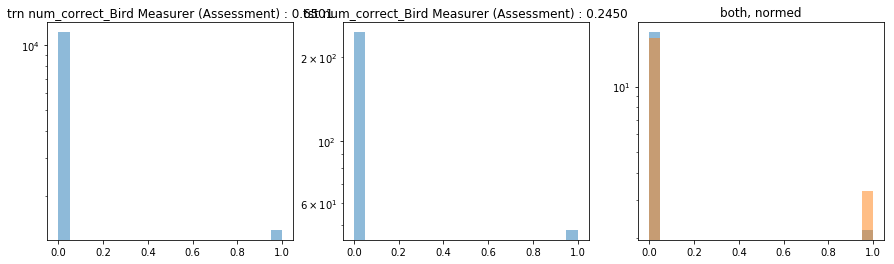

 ---------- num_correct_Cart Balancer (Assessment) ---------- 


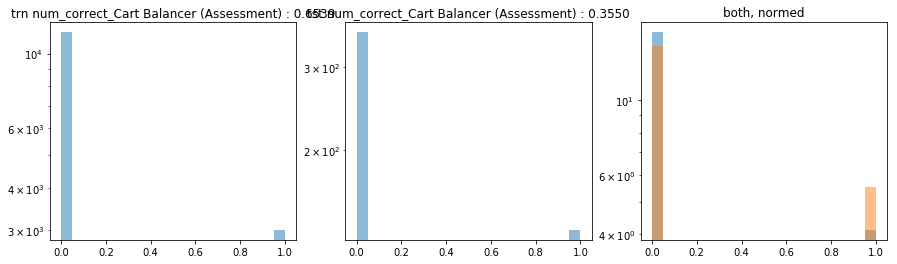

 ---------- num_correct_Cauldron Filler (Assessment) ---------- 


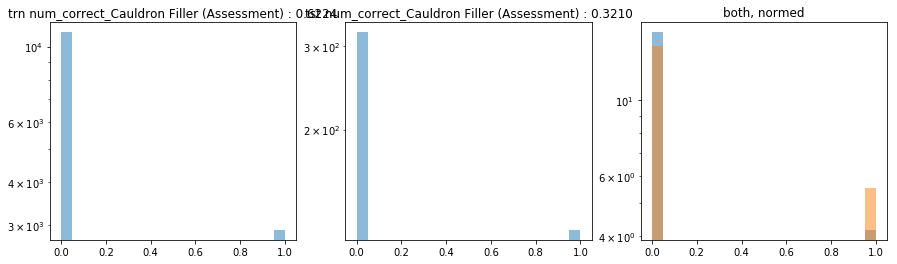

 ---------- num_correct_Chest Sorter (Assessment) ---------- 


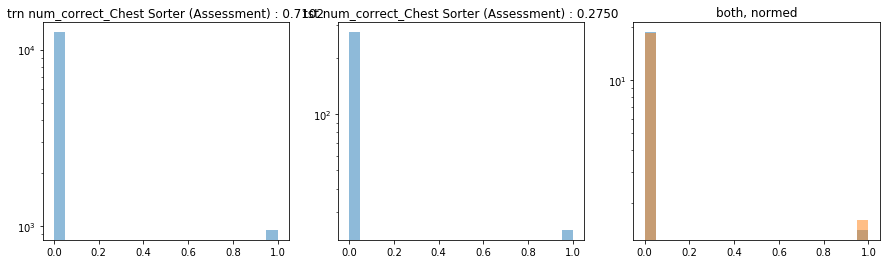

 ---------- num_correct_Mushroom Sorter (Assessment) ---------- 


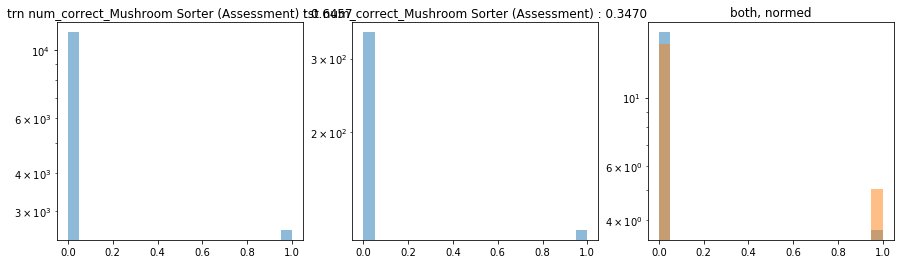

 ---------- num_incorrect_Bird Measurer (Assessment) ---------- 


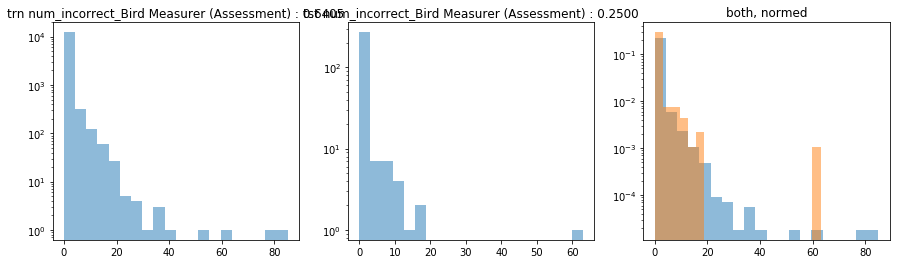

 ---------- num_incorrect_Cart Balancer (Assessment) ---------- 


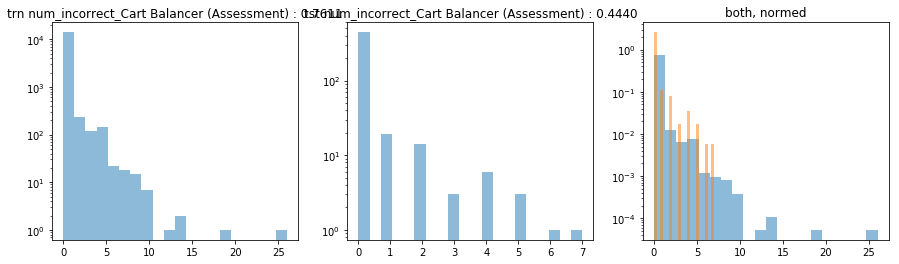

 ---------- num_incorrect_Cauldron Filler (Assessment) ---------- 


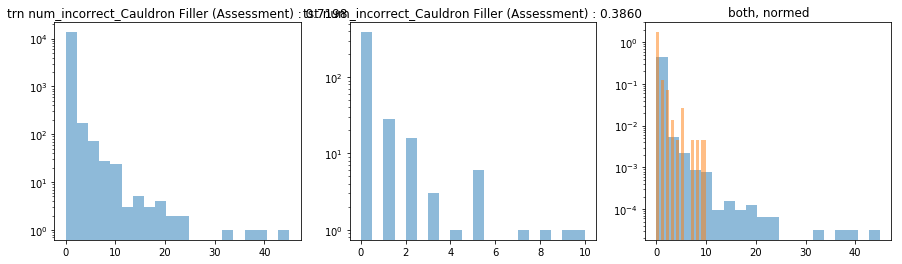

 ---------- num_incorrect_Chest Sorter (Assessment) ---------- 


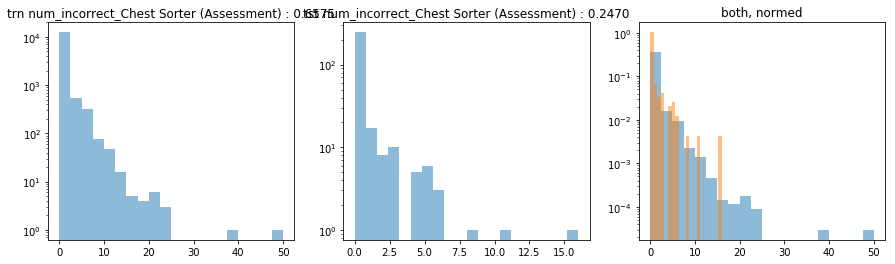

 ---------- num_incorrect_Mushroom Sorter (Assessment) ---------- 


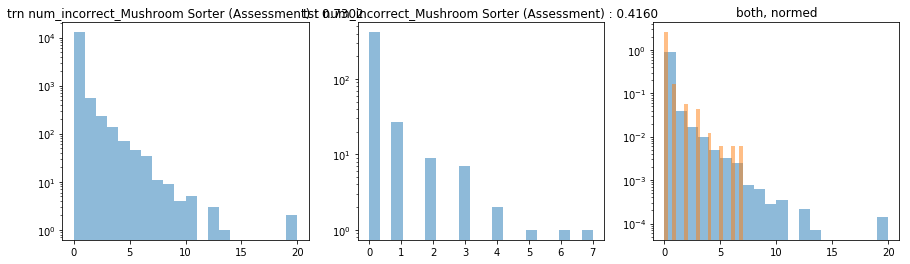

In [24]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### GameDurMiss

In [75]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/GameDurMiss.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/GameDurMiss.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- g_duration_min ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


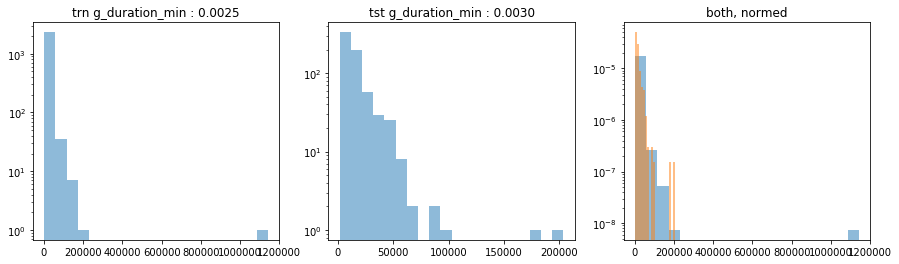

 ---------- g_duration_mean ---------- 


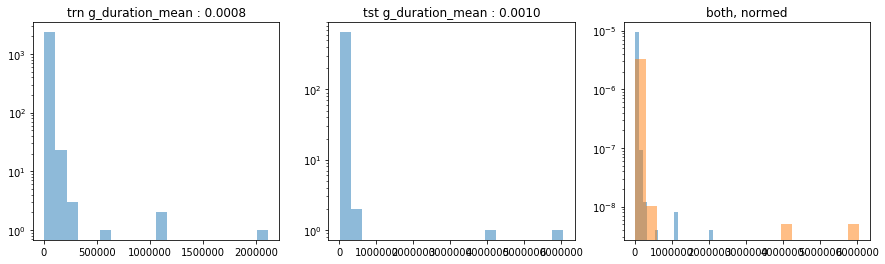

 ---------- g_duration_max ---------- 


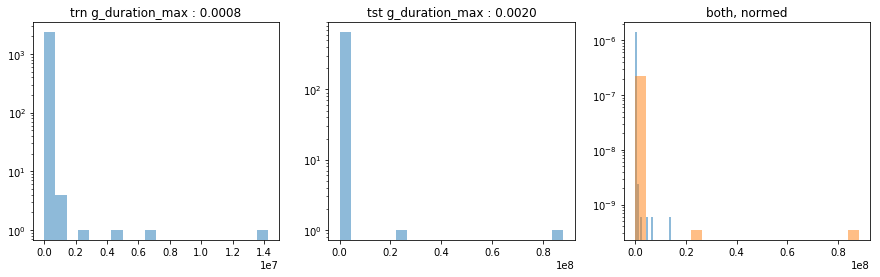

 ---------- g_duration_std ---------- 


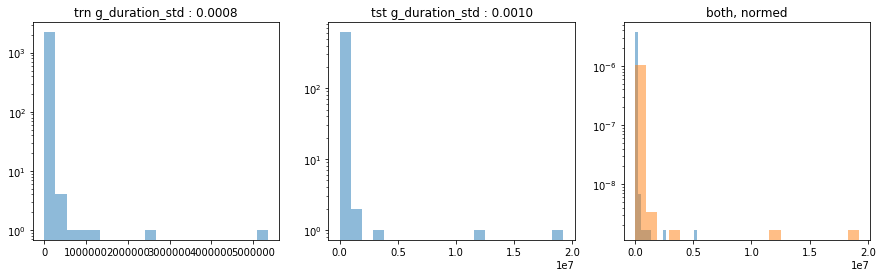

 ---------- g_duration_count ---------- 


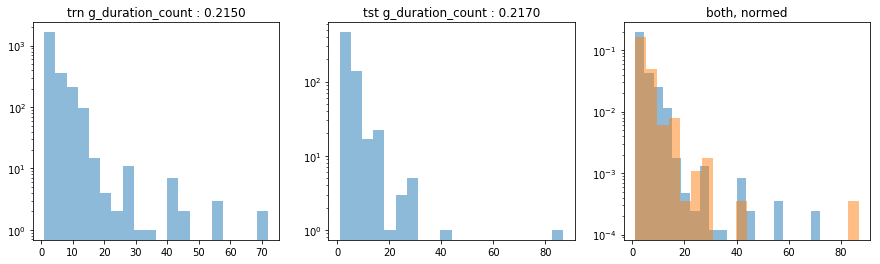

 ---------- g_misses_min ---------- 


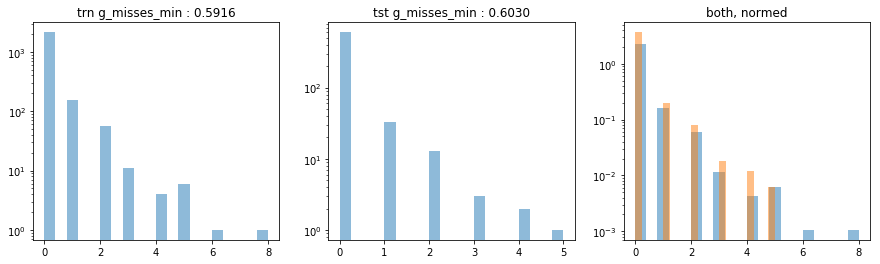

 ---------- g_misses_mean ---------- 


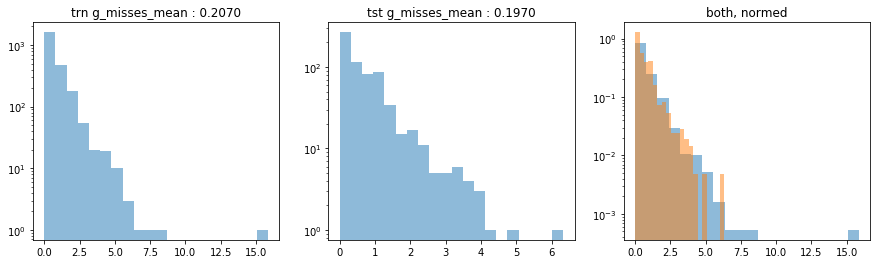

 ---------- g_misses_max ---------- 


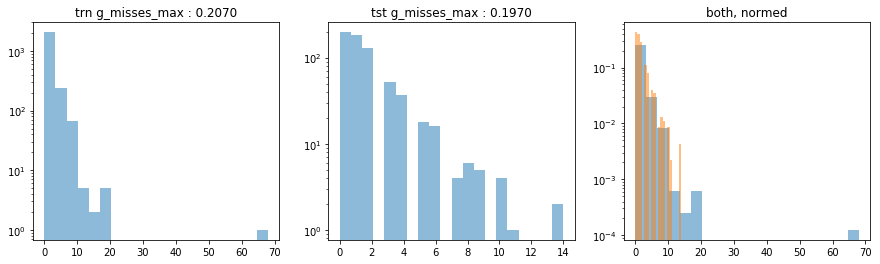

 ---------- g_misses_std ---------- 


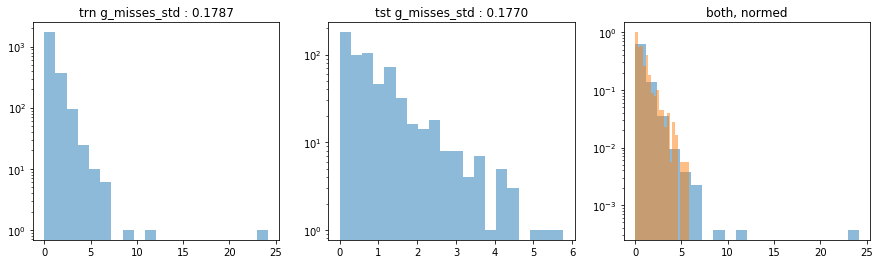

 ---------- mean_g_duration_min ---------- 


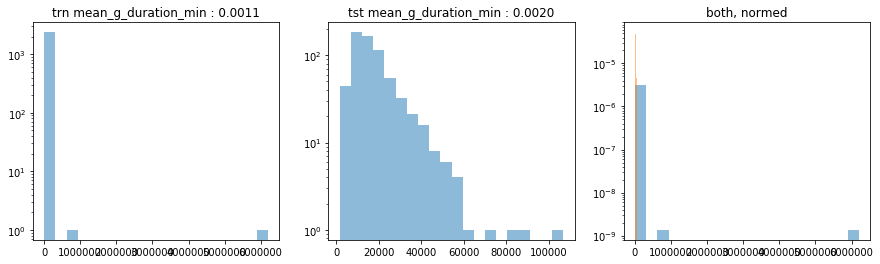

 ---------- mean_g_duration_mean ---------- 


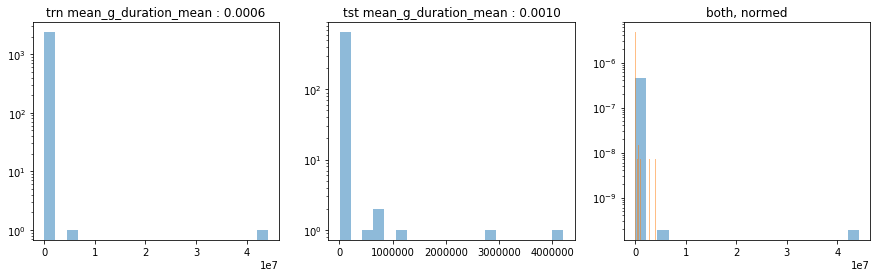

 ---------- mean_g_duration_max ---------- 


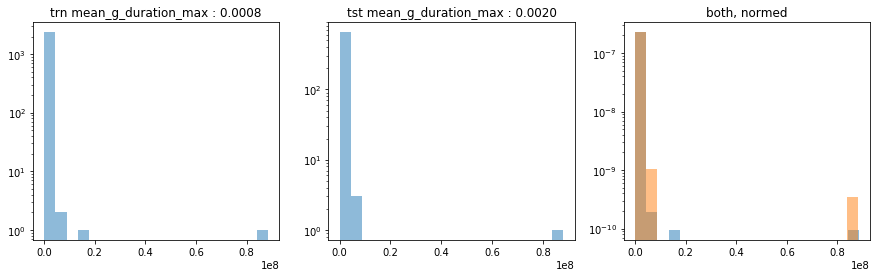

 ---------- mean_g_duration_std ---------- 


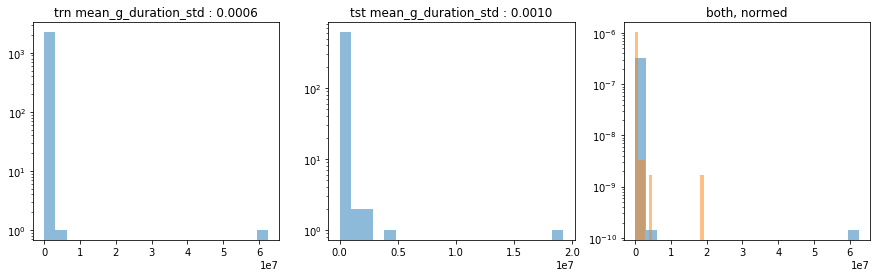

 ---------- mean_g_duration_count ---------- 


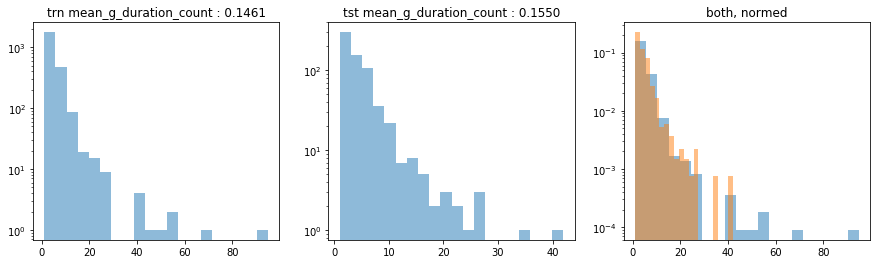

 ---------- mean_g_misses_min ---------- 


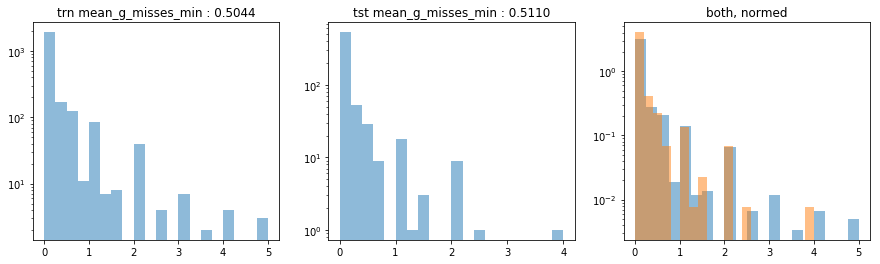

 ---------- mean_g_misses_mean ---------- 


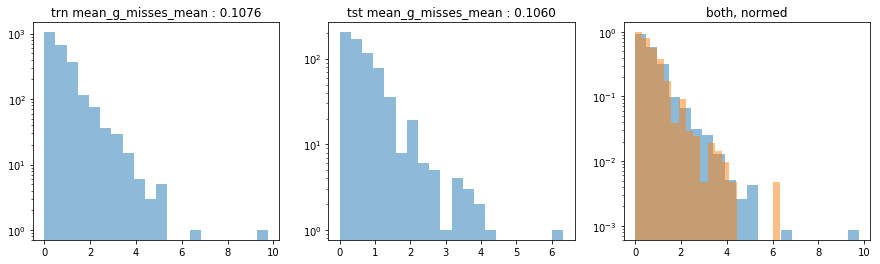

 ---------- mean_g_misses_max ---------- 


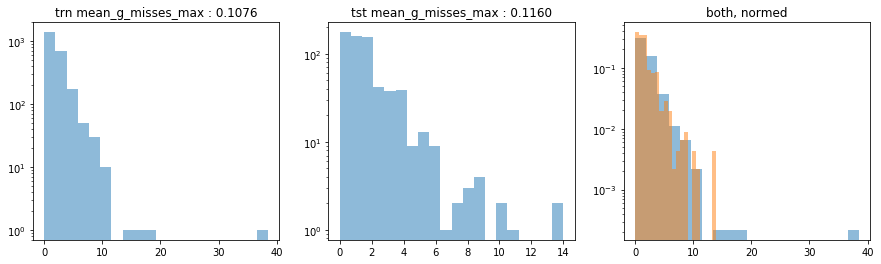

 ---------- mean_g_misses_std ---------- 


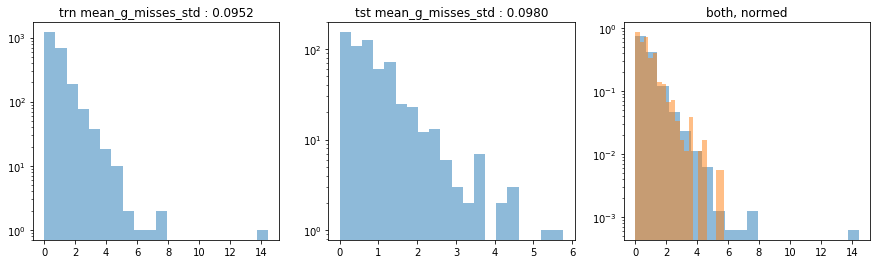

 ---------- cumnum ---------- 


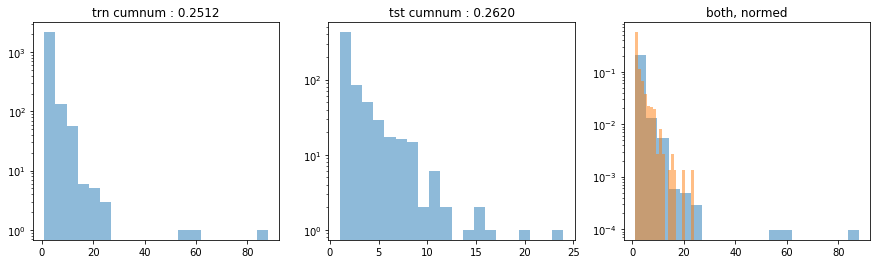

In [77]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

In [15]:
trn_et_df.isnull().sum()

game_session                                  0
installation_id                               0
f008_1th_before_session_event_count_max     113
f008_1th_before_session_event_code_last     113
f008_1th_before_session_game_time_max       113
f008_1th_before_session_game_time_skew     6293
f008_1th_before_session_game_time_kurt     6451
f008_1th_before_session_title_LE            113
f008_1th_before_session_type_LE             113
f008_1th_before_session_world_LE            113
dtype: int64

In [16]:
tst_et_df.isnull().sum()

game_session                                 0
installation_id                              0
f008_1th_before_session_event_count_max     17
f008_1th_before_session_event_code_last     17
f008_1th_before_session_game_time_max       17
f008_1th_before_session_game_time_skew     396
f008_1th_before_session_game_time_kurt     406
f008_1th_before_session_title_LE            17
f008_1th_before_session_type_LE             17
f008_1th_before_session_world_LE            17
dtype: int64

#### immediatelyBeforeFeatures

In [13]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/immediatelyBeforeFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/immediatelyBeforeFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f008_1th_before_session_event_count_max ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


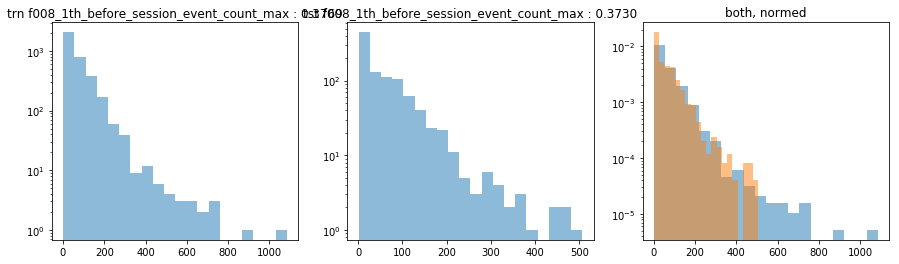

 ---------- f008_1th_before_session_event_code_last ---------- 


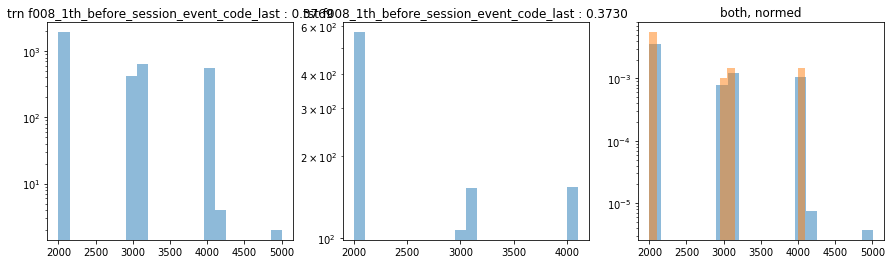

 ---------- f008_1th_before_session_game_time_max ---------- 


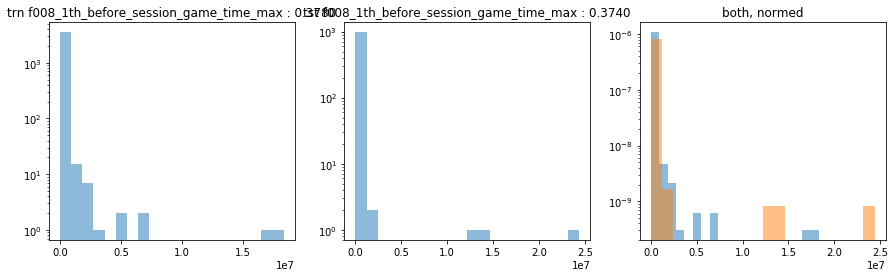

 ---------- f008_1th_before_session_game_time_skew ---------- 


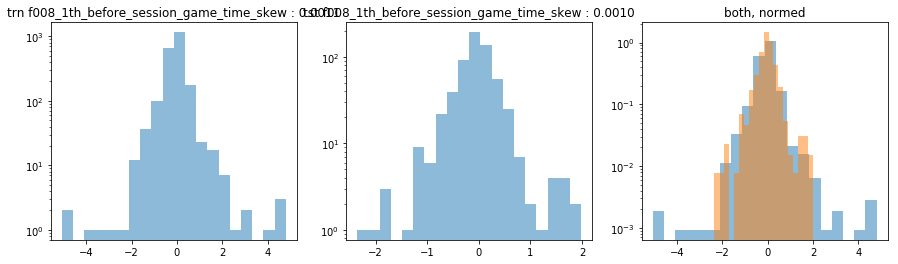

 ---------- f008_1th_before_session_game_time_kurt ---------- 


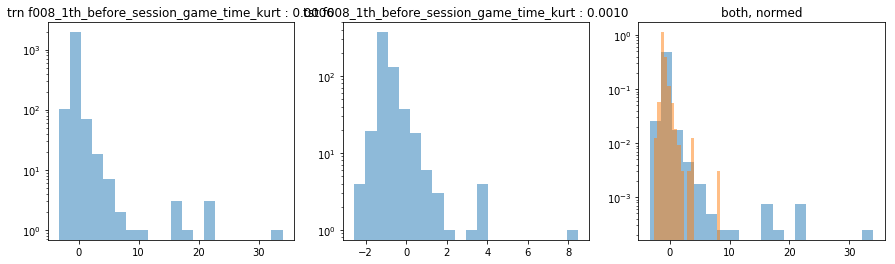

 ---------- f008_1th_before_session_title_LE ---------- 


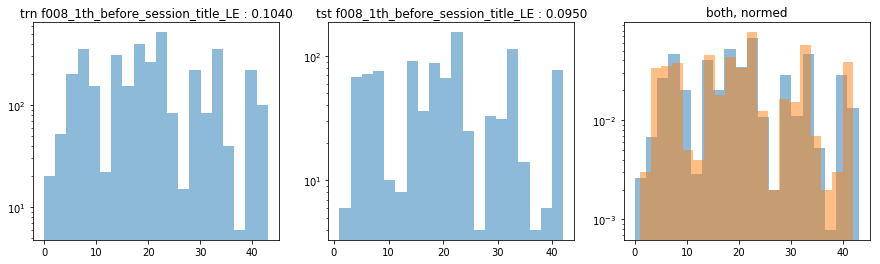

 ---------- f008_1th_before_session_type_LE ---------- 


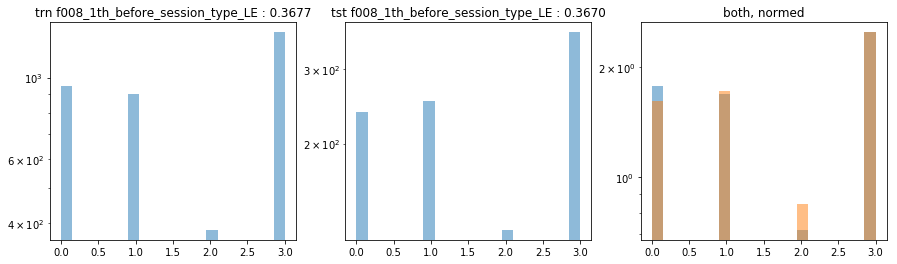

 ---------- f008_1th_before_session_world_LE ---------- 


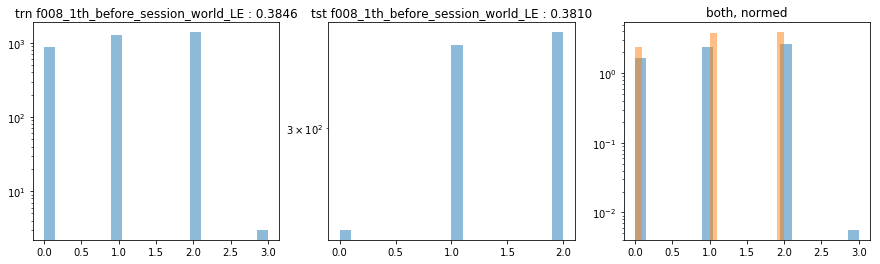

In [81]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### worldGameNumeriacalFeatures

In [39]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/worldGameNumeriacalFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/worldGameNumeriacalFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_max ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


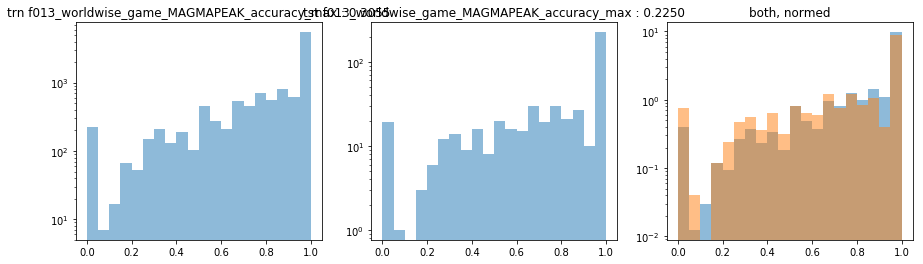

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_min ---------- 


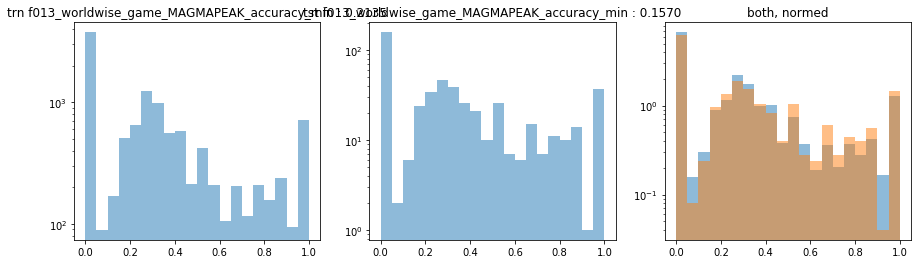

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_mean ---------- 


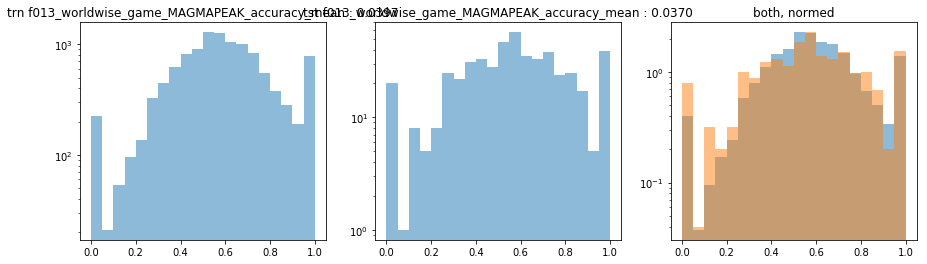

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_std ---------- 


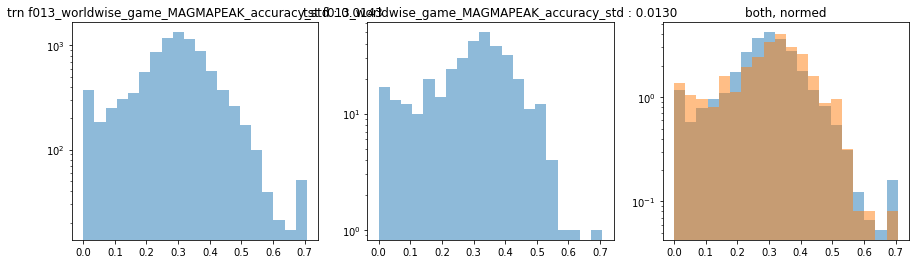

 ---------- f013_worldwise_game_MAGMAPEAK_just_before_accuracy ---------- 


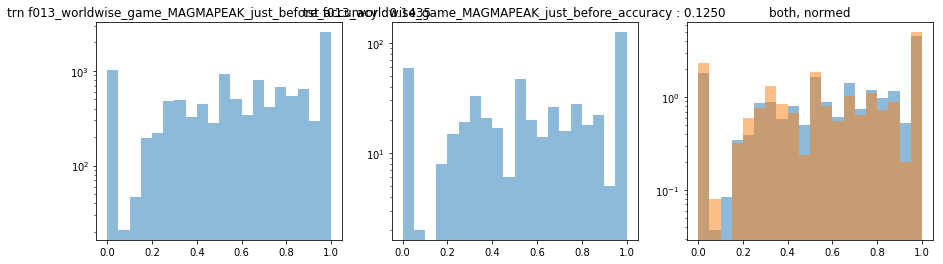

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_max ---------- 


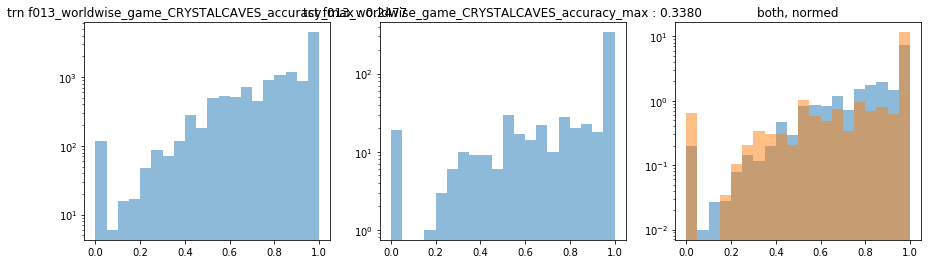

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_min ---------- 


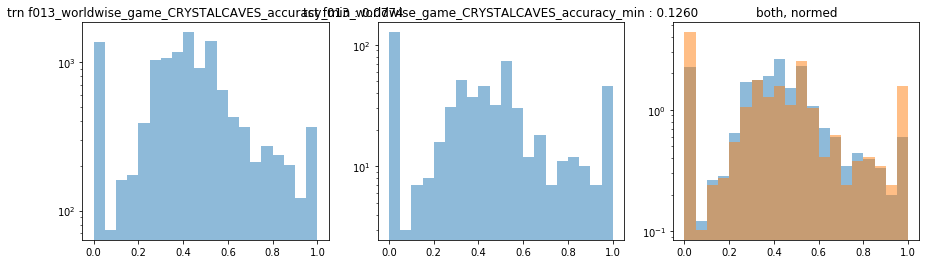

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_mean ---------- 


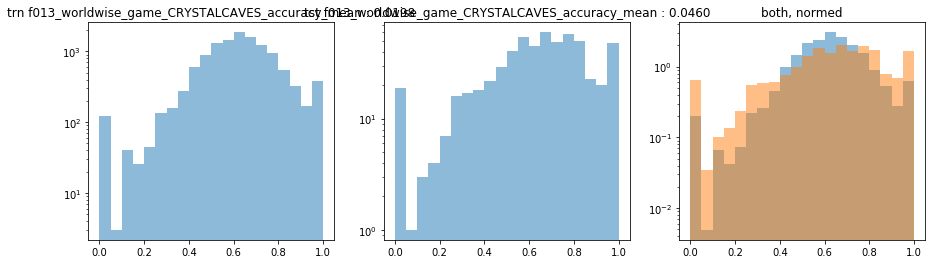

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_std ---------- 


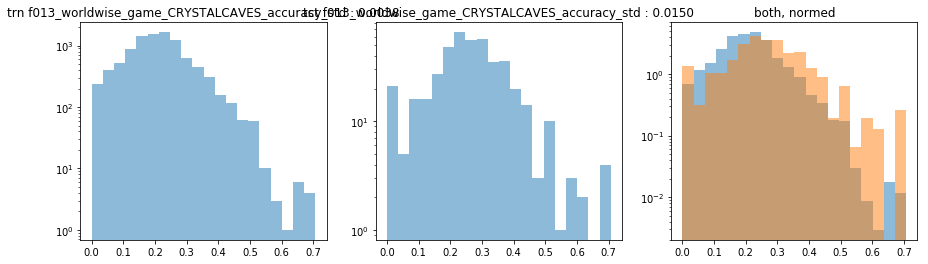

 ---------- f013_worldwise_game_CRYSTALCAVES_just_before_accuracy ---------- 


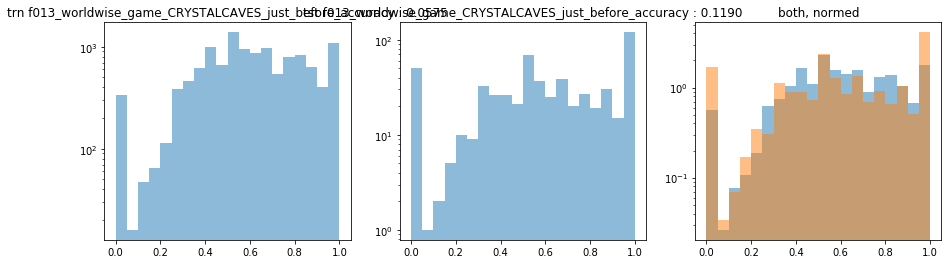

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_max ---------- 


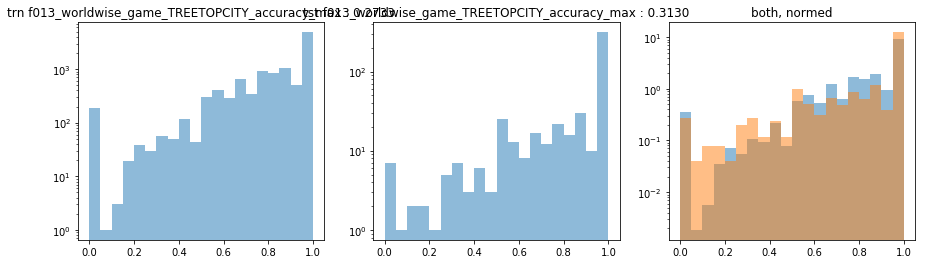

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_min ---------- 


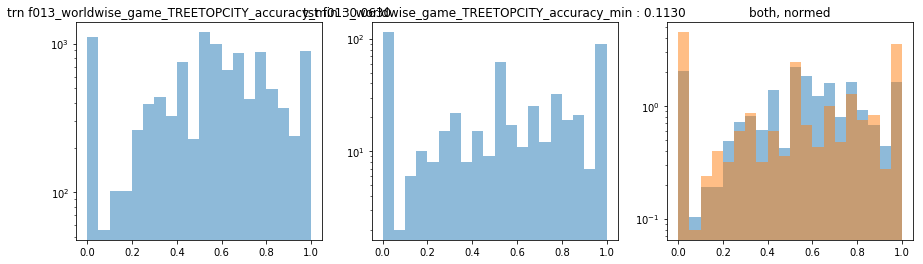

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_mean ---------- 


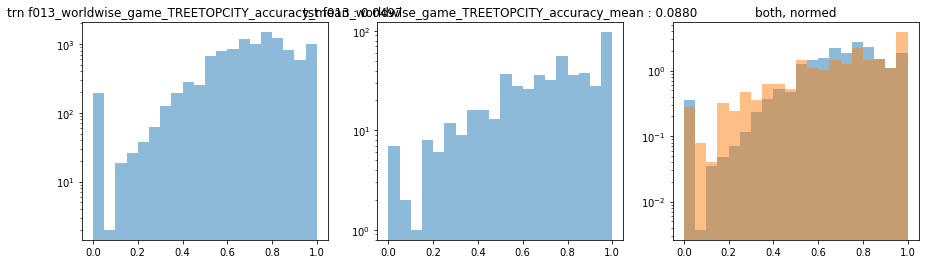

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_std ---------- 


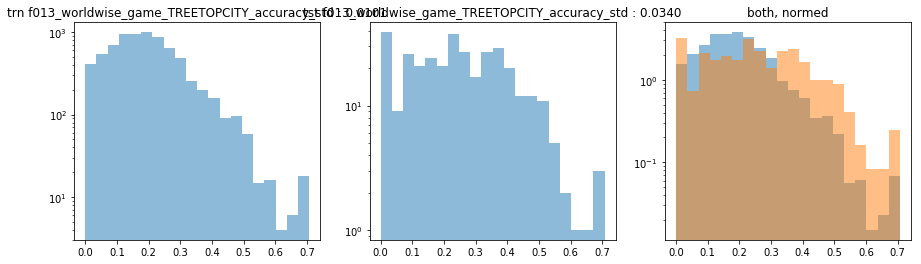

 ---------- f013_worldwise_game_TREETOPCITY_just_before_accuracy ---------- 


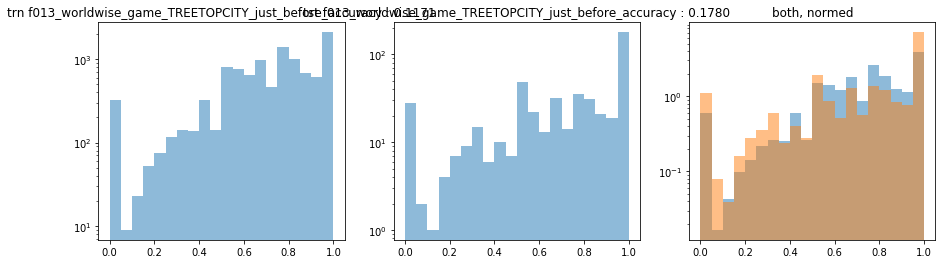

 ---------- f013_worldwise_game_NONE_accuracy_max ---------- 


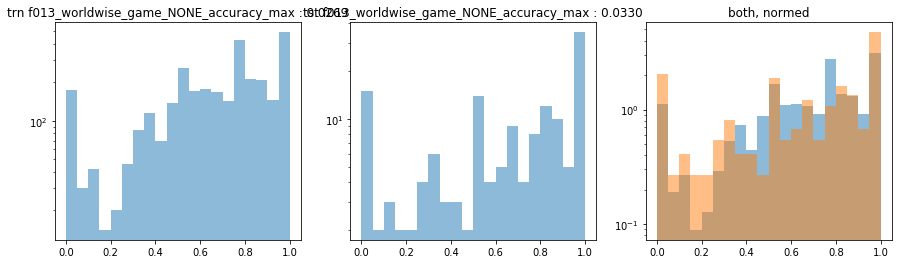

 ---------- f013_worldwise_game_NONE_accuracy_min ---------- 


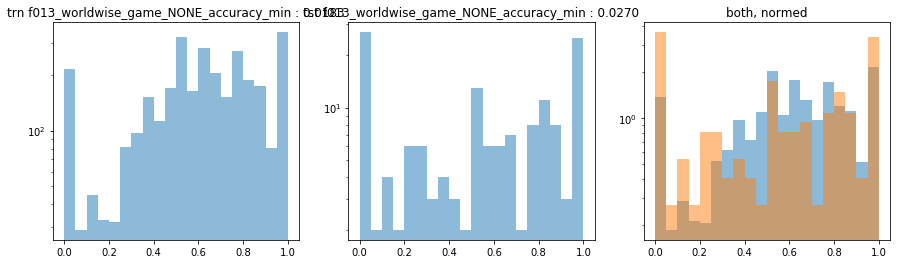

 ---------- f013_worldwise_game_NONE_accuracy_mean ---------- 


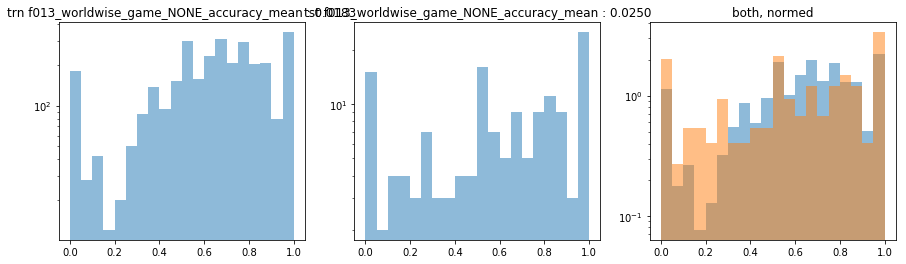

 ---------- f013_worldwise_game_NONE_accuracy_std ---------- 


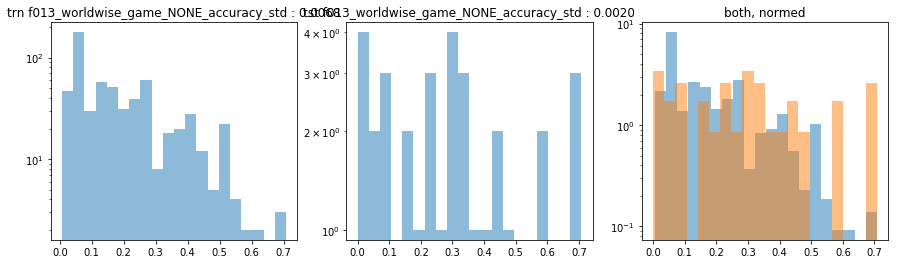

 ---------- f013_worldwise_game_NONE_just_before_accuracy ---------- 


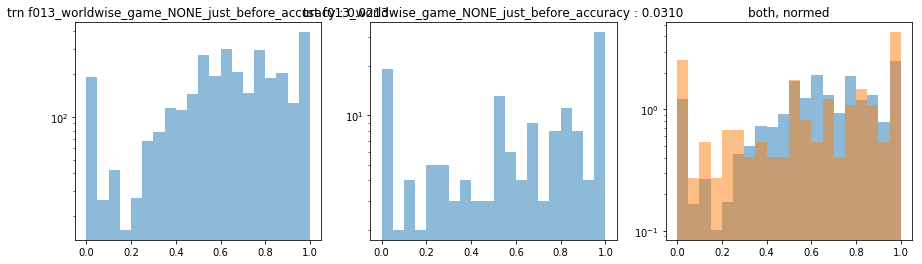

 ---------- f013_worldwise_game_world_accracy_mean_mean ---------- 


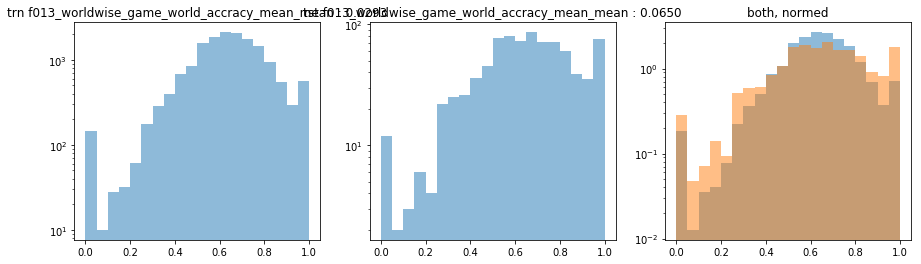

 ---------- f013_worldwise_game_world_accracy_mean_std ---------- 


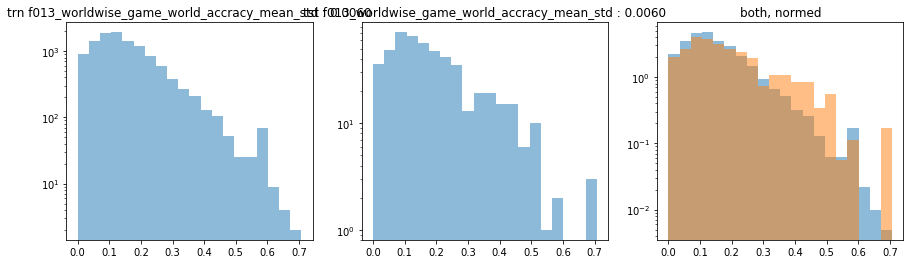

 ---------- f013_worldwise_game_world_accracy_max_max ---------- 


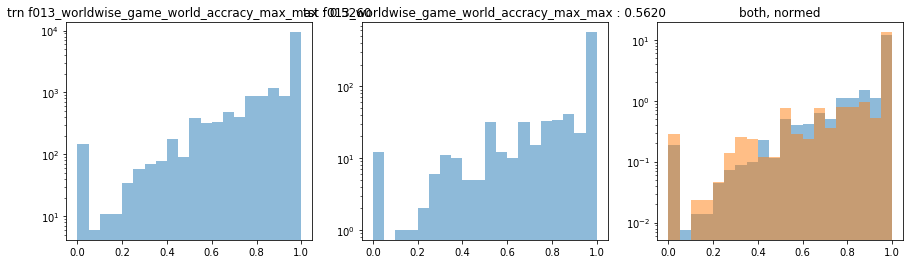

 ---------- f013_worldwise_game_world_accracy_max_mean ---------- 


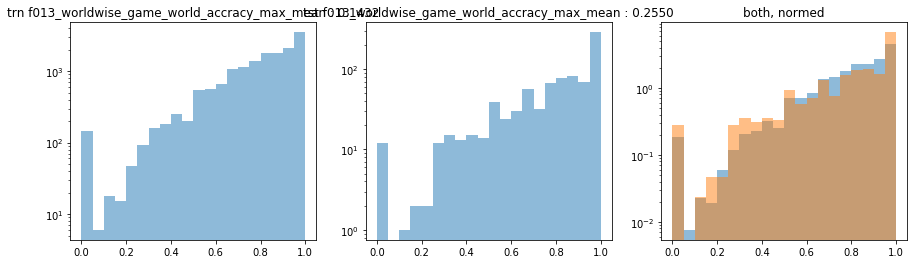

 ---------- f013_worldwise_game_world_accracy_max_std ---------- 


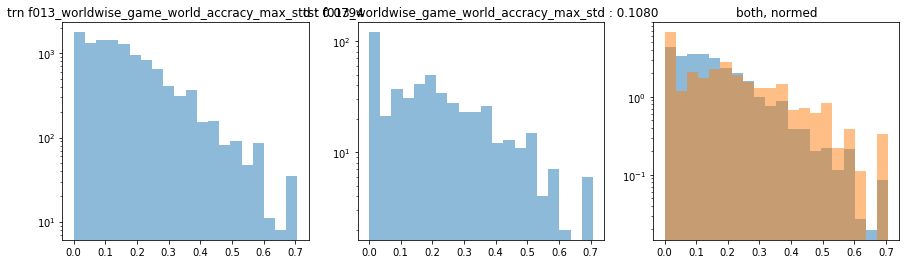

 ---------- f013_worldwise_game_world_accracy_min_min ---------- 


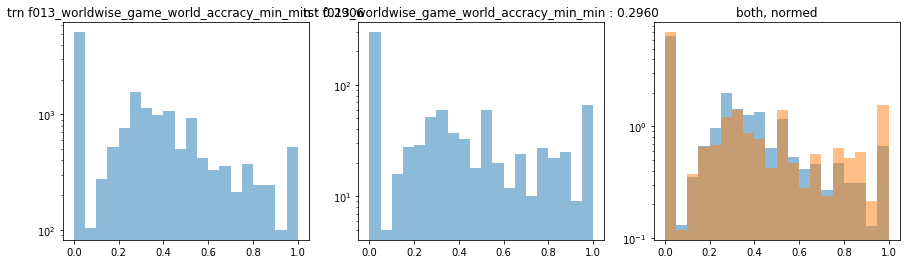

 ---------- f013_worldwise_game_world_accracy_min_mean ---------- 


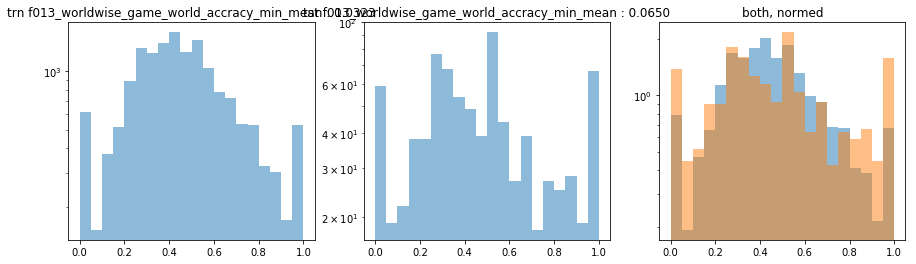

 ---------- f013_worldwise_game_world_accracy_min_std ---------- 


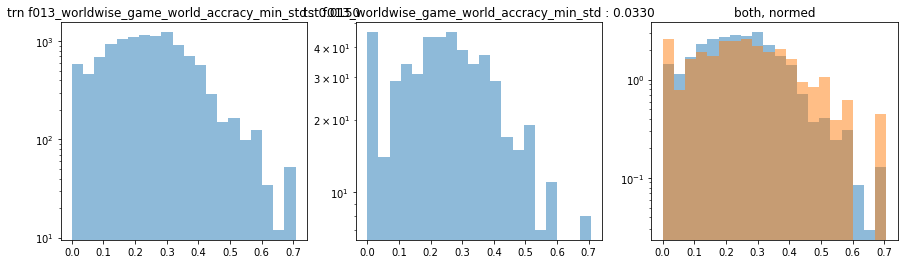

 ---------- f013_worldwise_game_world_accracy_std_mean ---------- 


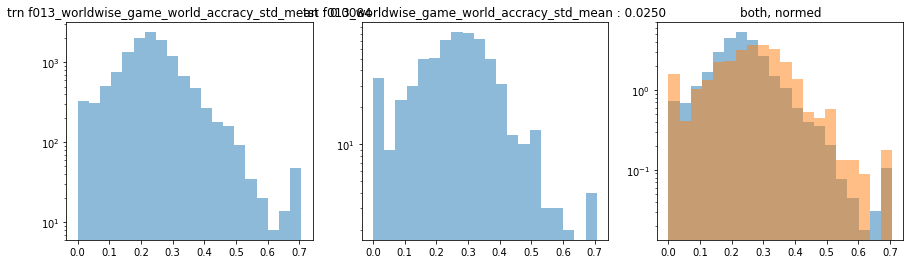

 ---------- f013_worldwise_game_world_accracy_std_std ---------- 


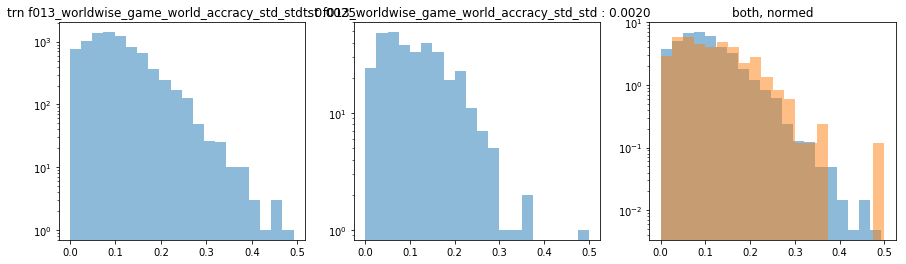

In [40]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### TypeEventCounts

In [37]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/TypeEventCounts.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/TypeEventCounts.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- mean_Activity ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


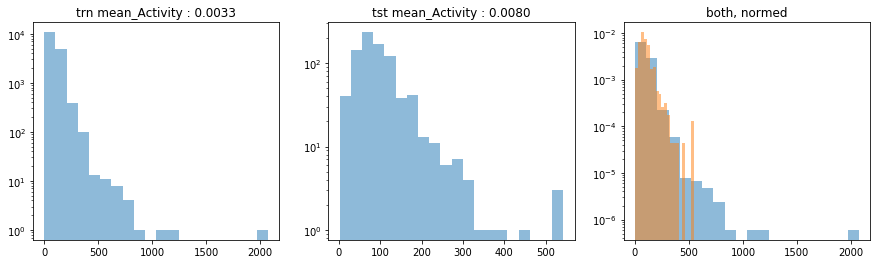

 ---------- mean_Assessment ---------- 


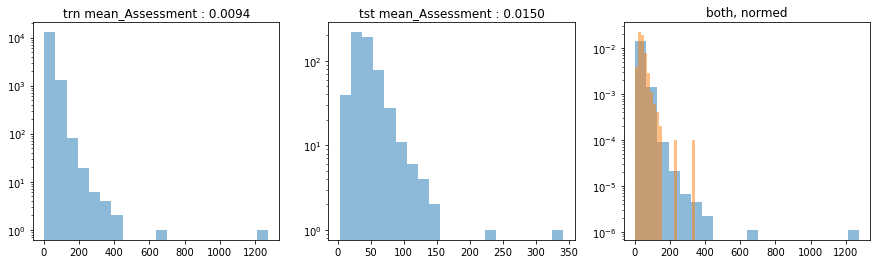

 ---------- mean_Clip ---------- 


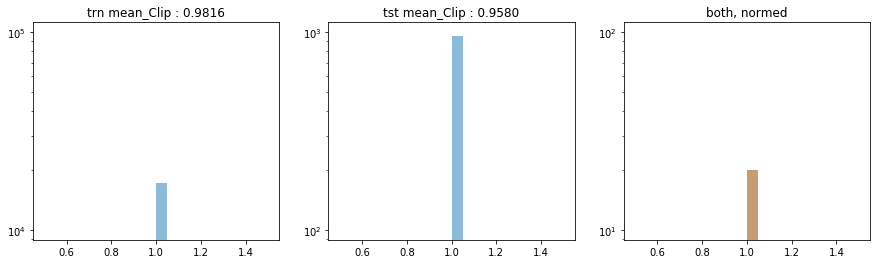

 ---------- mean_Game ---------- 


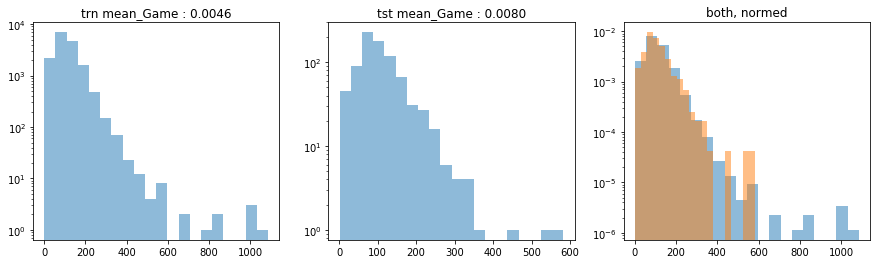

 ---------- prev_max_ev_cnt_Activity ---------- 


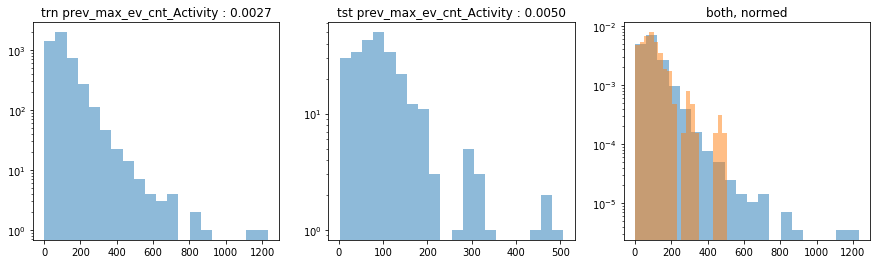

 ---------- prev_max_ev_cnt_Assessment ---------- 


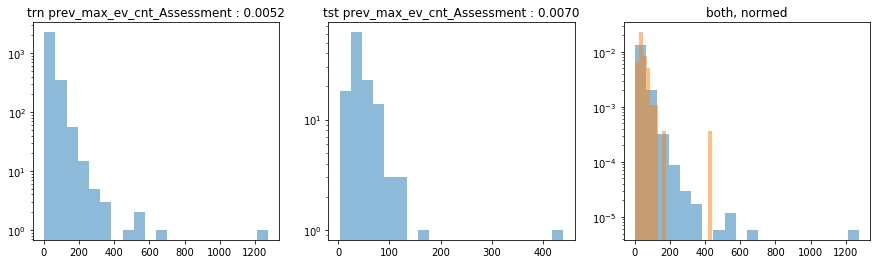

 ---------- prev_max_ev_cnt_Clip ---------- 


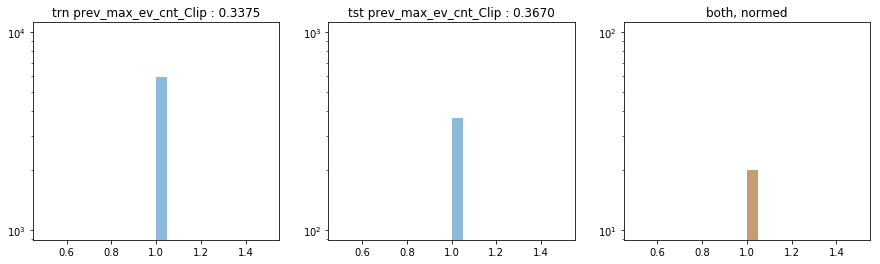

 ---------- prev_max_ev_cnt_Game ---------- 


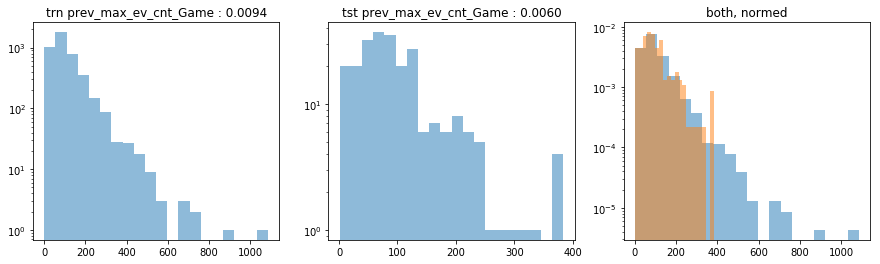

In [38]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### UserActivityCount

In [47]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/UserActivityCount.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/UserActivityCount.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- Activity ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


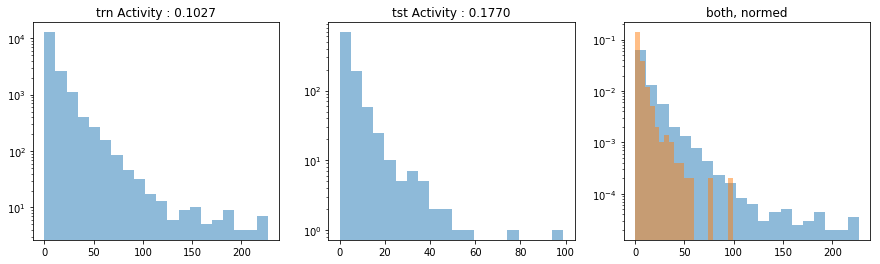

 ---------- Assessment ---------- 


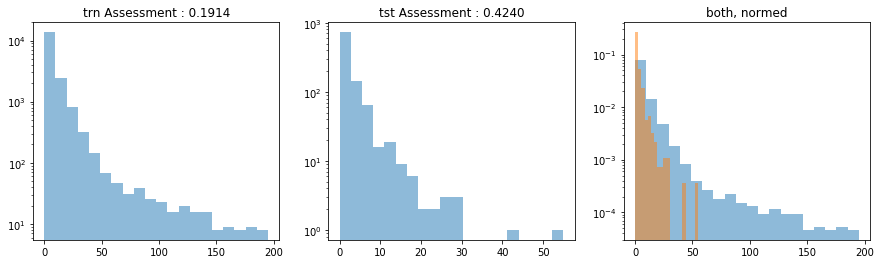

 ---------- Clip ---------- 


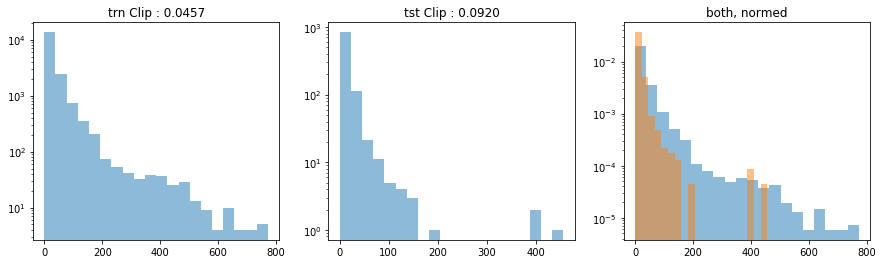

 ---------- Game ---------- 


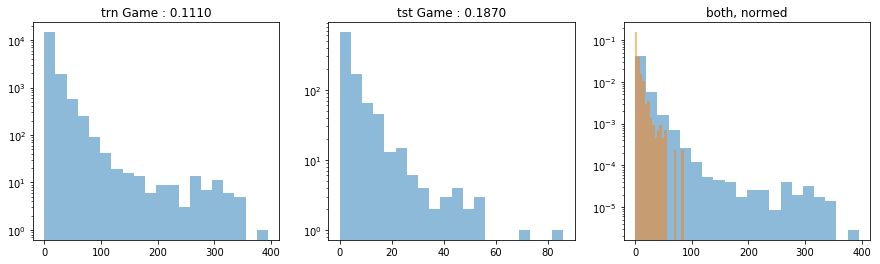

In [44]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

 ---------- Activity ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


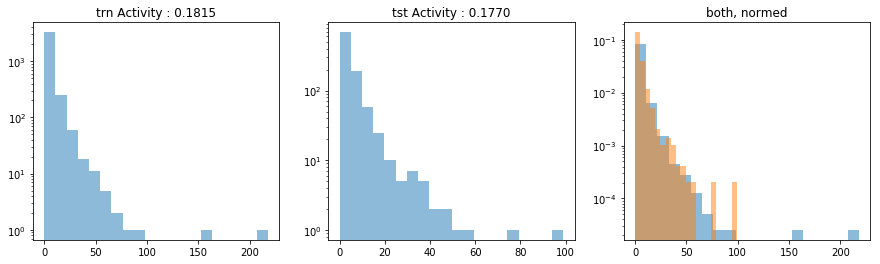

 ---------- Assessment ---------- 


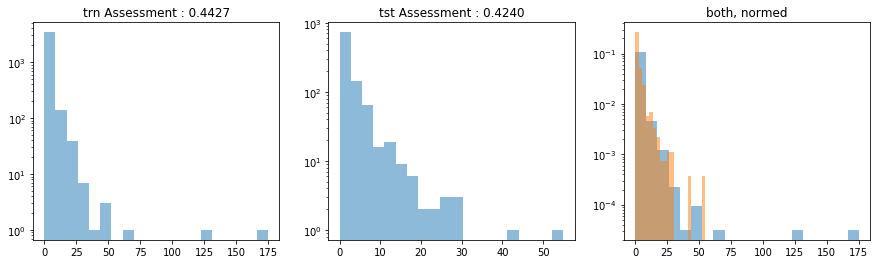

 ---------- Clip ---------- 


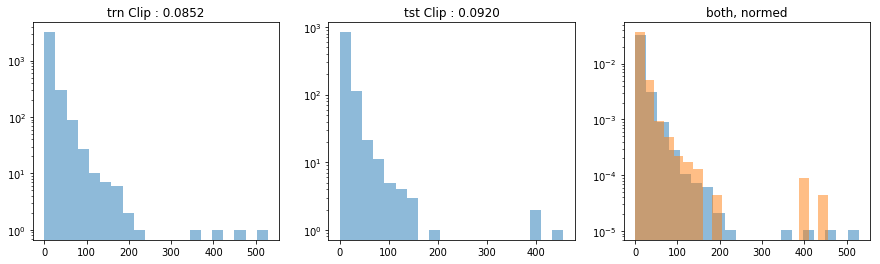

 ---------- Game ---------- 


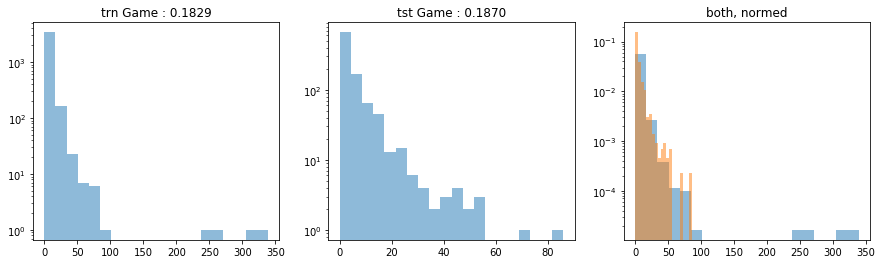

In [48]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### eventCodeRatioFeatures

In [15]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/eventCodeRatioFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/eventCodeRatioFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f004_ev_code_ratio_2000 ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


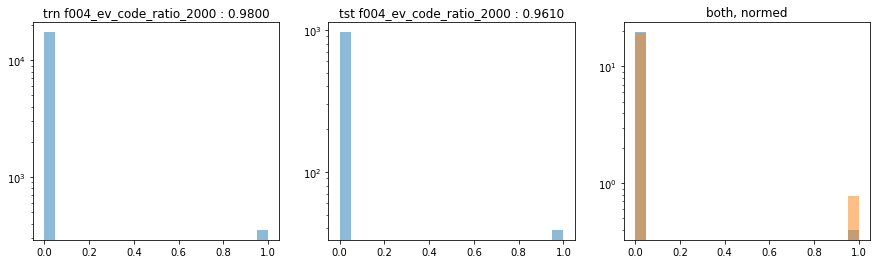

 ---------- f004_ev_code_ratio_2010 ---------- 


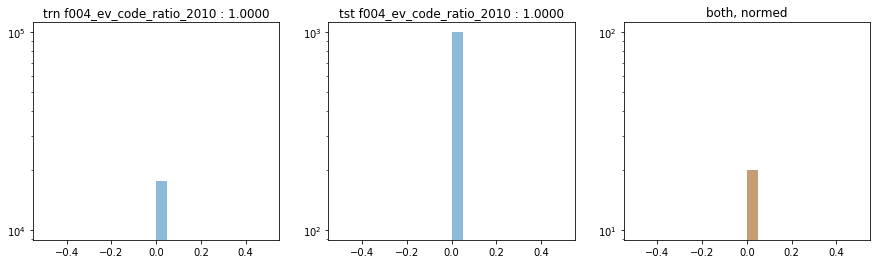

 ---------- f004_ev_code_ratio_2020 ---------- 


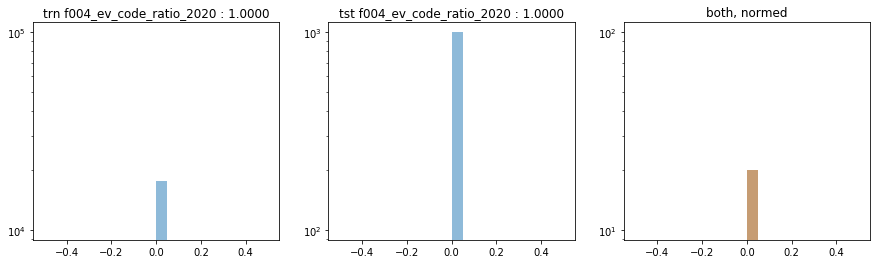

 ---------- f004_ev_code_ratio_2025 ---------- 


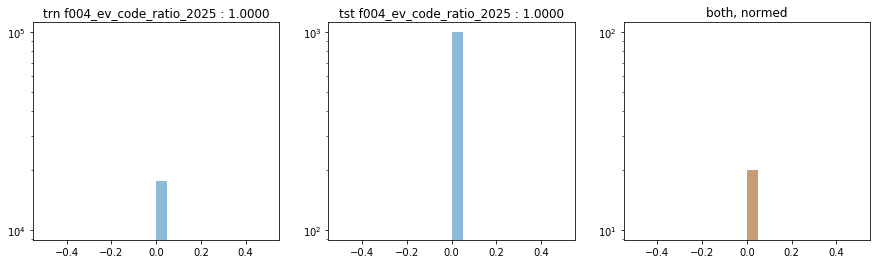

 ---------- f004_ev_code_ratio_2030 ---------- 


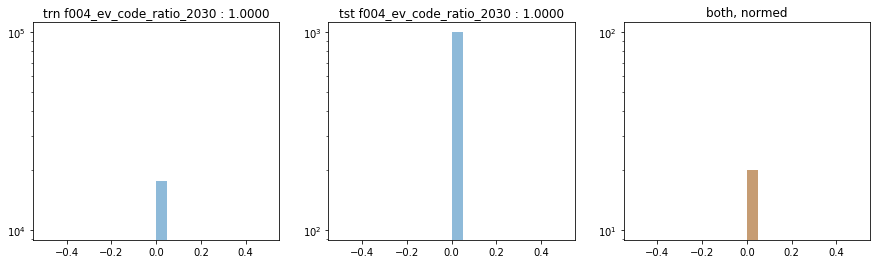

 ---------- f004_ev_code_ratio_2035 ---------- 


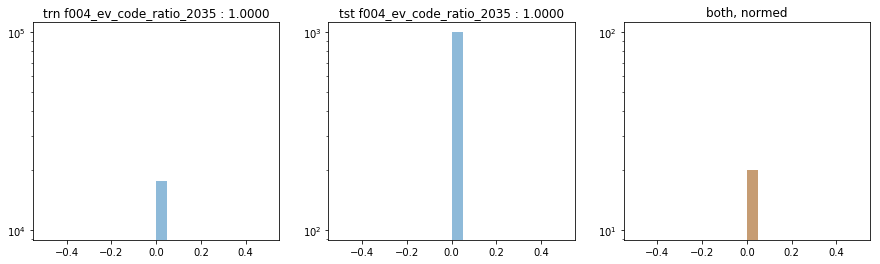

 ---------- f004_ev_code_ratio_2040 ---------- 


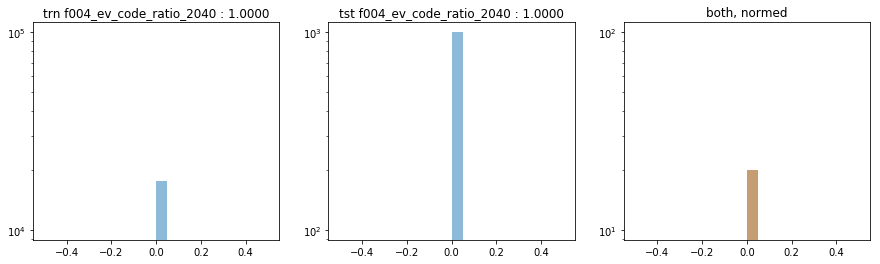

 ---------- f004_ev_code_ratio_2050 ---------- 


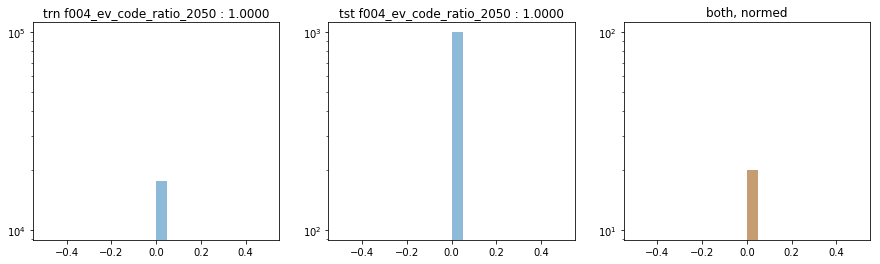

 ---------- f004_ev_code_ratio_2060 ---------- 


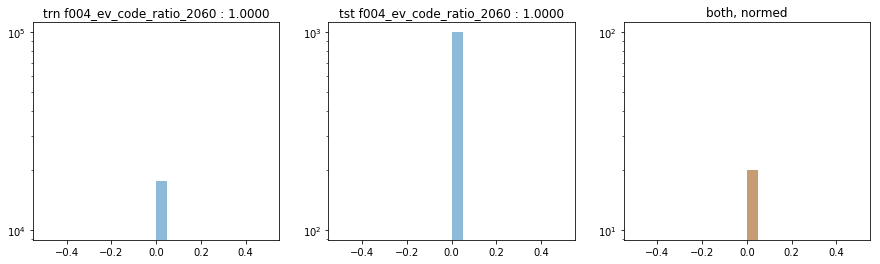

 ---------- f004_ev_code_ratio_2070 ---------- 


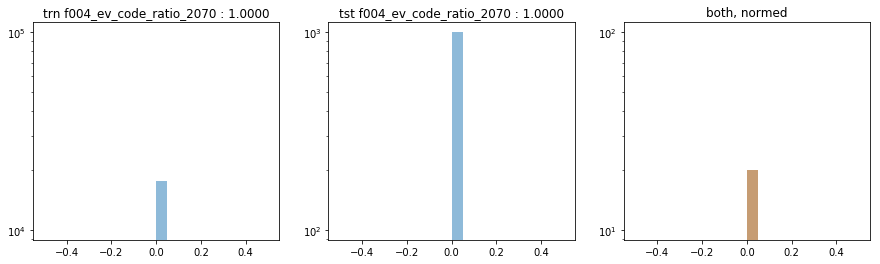

 ---------- f004_ev_code_ratio_2075 ---------- 


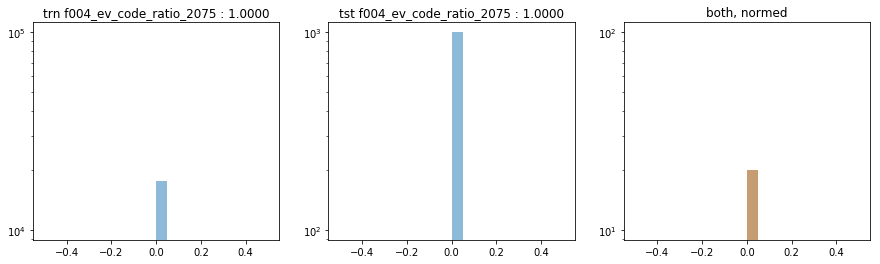

 ---------- f004_ev_code_ratio_2080 ---------- 


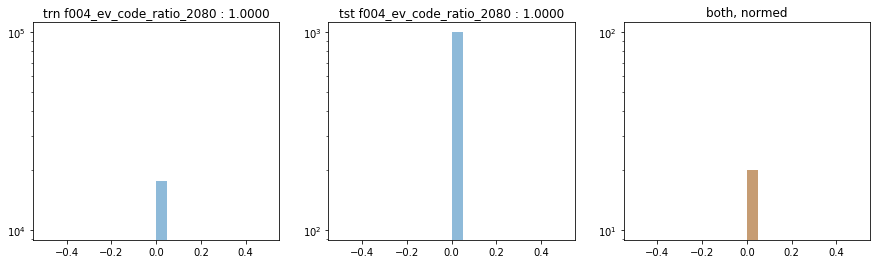

 ---------- f004_ev_code_ratio_2081 ---------- 


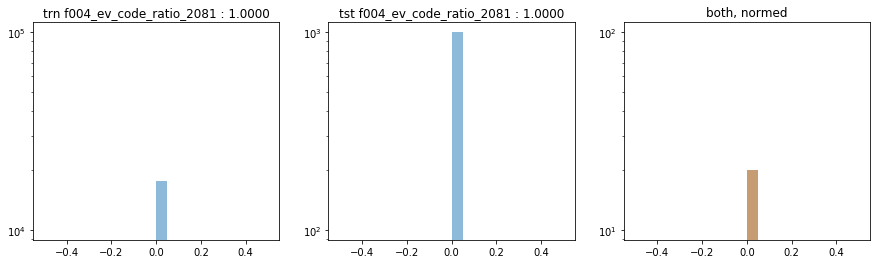

 ---------- f004_ev_code_ratio_2083 ---------- 


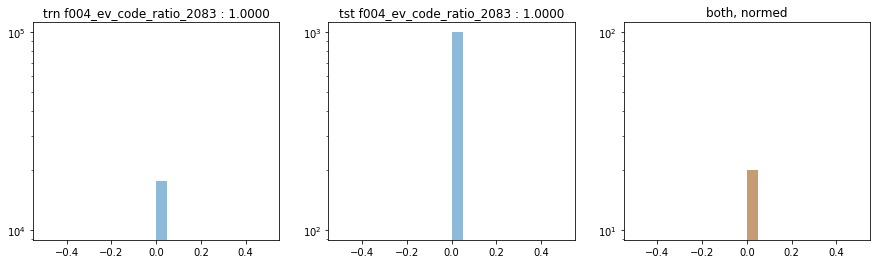

 ---------- f004_ev_code_ratio_3010 ---------- 


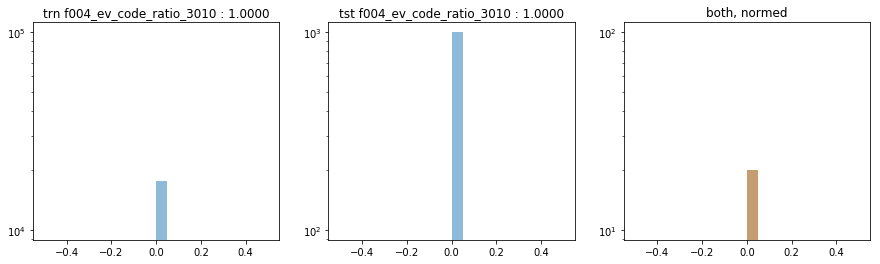

 ---------- f004_ev_code_ratio_3020 ---------- 


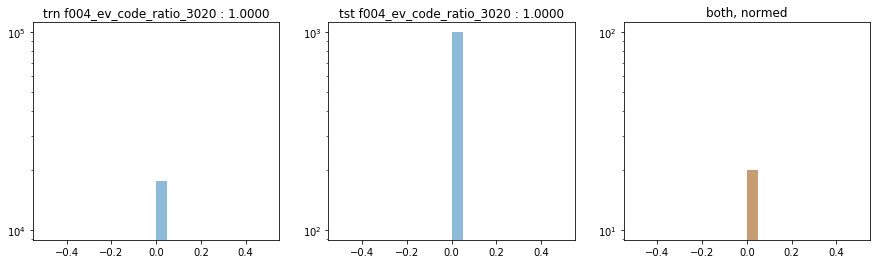

 ---------- f004_ev_code_ratio_3021 ---------- 


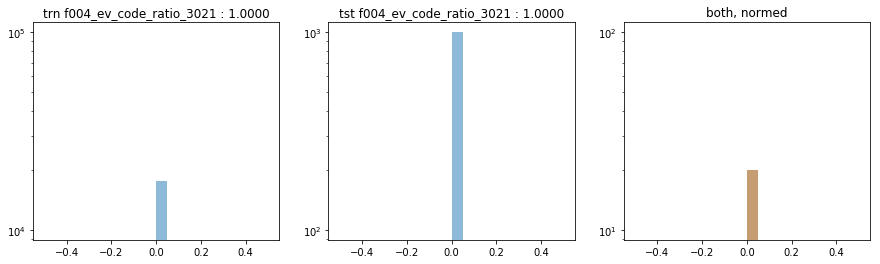

 ---------- f004_ev_code_ratio_3110 ---------- 


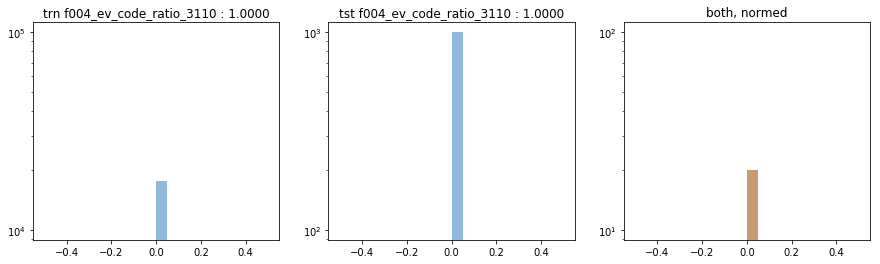

 ---------- f004_ev_code_ratio_3120 ---------- 


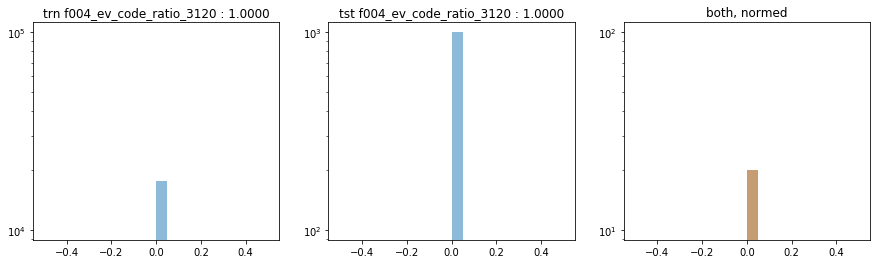

 ---------- f004_ev_code_ratio_3121 ---------- 


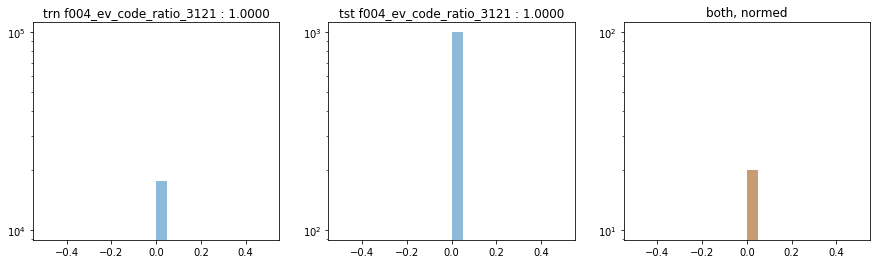

 ---------- f004_ev_code_ratio_4010 ---------- 


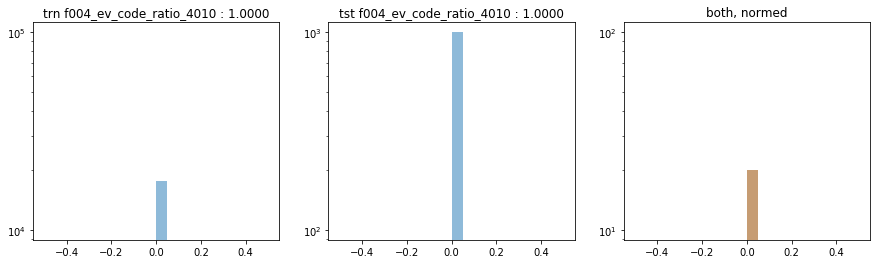

 ---------- f004_ev_code_ratio_4020 ---------- 


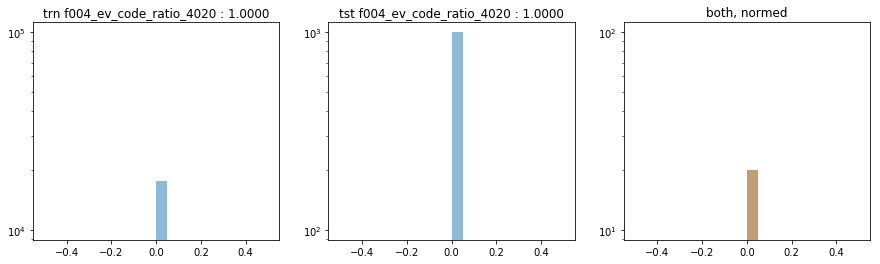

 ---------- f004_ev_code_ratio_4021 ---------- 


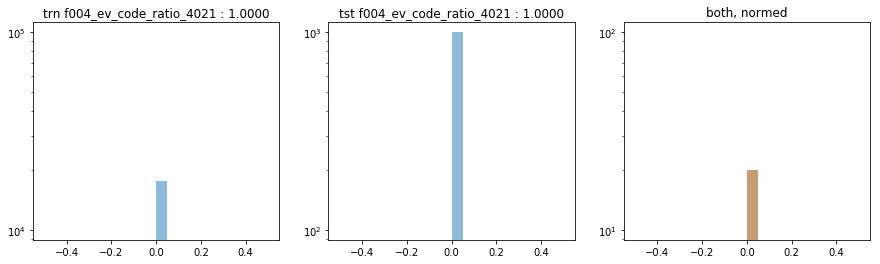

 ---------- f004_ev_code_ratio_4022 ---------- 


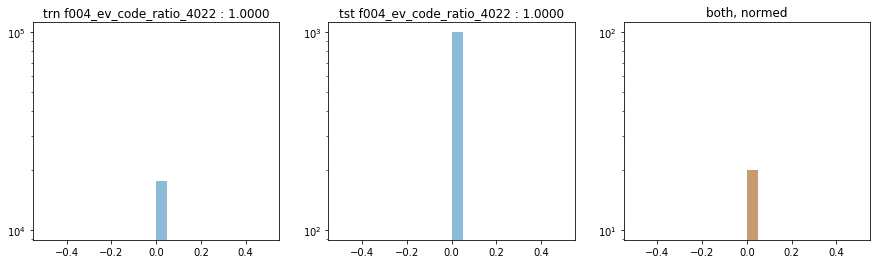

 ---------- f004_ev_code_ratio_4025 ---------- 


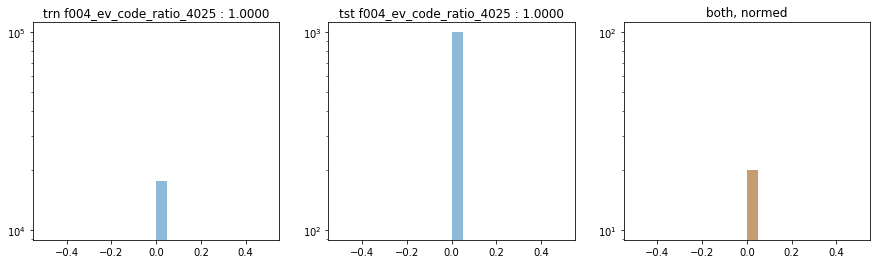

 ---------- f004_ev_code_ratio_4030 ---------- 


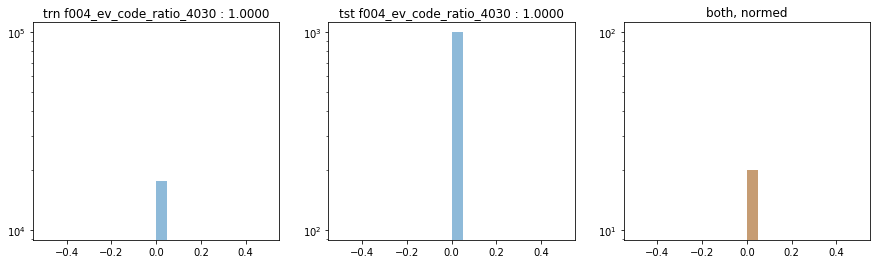

 ---------- f004_ev_code_ratio_4031 ---------- 


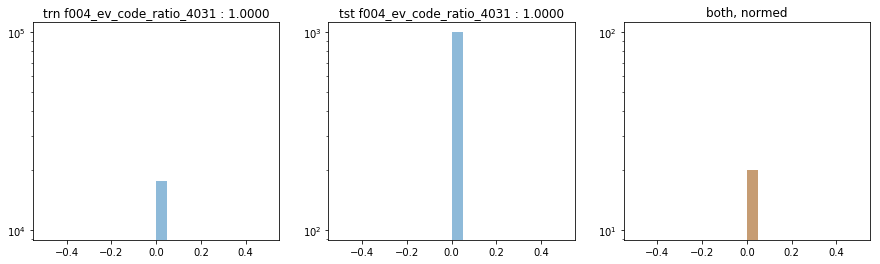

 ---------- f004_ev_code_ratio_4035 ---------- 


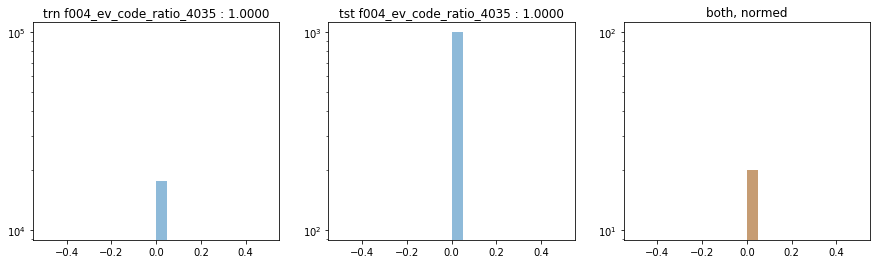

 ---------- f004_ev_code_ratio_4040 ---------- 


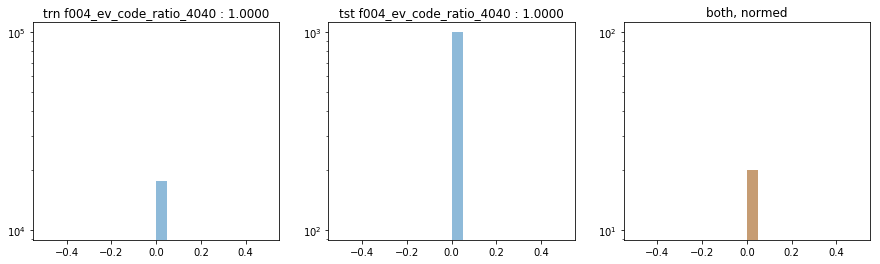

 ---------- f004_ev_code_ratio_4045 ---------- 


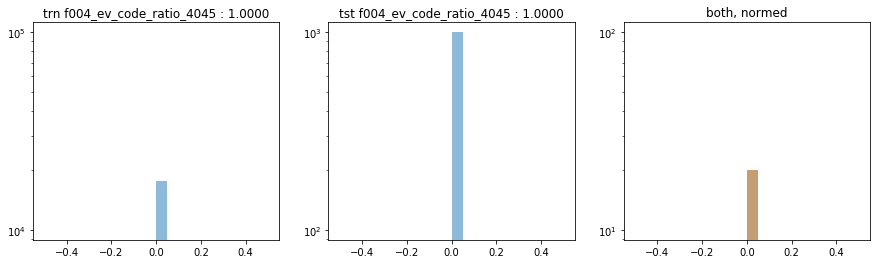

 ---------- f004_ev_code_ratio_4050 ---------- 


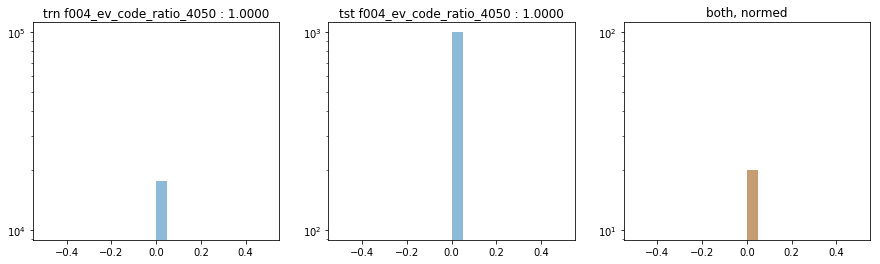

 ---------- f004_ev_code_ratio_4070 ---------- 


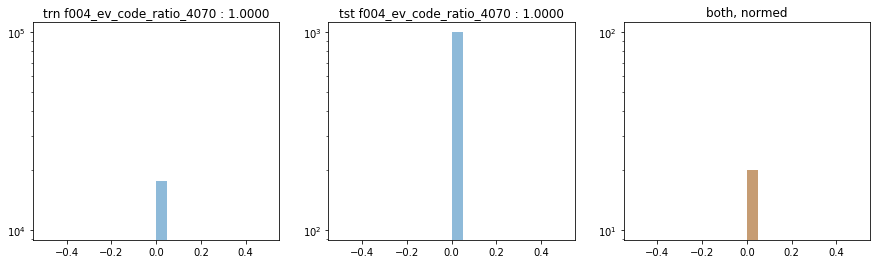

 ---------- f004_ev_code_ratio_4080 ---------- 


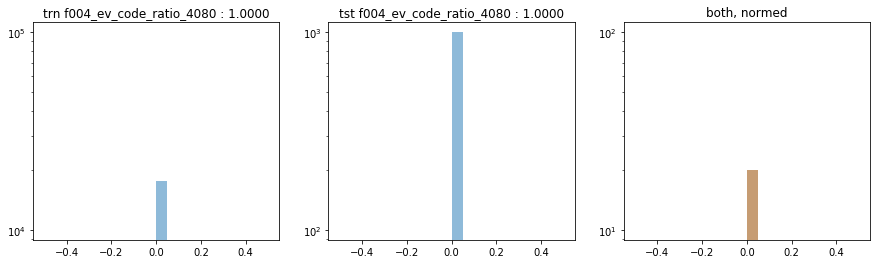

 ---------- f004_ev_code_ratio_4090 ---------- 


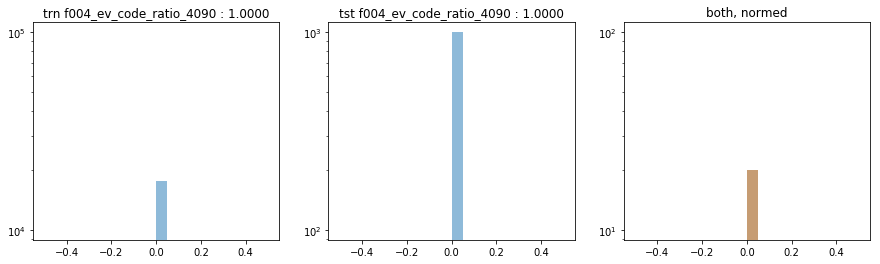

 ---------- f004_ev_code_ratio_4095 ---------- 


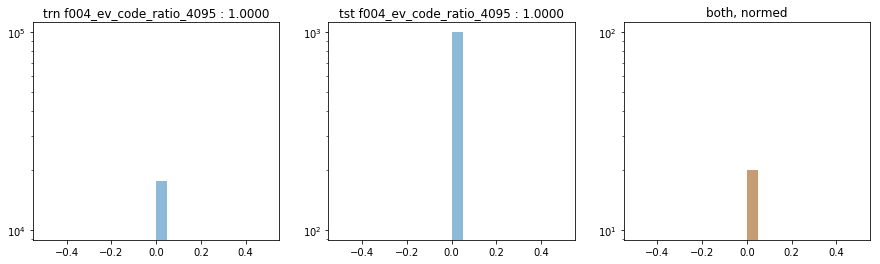

 ---------- f004_ev_code_ratio_4100 ---------- 


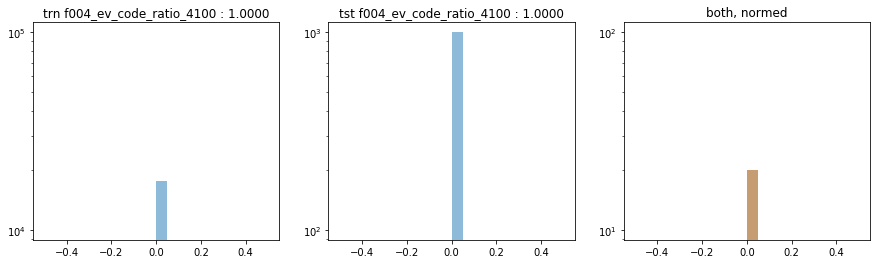

 ---------- f004_ev_code_ratio_4110 ---------- 


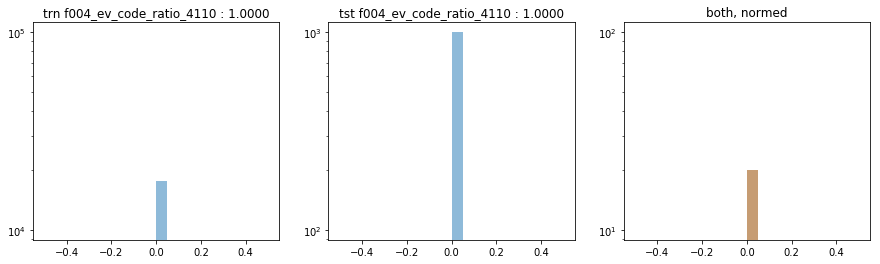

 ---------- f004_ev_code_ratio_4220 ---------- 


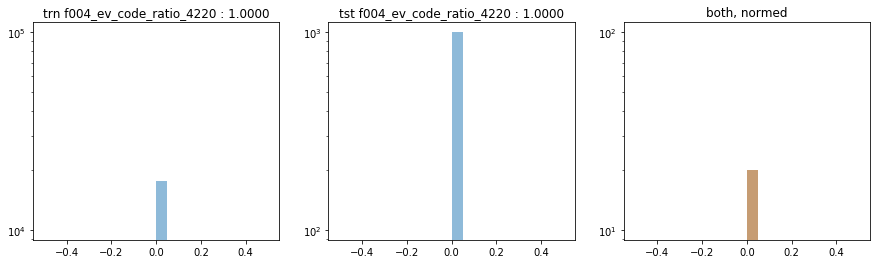

 ---------- f004_ev_code_ratio_4230 ---------- 


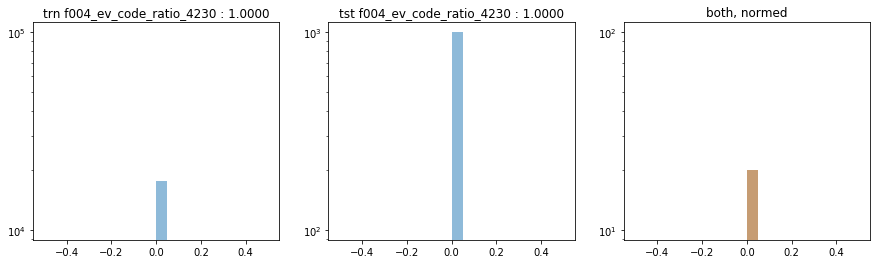

 ---------- f004_ev_code_ratio_4235 ---------- 


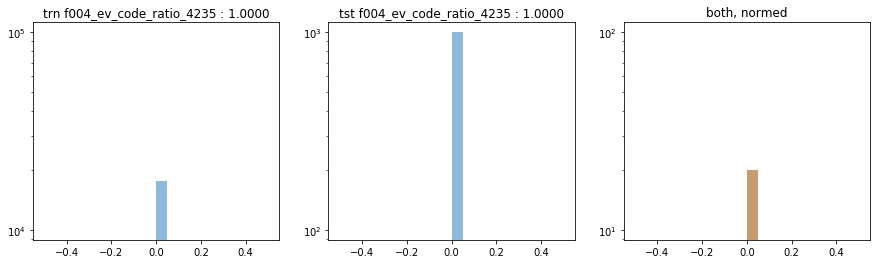

 ---------- f004_ev_code_ratio_5000 ---------- 


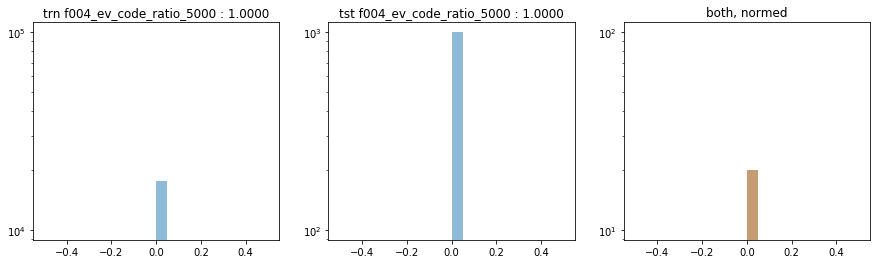

 ---------- f004_ev_code_ratio_5010 ---------- 


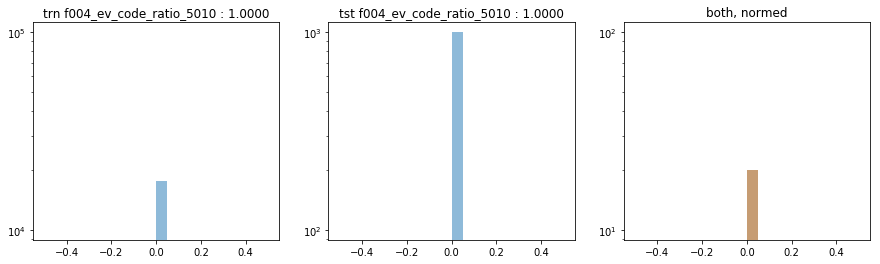

In [18]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### eventIDRatioFeatures

In [53]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/eventIDRatioFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/eventIDRatioFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f005_event_id_ratio_0086365d ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


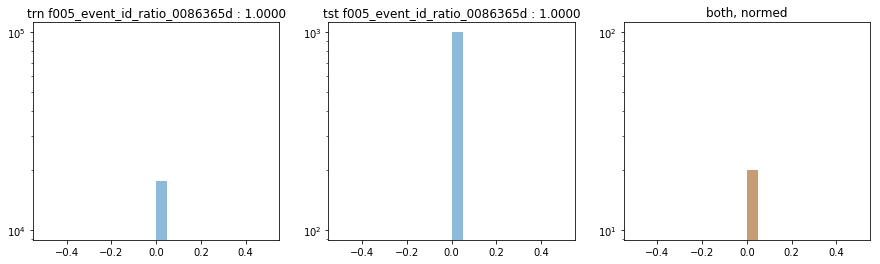

 ---------- f005_event_id_ratio_00c73085 ---------- 


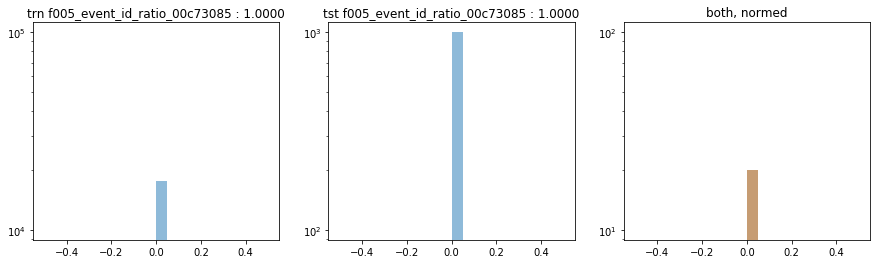

 ---------- f005_event_id_ratio_022b4259 ---------- 


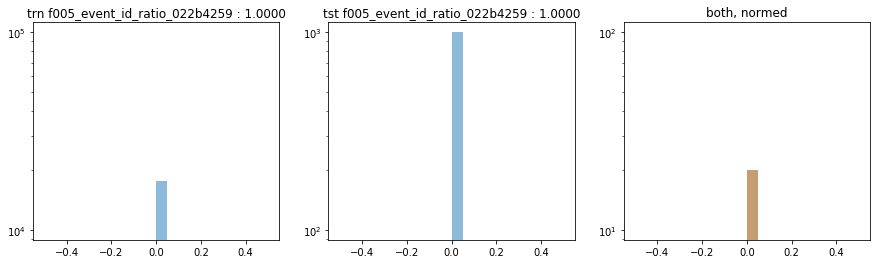

 ---------- f005_event_id_ratio_02a42007 ---------- 


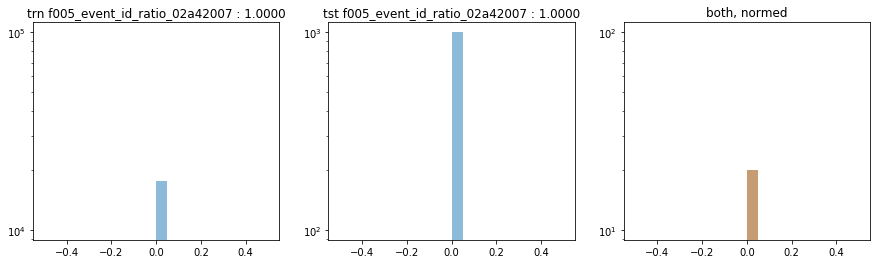

 ---------- f005_event_id_ratio_0330ab6a ---------- 


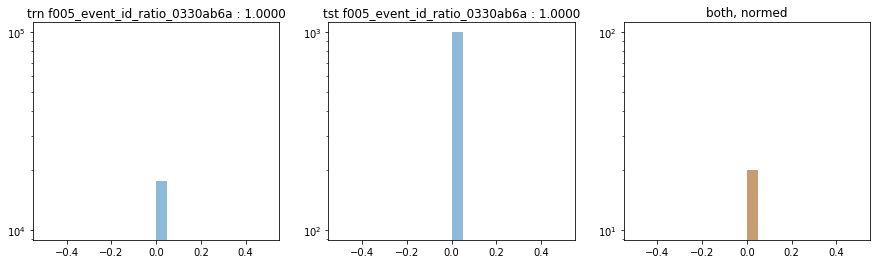

 ---------- f005_event_id_ratio_0413e89d ---------- 


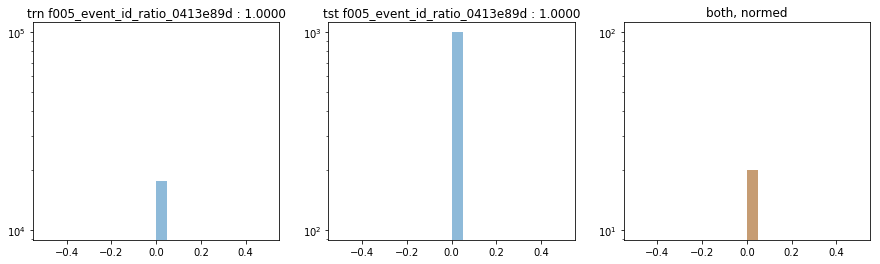

 ---------- f005_event_id_ratio_04df9b66 ---------- 


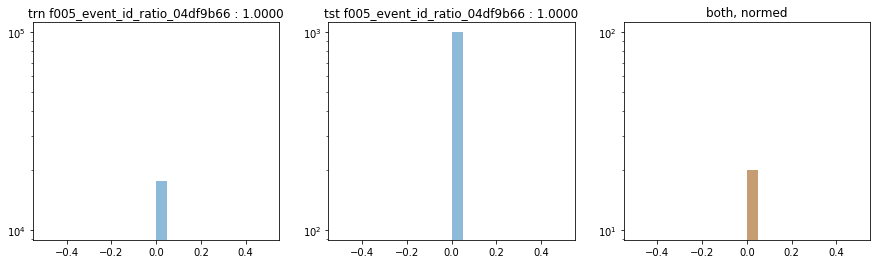

 ---------- f005_event_id_ratio_05ad839b ---------- 


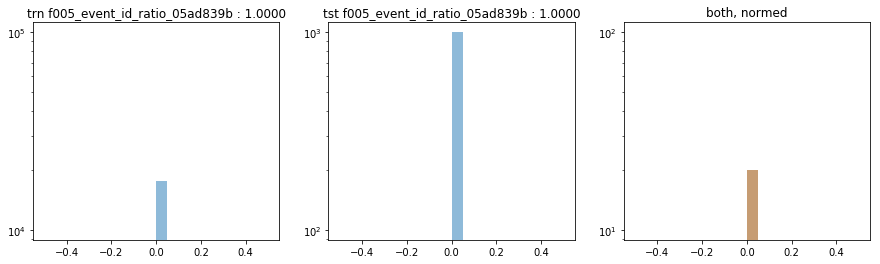

 ---------- f005_event_id_ratio_06372577 ---------- 


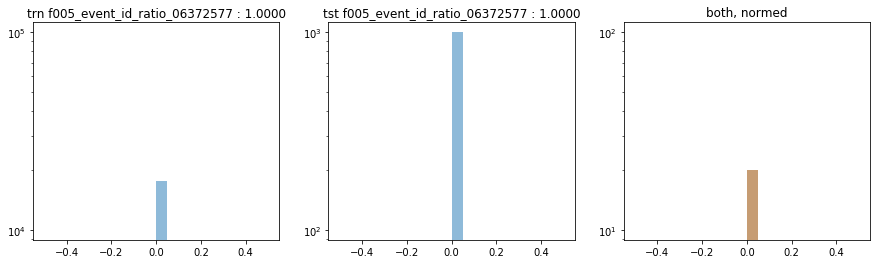

 ---------- f005_event_id_ratio_070a5291 ---------- 


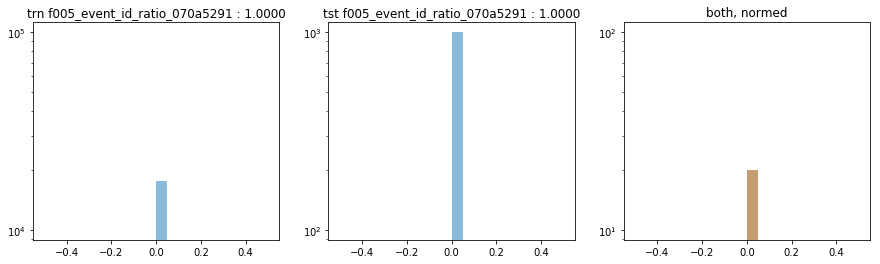

 ---------- f005_event_id_ratio_08fd73f3 ---------- 


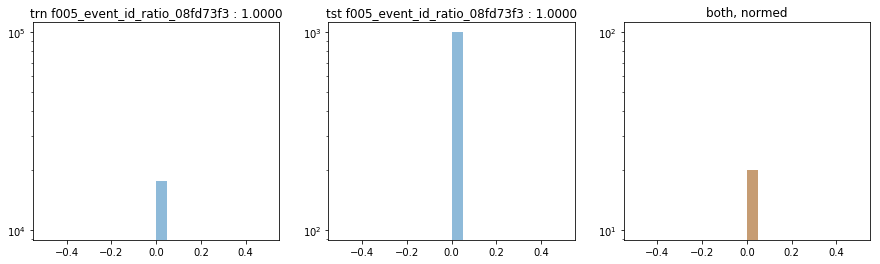

 ---------- f005_event_id_ratio_08ff79ad ---------- 


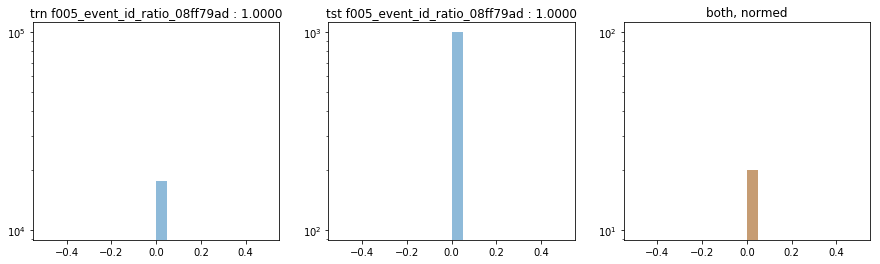

 ---------- f005_event_id_ratio_0a08139c ---------- 


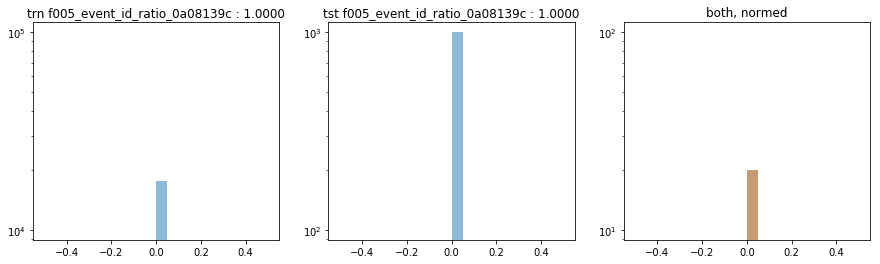

 ---------- f005_event_id_ratio_0d18d96c ---------- 


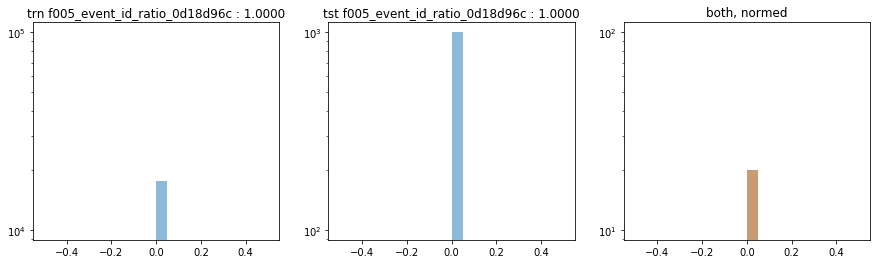

 ---------- f005_event_id_ratio_0d1da71f ---------- 


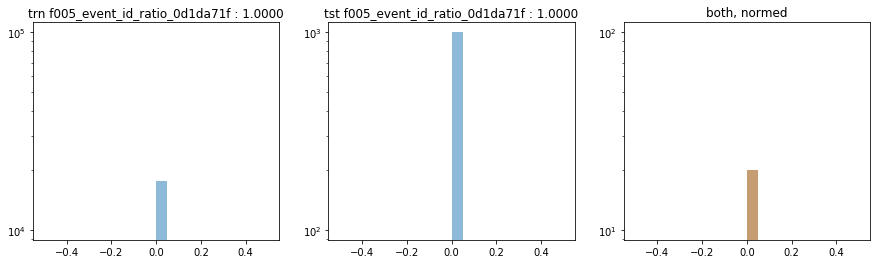

 ---------- f005_event_id_ratio_0db6d71d ---------- 


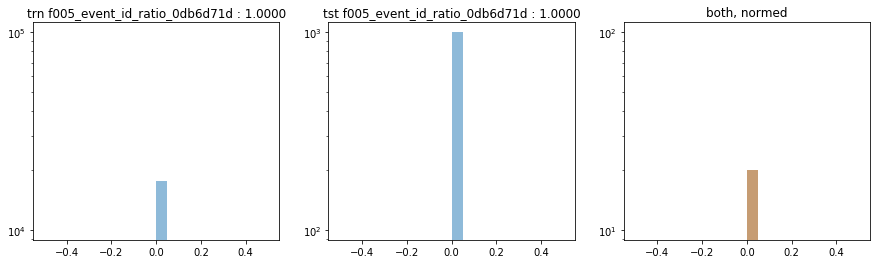

 ---------- f005_event_id_ratio_1325467d ---------- 


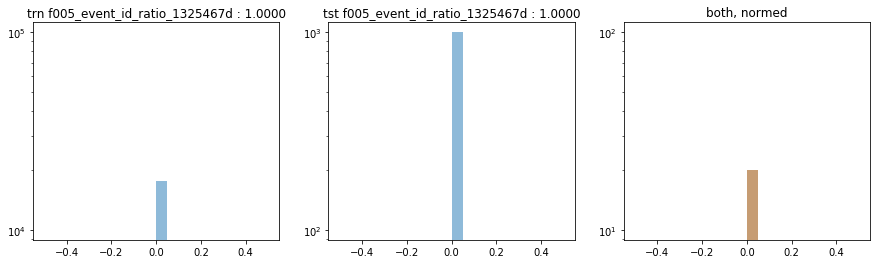

 ---------- f005_event_id_ratio_1340b8d7 ---------- 


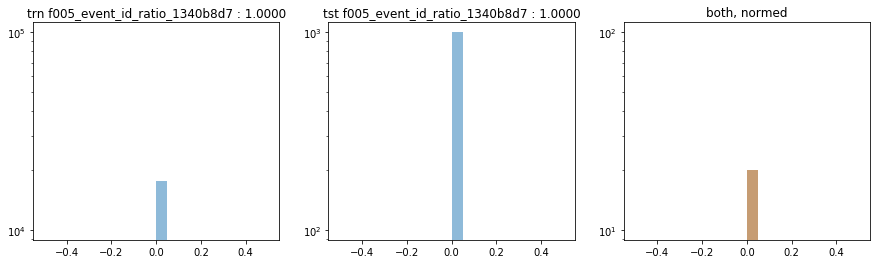

 ---------- f005_event_id_ratio_1375ccb7 ---------- 


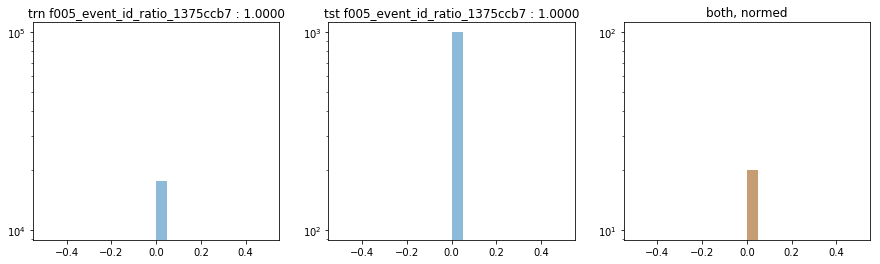

 ---------- f005_event_id_ratio_14de4c5d ---------- 


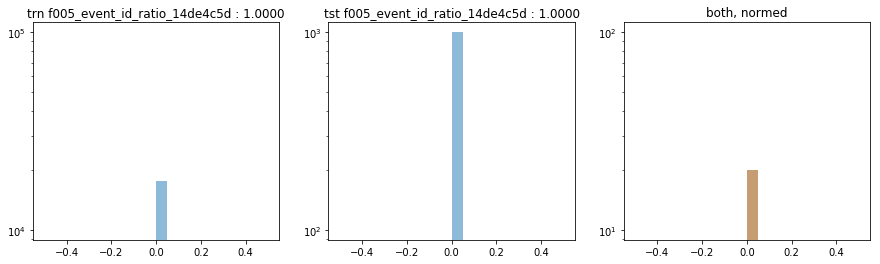

 ---------- f005_event_id_ratio_155f62a4 ---------- 


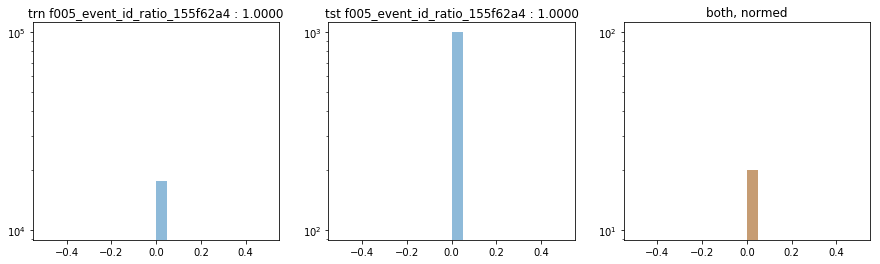

 ---------- f005_event_id_ratio_1575e76c ---------- 


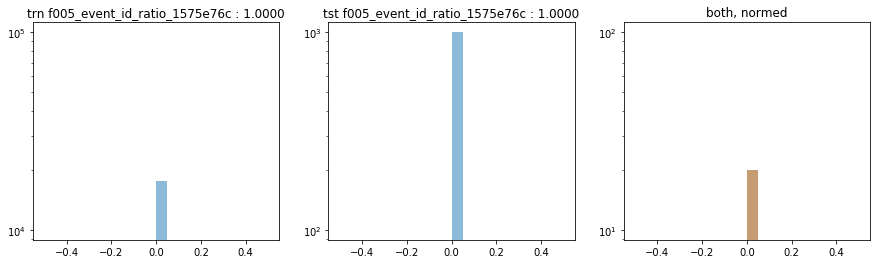

 ---------- f005_event_id_ratio_15a43e5b ---------- 


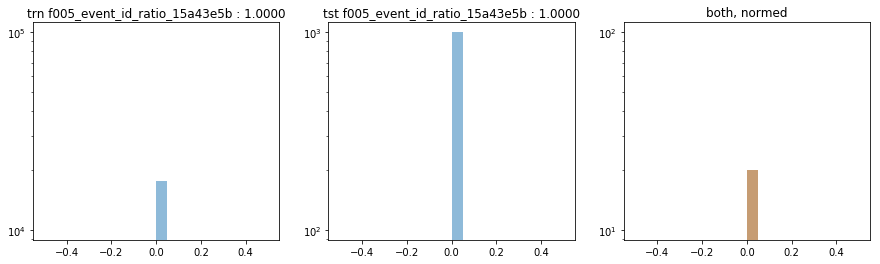

 ---------- f005_event_id_ratio_15ba1109 ---------- 


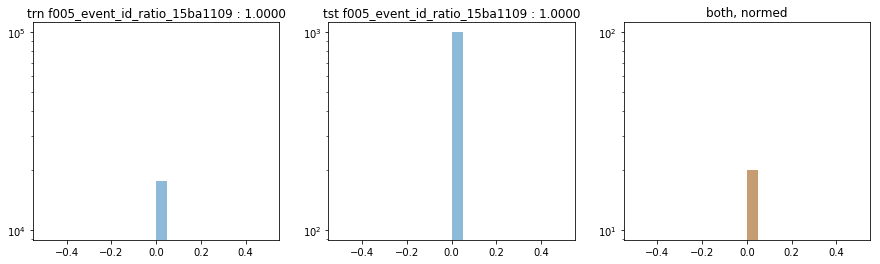

 ---------- f005_event_id_ratio_15eb4a7d ---------- 


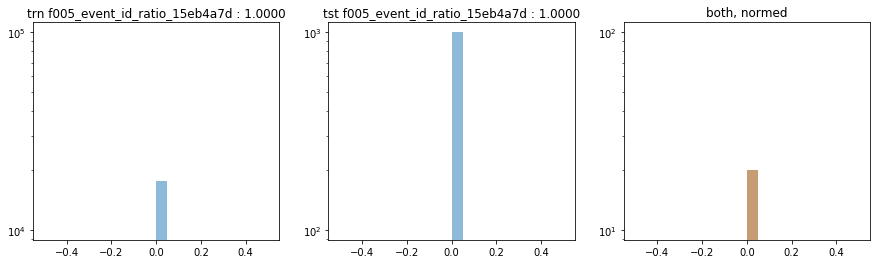

 ---------- f005_event_id_ratio_15f99afc ---------- 


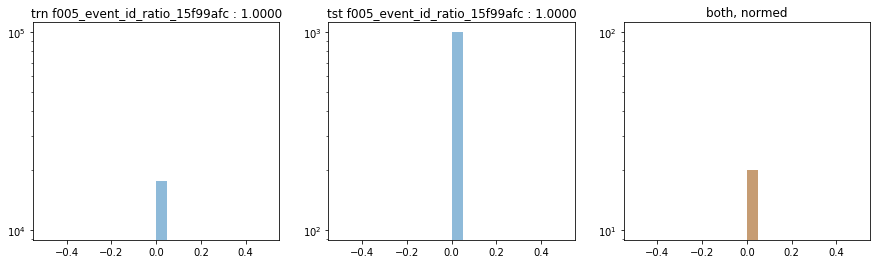

 ---------- f005_event_id_ratio_160654fd ---------- 


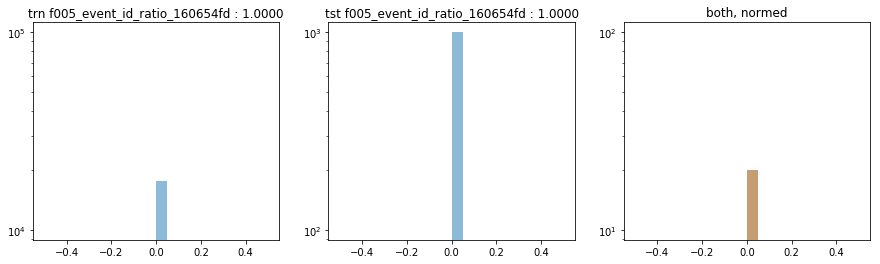

 ---------- f005_event_id_ratio_16667cc5 ---------- 


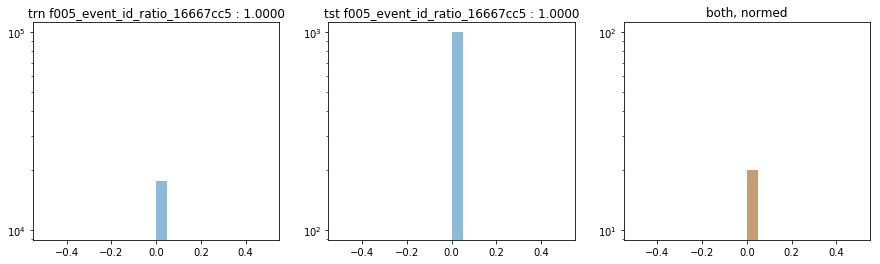

 ---------- f005_event_id_ratio_16dffff1 ---------- 


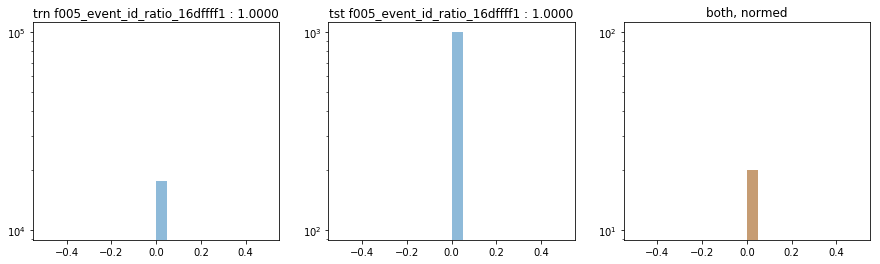

 ---------- f005_event_id_ratio_17113b36 ---------- 


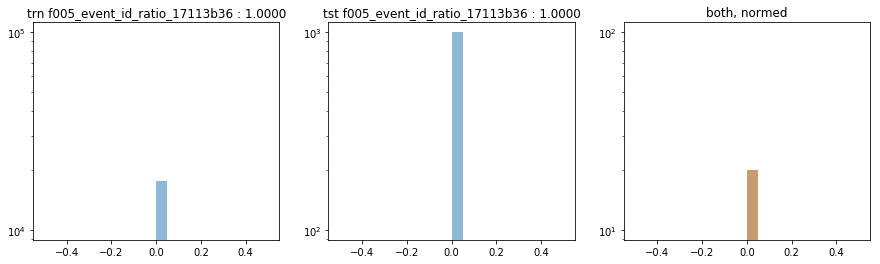

 ---------- f005_event_id_ratio_19967db1 ---------- 


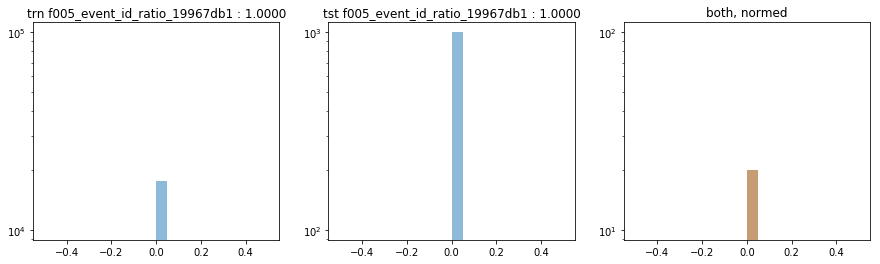

 ---------- f005_event_id_ratio_1996c610 ---------- 


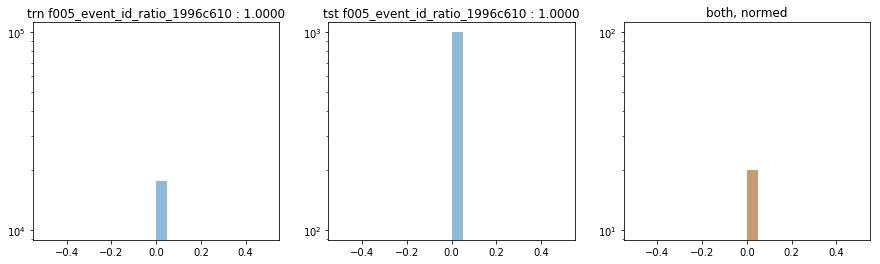

 ---------- f005_event_id_ratio_1af8be29 ---------- 


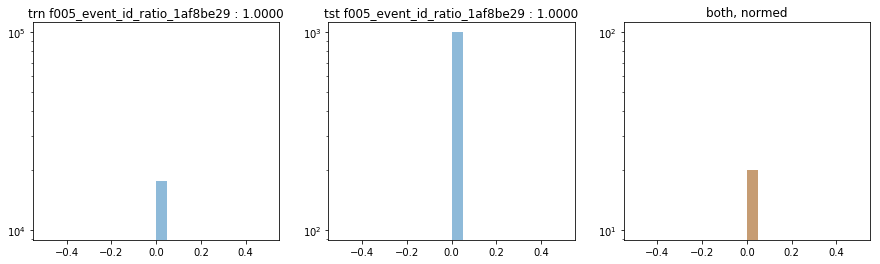

 ---------- f005_event_id_ratio_1bb5fbdb ---------- 


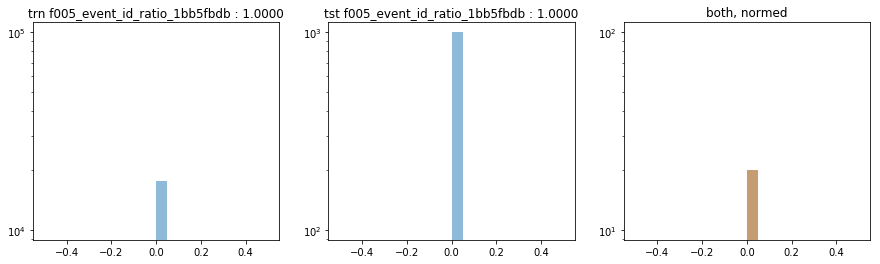

 ---------- f005_event_id_ratio_1beb320a ---------- 


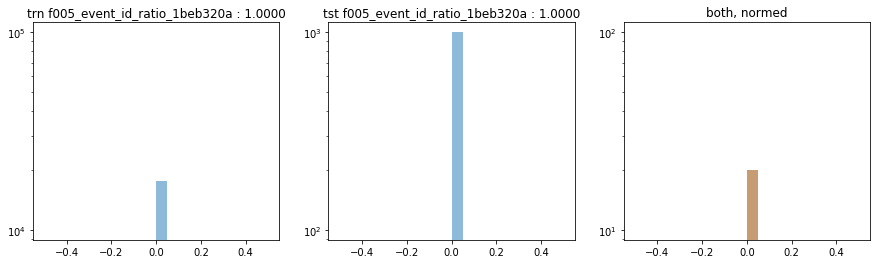

 ---------- f005_event_id_ratio_1c178d24 ---------- 


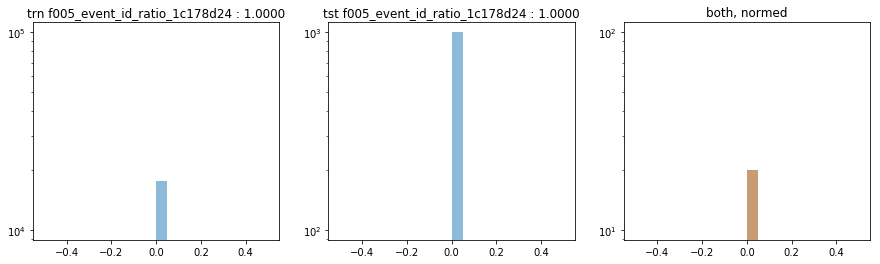

 ---------- f005_event_id_ratio_1cc7cfca ---------- 


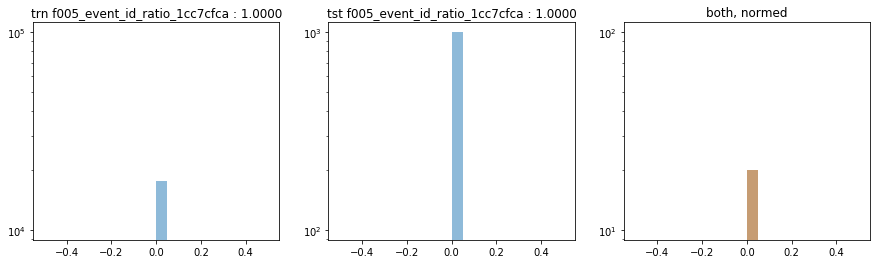

 ---------- f005_event_id_ratio_1cf54632 ---------- 


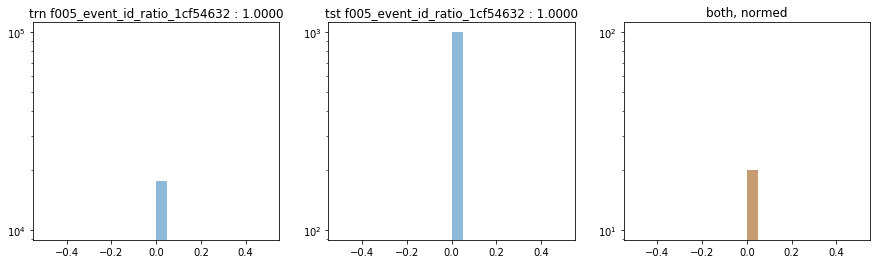

 ---------- f005_event_id_ratio_1f19558b ---------- 


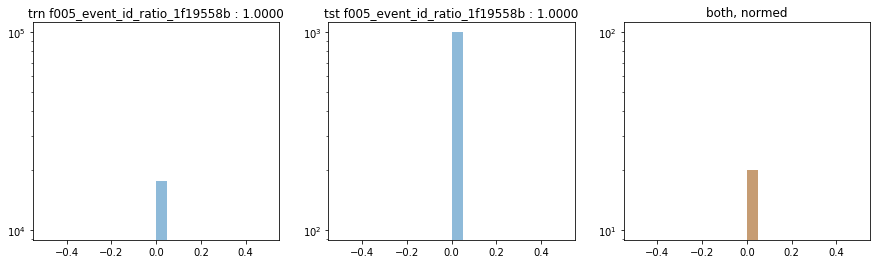

 ---------- f005_event_id_ratio_222660ff ---------- 


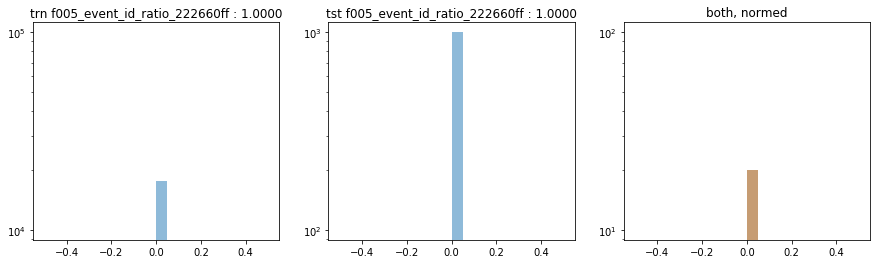

 ---------- f005_event_id_ratio_2230fab4 ---------- 


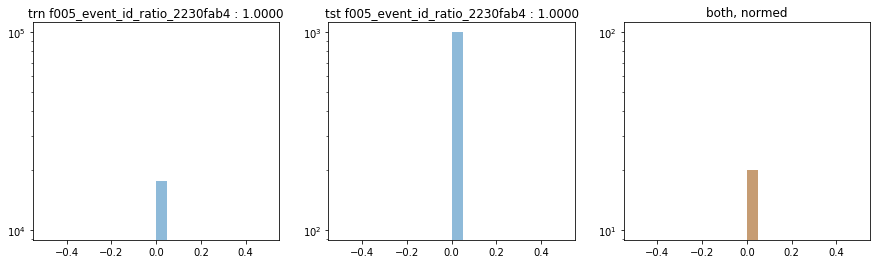

 ---------- f005_event_id_ratio_250513af ---------- 


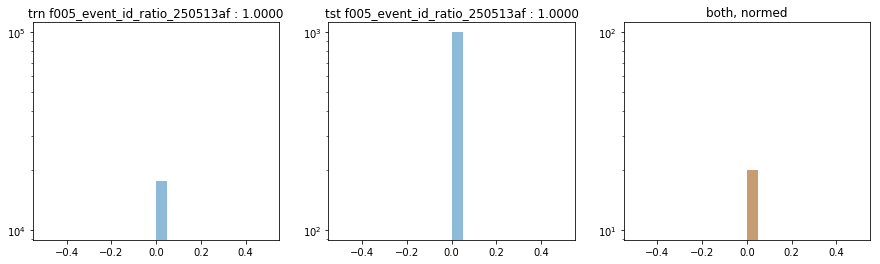

 ---------- f005_event_id_ratio_25fa8af4 ---------- 


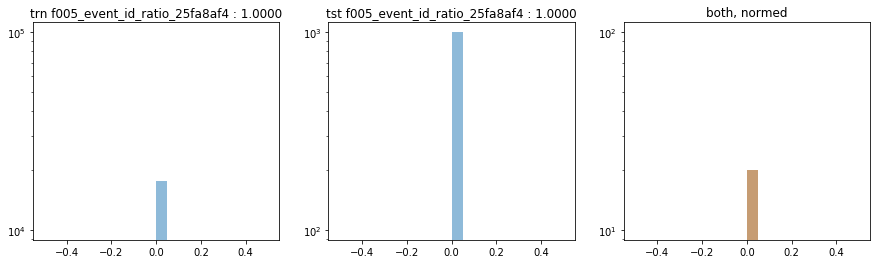

 ---------- f005_event_id_ratio_262136f4 ---------- 


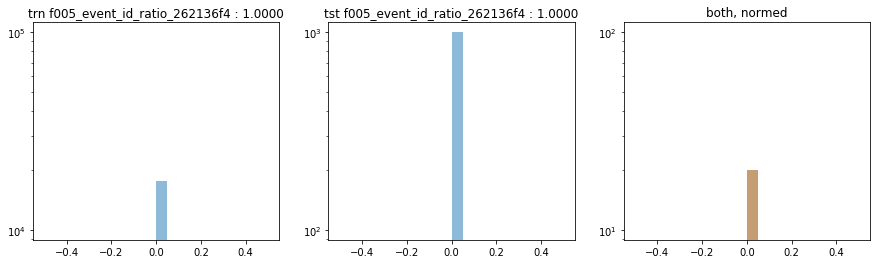

 ---------- f005_event_id_ratio_26a5a3dd ---------- 


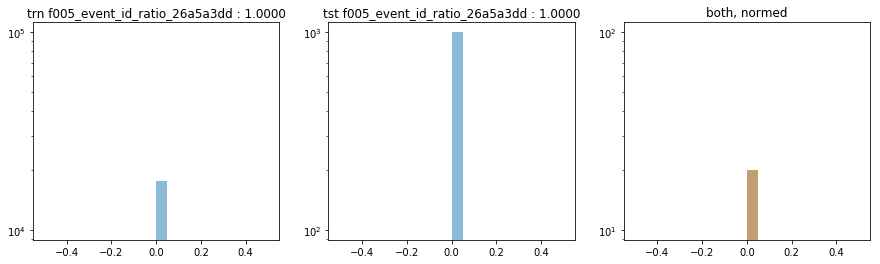

 ---------- f005_event_id_ratio_26fd2d99 ---------- 


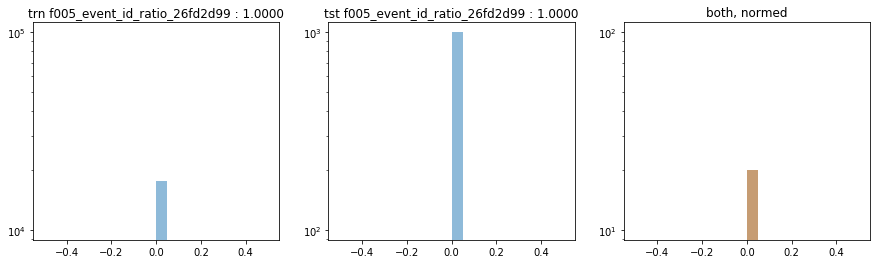

 ---------- f005_event_id_ratio_27253bdc ---------- 


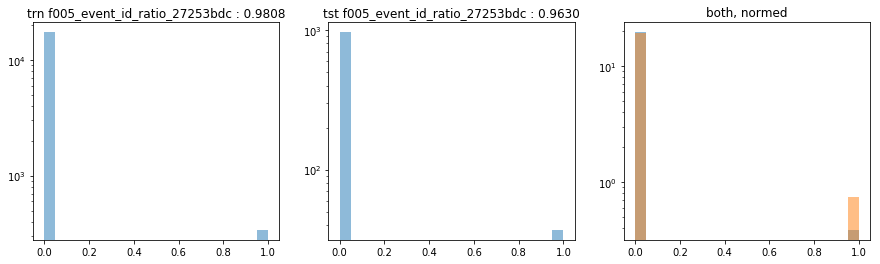

 ---------- f005_event_id_ratio_28520915 ---------- 


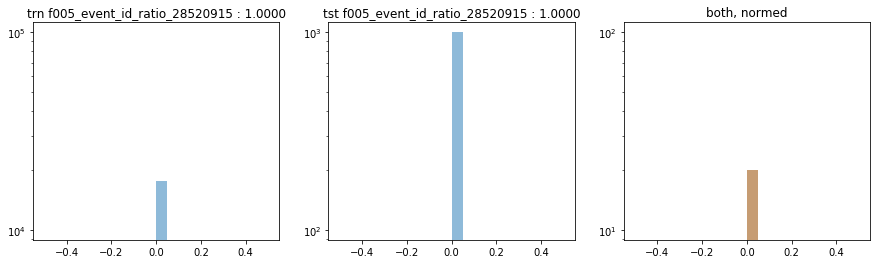

 ---------- f005_event_id_ratio_28a4eb9a ---------- 


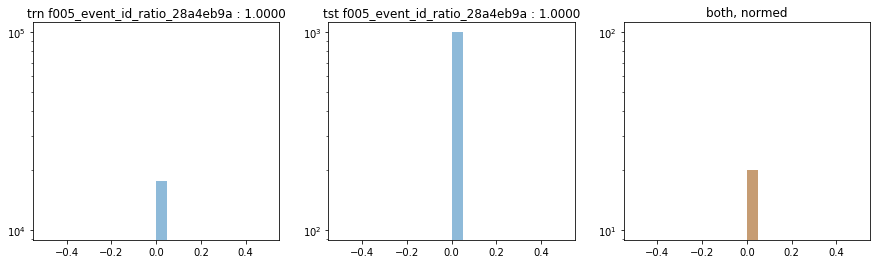

 ---------- f005_event_id_ratio_28ed704e ---------- 


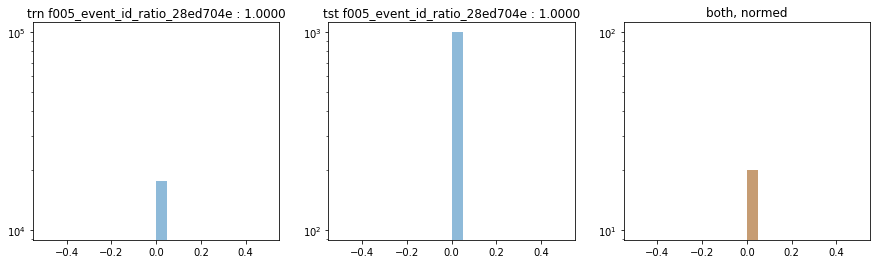

 ---------- f005_event_id_ratio_28f975ea ---------- 


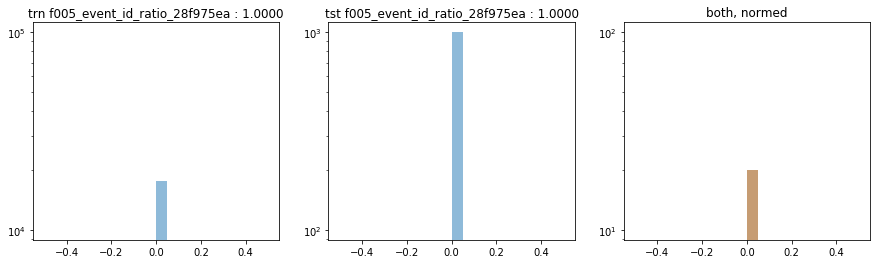

 ---------- f005_event_id_ratio_29bdd9ba ---------- 


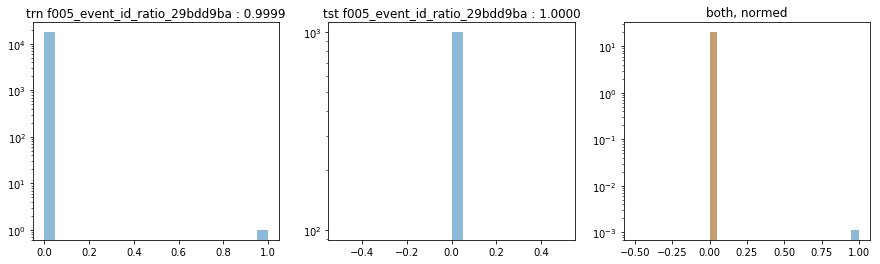

 ---------- f005_event_id_ratio_29f54413 ---------- 


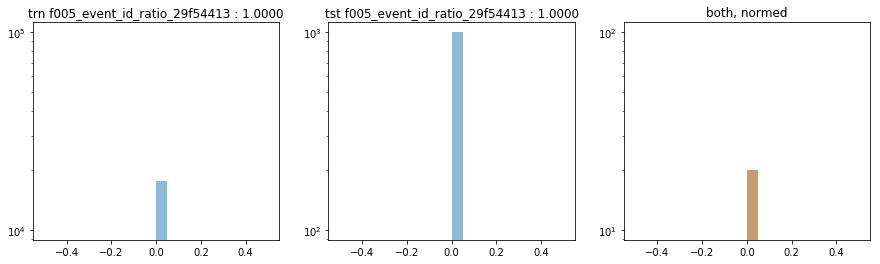

 ---------- f005_event_id_ratio_2a444e03 ---------- 


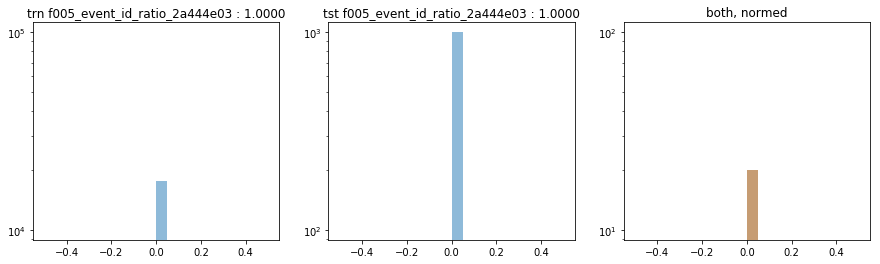

 ---------- f005_event_id_ratio_2a512369 ---------- 


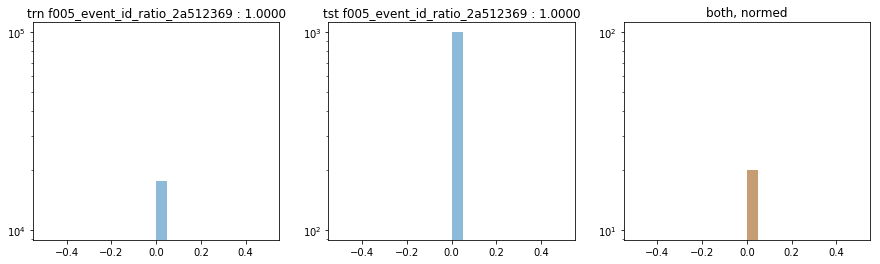

 ---------- f005_event_id_ratio_2b058fe3 ---------- 


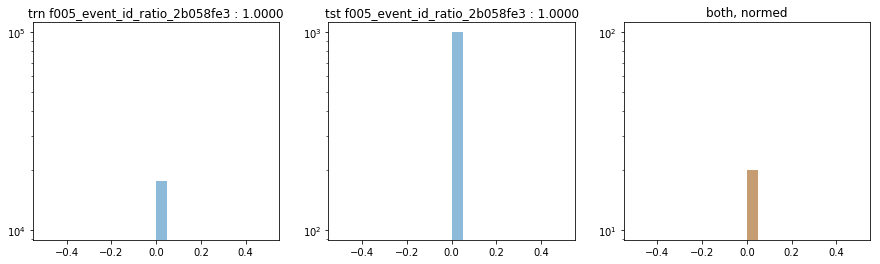

 ---------- f005_event_id_ratio_2b9272f4 ---------- 


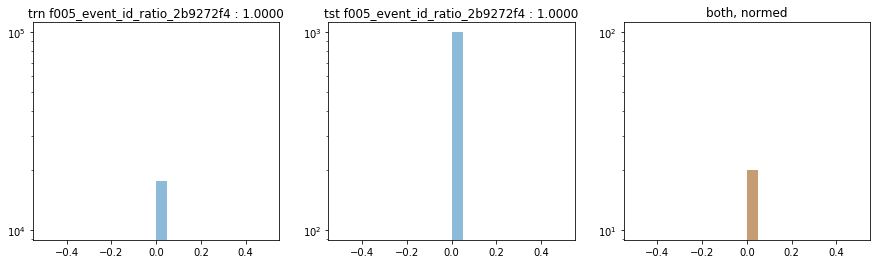

 ---------- f005_event_id_ratio_2c4e6db0 ---------- 


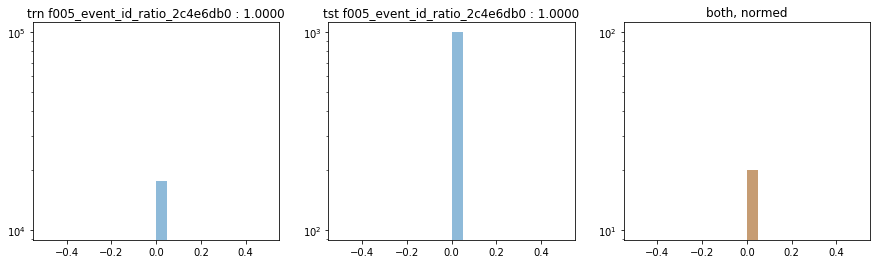

 ---------- f005_event_id_ratio_2dc29e21 ---------- 


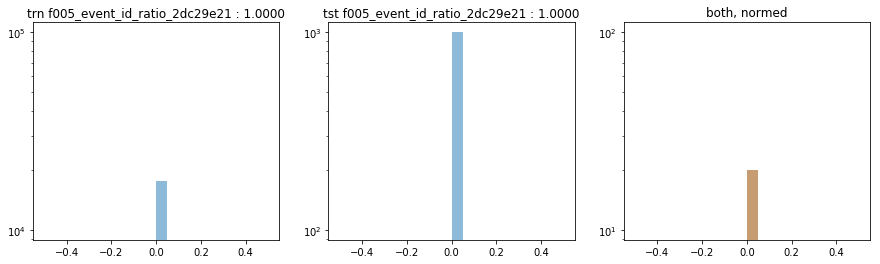

 ---------- f005_event_id_ratio_2dcad279 ---------- 


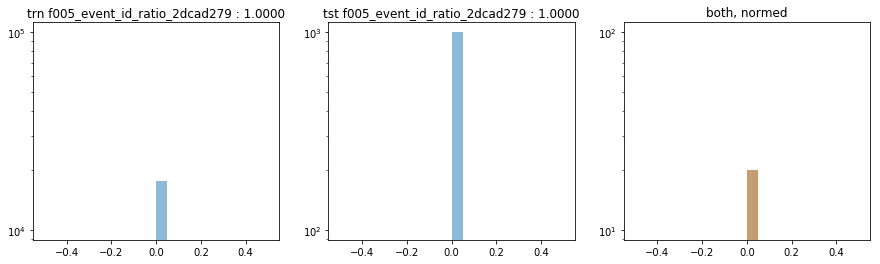

 ---------- f005_event_id_ratio_2fb91ec1 ---------- 


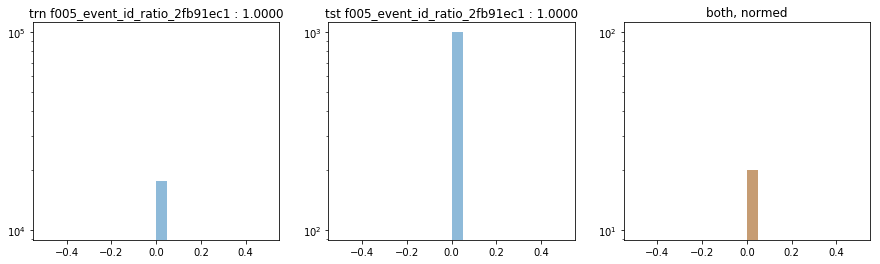

 ---------- f005_event_id_ratio_30614231 ---------- 


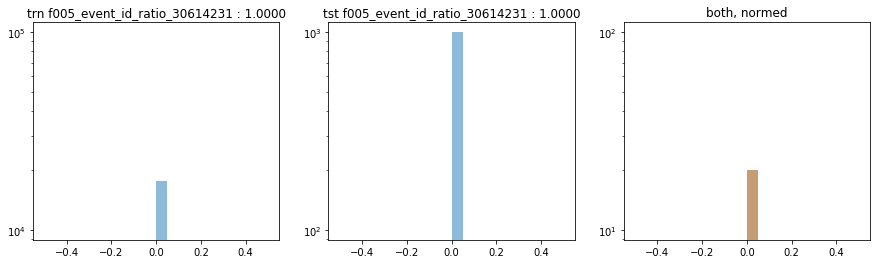

 ---------- f005_event_id_ratio_30df3273 ---------- 


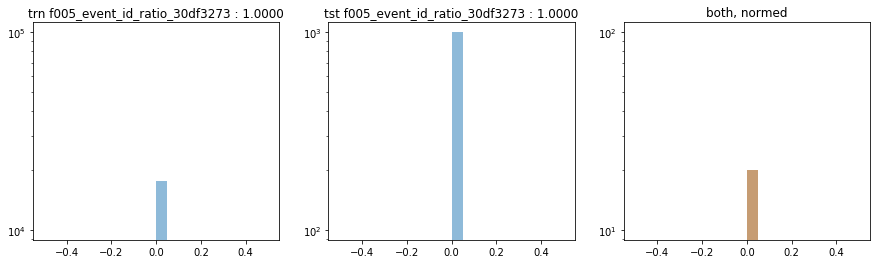

 ---------- f005_event_id_ratio_31973d56 ---------- 


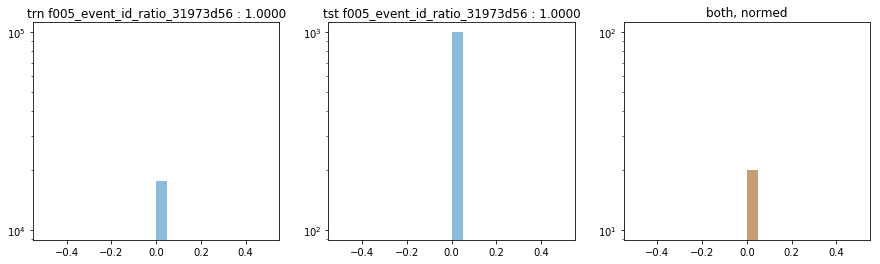

 ---------- f005_event_id_ratio_3323d7e9 ---------- 


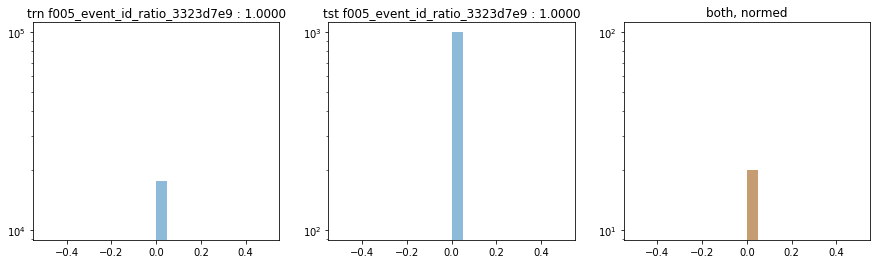

 ---------- f005_event_id_ratio_33505eae ---------- 


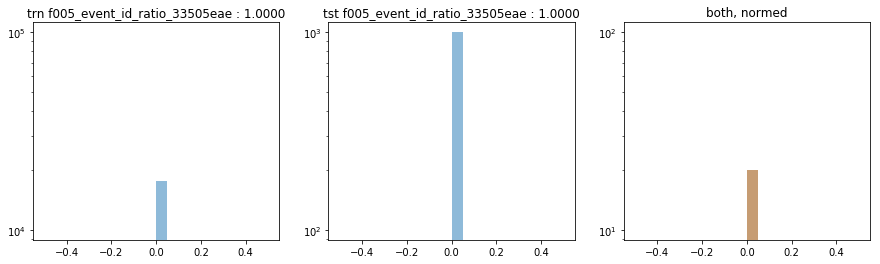

 ---------- f005_event_id_ratio_3393b68b ---------- 


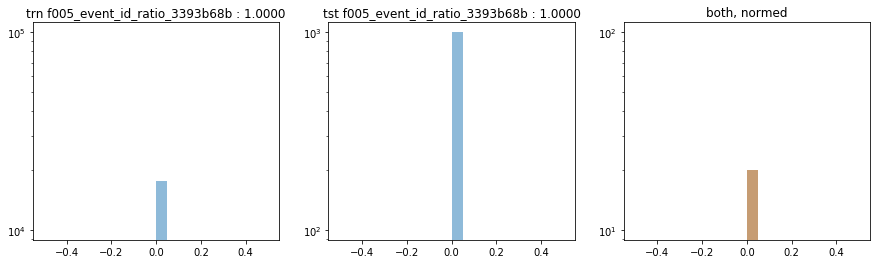

 ---------- f005_event_id_ratio_363c86c9 ---------- 


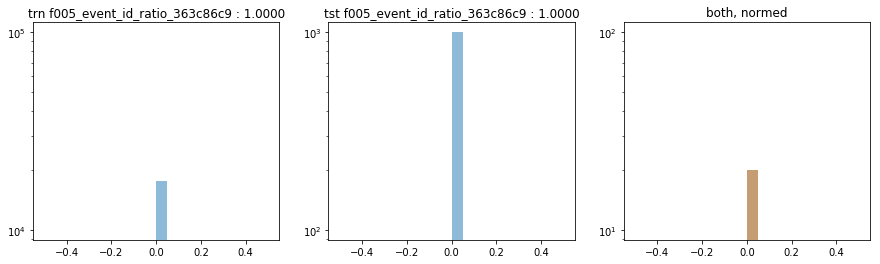

 ---------- f005_event_id_ratio_363d3849 ---------- 


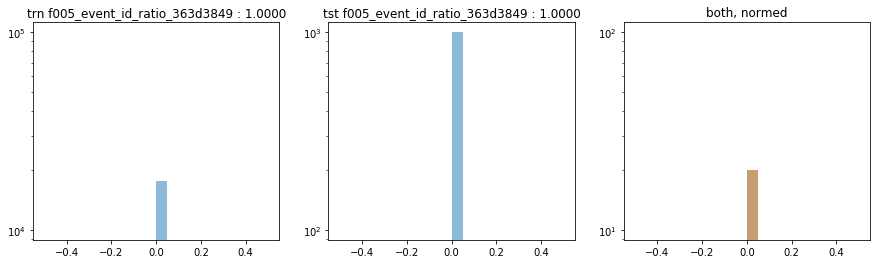

 ---------- f005_event_id_ratio_36fa3ebe ---------- 


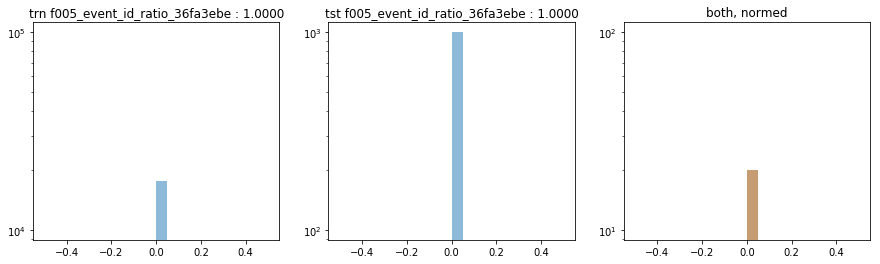

 ---------- f005_event_id_ratio_37937459 ---------- 


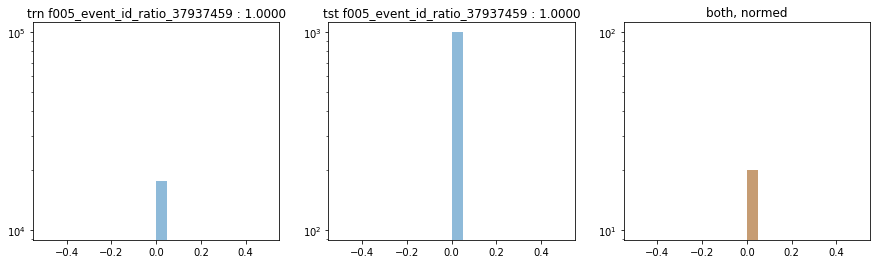

 ---------- f005_event_id_ratio_37c53127 ---------- 


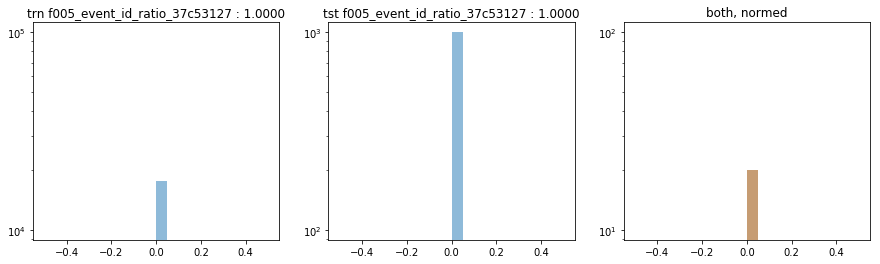

 ---------- f005_event_id_ratio_37db1c2f ---------- 


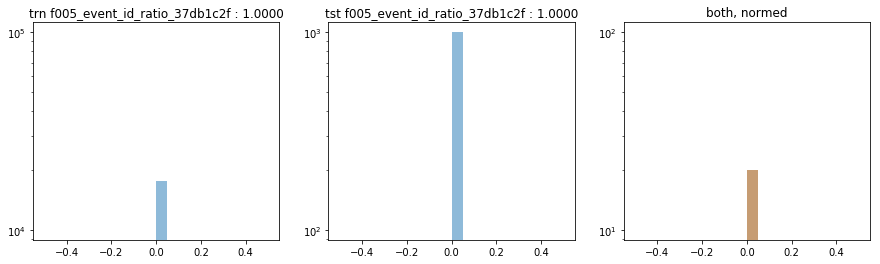

 ---------- f005_event_id_ratio_37ee8496 ---------- 


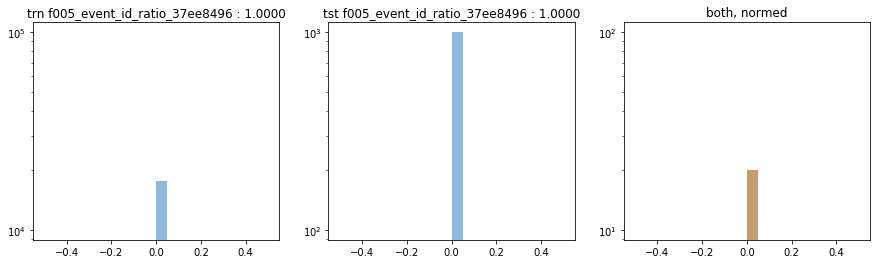

 ---------- f005_event_id_ratio_38074c54 ---------- 


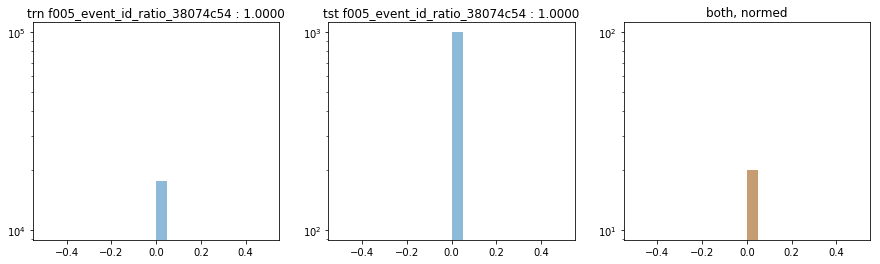

 ---------- f005_event_id_ratio_392e14df ---------- 


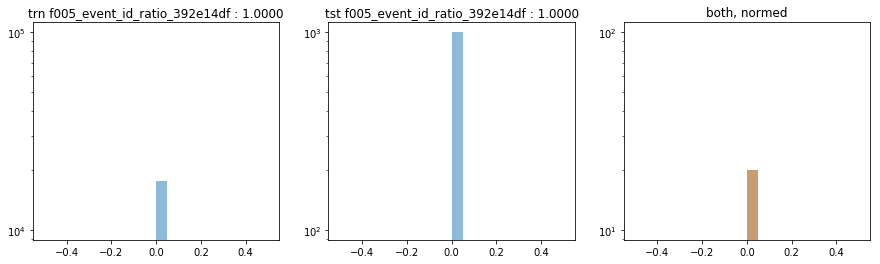

 ---------- f005_event_id_ratio_3a4be871 ---------- 


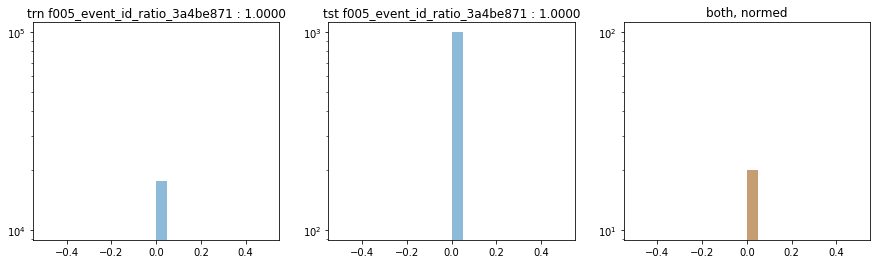

 ---------- f005_event_id_ratio_3afb49e6 ---------- 


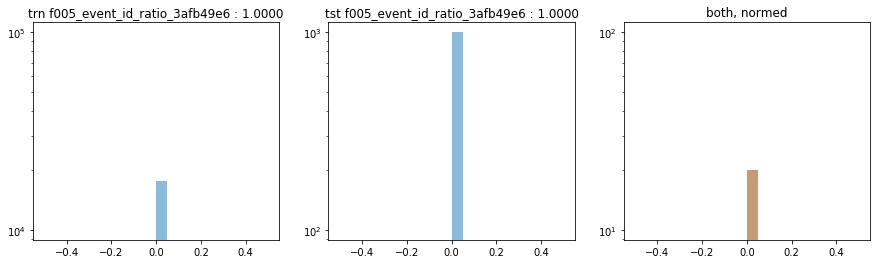

 ---------- f005_event_id_ratio_3afde5dd ---------- 


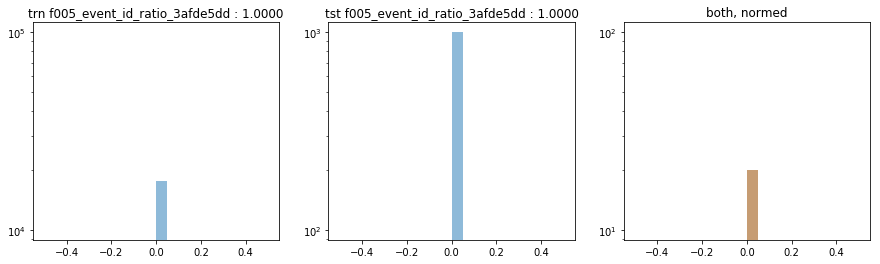

 ---------- f005_event_id_ratio_3b2048ee ---------- 


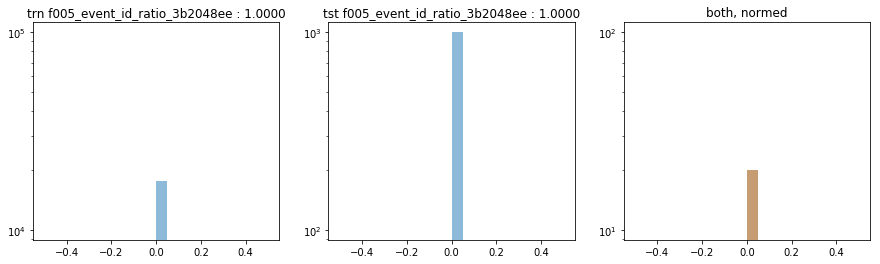

 ---------- f005_event_id_ratio_3babcb9b ---------- 


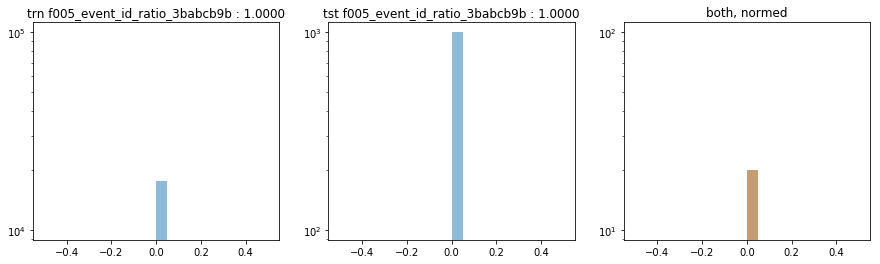

 ---------- f005_event_id_ratio_3bb91ced ---------- 


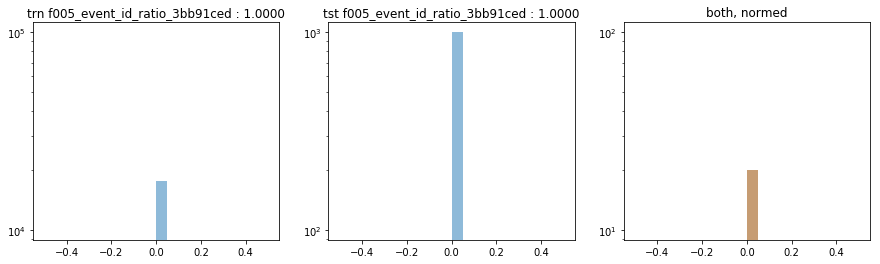

 ---------- f005_event_id_ratio_3bb91dda ---------- 


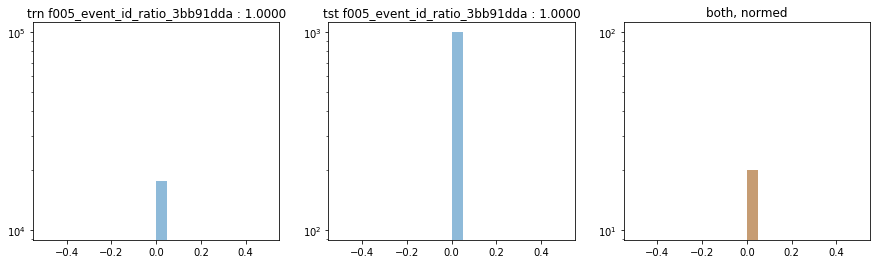

 ---------- f005_event_id_ratio_3bf1cf26 ---------- 


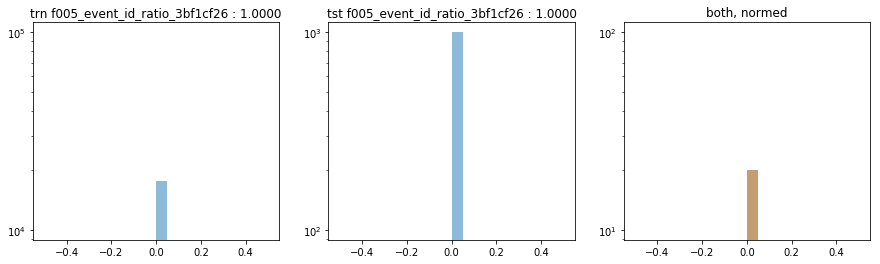

 ---------- f005_event_id_ratio_3bfd1a65 ---------- 


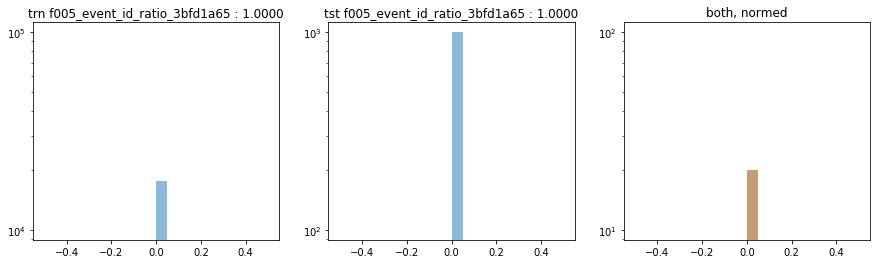

 ---------- f005_event_id_ratio_3ccd3f02 ---------- 


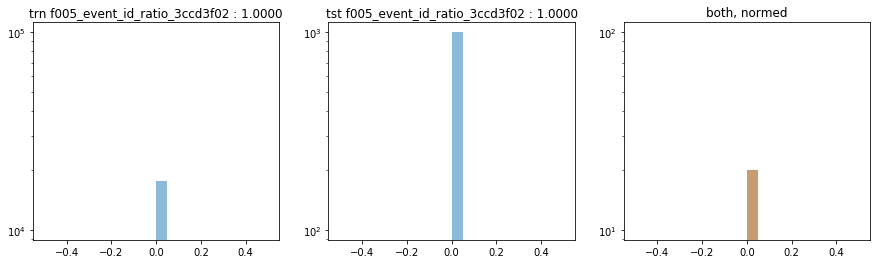

 ---------- f005_event_id_ratio_3d0b9317 ---------- 


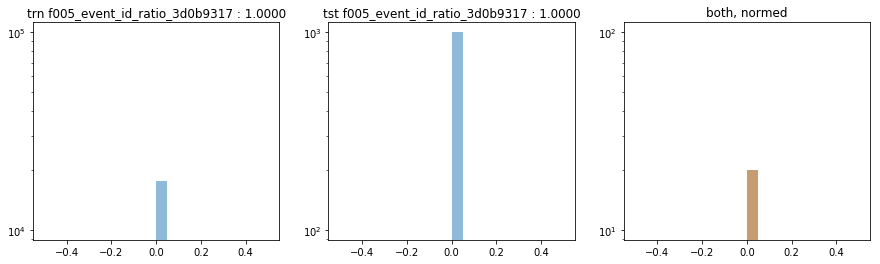

 ---------- f005_event_id_ratio_3d63345e ---------- 


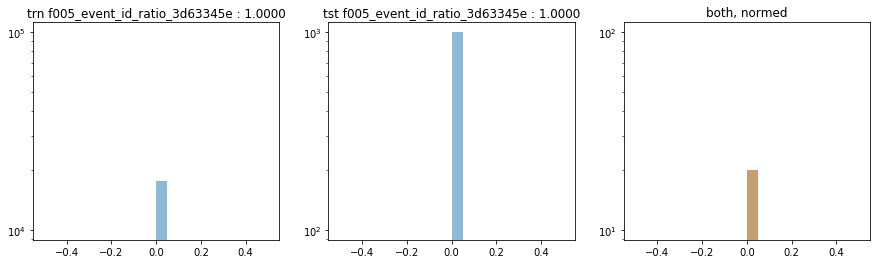

 ---------- f005_event_id_ratio_3d8c61b0 ---------- 


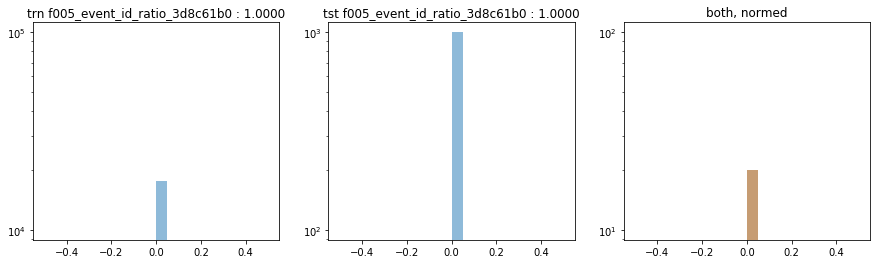

 ---------- f005_event_id_ratio_3dcdda7f ---------- 


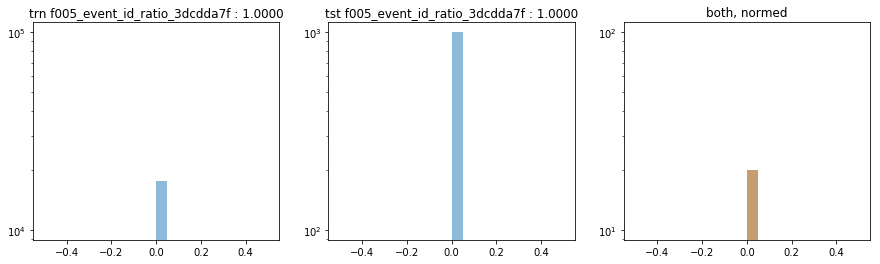

 ---------- f005_event_id_ratio_3ddc79c3 ---------- 


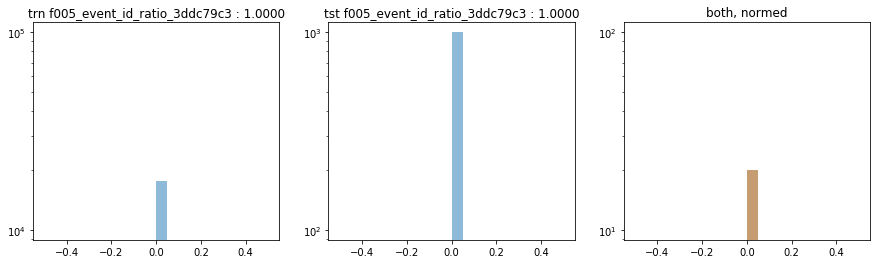

 ---------- f005_event_id_ratio_3dfd4aa4 ---------- 


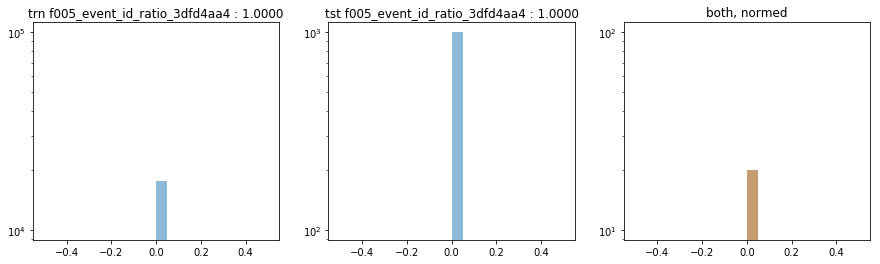

 ---------- f005_event_id_ratio_3edf6747 ---------- 


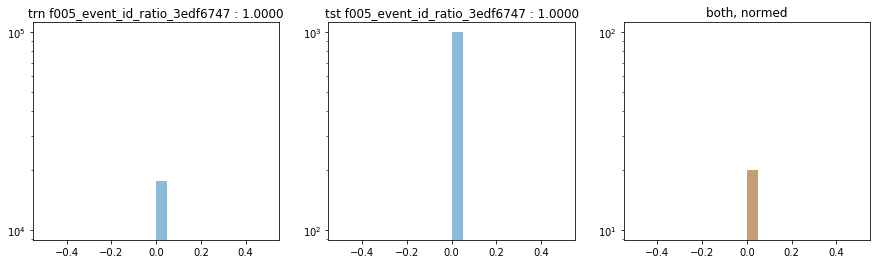

 ---------- f005_event_id_ratio_3ee399c3 ---------- 


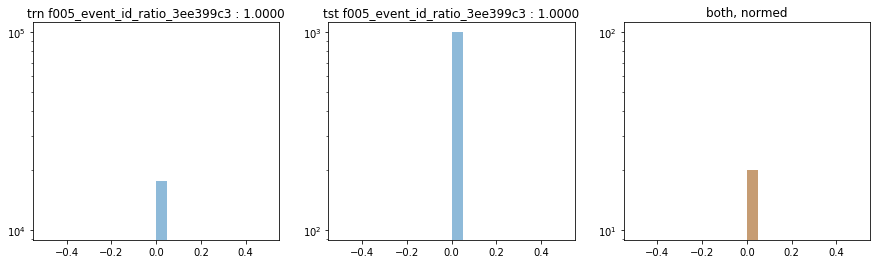

 ---------- f005_event_id_ratio_44cb4907 ---------- 


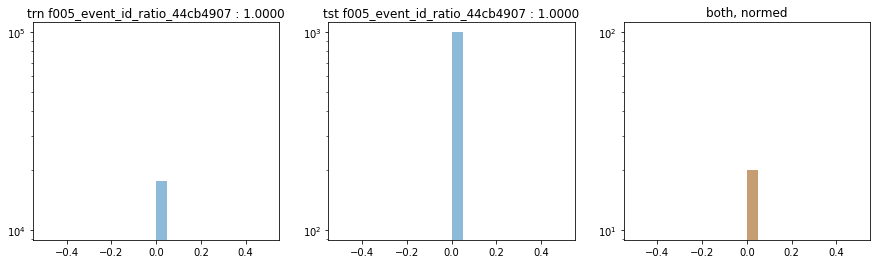

 ---------- f005_event_id_ratio_45d01abe ---------- 


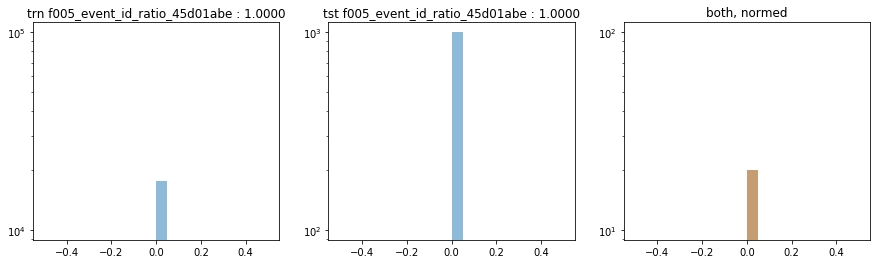

 ---------- f005_event_id_ratio_461eace6 ---------- 


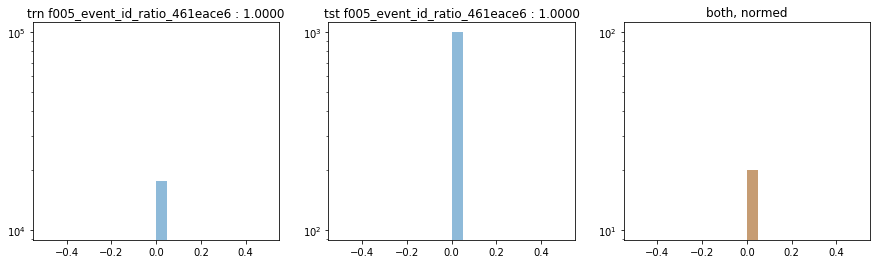

 ---------- f005_event_id_ratio_46b50ba8 ---------- 


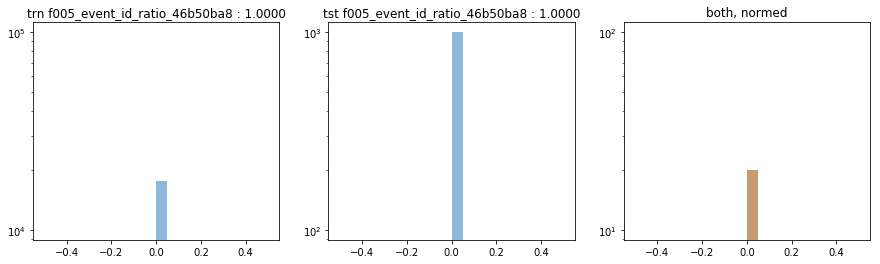

 ---------- f005_event_id_ratio_46cd75b4 ---------- 


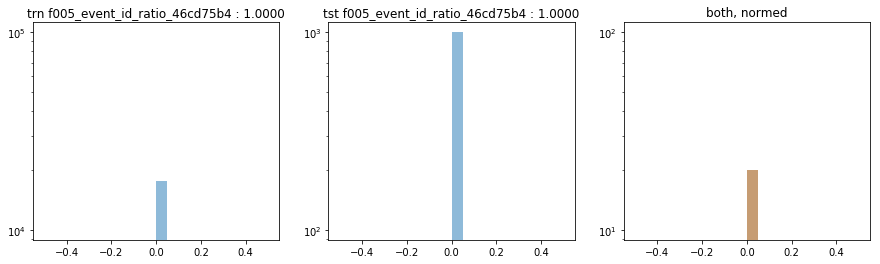

 ---------- f005_event_id_ratio_47026d5f ---------- 


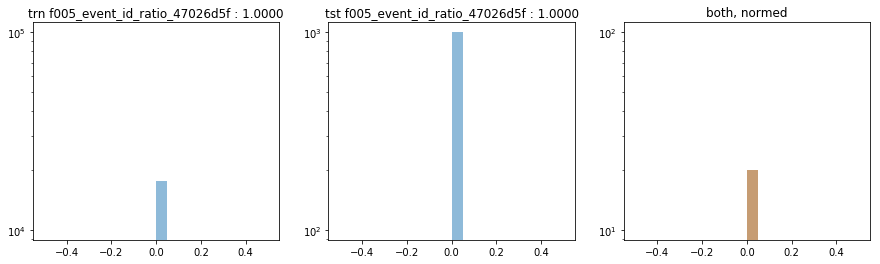

 ---------- f005_event_id_ratio_47efca07 ---------- 


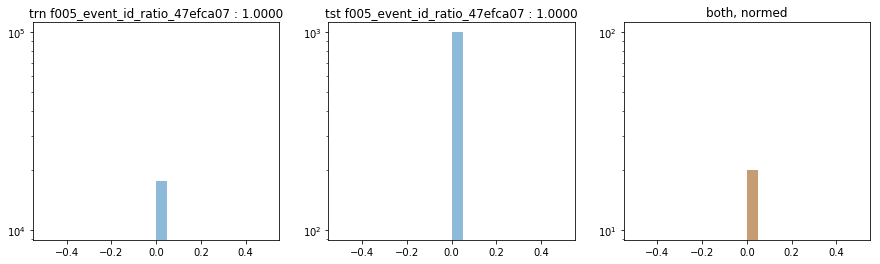

 ---------- f005_event_id_ratio_47f43a44 ---------- 


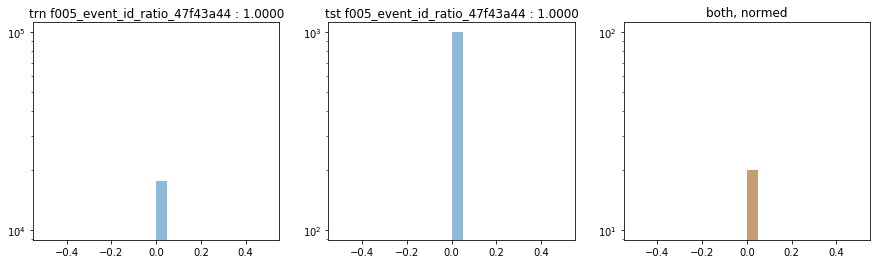

 ---------- f005_event_id_ratio_48349b14 ---------- 


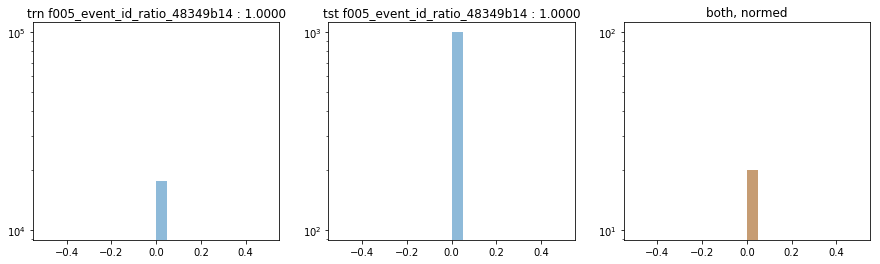

 ---------- f005_event_id_ratio_4901243f ---------- 


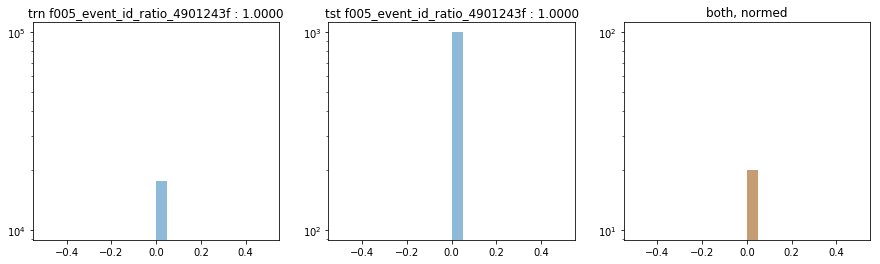

 ---------- f005_event_id_ratio_499edb7c ---------- 


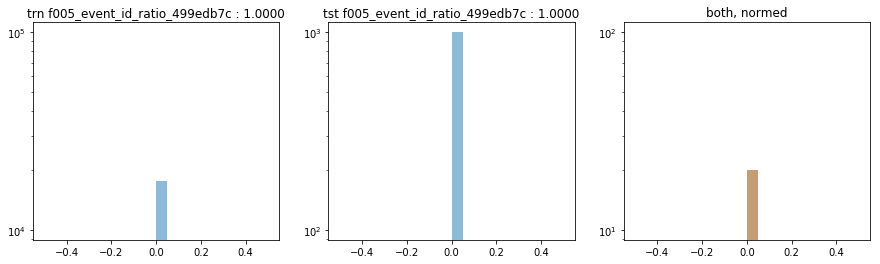

 ---------- f005_event_id_ratio_49ed92e9 ---------- 


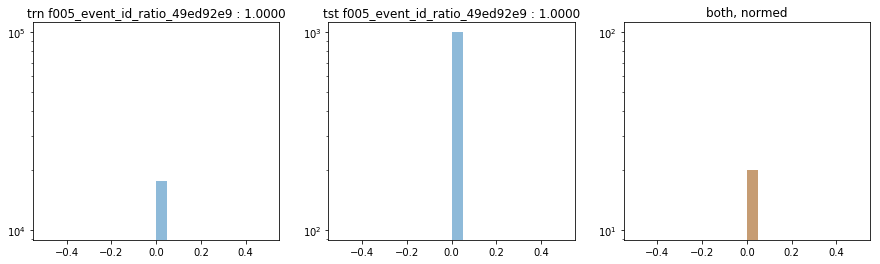

 ---------- f005_event_id_ratio_4a09ace1 ---------- 


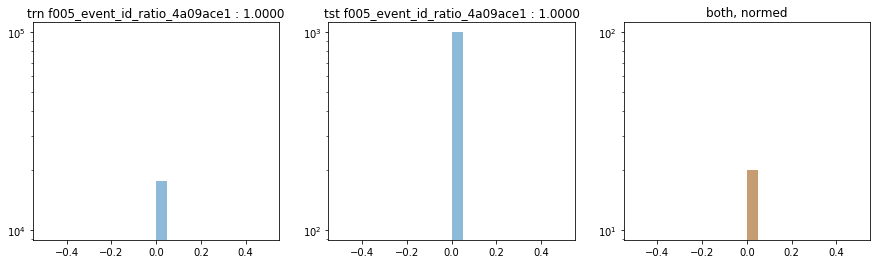

 ---------- f005_event_id_ratio_4a4c3d21 ---------- 


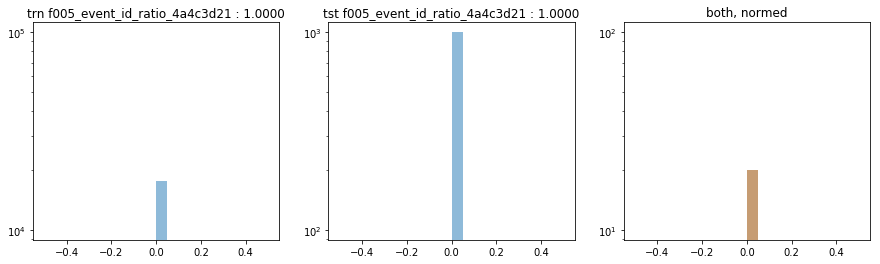

 ---------- f005_event_id_ratio_4b5efe37 ---------- 


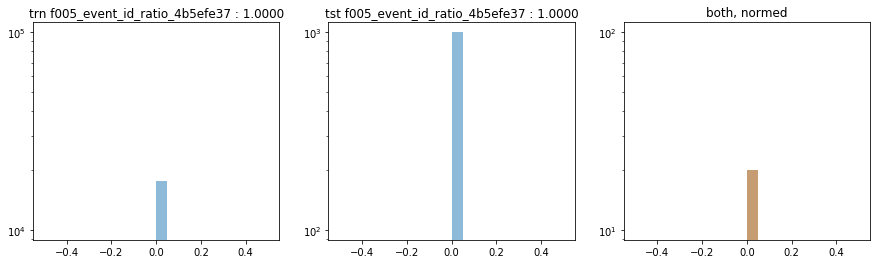

 ---------- f005_event_id_ratio_4bb2f698 ---------- 


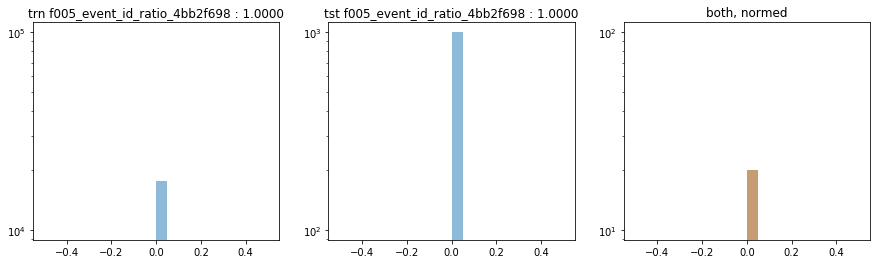

 ---------- f005_event_id_ratio_4c2ec19f ---------- 


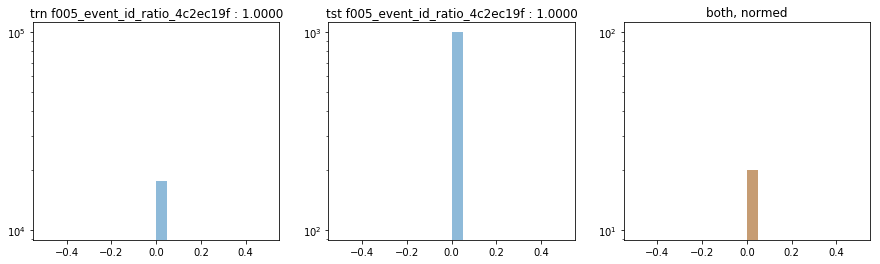

 ---------- f005_event_id_ratio_4d6737eb ---------- 


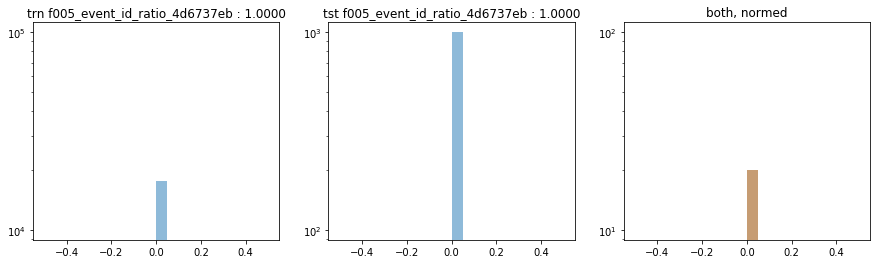

 ---------- f005_event_id_ratio_4d911100 ---------- 


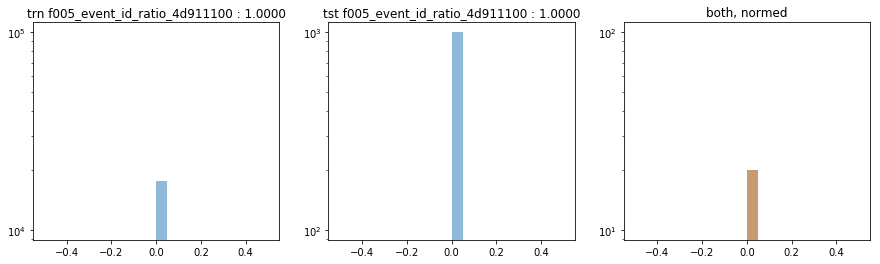

 ---------- f005_event_id_ratio_4e5fc6f5 ---------- 


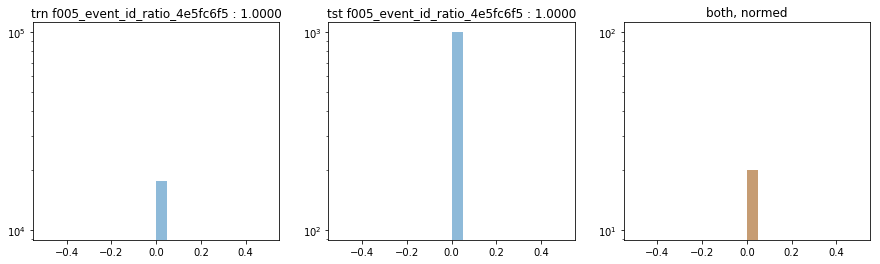

 ---------- f005_event_id_ratio_4ef8cdd3 ---------- 


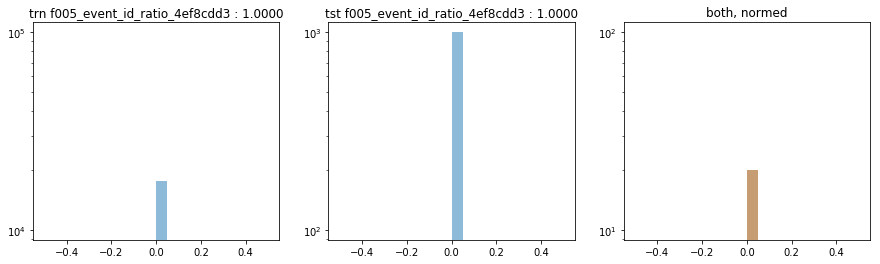

 ---------- f005_event_id_ratio_51102b85 ---------- 


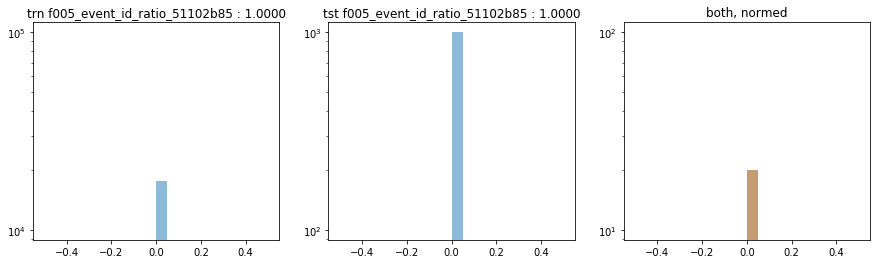

 ---------- f005_event_id_ratio_51311d7a ---------- 


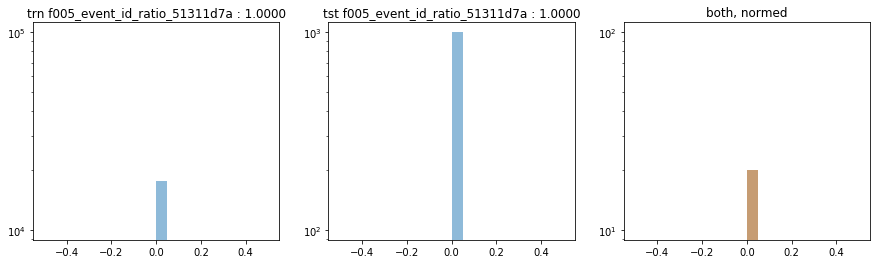

 ---------- f005_event_id_ratio_5154fc30 ---------- 


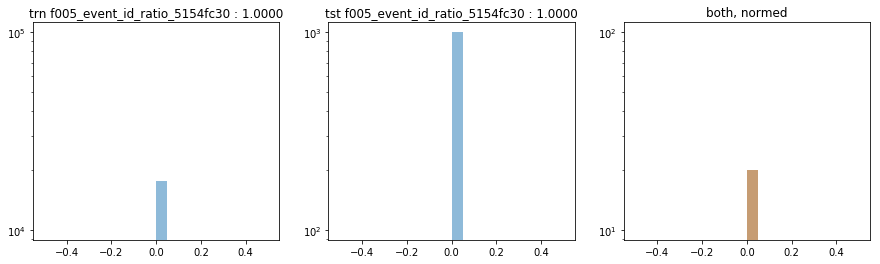

 ---------- f005_event_id_ratio_5290eab1 ---------- 


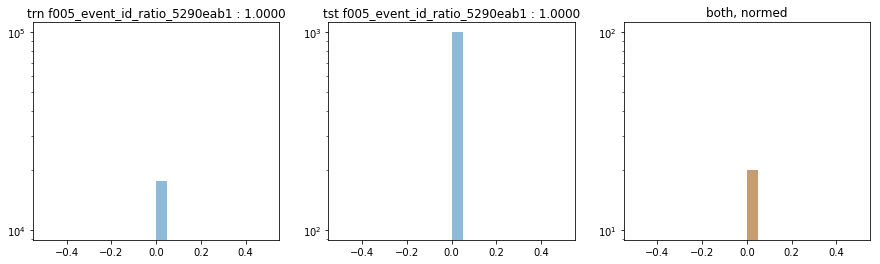

 ---------- f005_event_id_ratio_532a2afb ---------- 


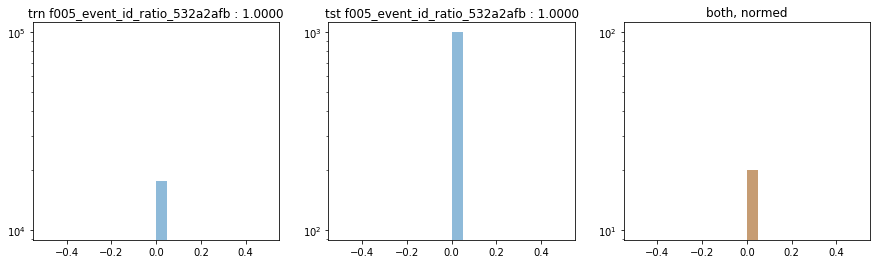

 ---------- f005_event_id_ratio_5348fd84 ---------- 


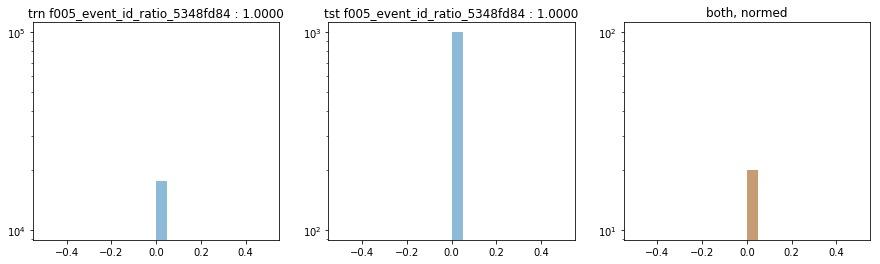

 ---------- f005_event_id_ratio_53c6e11a ---------- 


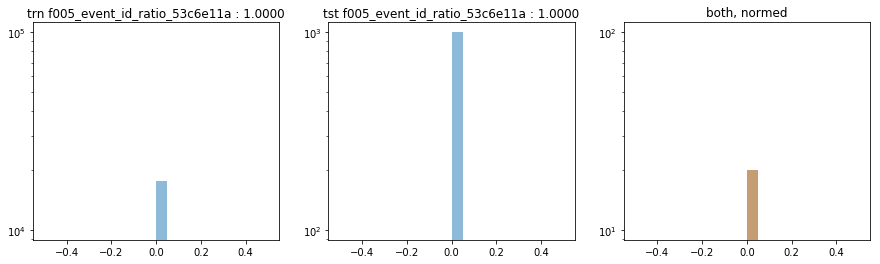

 ---------- f005_event_id_ratio_55115cbd ---------- 


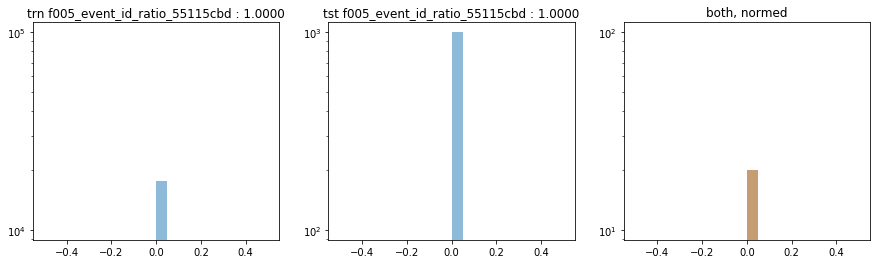

 ---------- f005_event_id_ratio_562cec5f ---------- 


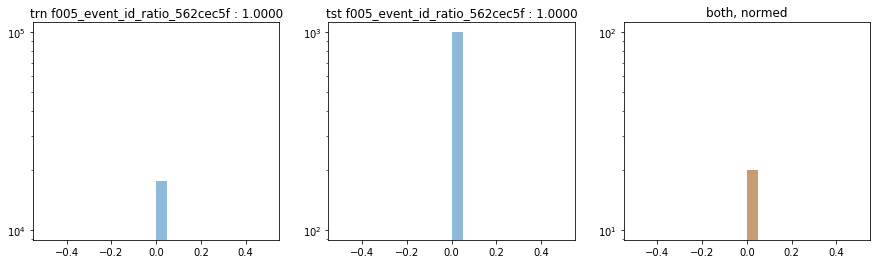

 ---------- f005_event_id_ratio_565a3990 ---------- 


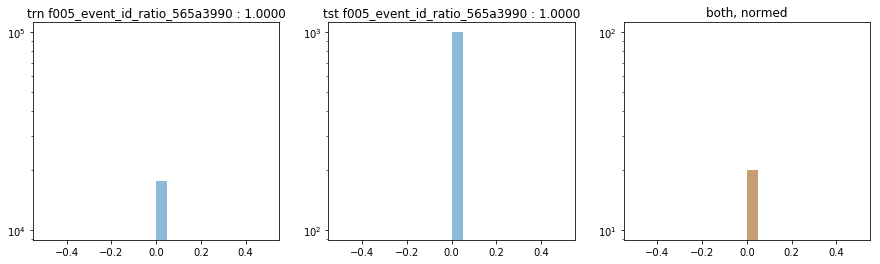

 ---------- f005_event_id_ratio_56817e2b ---------- 


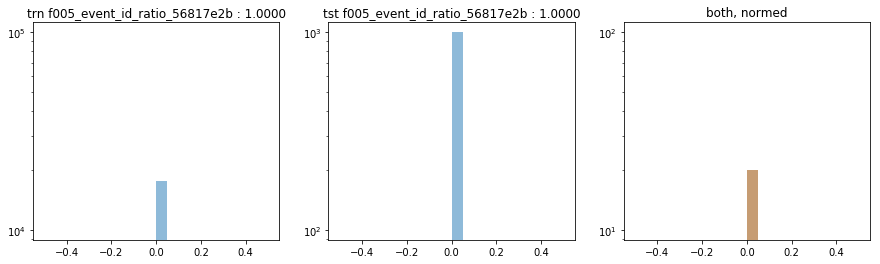

 ---------- f005_event_id_ratio_56bcd38d ---------- 


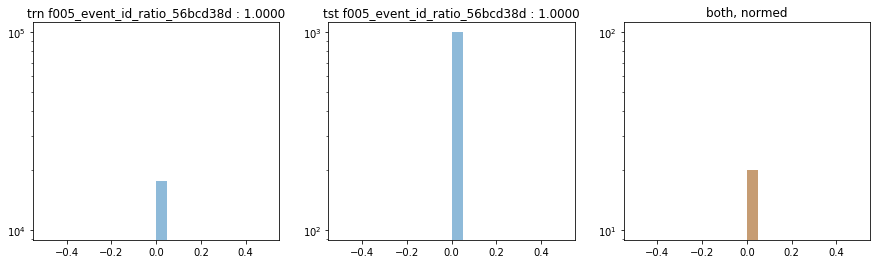

 ---------- f005_event_id_ratio_56cd3b43 ---------- 


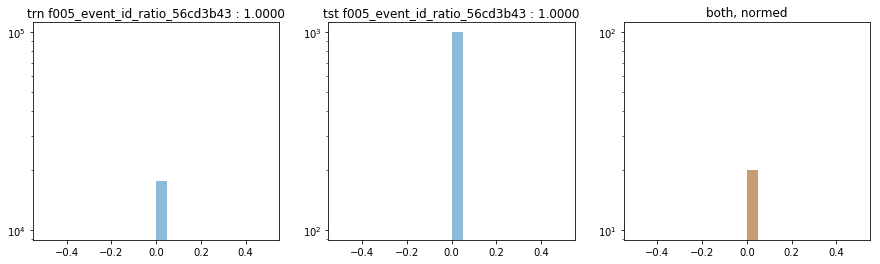

 ---------- f005_event_id_ratio_5859dfb6 ---------- 


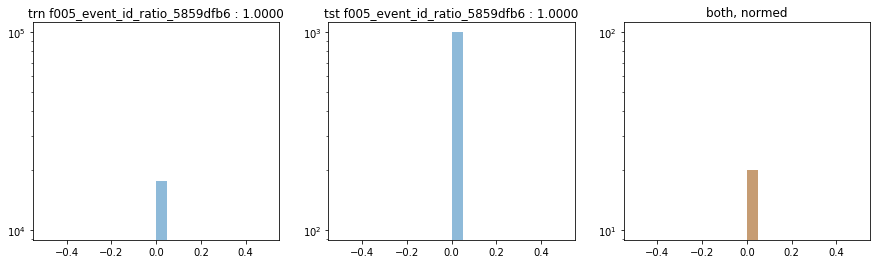

 ---------- f005_event_id_ratio_587b5989 ---------- 


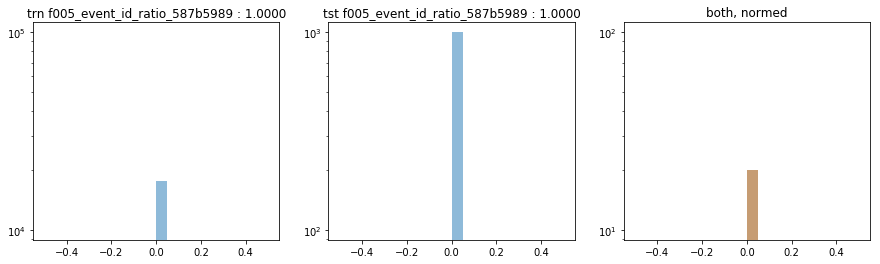

 ---------- f005_event_id_ratio_58a0de5c ---------- 


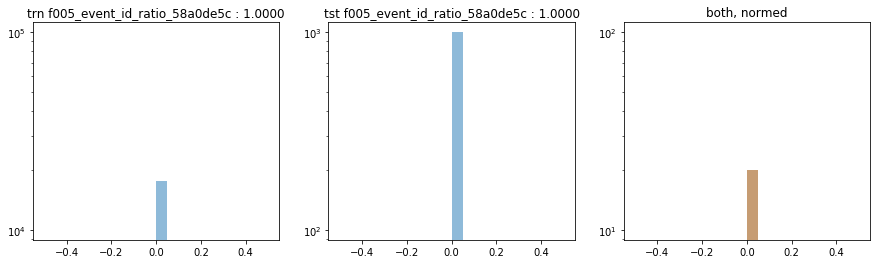

 ---------- f005_event_id_ratio_598f4598 ---------- 


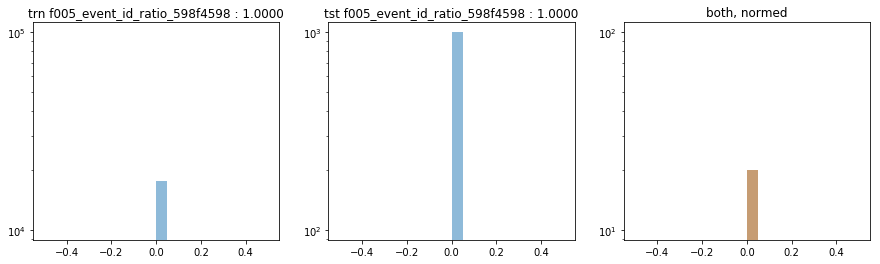

 ---------- f005_event_id_ratio_5a848010 ---------- 


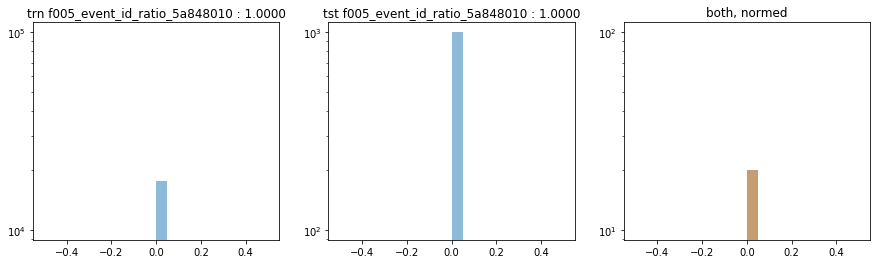

 ---------- f005_event_id_ratio_5b49460a ---------- 


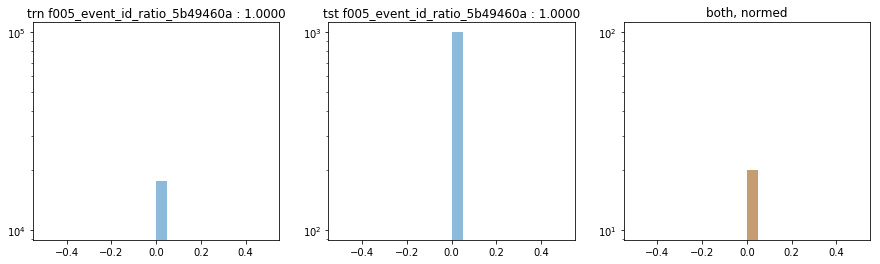

 ---------- f005_event_id_ratio_5be391b5 ---------- 


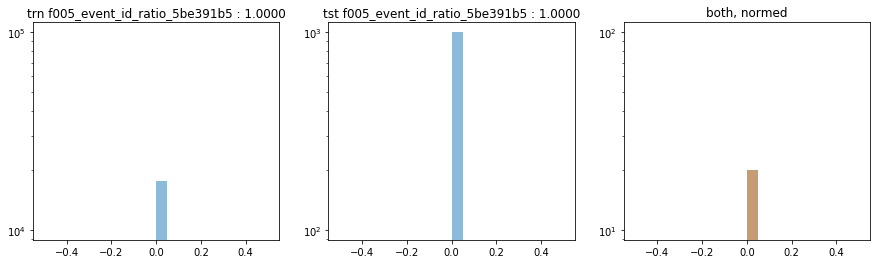

 ---------- f005_event_id_ratio_5c2f29ca ---------- 


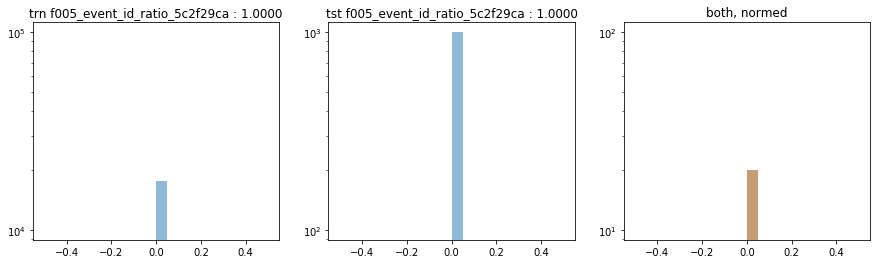

 ---------- f005_event_id_ratio_5c3d2b2f ---------- 


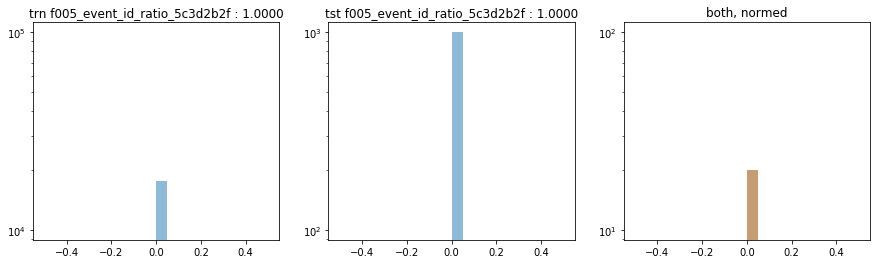

 ---------- f005_event_id_ratio_5d042115 ---------- 


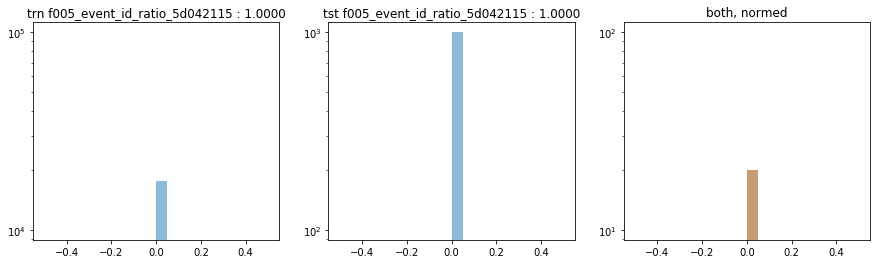

 ---------- f005_event_id_ratio_5de79a6a ---------- 


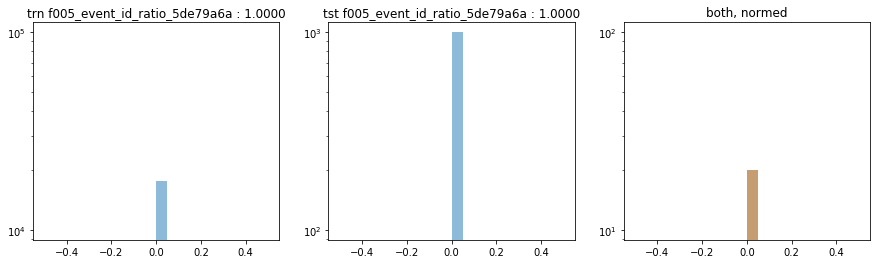

 ---------- f005_event_id_ratio_5e109ec3 ---------- 


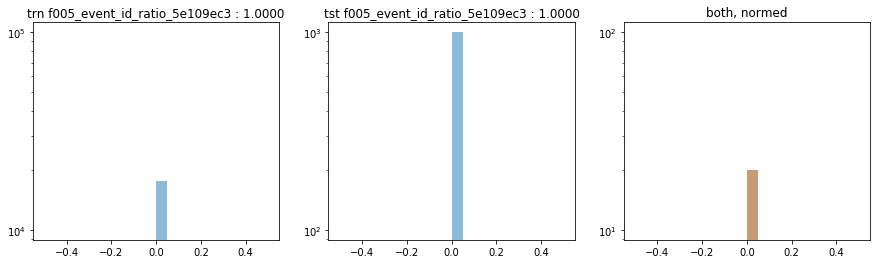

 ---------- f005_event_id_ratio_5e3ea25a ---------- 


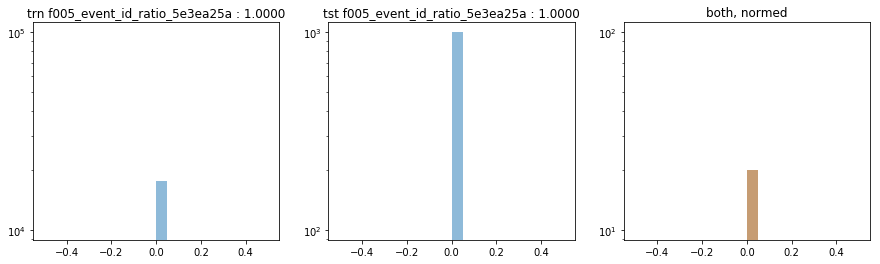

 ---------- f005_event_id_ratio_5e812b27 ---------- 


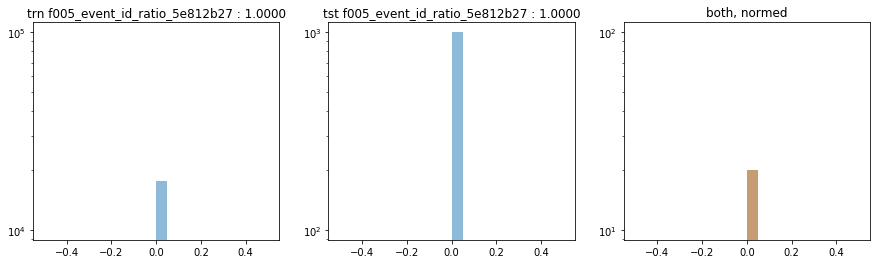

 ---------- f005_event_id_ratio_5f0eb72c ---------- 


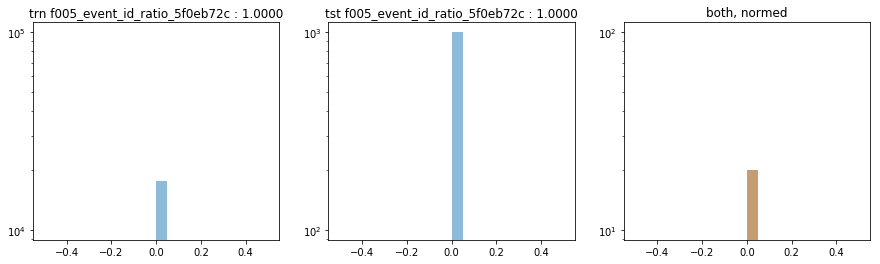

 ---------- f005_event_id_ratio_5f5b2617 ---------- 


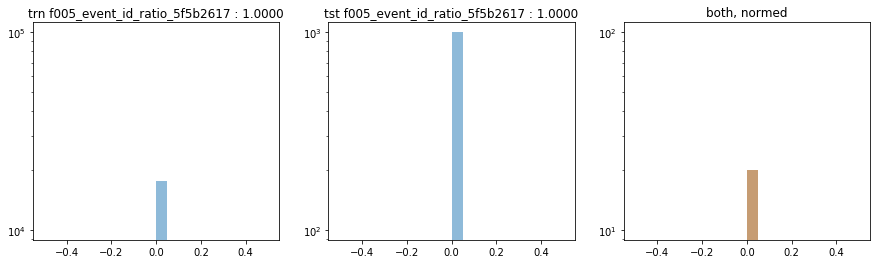

 ---------- f005_event_id_ratio_6043a2b4 ---------- 


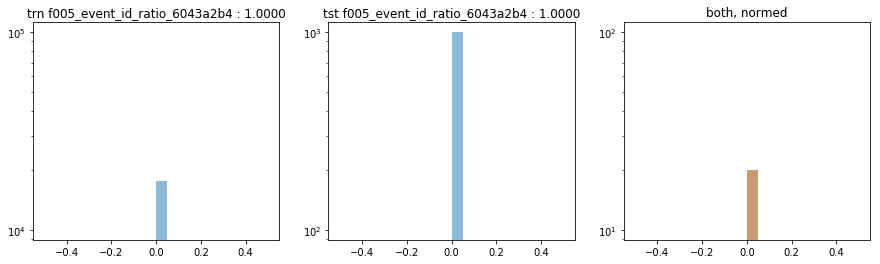

 ---------- f005_event_id_ratio_6077cc36 ---------- 


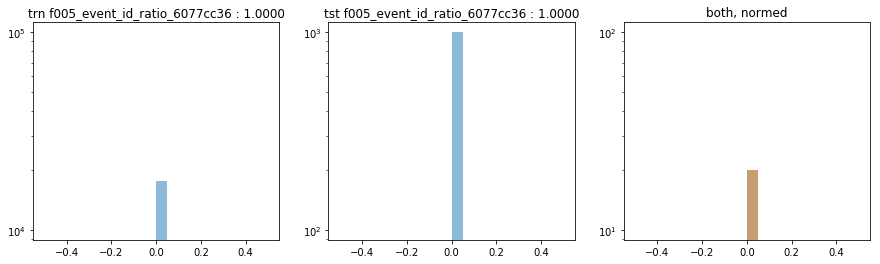

 ---------- f005_event_id_ratio_6088b756 ---------- 


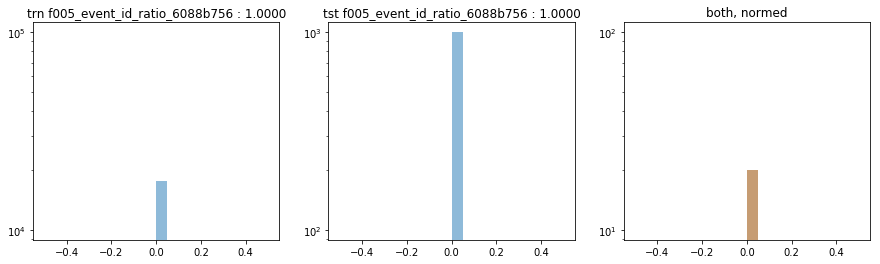

 ---------- f005_event_id_ratio_63f13dd7 ---------- 


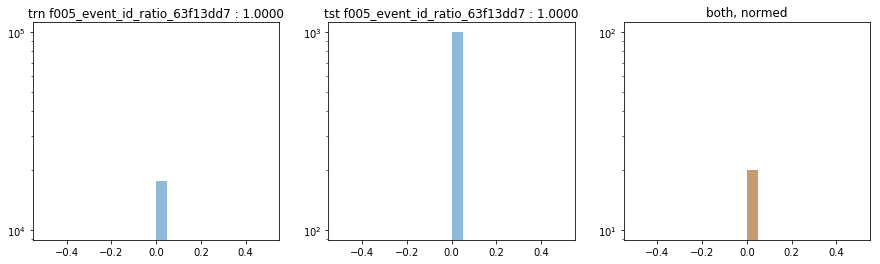

 ---------- f005_event_id_ratio_65a38bf7 ---------- 


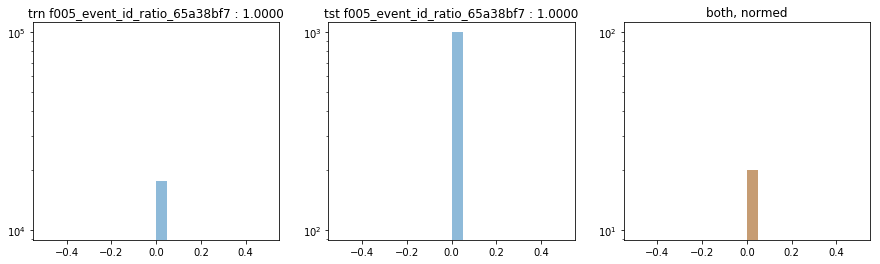

 ---------- f005_event_id_ratio_65abac75 ---------- 


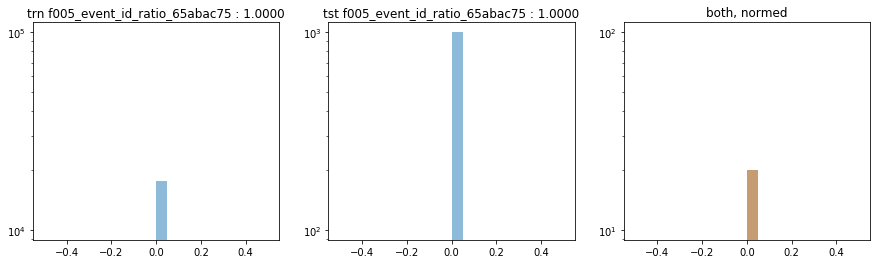

 ---------- f005_event_id_ratio_67439901 ---------- 


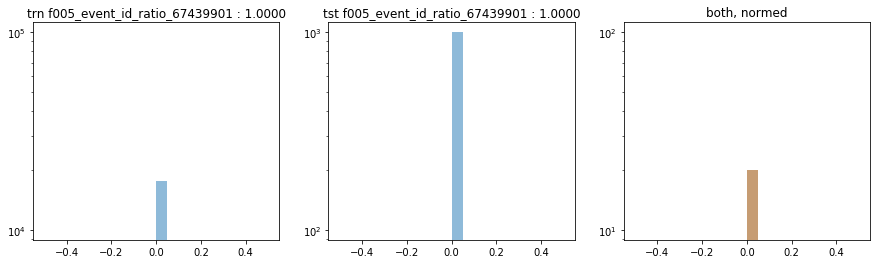

 ---------- f005_event_id_ratio_67aa2ada ---------- 


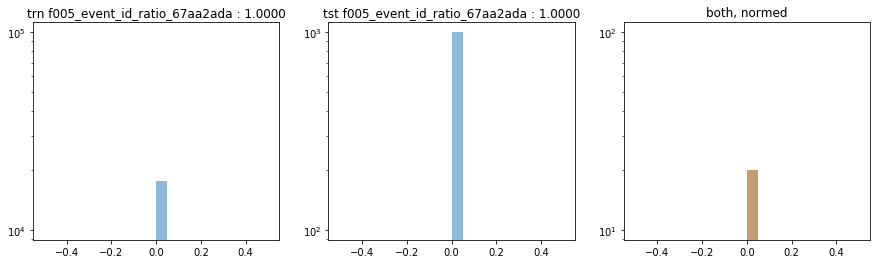

 ---------- f005_event_id_ratio_69fdac0a ---------- 


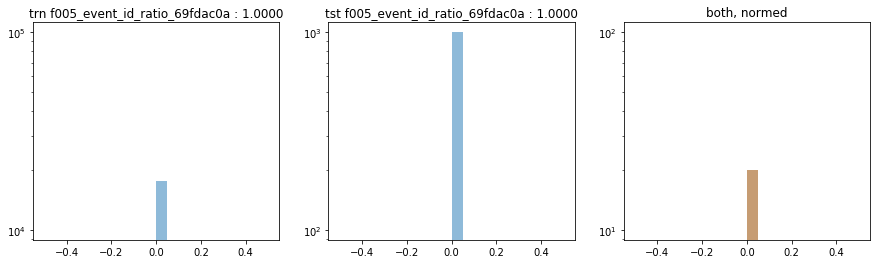

 ---------- f005_event_id_ratio_6aeafed4 ---------- 


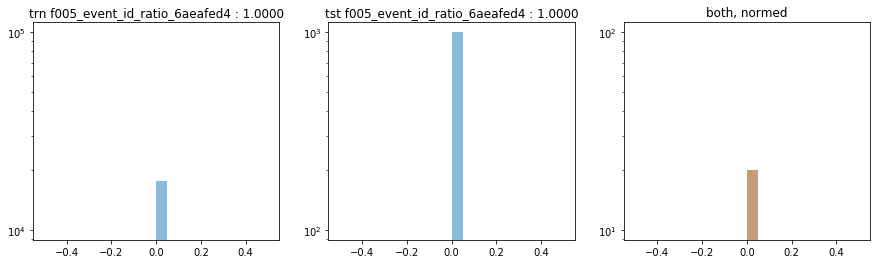

 ---------- f005_event_id_ratio_6bf9e3e1 ---------- 


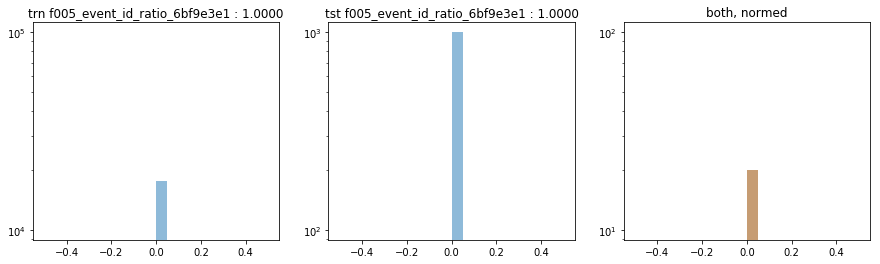

 ---------- f005_event_id_ratio_6c517a88 ---------- 


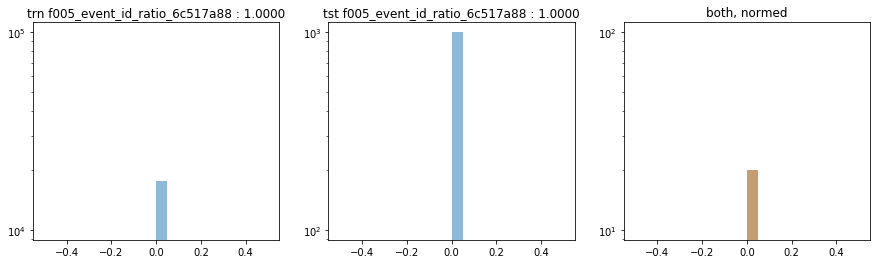

 ---------- f005_event_id_ratio_6c930e6e ---------- 


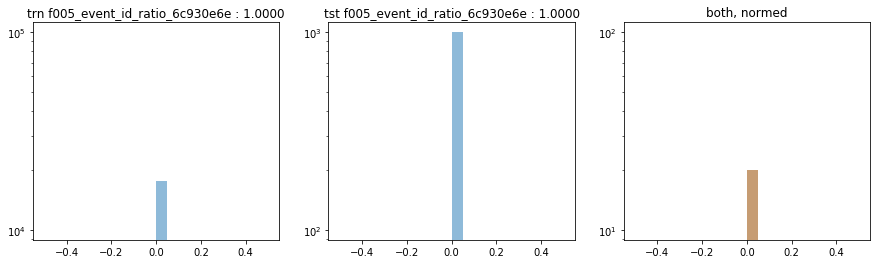

 ---------- f005_event_id_ratio_6cf7d25c ---------- 


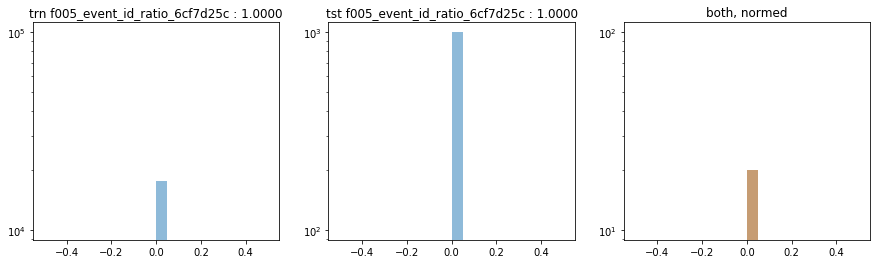

 ---------- f005_event_id_ratio_6d90d394 ---------- 


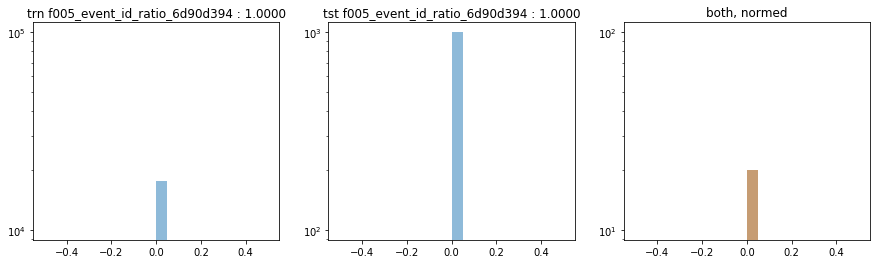

 ---------- f005_event_id_ratio_6f445b57 ---------- 


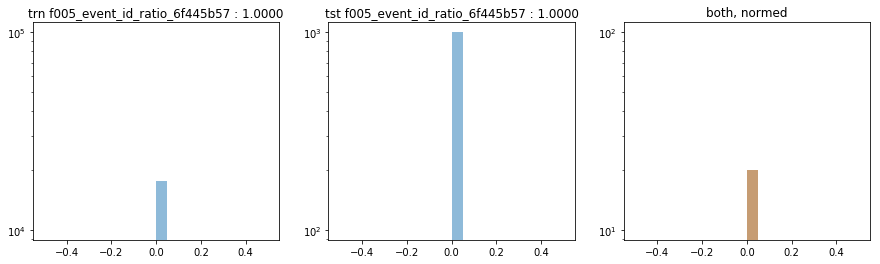

 ---------- f005_event_id_ratio_6f4adc4b ---------- 


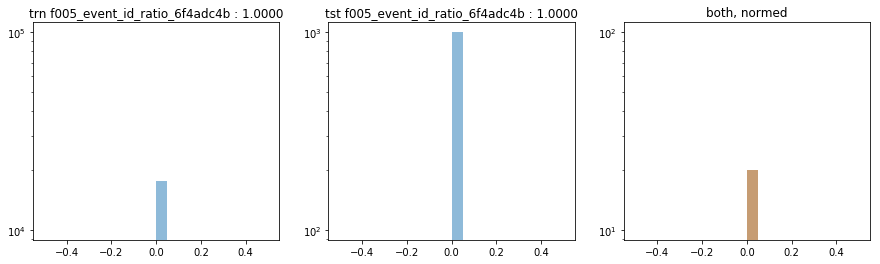

 ---------- f005_event_id_ratio_6f4bd64e ---------- 


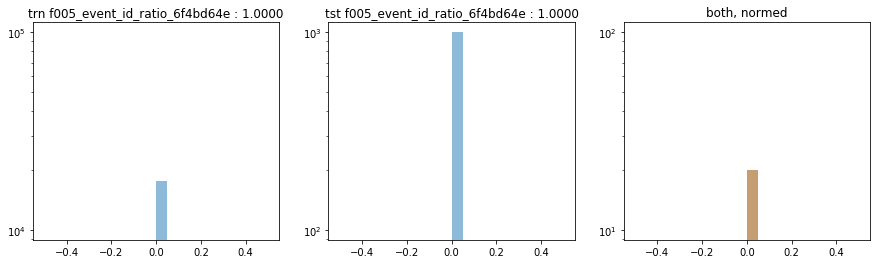

 ---------- f005_event_id_ratio_6f8106d9 ---------- 


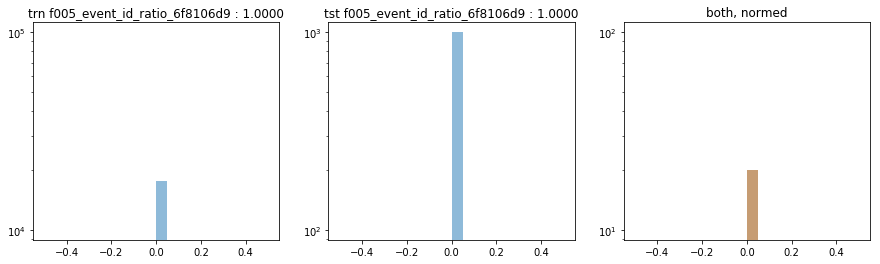

 ---------- f005_event_id_ratio_7040c096 ---------- 


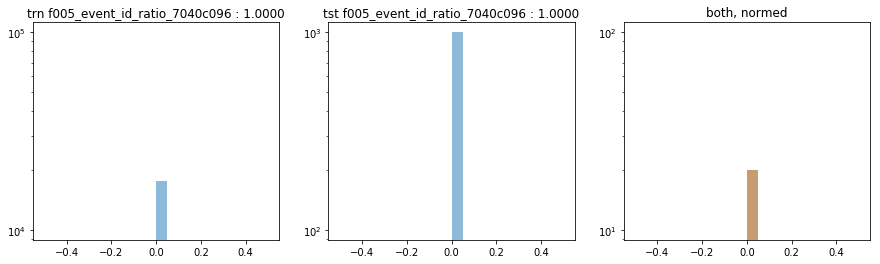

 ---------- f005_event_id_ratio_709b1251 ---------- 


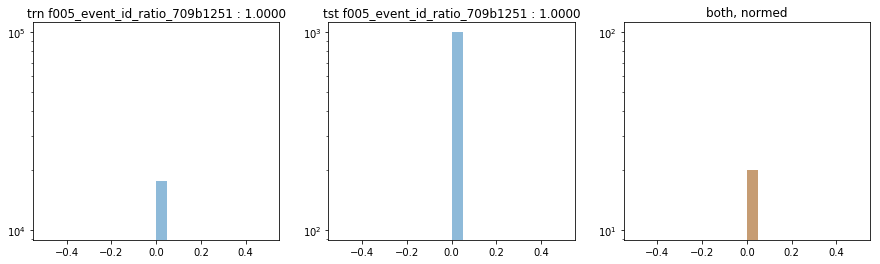

 ---------- f005_event_id_ratio_71e712d8 ---------- 


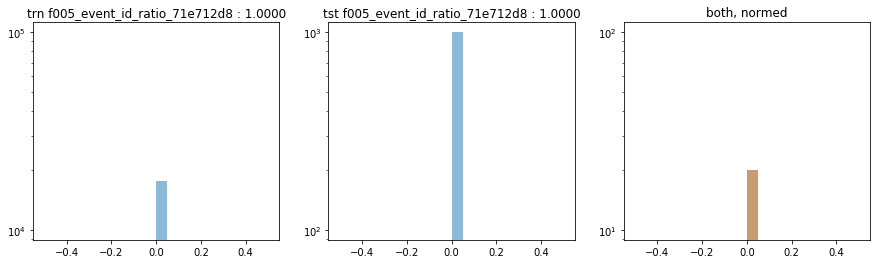

 ---------- f005_event_id_ratio_71fe8f75 ---------- 


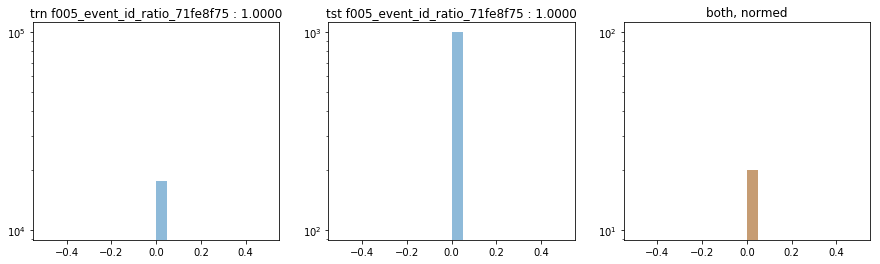

 ---------- f005_event_id_ratio_731c0cbe ---------- 


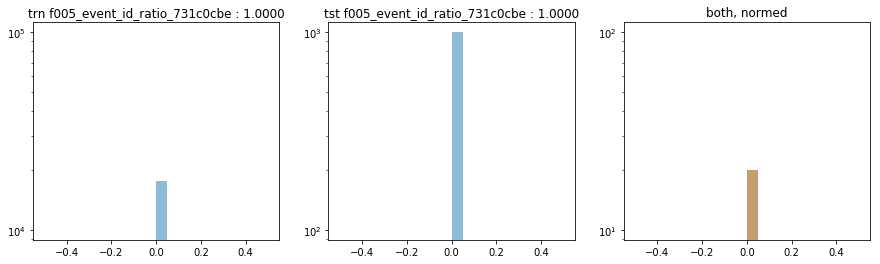

 ---------- f005_event_id_ratio_736f9581 ---------- 


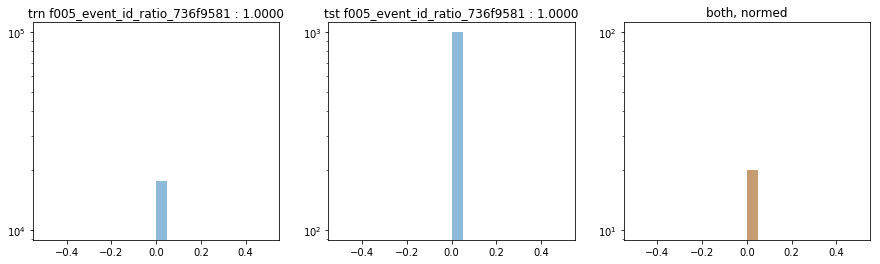

 ---------- f005_event_id_ratio_7372e1a5 ---------- 


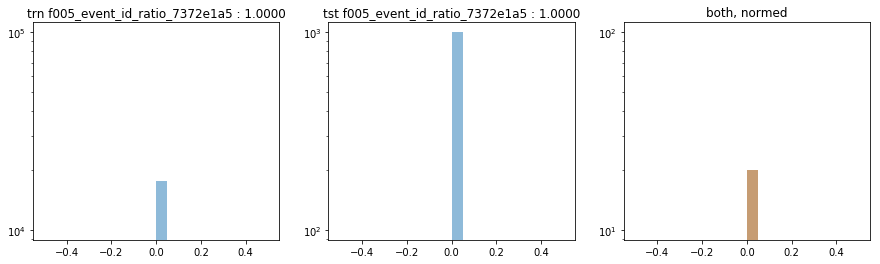

 ---------- f005_event_id_ratio_73757a5e ---------- 


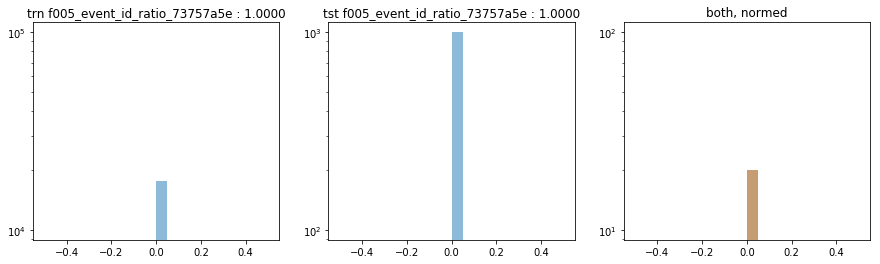

 ---------- f005_event_id_ratio_7423acbc ---------- 


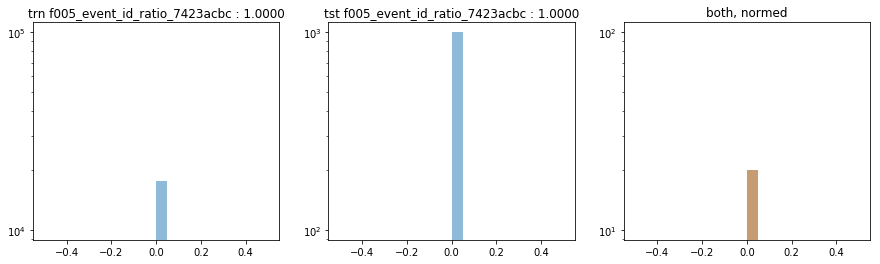

 ---------- f005_event_id_ratio_74e5f8a7 ---------- 


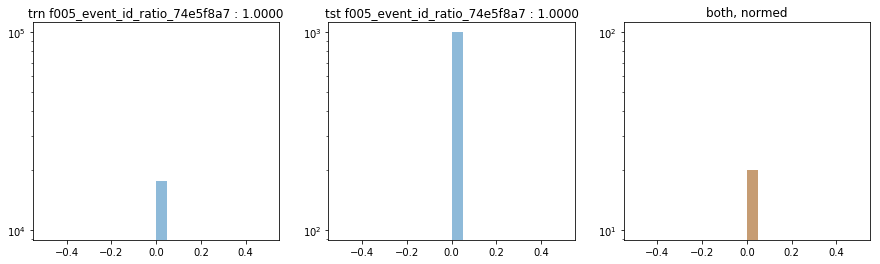

 ---------- f005_event_id_ratio_7525289a ---------- 


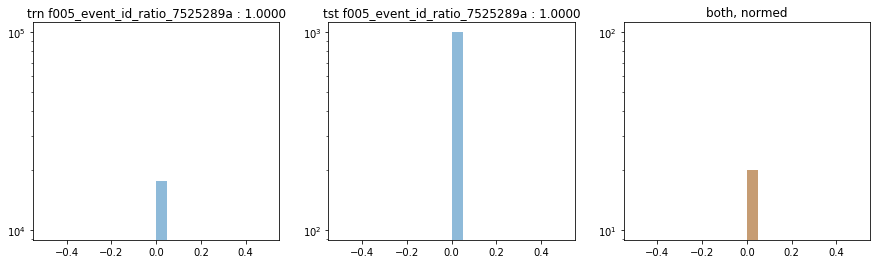

 ---------- f005_event_id_ratio_756e5507 ---------- 


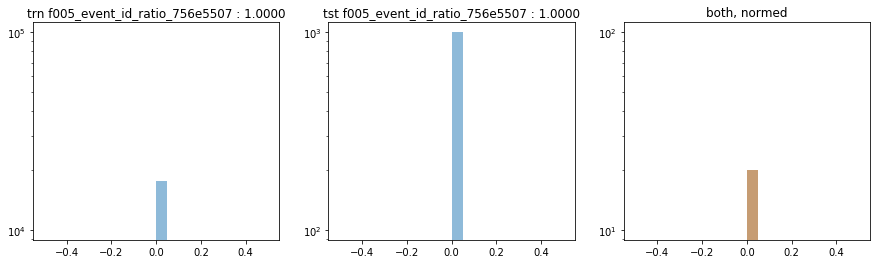

 ---------- f005_event_id_ratio_763fc34e ---------- 


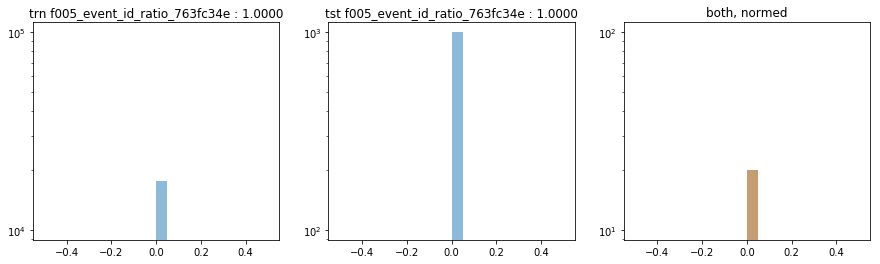

 ---------- f005_event_id_ratio_76babcde ---------- 


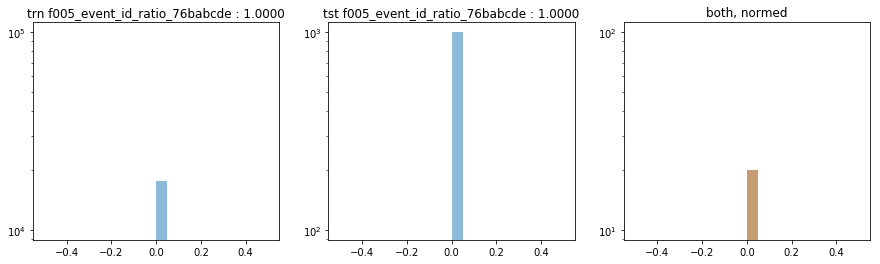

 ---------- f005_event_id_ratio_77261ab5 ---------- 


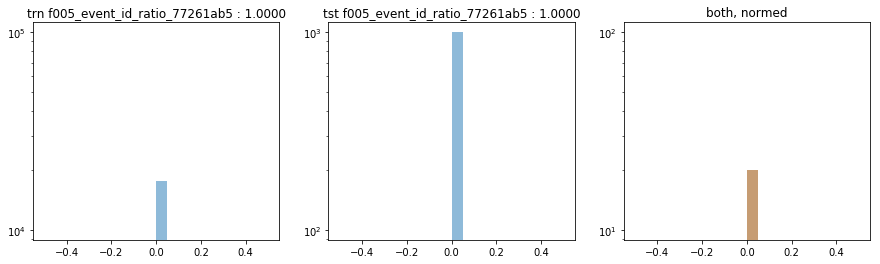

 ---------- f005_event_id_ratio_77c76bc5 ---------- 


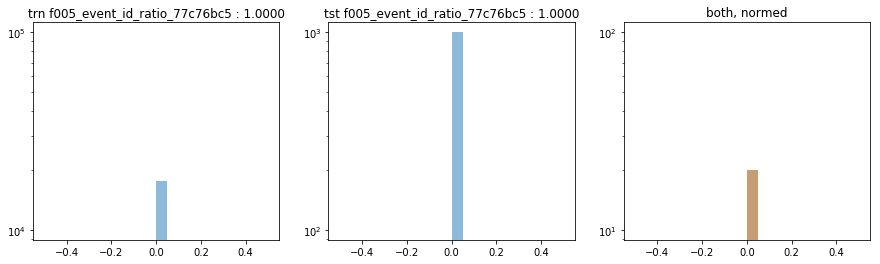

 ---------- f005_event_id_ratio_77ead60d ---------- 


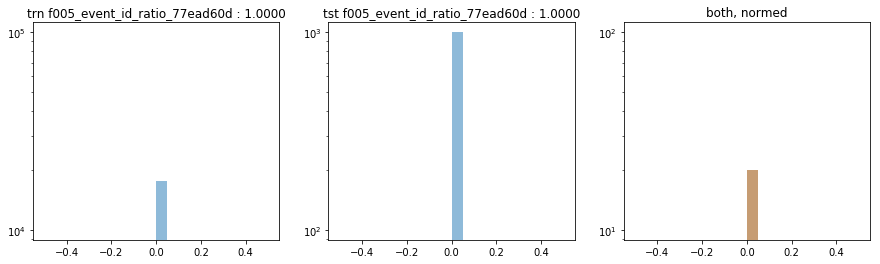

 ---------- f005_event_id_ratio_792530f8 ---------- 


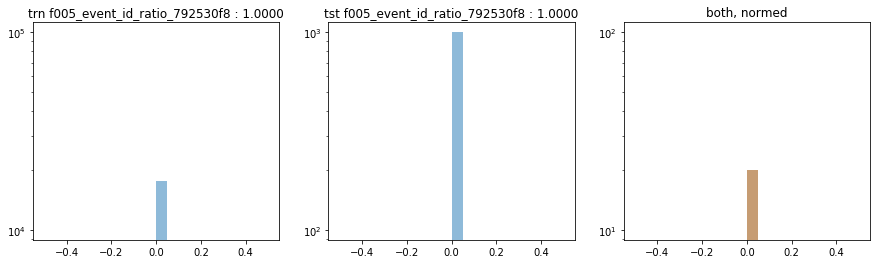

 ---------- f005_event_id_ratio_795e4a37 ---------- 


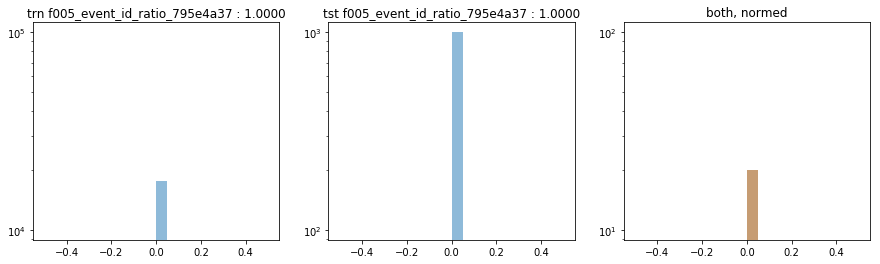

 ---------- f005_event_id_ratio_7961e599 ---------- 


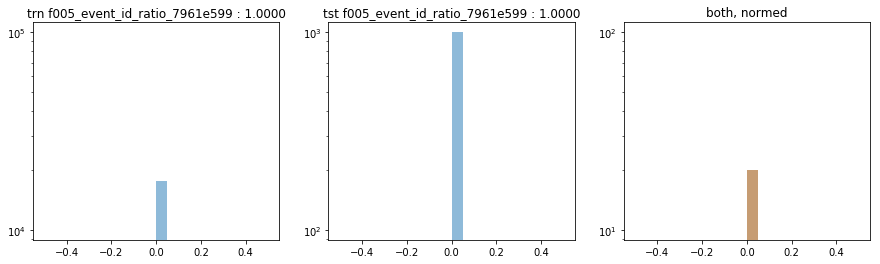

 ---------- f005_event_id_ratio_7ab78247 ---------- 


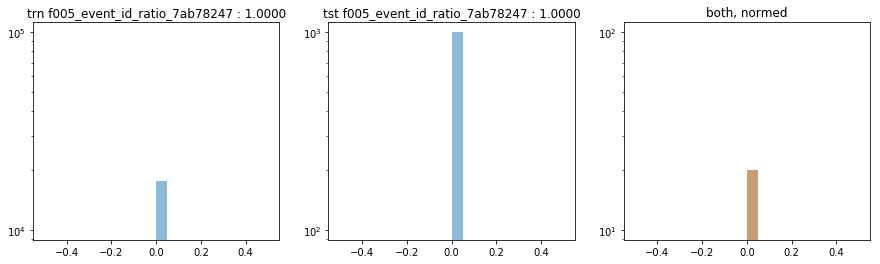

 ---------- f005_event_id_ratio_7ad3efc6 ---------- 


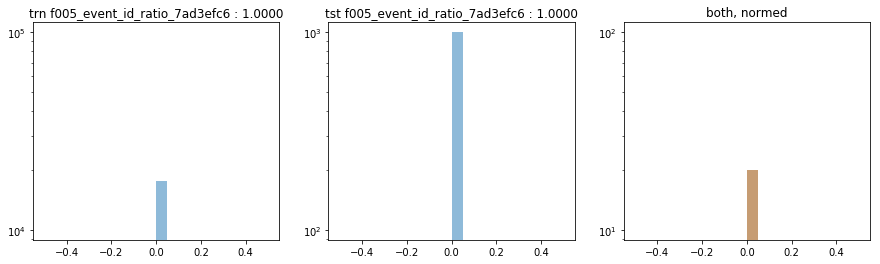

 ---------- f005_event_id_ratio_7cf1bc53 ---------- 


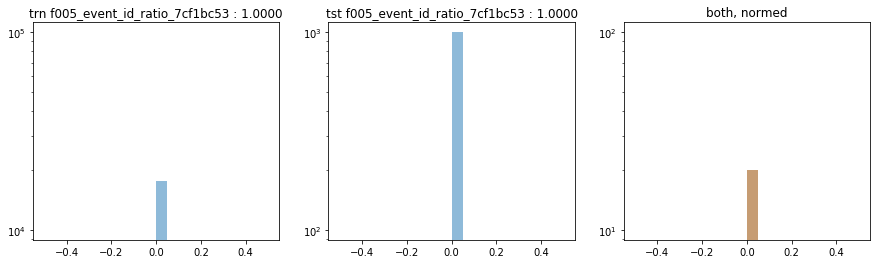

 ---------- f005_event_id_ratio_7d093bf9 ---------- 


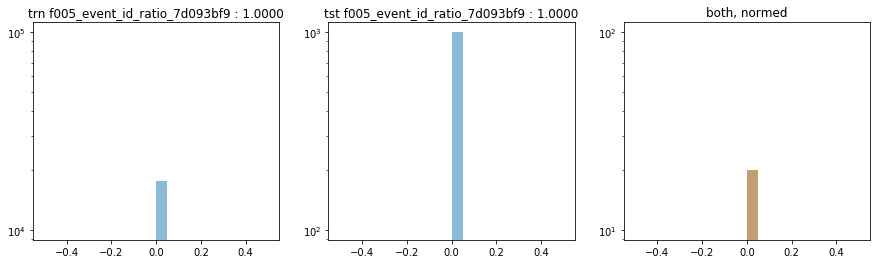

 ---------- f005_event_id_ratio_7d5c30a2 ---------- 


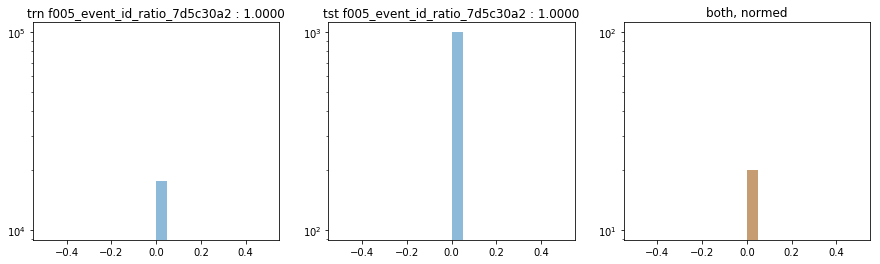

 ---------- f005_event_id_ratio_7da34a02 ---------- 


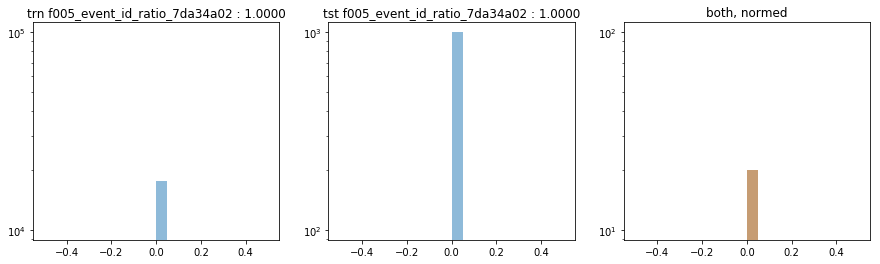

 ---------- f005_event_id_ratio_7dfe6d8a ---------- 


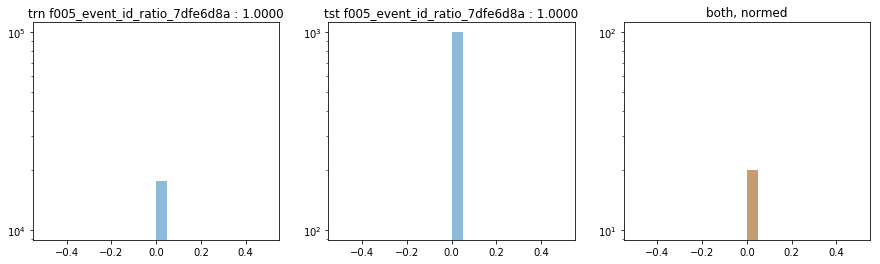

 ---------- f005_event_id_ratio_7ec0c298 ---------- 


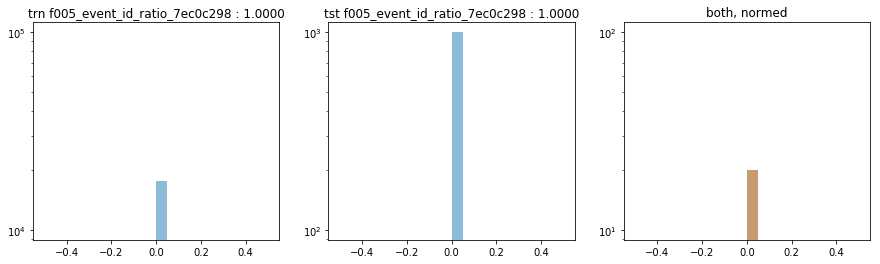

 ---------- f005_event_id_ratio_7f0836bf ---------- 


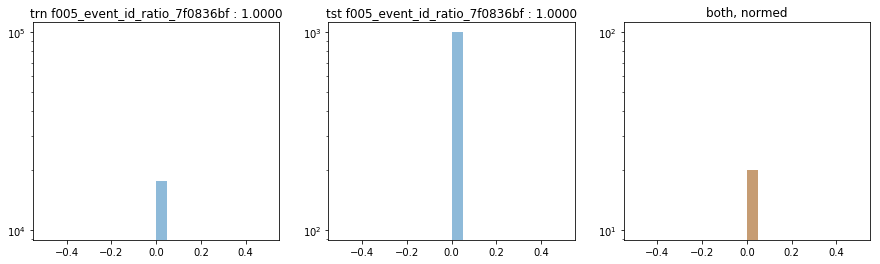

 ---------- f005_event_id_ratio_804ee27f ---------- 


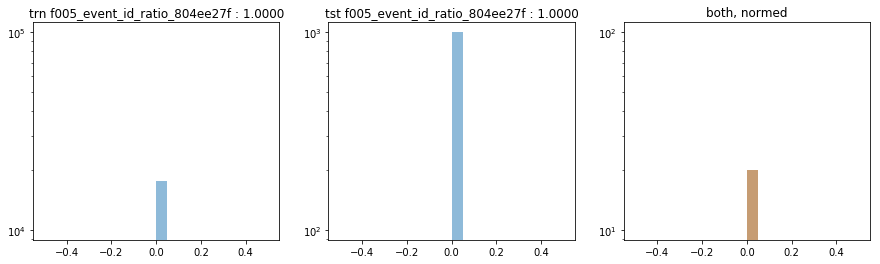

 ---------- f005_event_id_ratio_828e68f9 ---------- 


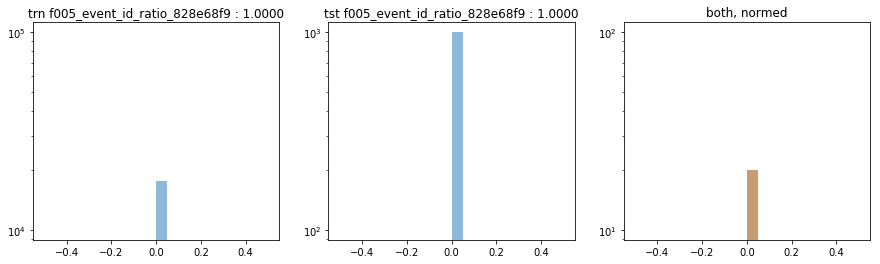

 ---------- f005_event_id_ratio_832735e1 ---------- 


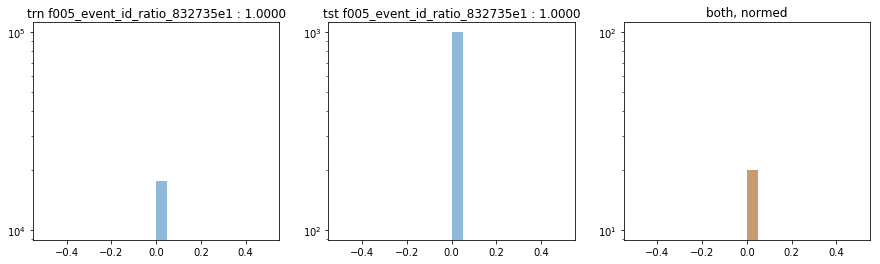

 ---------- f005_event_id_ratio_83c6c409 ---------- 


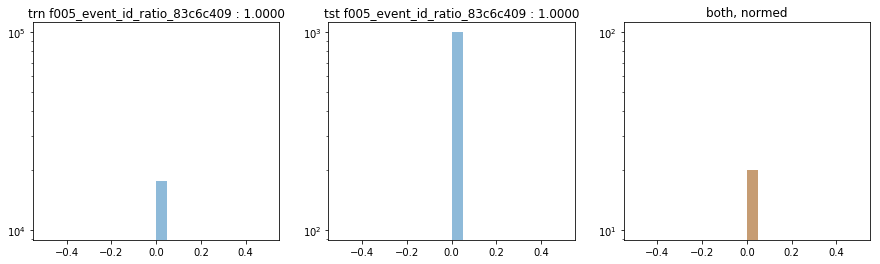

 ---------- f005_event_id_ratio_84538528 ---------- 


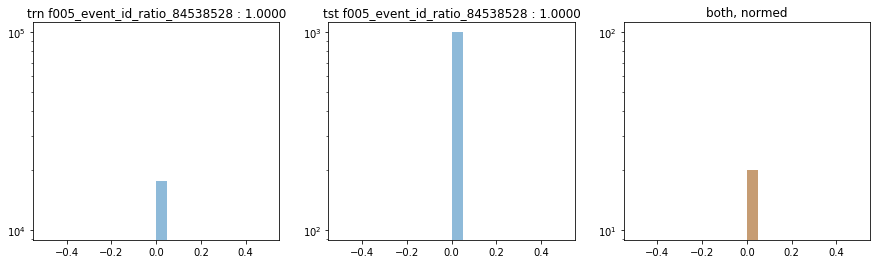

 ---------- f005_event_id_ratio_84b0e0c8 ---------- 


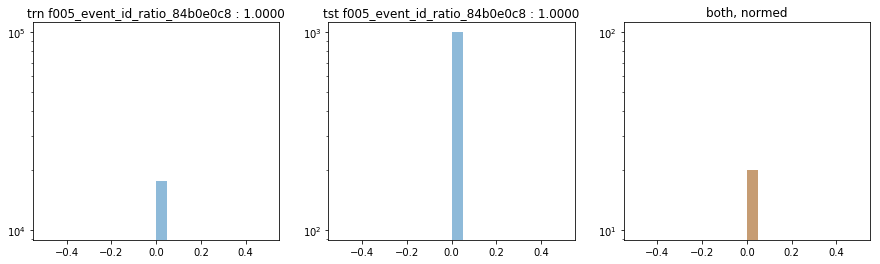

 ---------- f005_event_id_ratio_857f21c0 ---------- 


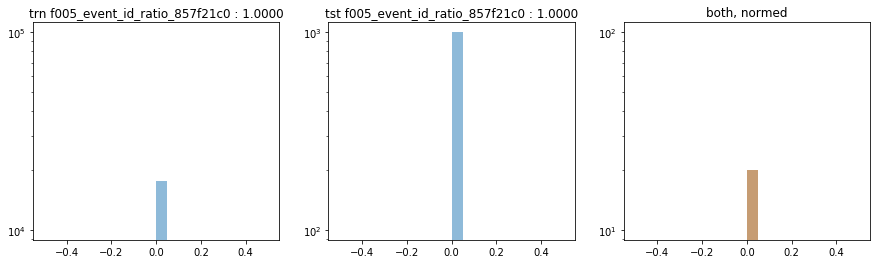

 ---------- f005_event_id_ratio_85d1b0de ---------- 


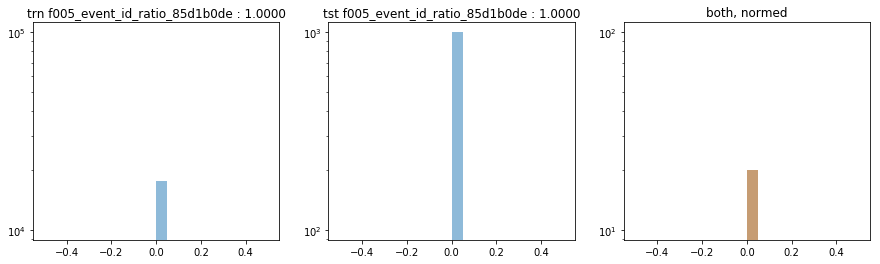

 ---------- f005_event_id_ratio_85de926c ---------- 


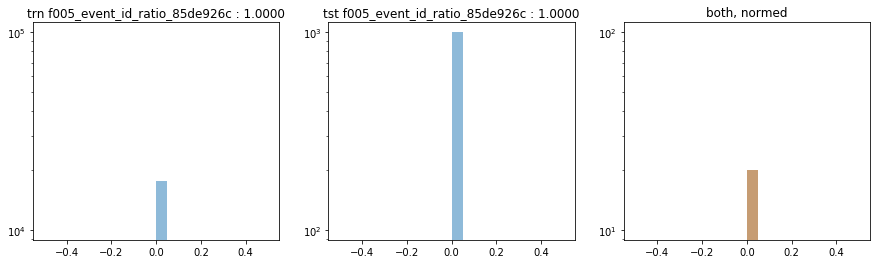

 ---------- f005_event_id_ratio_86ba578b ---------- 


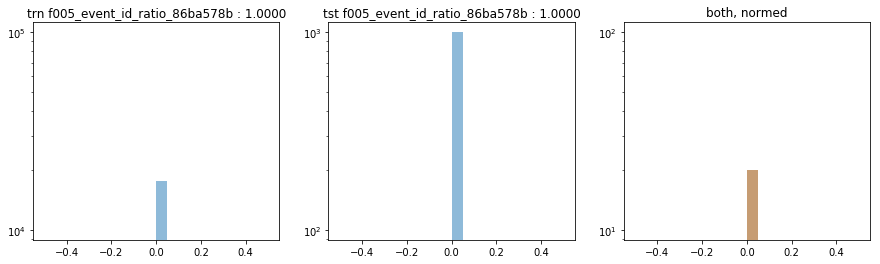

 ---------- f005_event_id_ratio_86c924c4 ---------- 


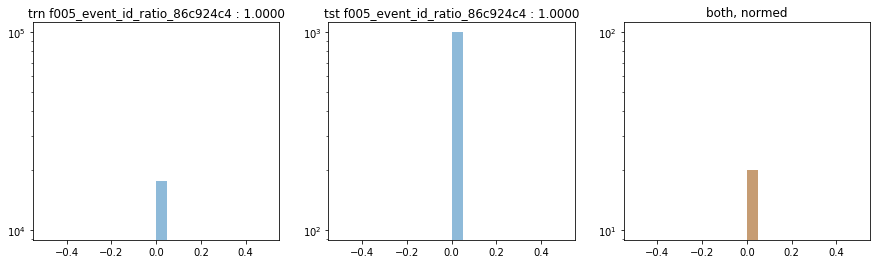

 ---------- f005_event_id_ratio_87d743c1 ---------- 


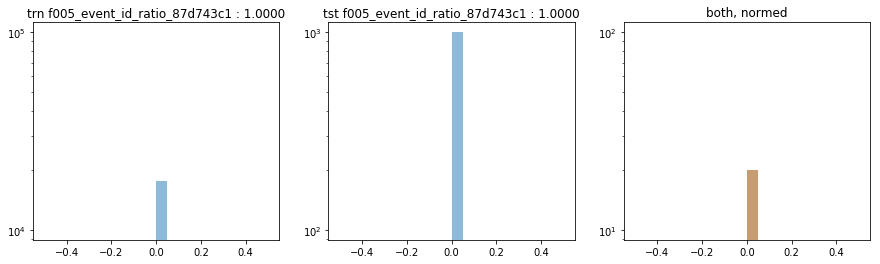

 ---------- f005_event_id_ratio_884228c8 ---------- 


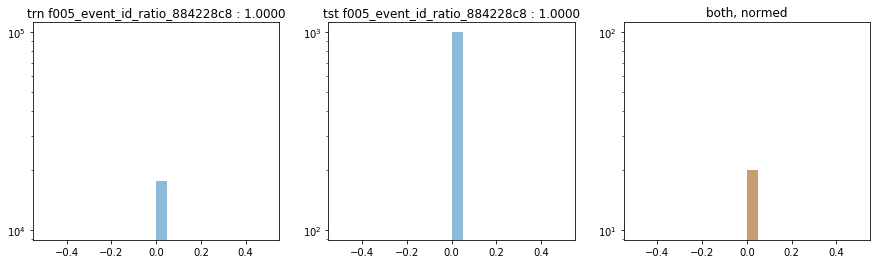

 ---------- f005_event_id_ratio_88d4a5be ---------- 


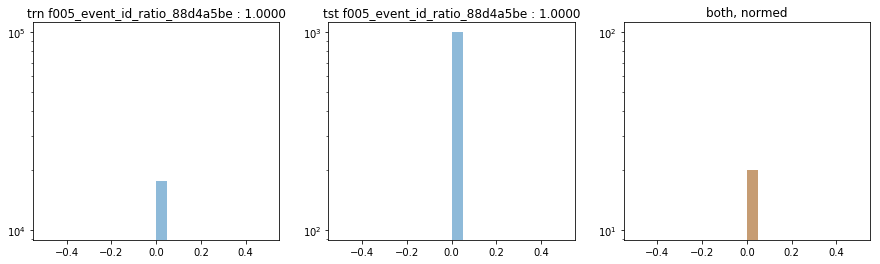

 ---------- f005_event_id_ratio_895865f3 ---------- 


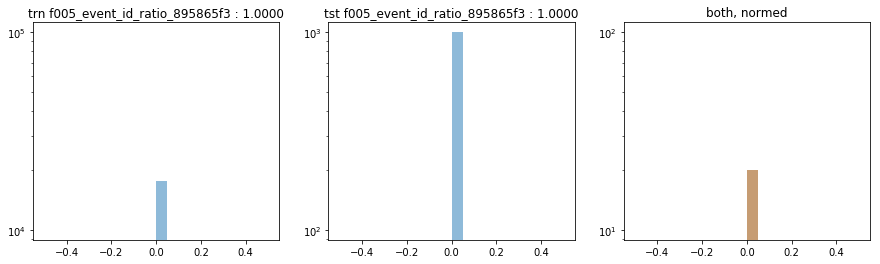

 ---------- f005_event_id_ratio_89aace00 ---------- 


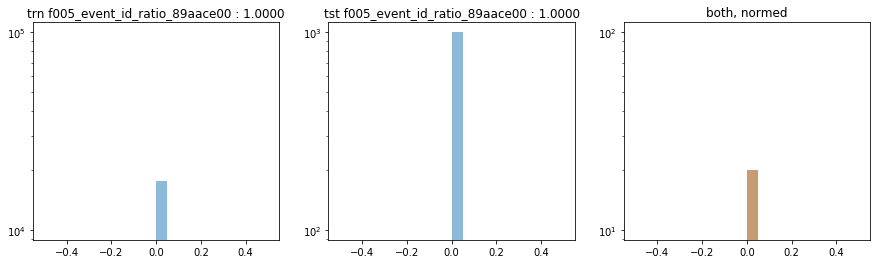

 ---------- f005_event_id_ratio_8ac7cce4 ---------- 


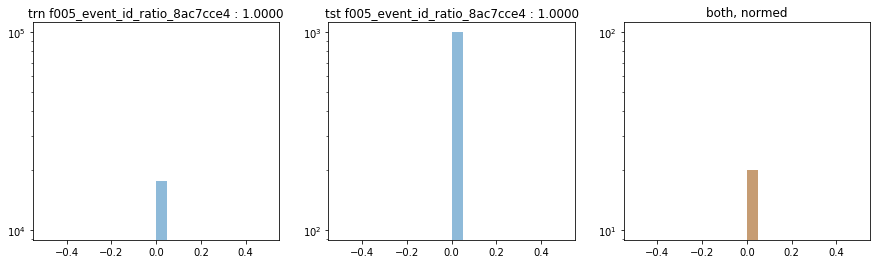

 ---------- f005_event_id_ratio_8af75982 ---------- 


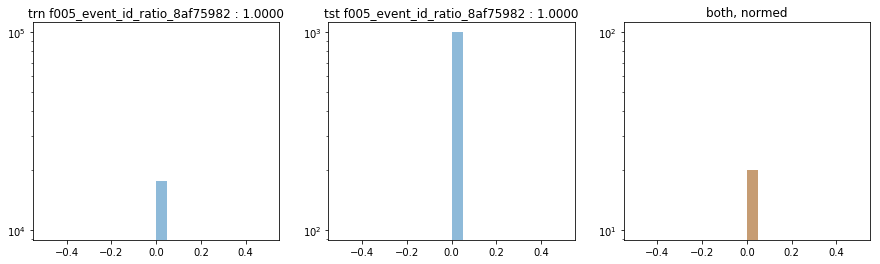

 ---------- f005_event_id_ratio_8b757ab8 ---------- 


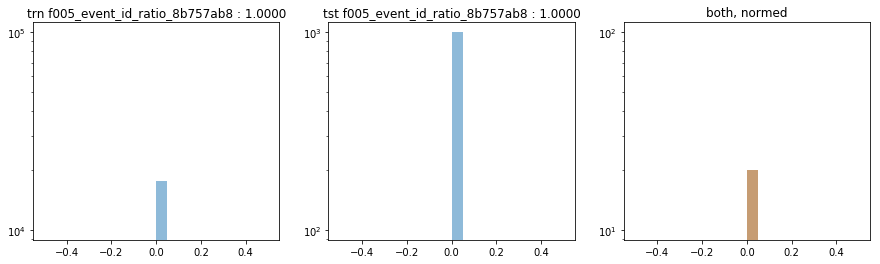

 ---------- f005_event_id_ratio_8d748b58 ---------- 


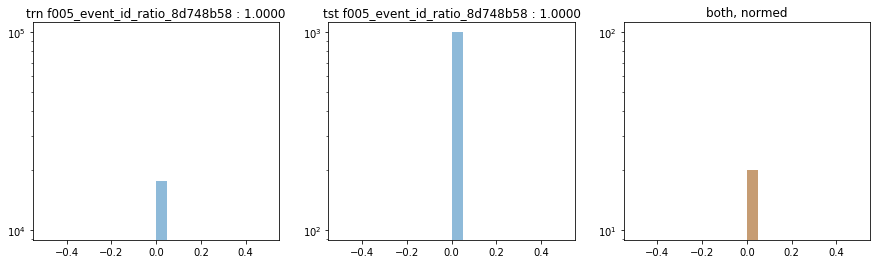

 ---------- f005_event_id_ratio_8d7e386c ---------- 


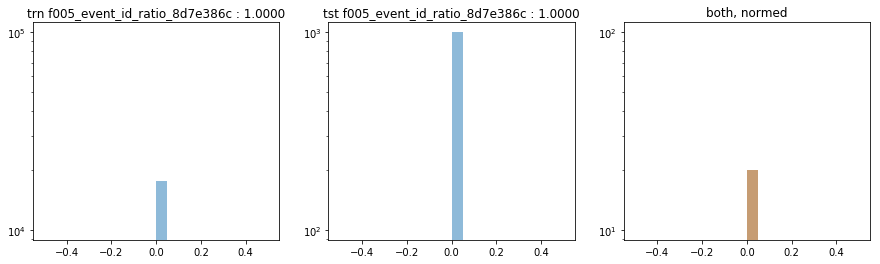

 ---------- f005_event_id_ratio_8d84fa81 ---------- 


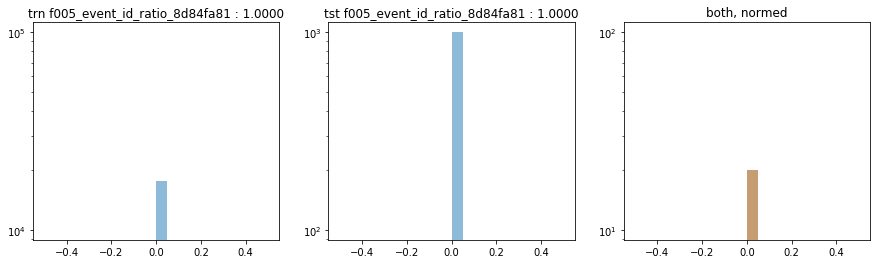

 ---------- f005_event_id_ratio_8f094001 ---------- 


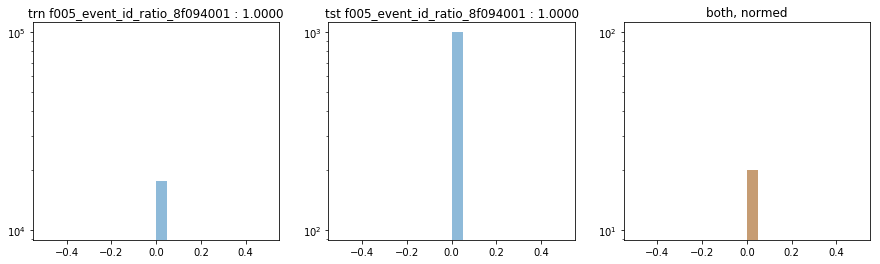

 ---------- f005_event_id_ratio_8fee50e2 ---------- 


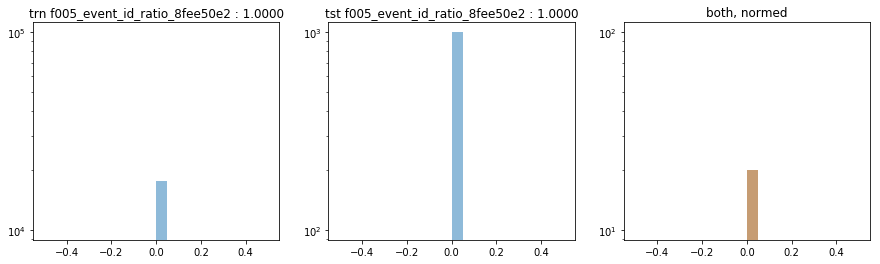

 ---------- f005_event_id_ratio_907a054b ---------- 


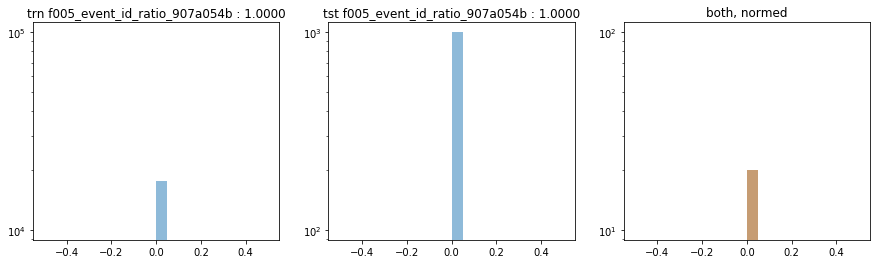

 ---------- f005_event_id_ratio_90d848e0 ---------- 


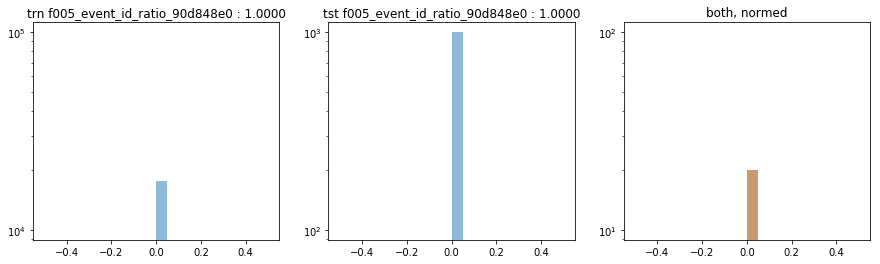

 ---------- f005_event_id_ratio_90ea0bac ---------- 


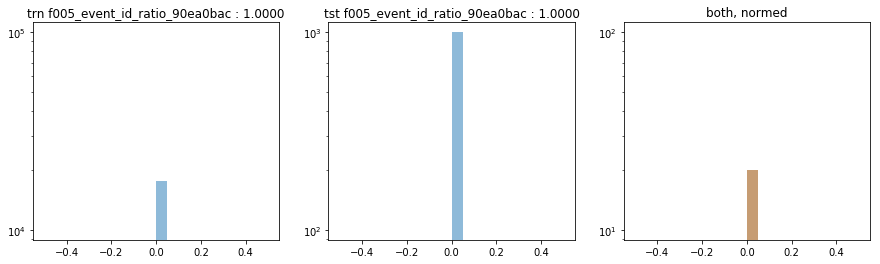

 ---------- f005_event_id_ratio_90efca10 ---------- 


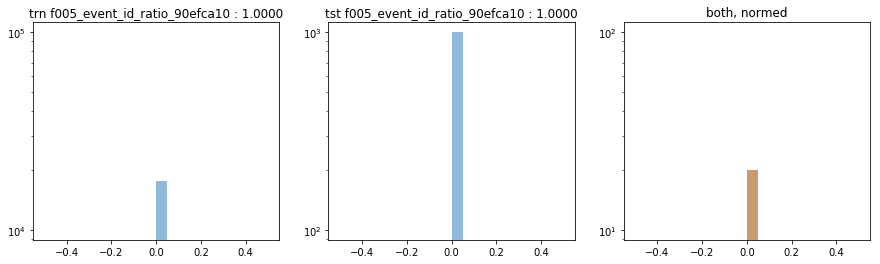

 ---------- f005_event_id_ratio_91561152 ---------- 


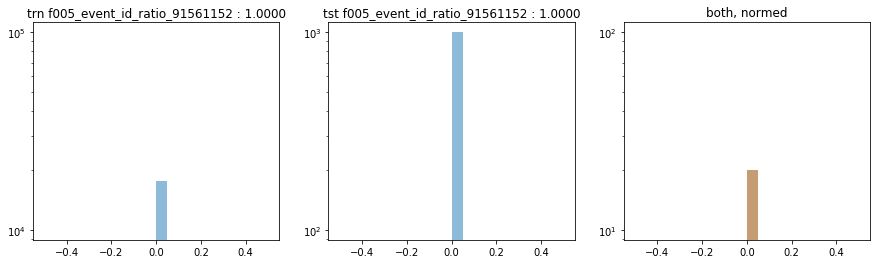

 ---------- f005_event_id_ratio_923afab1 ---------- 


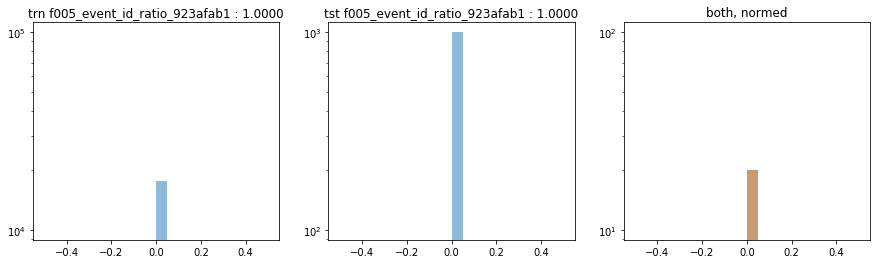

 ---------- f005_event_id_ratio_92687c59 ---------- 


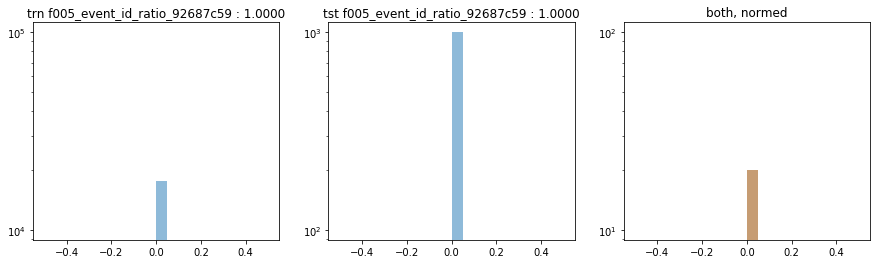

 ---------- f005_event_id_ratio_93b353f2 ---------- 


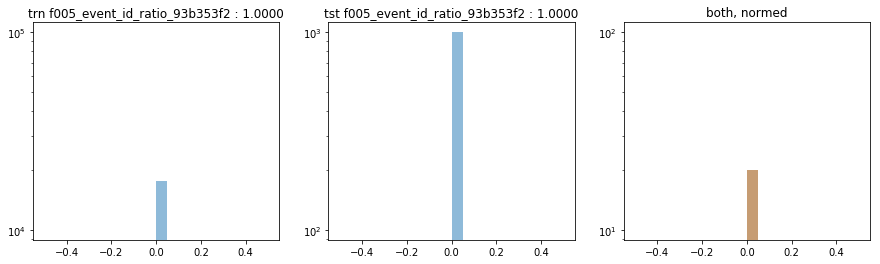

 ---------- f005_event_id_ratio_93edfe2e ---------- 


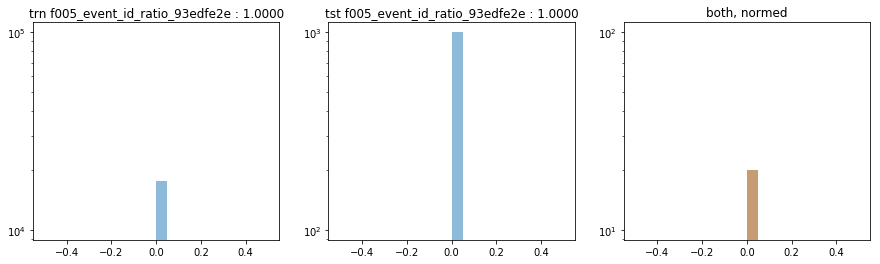

 ---------- f005_event_id_ratio_9554a50b ---------- 


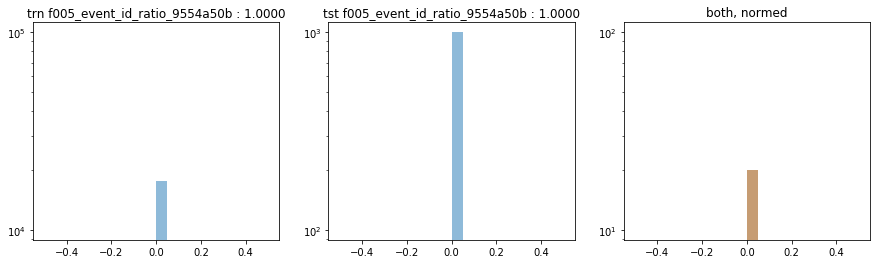

 ---------- f005_event_id_ratio_99abe2bb ---------- 


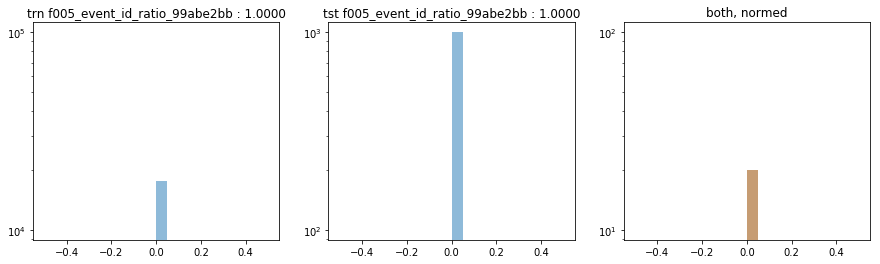

 ---------- f005_event_id_ratio_99ea62f3 ---------- 


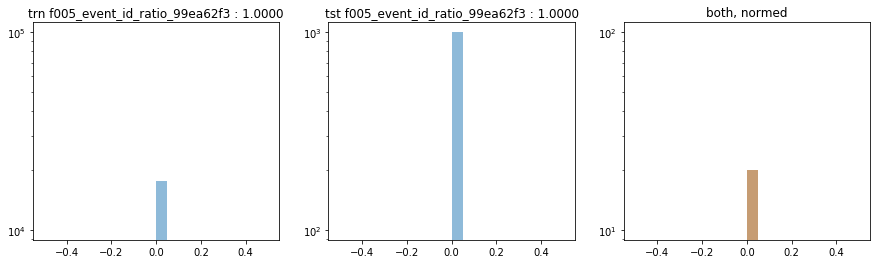

 ---------- f005_event_id_ratio_9b01374f ---------- 


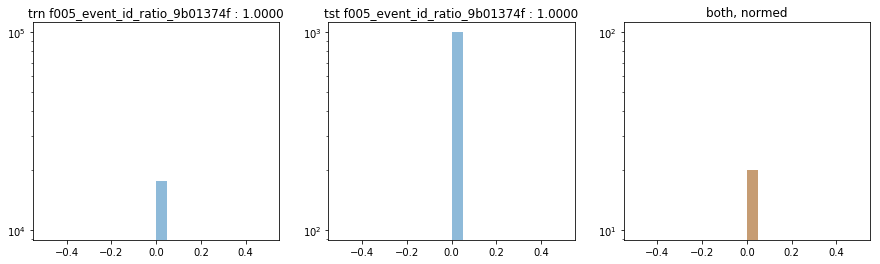

 ---------- f005_event_id_ratio_9b23e8ee ---------- 


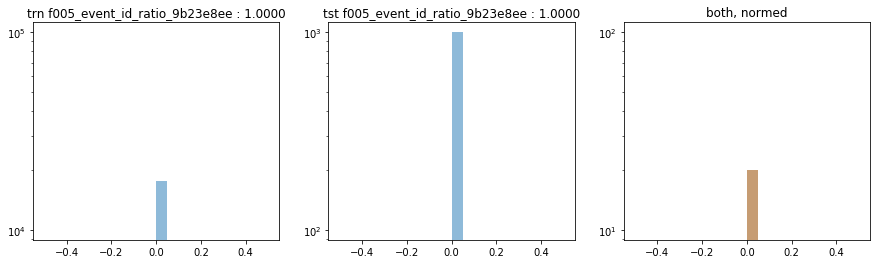

 ---------- f005_event_id_ratio_9b4001e4 ---------- 


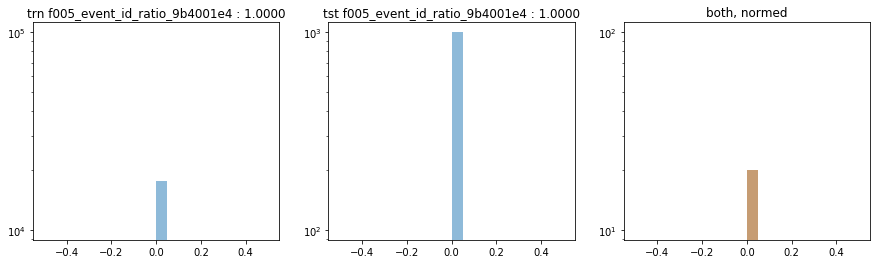

 ---------- f005_event_id_ratio_9c5ef70c ---------- 


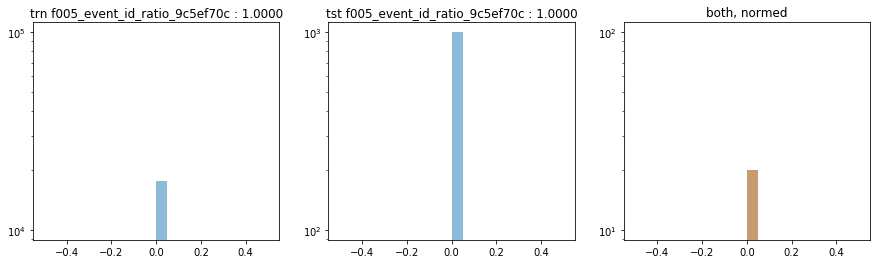

 ---------- f005_event_id_ratio_9ce586dd ---------- 


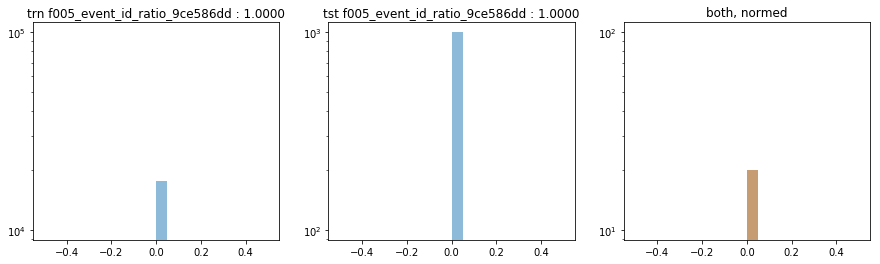

 ---------- f005_event_id_ratio_9d29771f ---------- 


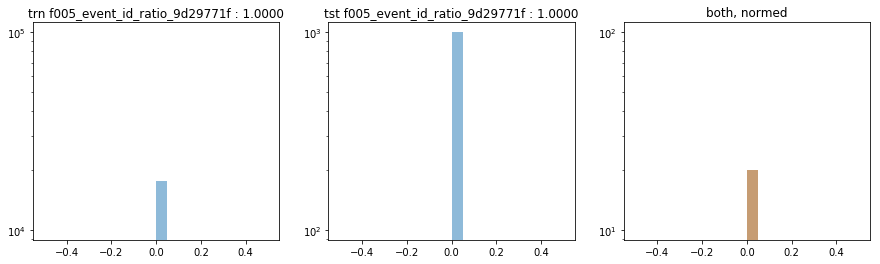

 ---------- f005_event_id_ratio_9d4e7b25 ---------- 


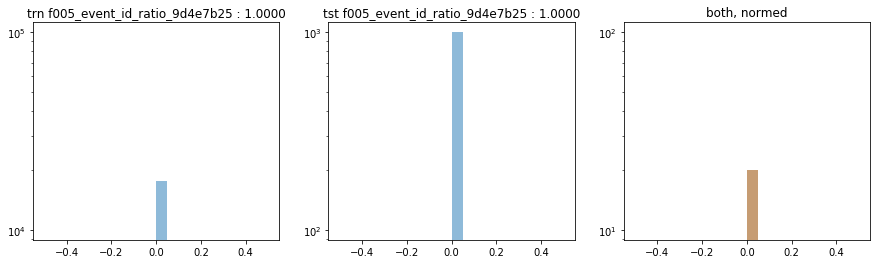

 ---------- f005_event_id_ratio_9de5e594 ---------- 


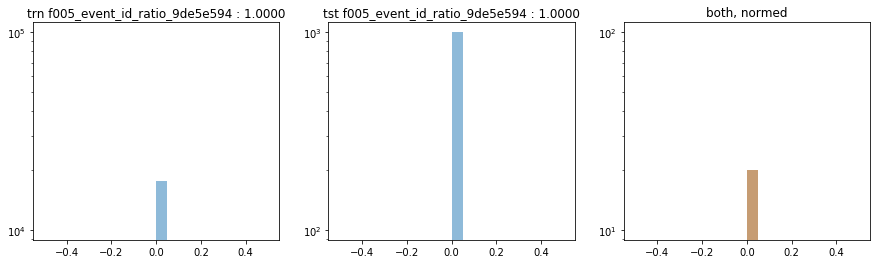

 ---------- f005_event_id_ratio_9e34ea74 ---------- 


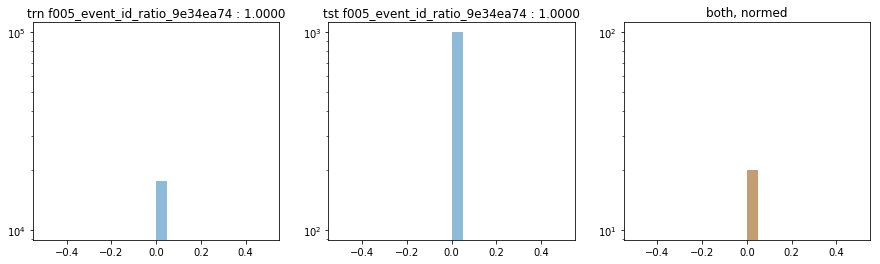

 ---------- f005_event_id_ratio_9e4c8c7b ---------- 


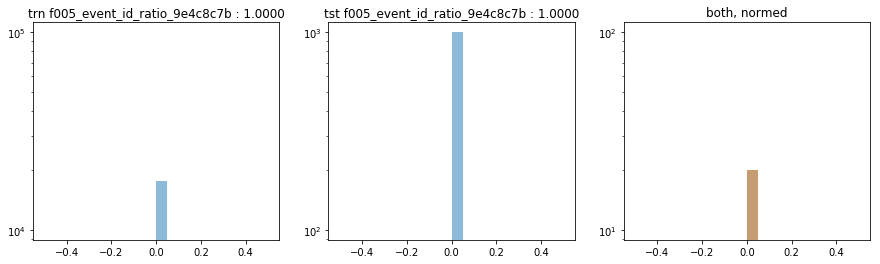

 ---------- f005_event_id_ratio_9e6b7fb5 ---------- 


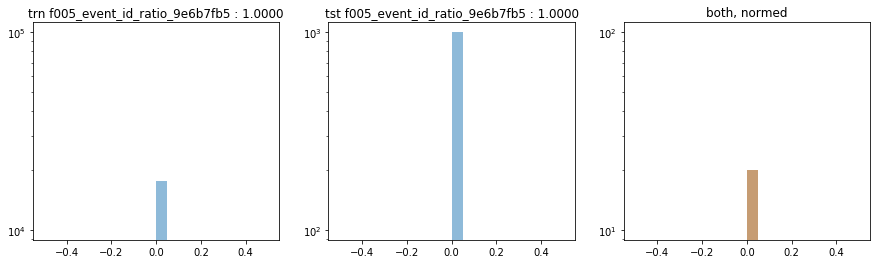

 ---------- f005_event_id_ratio_9ed8f6da ---------- 


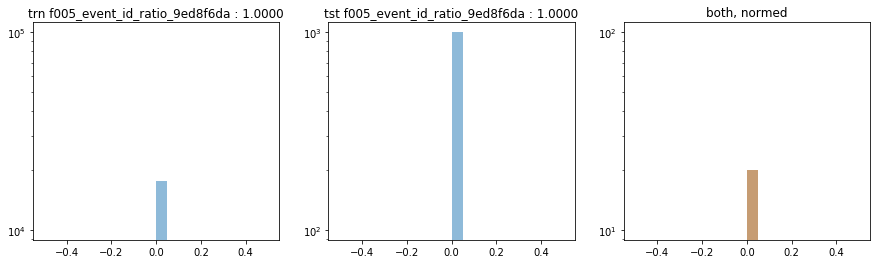

 ---------- f005_event_id_ratio_9ee1c98c ---------- 


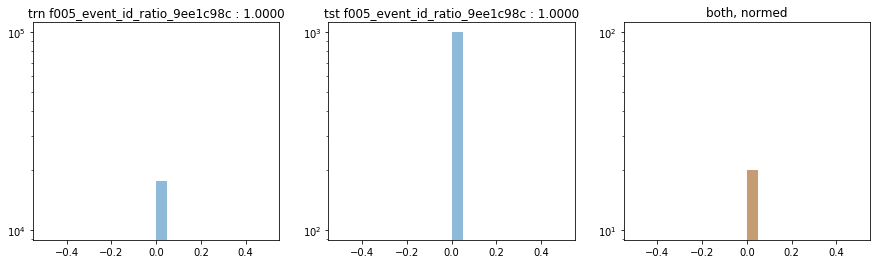

 ---------- f005_event_id_ratio_a0faea5d ---------- 


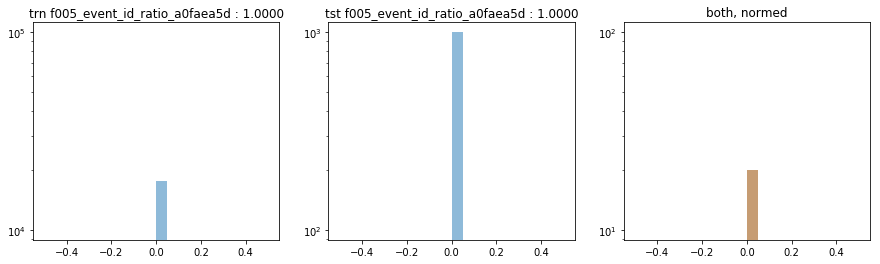

 ---------- f005_event_id_ratio_a1192f43 ---------- 


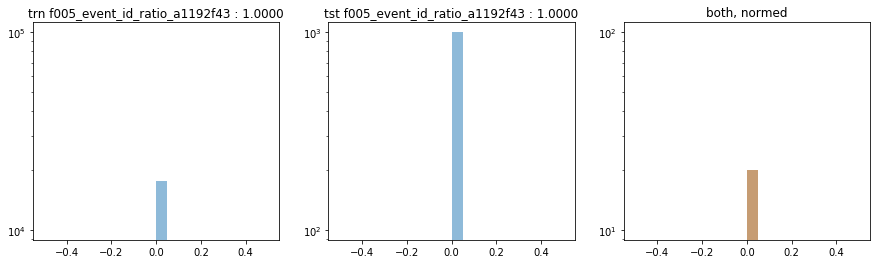

 ---------- f005_event_id_ratio_a16a373e ---------- 


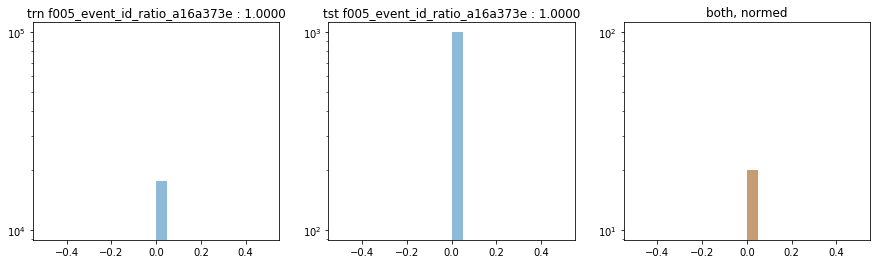

 ---------- f005_event_id_ratio_a1bbe385 ---------- 


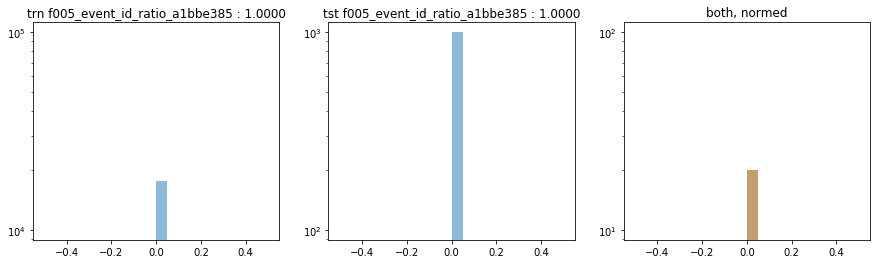

 ---------- f005_event_id_ratio_a1e4395d ---------- 


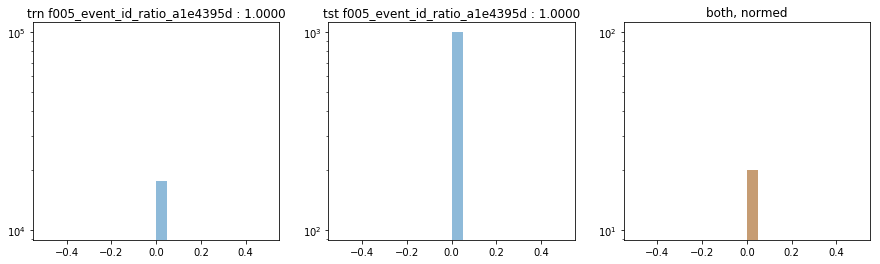

 ---------- f005_event_id_ratio_a29c5338 ---------- 


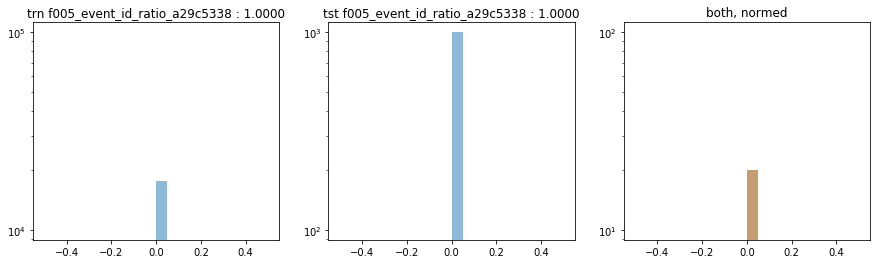

 ---------- f005_event_id_ratio_a2df0760 ---------- 


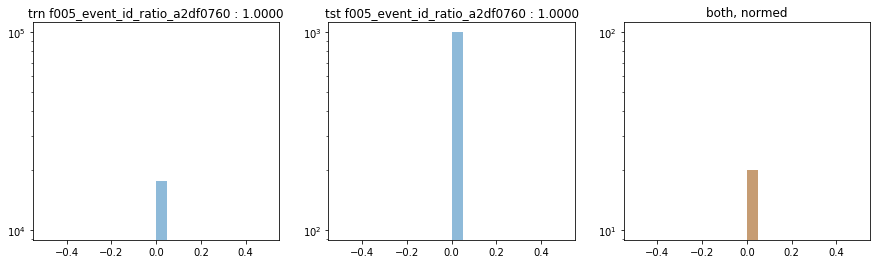

 ---------- f005_event_id_ratio_a44b10dc ---------- 


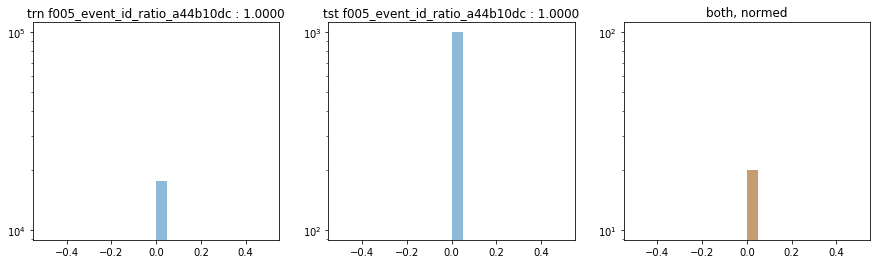

 ---------- f005_event_id_ratio_a52b92d5 ---------- 


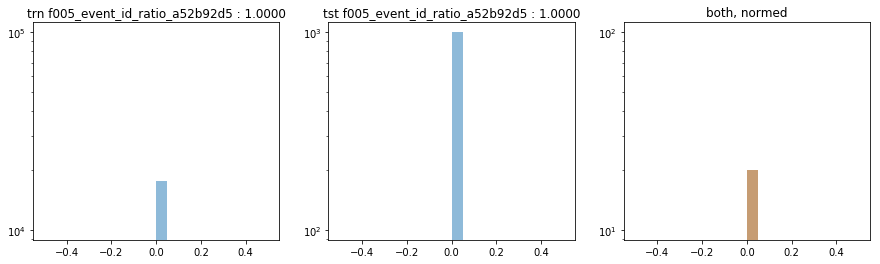

 ---------- f005_event_id_ratio_a592d54e ---------- 


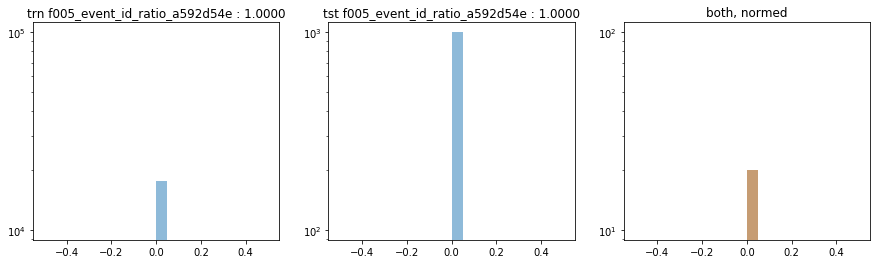

 ---------- f005_event_id_ratio_a5be6304 ---------- 


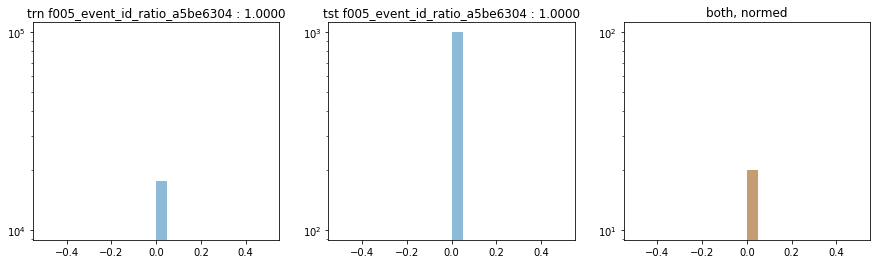

 ---------- f005_event_id_ratio_a5e9da97 ---------- 


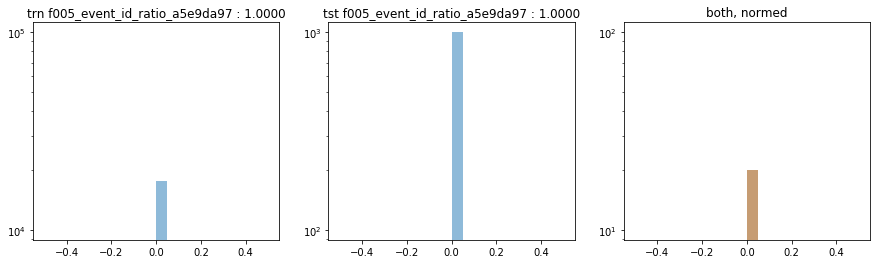

 ---------- f005_event_id_ratio_a6d66e51 ---------- 


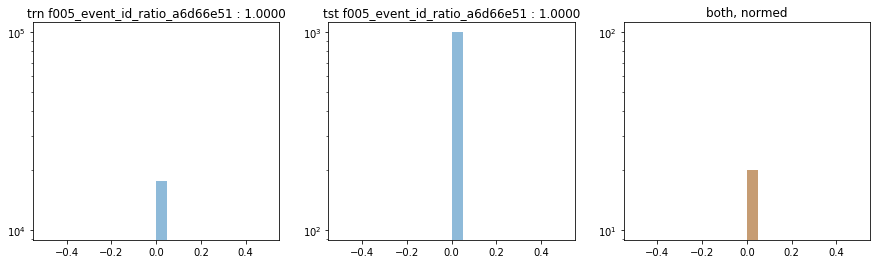

 ---------- f005_event_id_ratio_a76029ee ---------- 


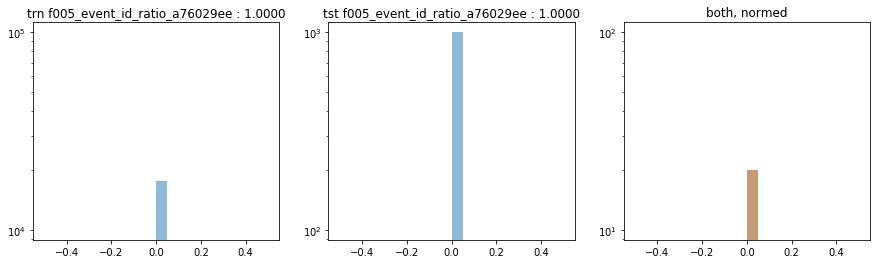

 ---------- f005_event_id_ratio_a7640a16 ---------- 


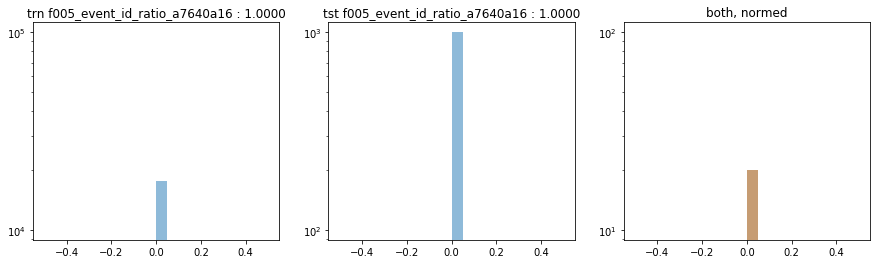

 ---------- f005_event_id_ratio_a8876db3 ---------- 


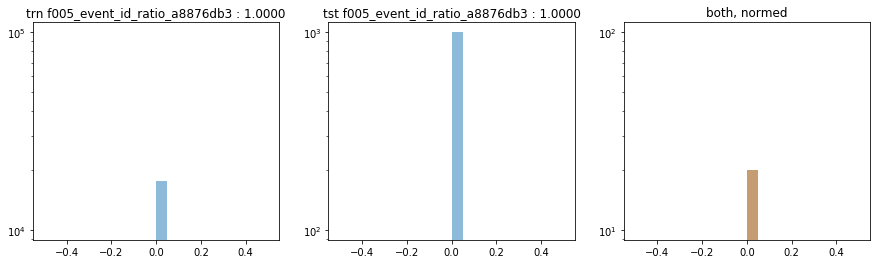

 ---------- f005_event_id_ratio_a8a78786 ---------- 


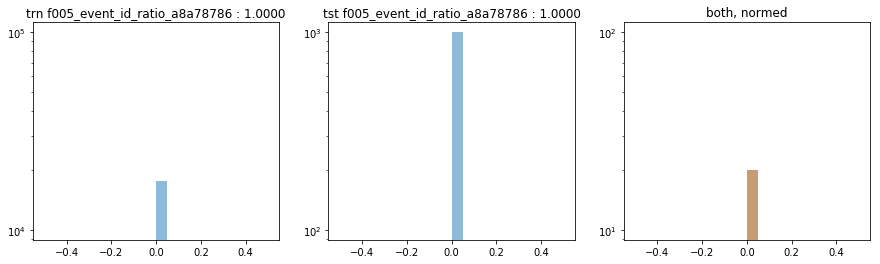

 ---------- f005_event_id_ratio_a8efe47b ---------- 


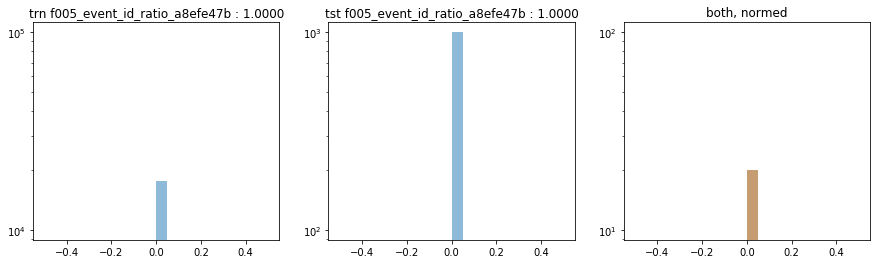

 ---------- f005_event_id_ratio_ab3136ba ---------- 


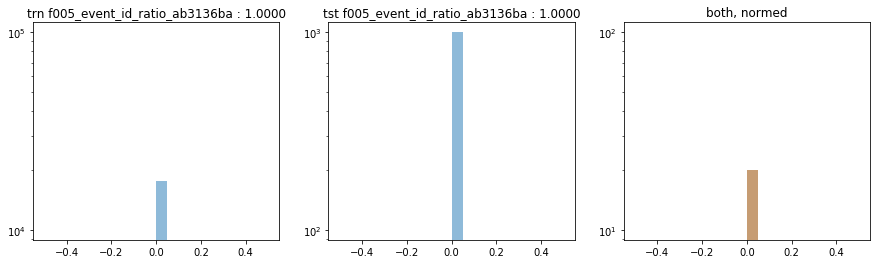

 ---------- f005_event_id_ratio_abc5811c ---------- 


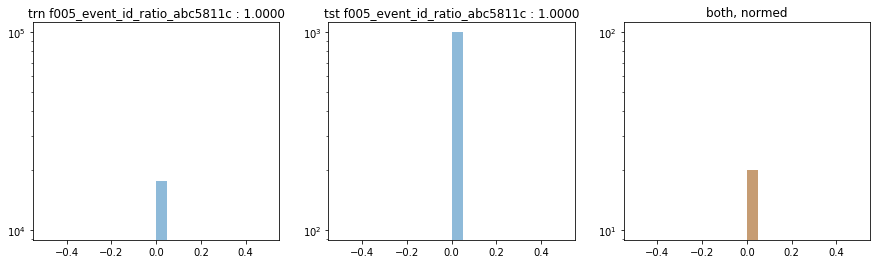

 ---------- f005_event_id_ratio_ac92046e ---------- 


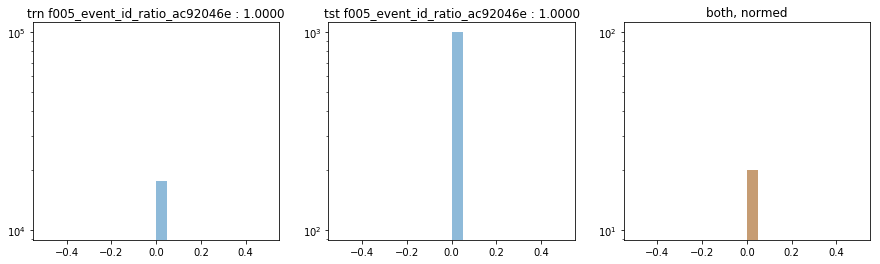

 ---------- f005_event_id_ratio_acf5c23f ---------- 


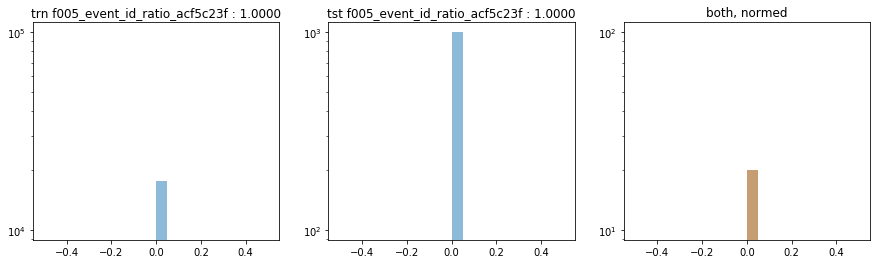

 ---------- f005_event_id_ratio_ad148f58 ---------- 


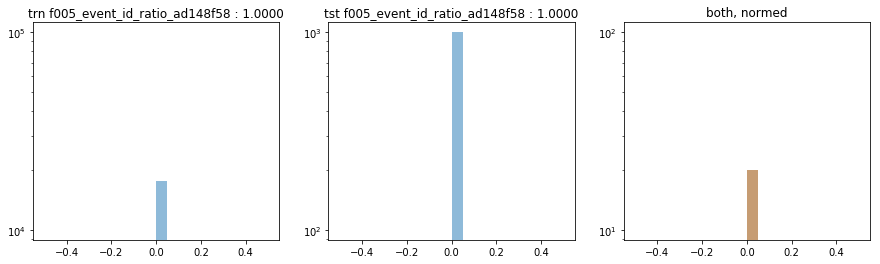

 ---------- f005_event_id_ratio_ad2fc29c ---------- 


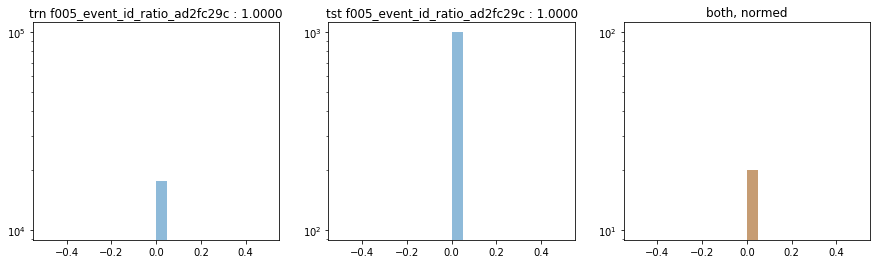

 ---------- f005_event_id_ratio_b012cd7f ---------- 


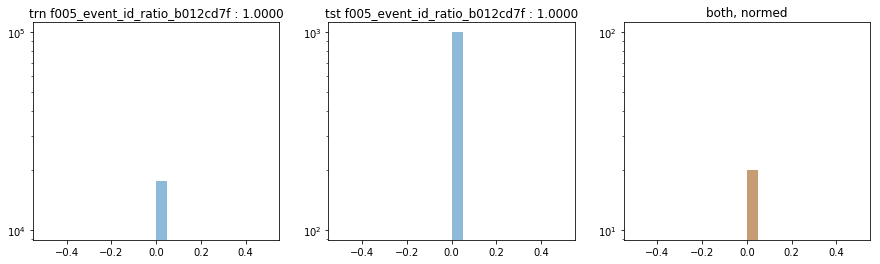

 ---------- f005_event_id_ratio_b120f2ac ---------- 


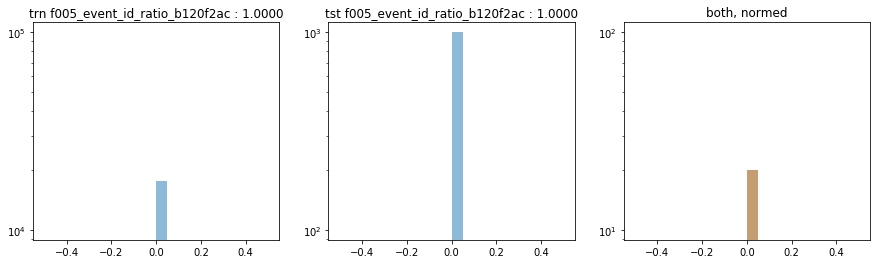

 ---------- f005_event_id_ratio_b1d5101d ---------- 


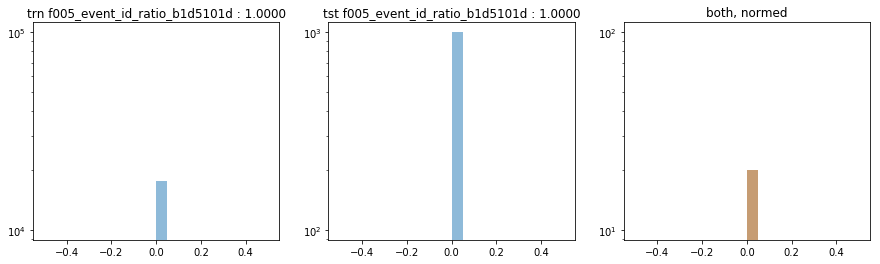

 ---------- f005_event_id_ratio_b2dba42b ---------- 


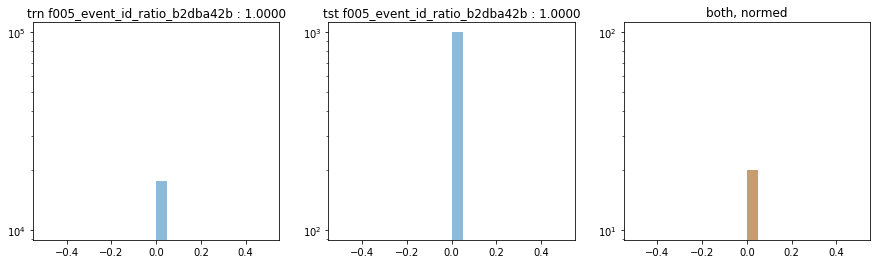

 ---------- f005_event_id_ratio_b2e5b0f1 ---------- 


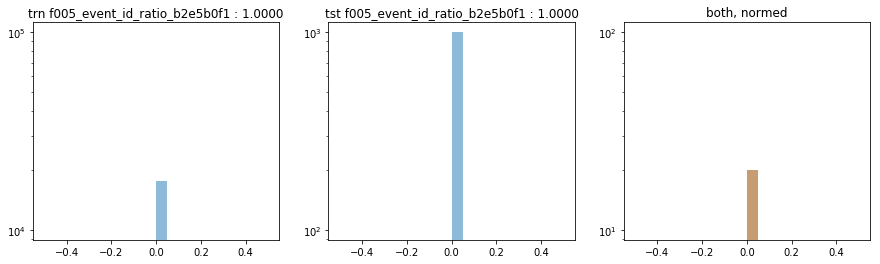

 ---------- f005_event_id_ratio_b5053438 ---------- 


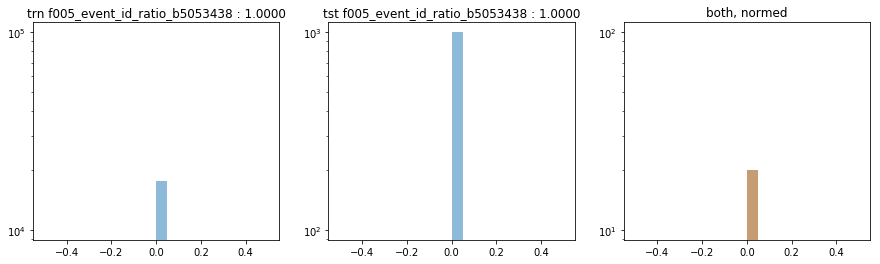

 ---------- f005_event_id_ratio_b74258a0 ---------- 


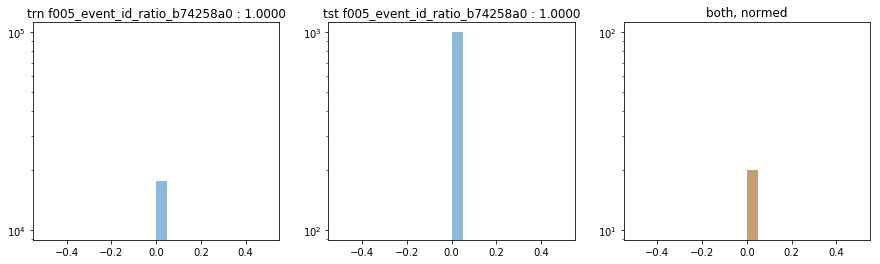

 ---------- f005_event_id_ratio_b7530680 ---------- 


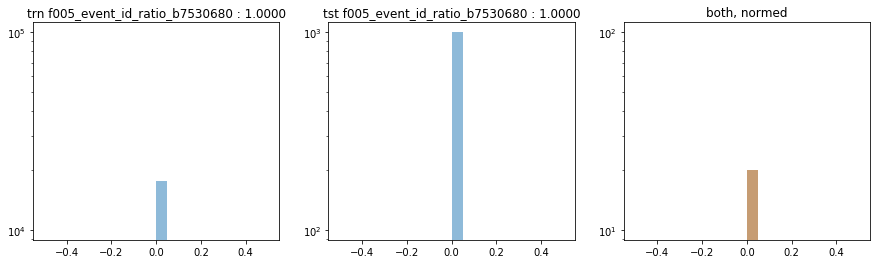

 ---------- f005_event_id_ratio_b7dc8128 ---------- 


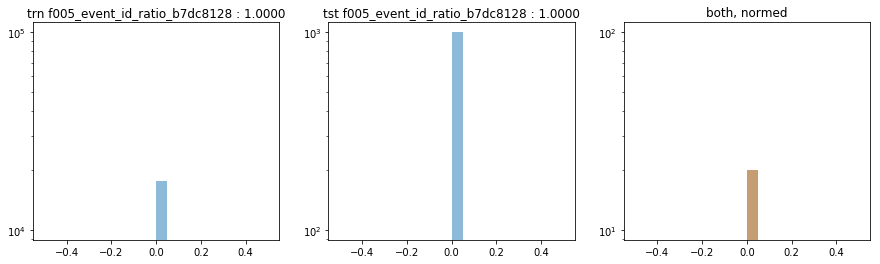

 ---------- f005_event_id_ratio_b80e5e84 ---------- 


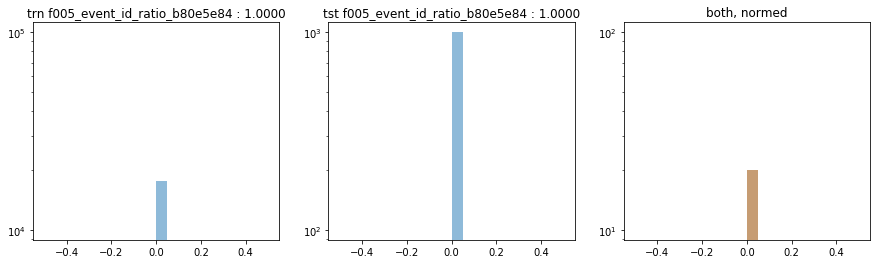

 ---------- f005_event_id_ratio_b88f38da ---------- 


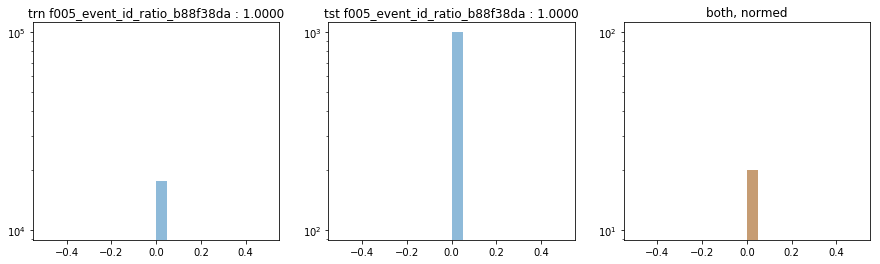

 ---------- f005_event_id_ratio_bb3e370b ---------- 


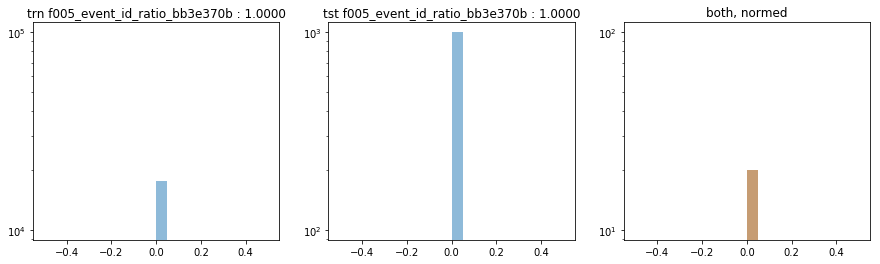

 ---------- f005_event_id_ratio_bbfe0445 ---------- 


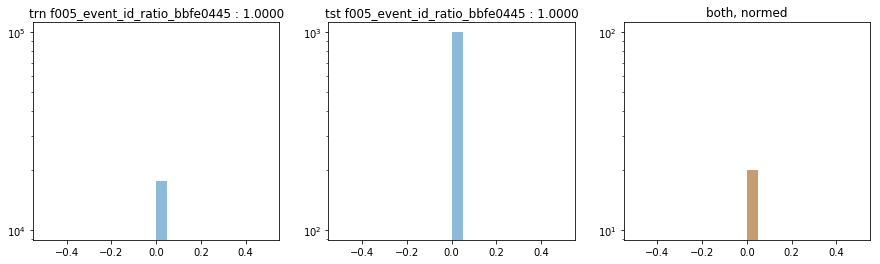

 ---------- f005_event_id_ratio_bc8f2793 ---------- 


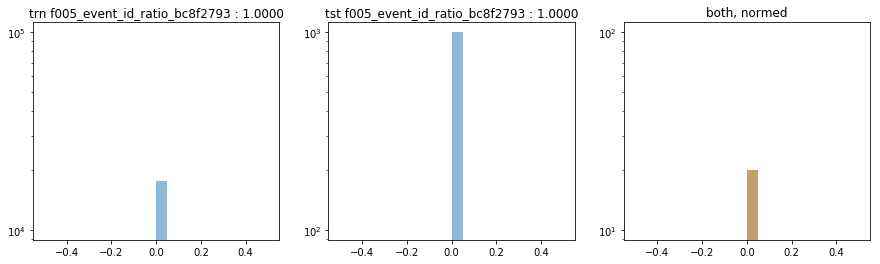

 ---------- f005_event_id_ratio_bcceccc6 ---------- 


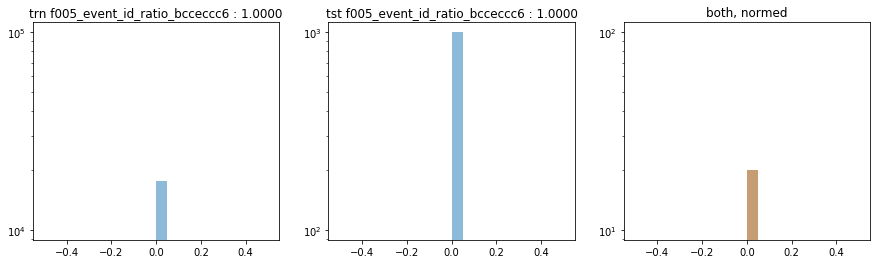

 ---------- f005_event_id_ratio_bd612267 ---------- 


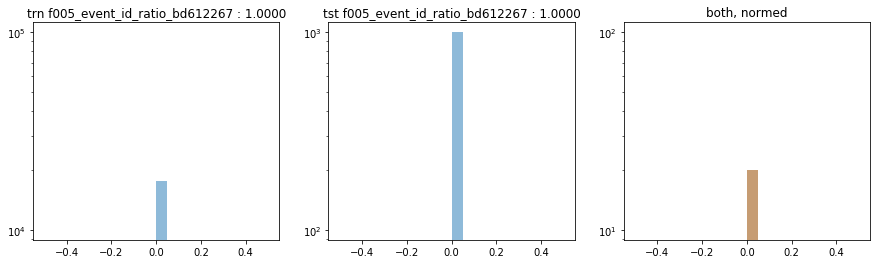

 ---------- f005_event_id_ratio_bd701df8 ---------- 


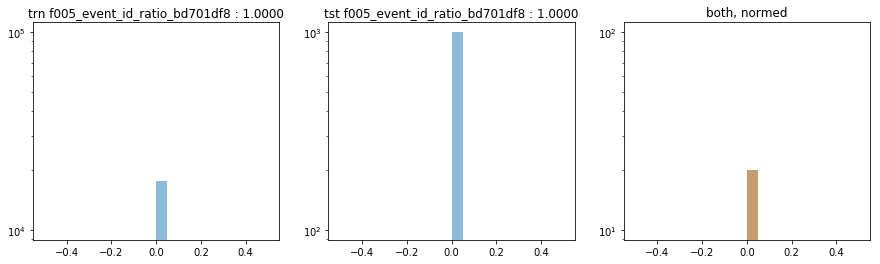

 ---------- f005_event_id_ratio_bdf49a58 ---------- 


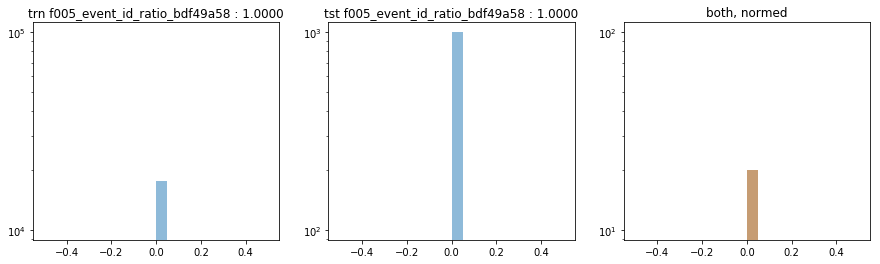

 ---------- f005_event_id_ratio_beb0a7b9 ---------- 


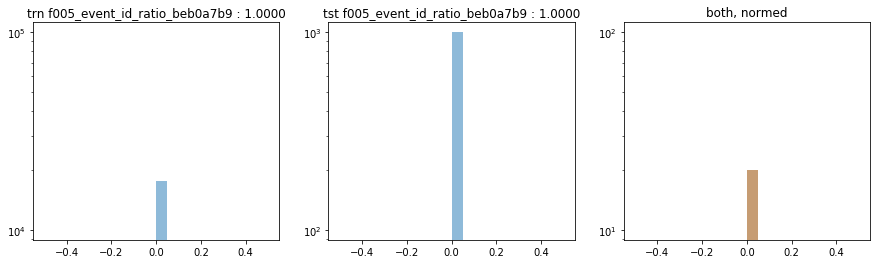

 ---------- f005_event_id_ratio_c0415e5c ---------- 


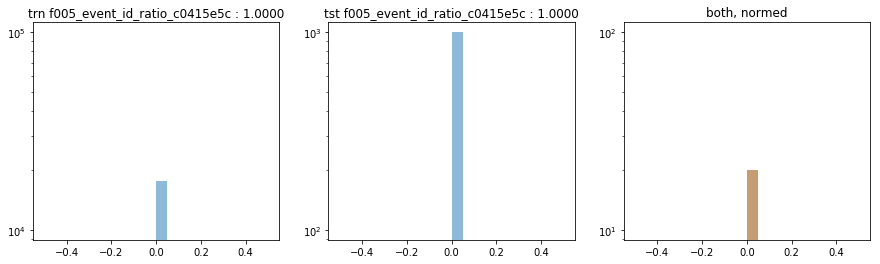

 ---------- f005_event_id_ratio_c189aaf2 ---------- 


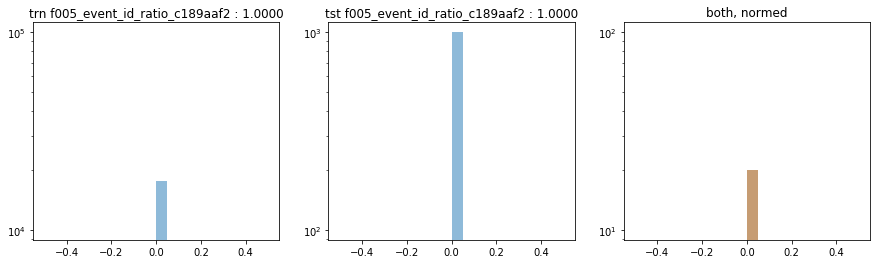

 ---------- f005_event_id_ratio_c1cac9a2 ---------- 


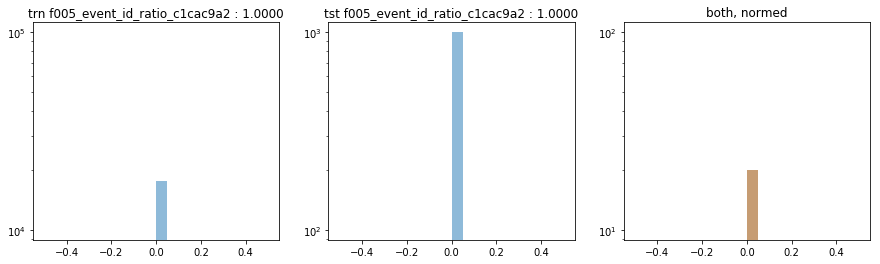

 ---------- f005_event_id_ratio_c277e121 ---------- 


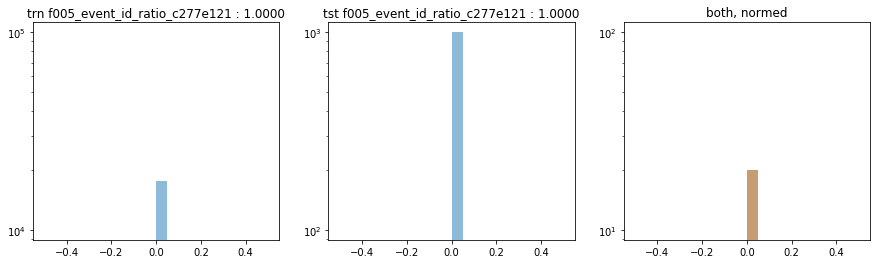

 ---------- f005_event_id_ratio_c2baf0bd ---------- 


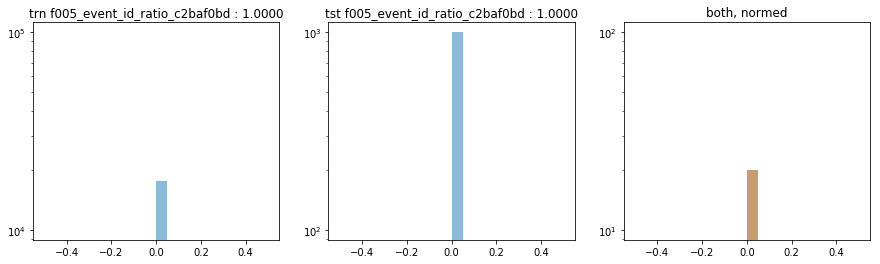

 ---------- f005_event_id_ratio_c51d8688 ---------- 


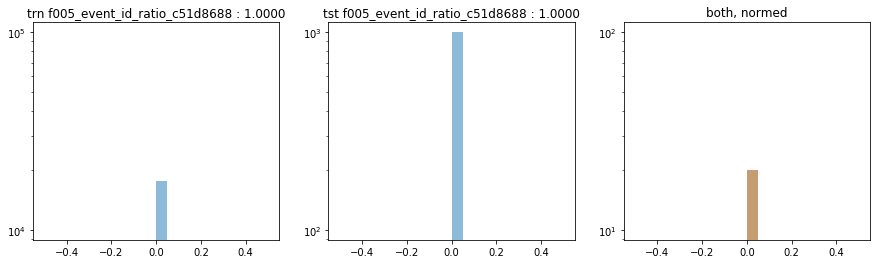

 ---------- f005_event_id_ratio_c54cf6c5 ---------- 


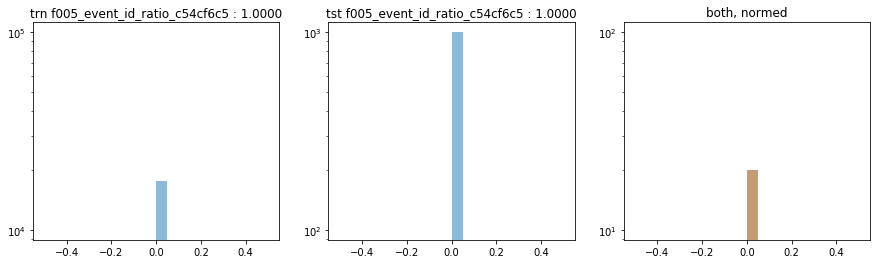

 ---------- f005_event_id_ratio_c58186bf ---------- 


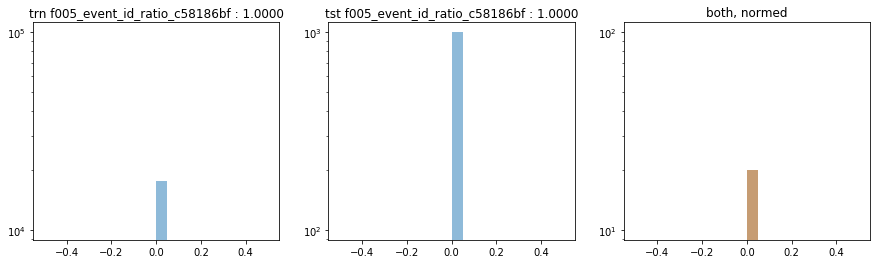

 ---------- f005_event_id_ratio_c6971acf ---------- 


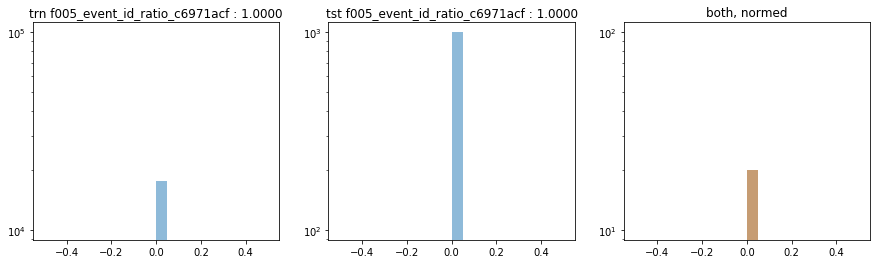

 ---------- f005_event_id_ratio_c7128948 ---------- 


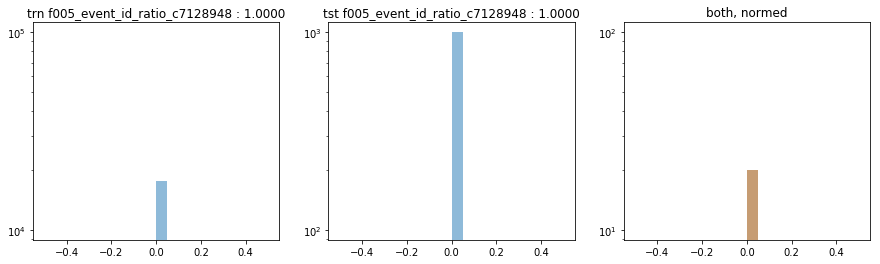

 ---------- f005_event_id_ratio_c74f40cd ---------- 


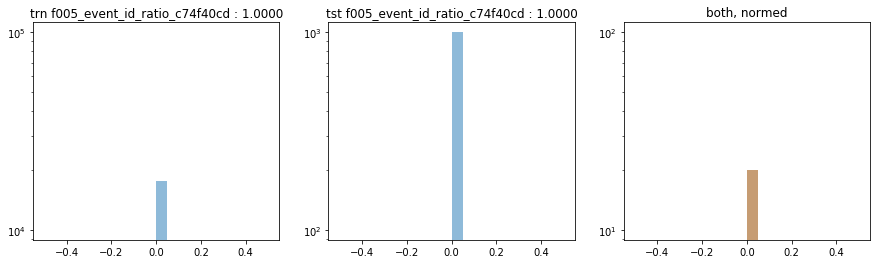

 ---------- f005_event_id_ratio_c7f7f0e1 ---------- 


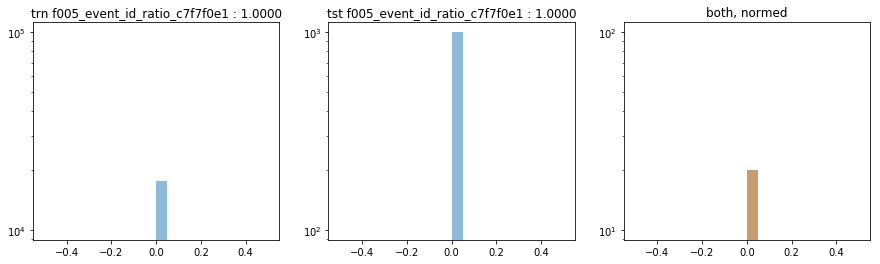

 ---------- f005_event_id_ratio_c7fe2a55 ---------- 


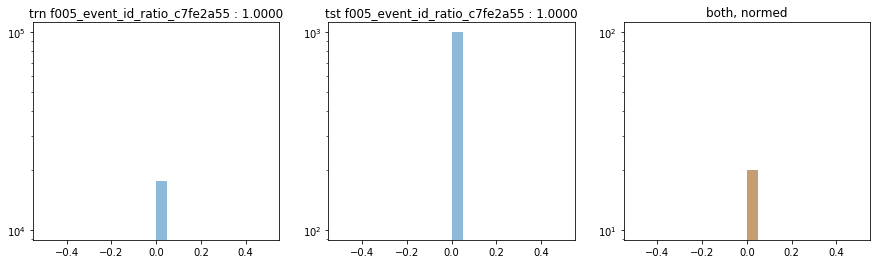

 ---------- f005_event_id_ratio_c952eb01 ---------- 


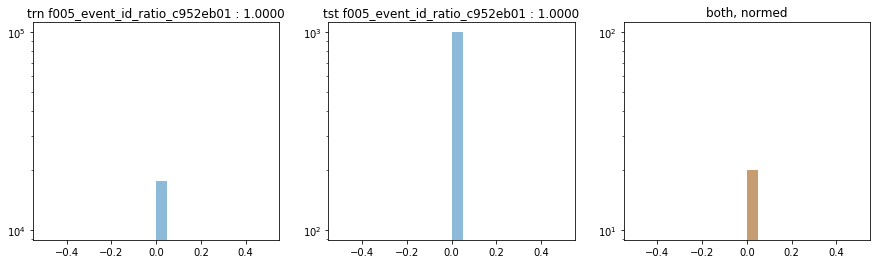

 ---------- f005_event_id_ratio_ca11f653 ---------- 


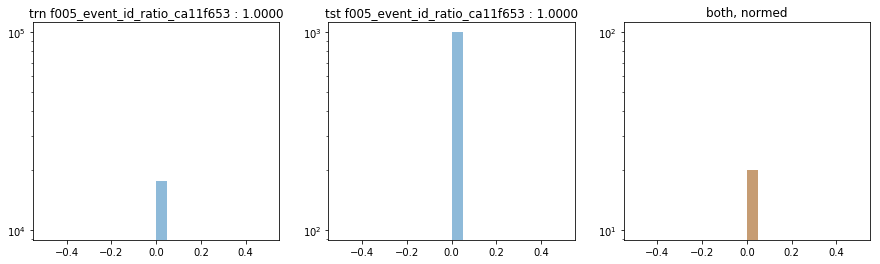

 ---------- f005_event_id_ratio_cb1178ad ---------- 


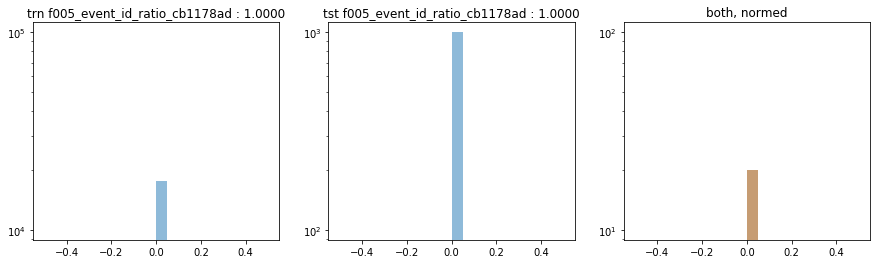

 ---------- f005_event_id_ratio_cb6010f8 ---------- 


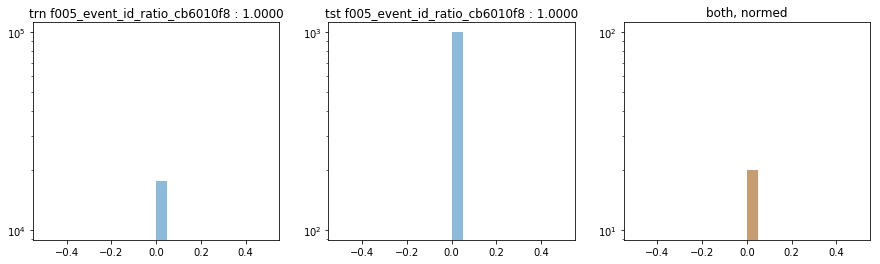

 ---------- f005_event_id_ratio_cc5087a3 ---------- 


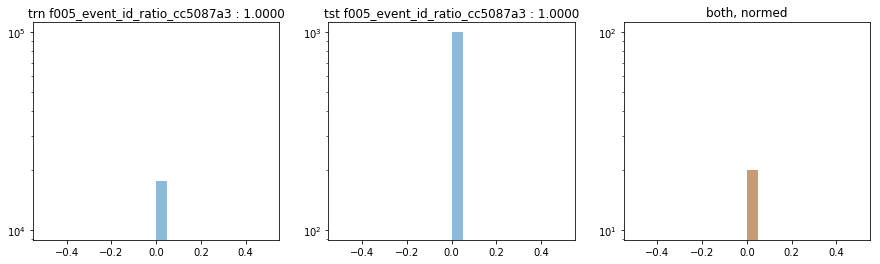

 ---------- f005_event_id_ratio_cdd22e43 ---------- 


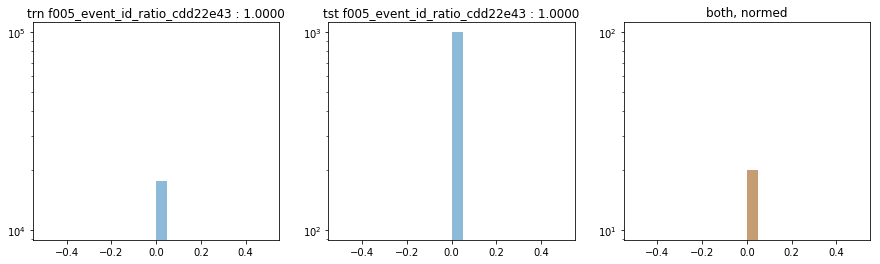

 ---------- f005_event_id_ratio_cf7638f3 ---------- 


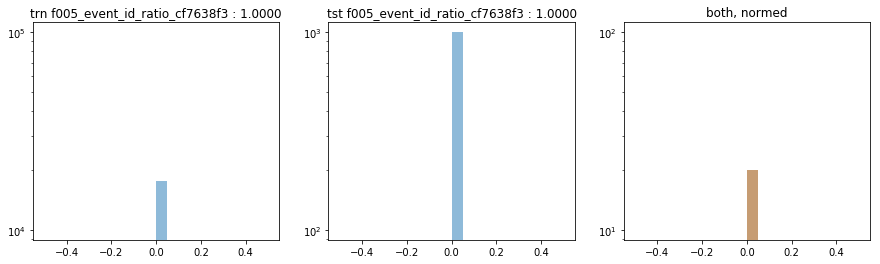

 ---------- f005_event_id_ratio_cf82af56 ---------- 


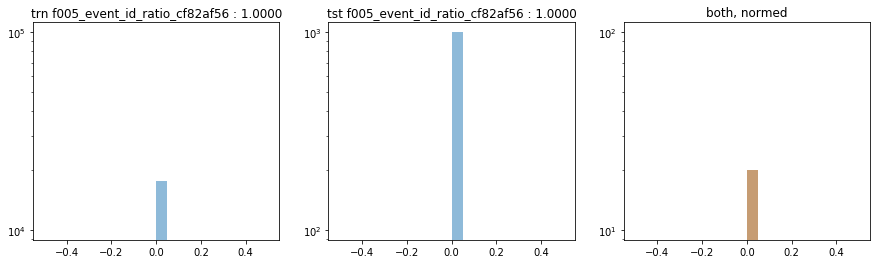

 ---------- f005_event_id_ratio_cfbd47c8 ---------- 


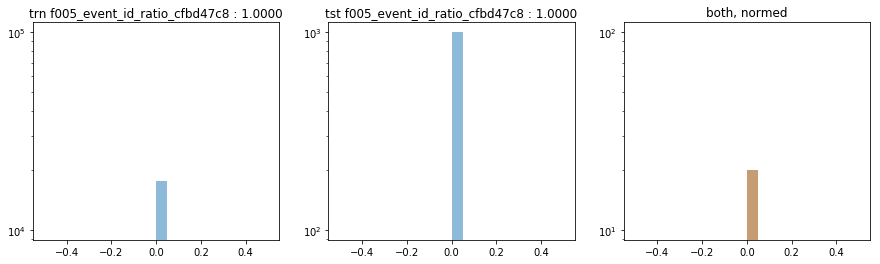

 ---------- f005_event_id_ratio_d02b7a8e ---------- 


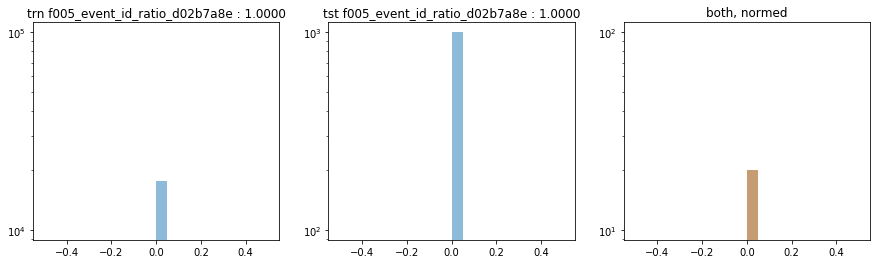

 ---------- f005_event_id_ratio_d06f75b5 ---------- 


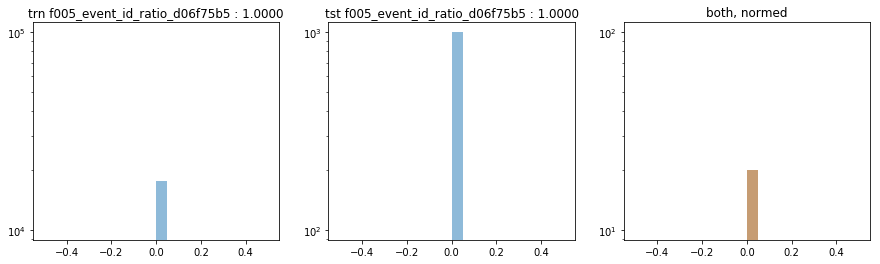

 ---------- f005_event_id_ratio_d122731b ---------- 


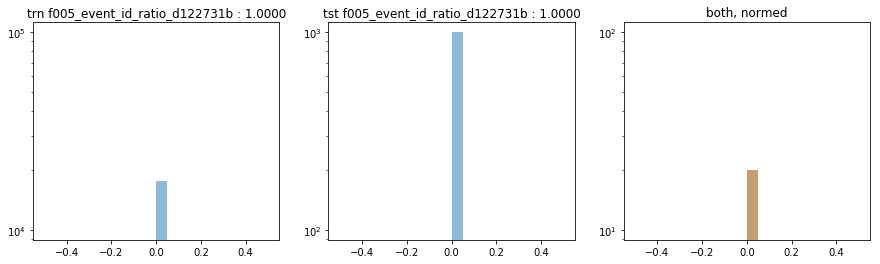

 ---------- f005_event_id_ratio_d185d3ea ---------- 


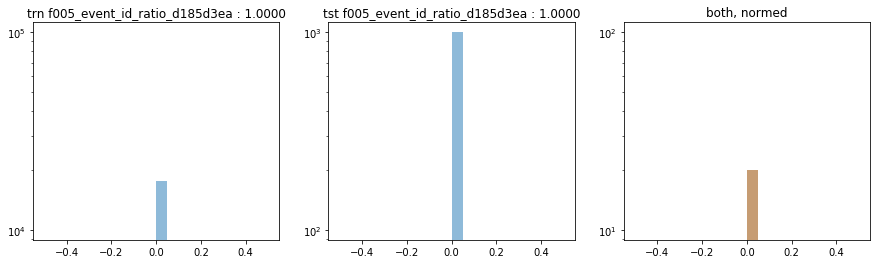

 ---------- f005_event_id_ratio_d2278a3b ---------- 


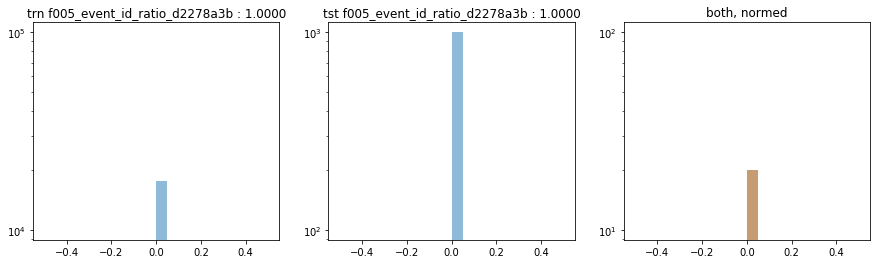

 ---------- f005_event_id_ratio_d2659ab4 ---------- 


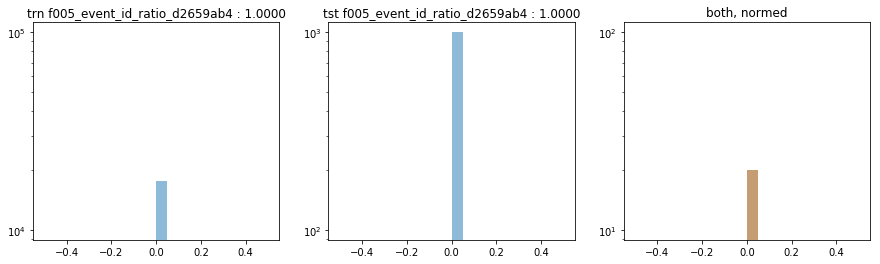

 ---------- f005_event_id_ratio_d2e9262e ---------- 


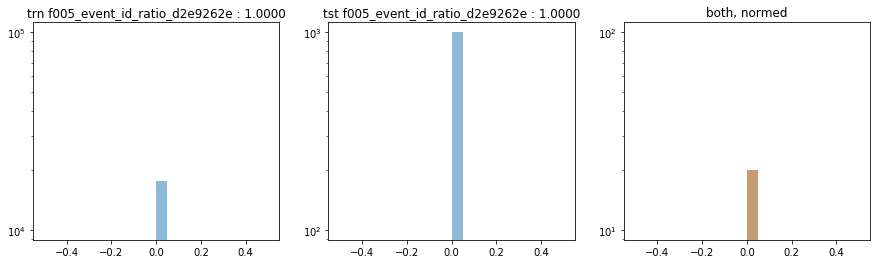

 ---------- f005_event_id_ratio_d3268efa ---------- 


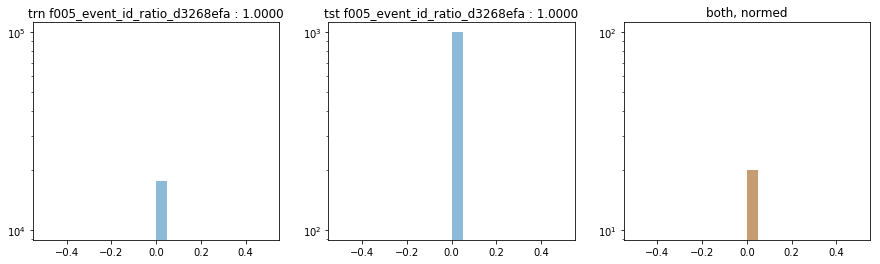

 ---------- f005_event_id_ratio_d3640339 ---------- 


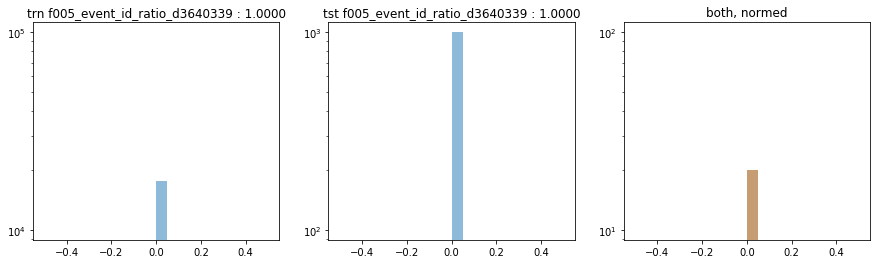

 ---------- f005_event_id_ratio_d38c2fd7 ---------- 


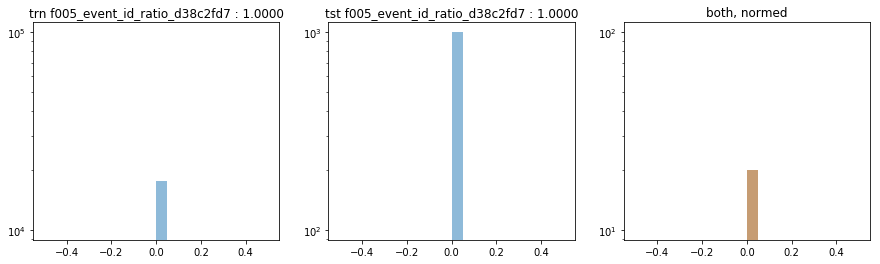

 ---------- f005_event_id_ratio_d3f1e122 ---------- 


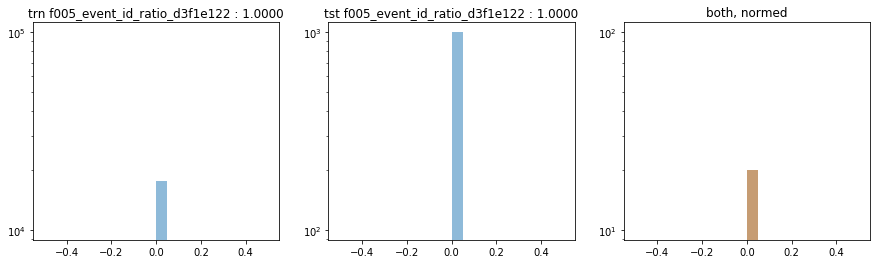

 ---------- f005_event_id_ratio_d45ed6a1 ---------- 


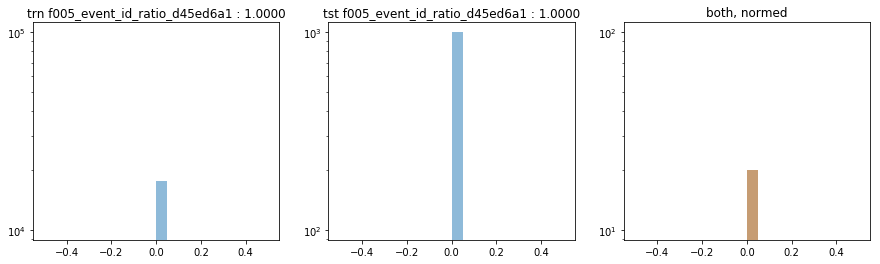

 ---------- f005_event_id_ratio_d51b1749 ---------- 


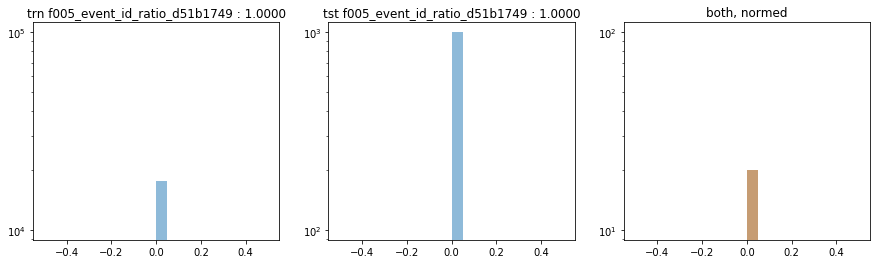

 ---------- f005_event_id_ratio_d88ca108 ---------- 


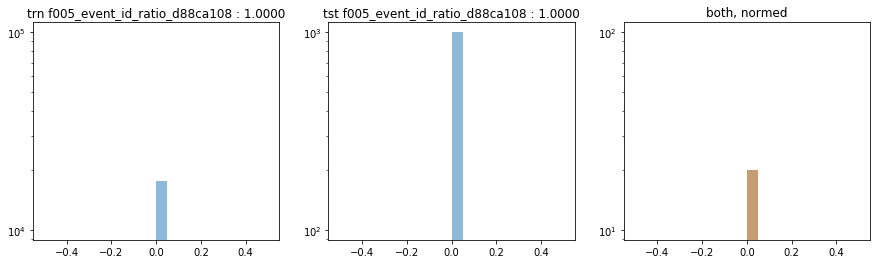

 ---------- f005_event_id_ratio_d88e8f25 ---------- 


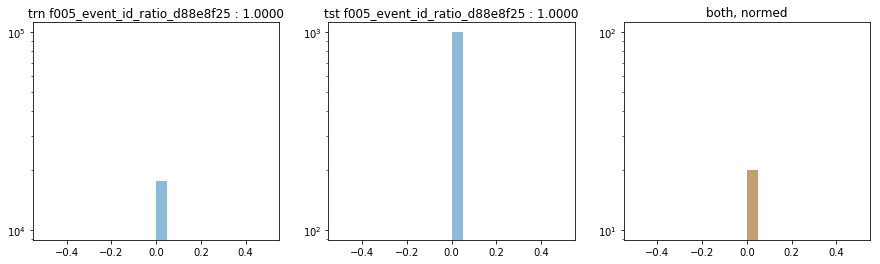

 ---------- f005_event_id_ratio_d9c005dd ---------- 


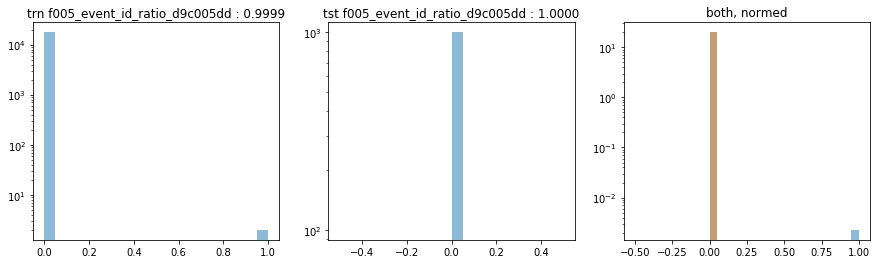

 ---------- f005_event_id_ratio_daac11b0 ---------- 


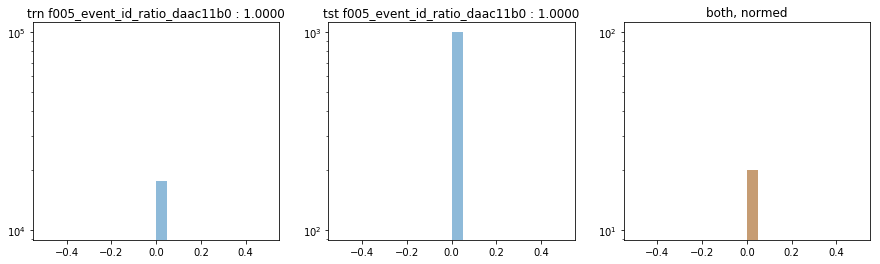

 ---------- f005_event_id_ratio_db02c830 ---------- 


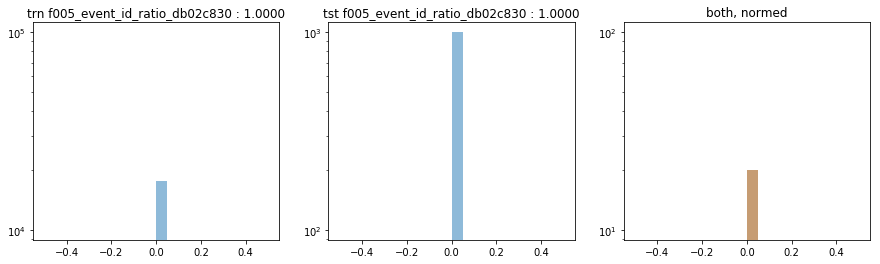

 ---------- f005_event_id_ratio_dcaede90 ---------- 


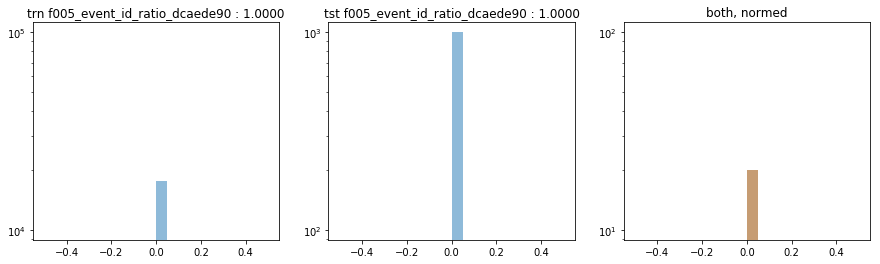

 ---------- f005_event_id_ratio_dcb55a27 ---------- 


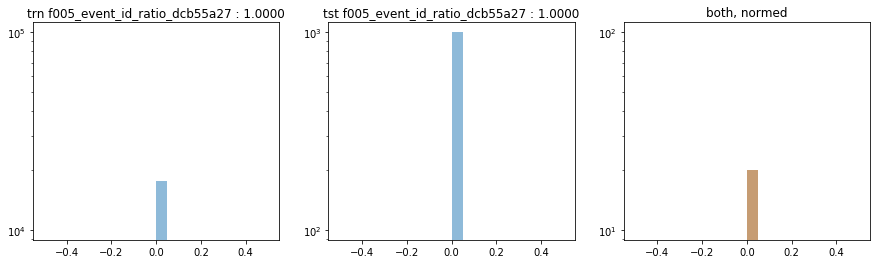

 ---------- f005_event_id_ratio_de26c3a6 ---------- 


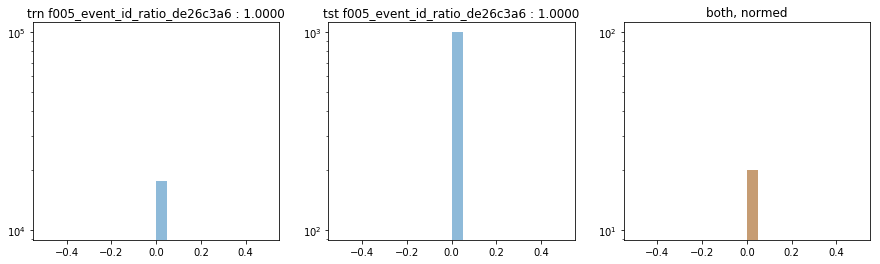

 ---------- f005_event_id_ratio_df4940d3 ---------- 


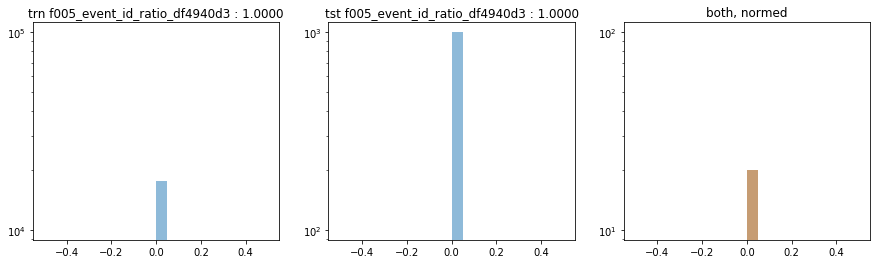

 ---------- f005_event_id_ratio_df4fe8b6 ---------- 


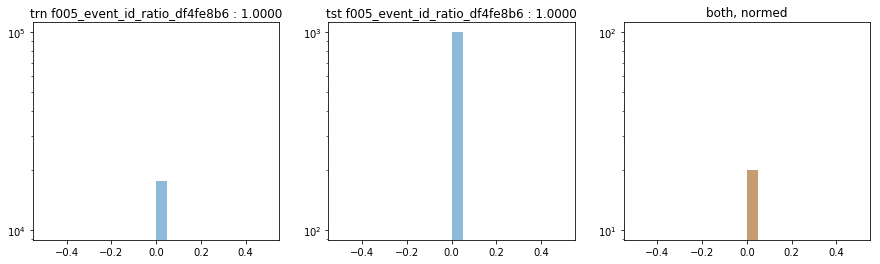

 ---------- f005_event_id_ratio_e04fb33d ---------- 


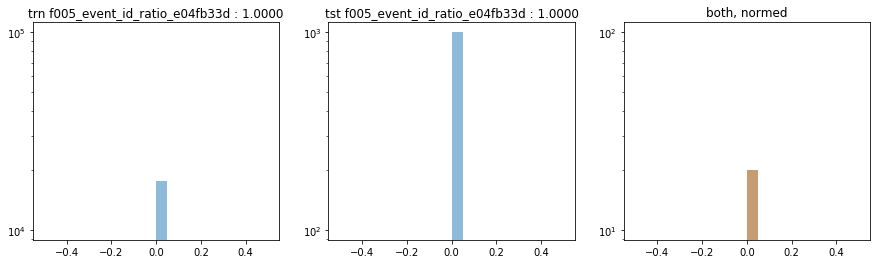

 ---------- f005_event_id_ratio_e080a381 ---------- 


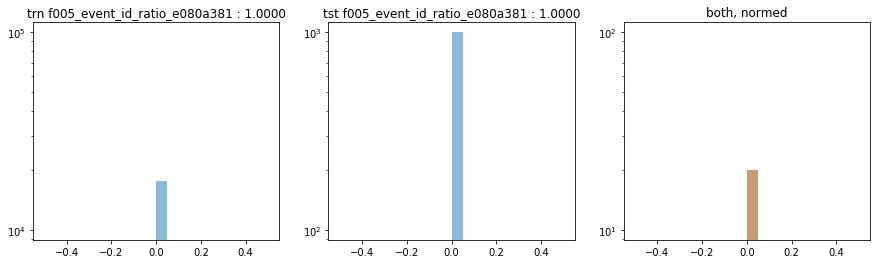

 ---------- f005_event_id_ratio_e37a2b78 ---------- 


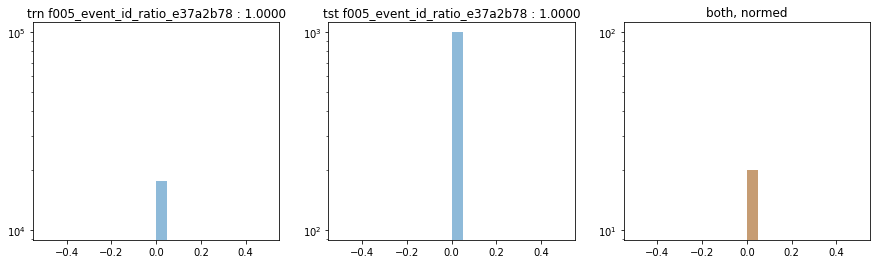

 ---------- f005_event_id_ratio_e3ff61fb ---------- 


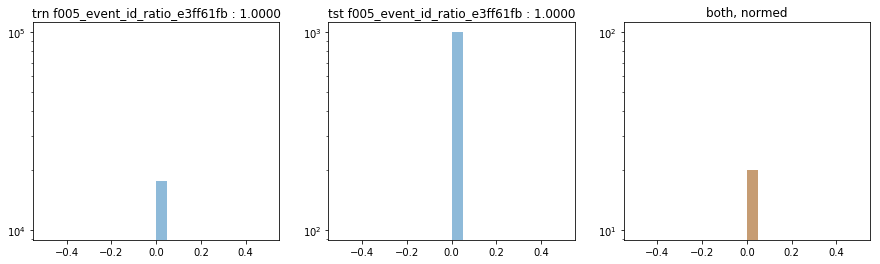

 ---------- f005_event_id_ratio_e4f1efe6 ---------- 


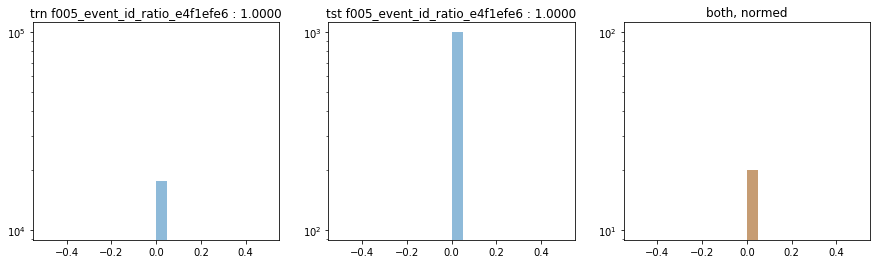

 ---------- f005_event_id_ratio_e5734469 ---------- 


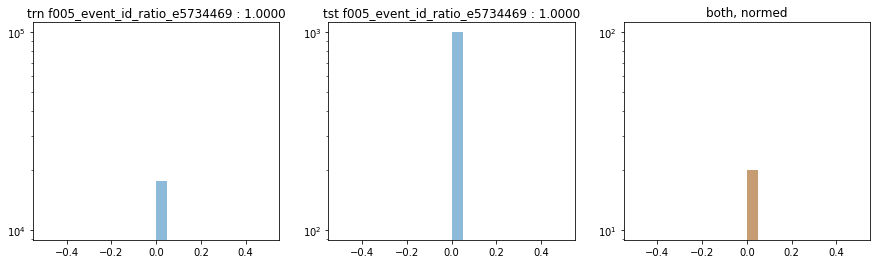

 ---------- f005_event_id_ratio_e57dd7af ---------- 


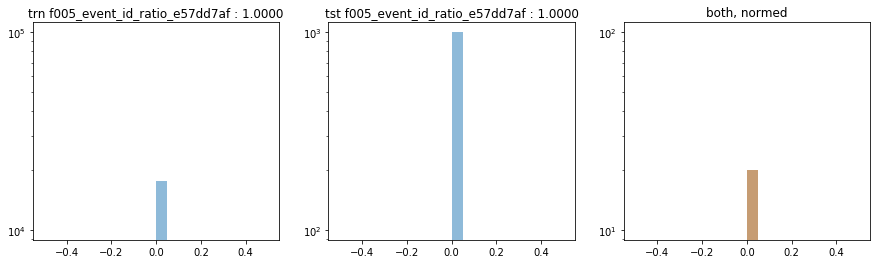

 ---------- f005_event_id_ratio_e5c9df6f ---------- 


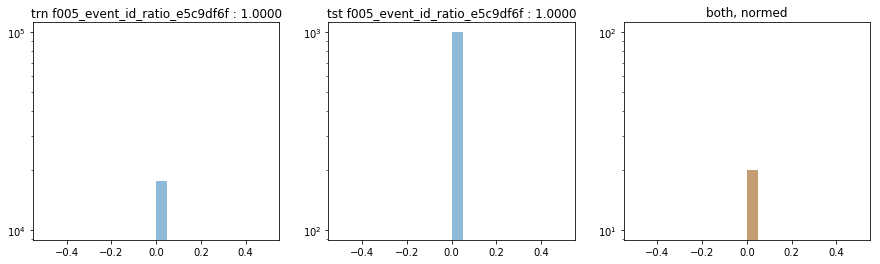

 ---------- f005_event_id_ratio_e64e2cfd ---------- 


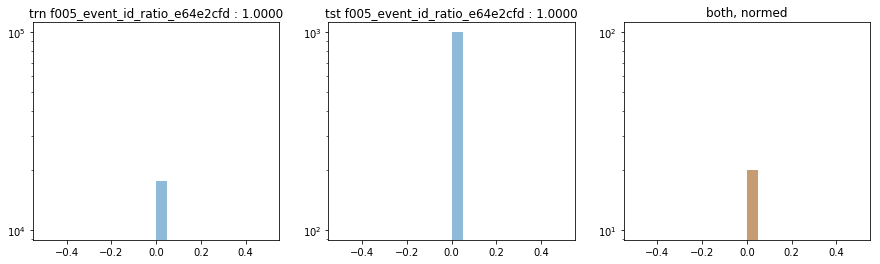

 ---------- f005_event_id_ratio_e694a35b ---------- 


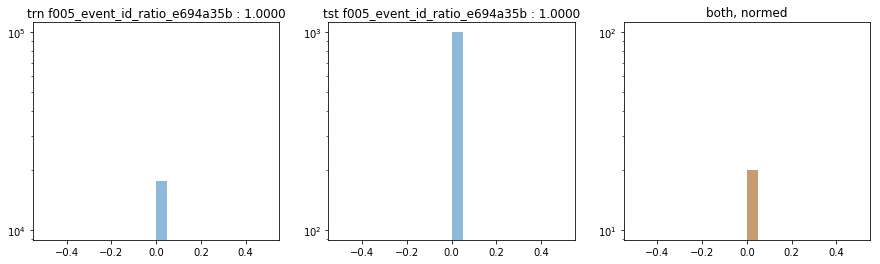

 ---------- f005_event_id_ratio_e720d930 ---------- 


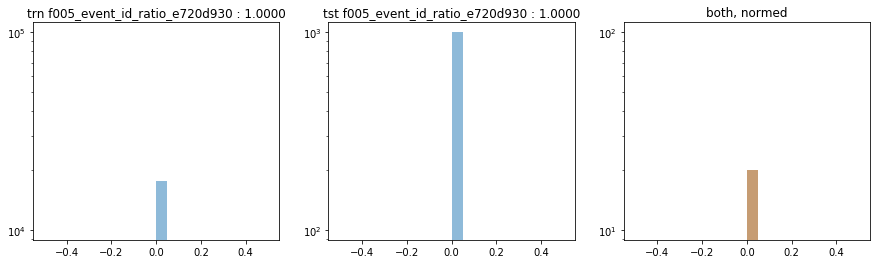

 ---------- f005_event_id_ratio_e7561dd2 ---------- 


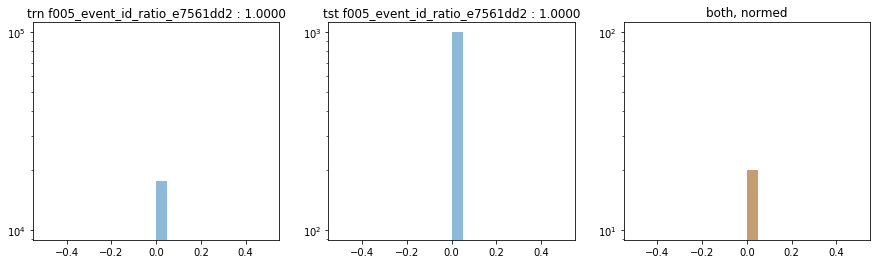

 ---------- f005_event_id_ratio_e79f3763 ---------- 


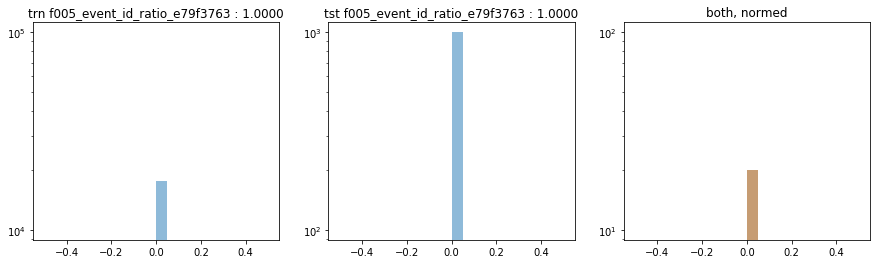

 ---------- f005_event_id_ratio_e7e44842 ---------- 


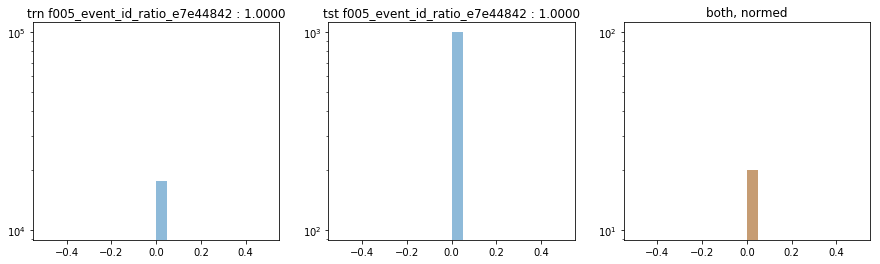

 ---------- f005_event_id_ratio_e9c52111 ---------- 


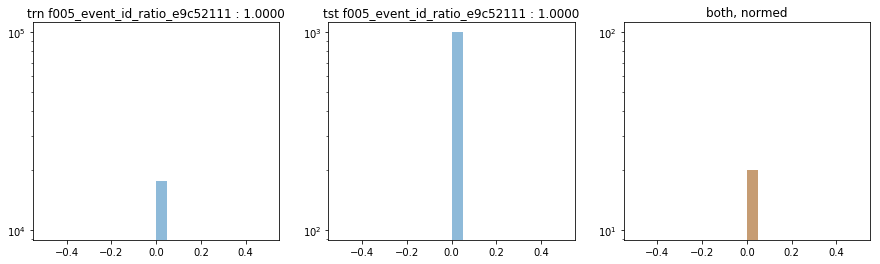

 ---------- f005_event_id_ratio_ea296733 ---------- 


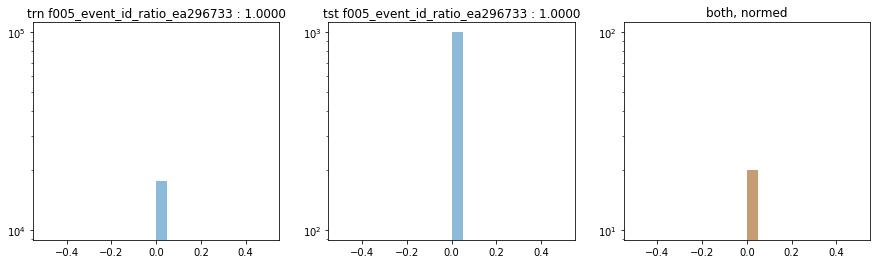

 ---------- f005_event_id_ratio_ea321fb1 ---------- 


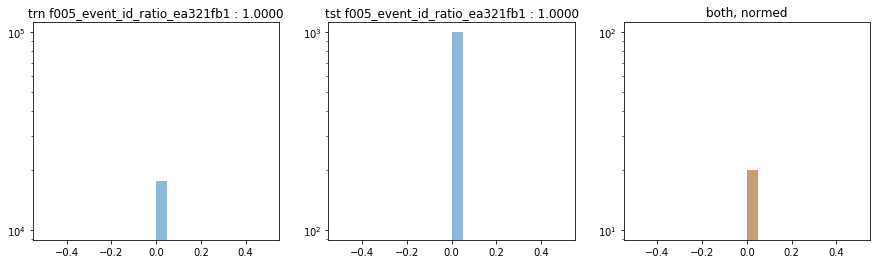

 ---------- f005_event_id_ratio_eb2c19cd ---------- 


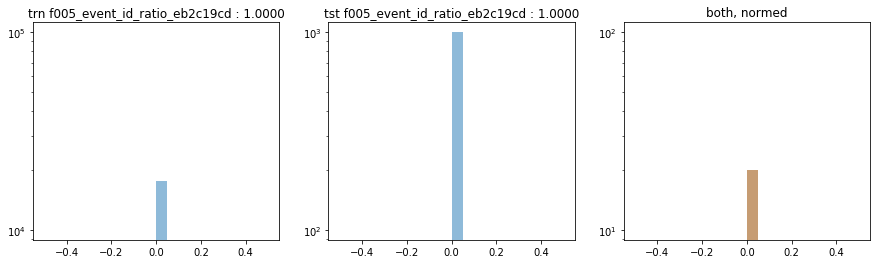

 ---------- f005_event_id_ratio_ec138c1c ---------- 


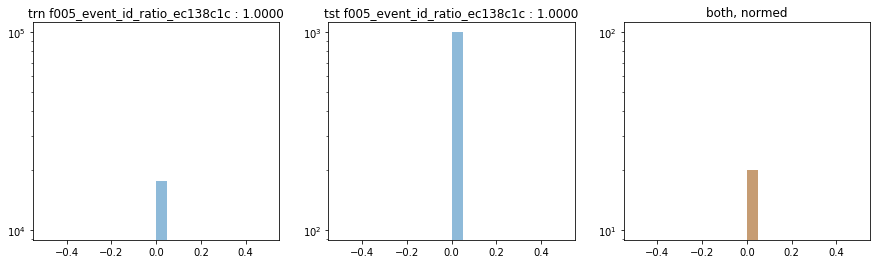

 ---------- f005_event_id_ratio_ecaab346 ---------- 


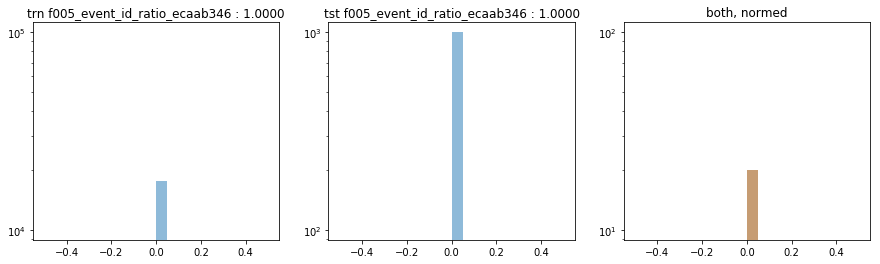

 ---------- f005_event_id_ratio_ecc36b7f ---------- 


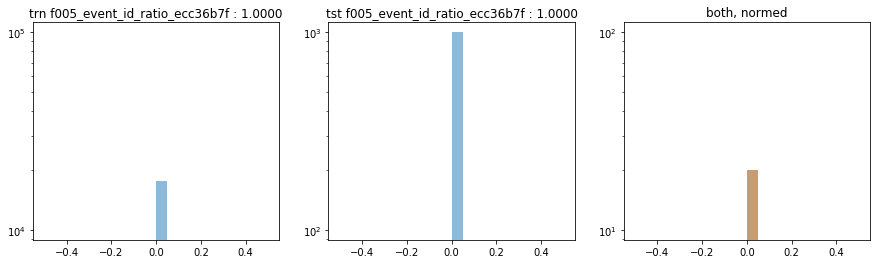

 ---------- f005_event_id_ratio_f28c589a ---------- 


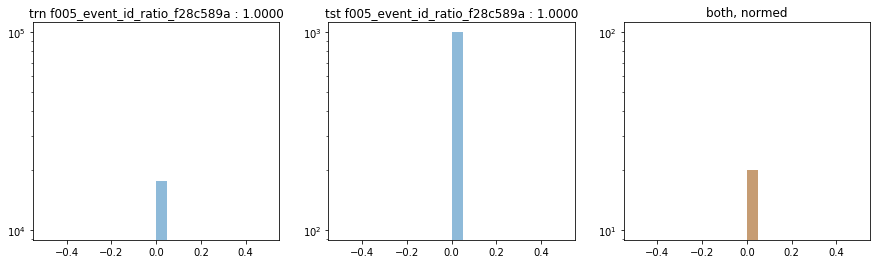

 ---------- f005_event_id_ratio_f32856e4 ---------- 


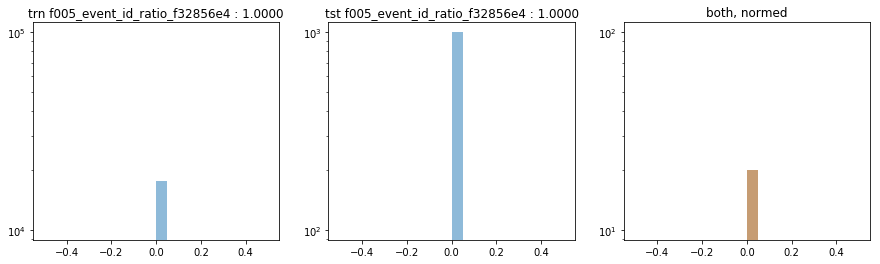

 ---------- f005_event_id_ratio_f3cd5473 ---------- 


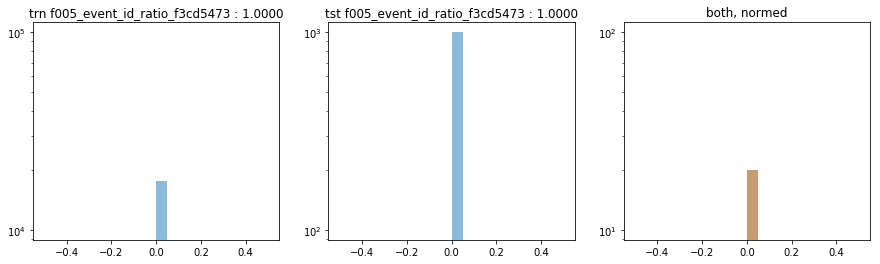

 ---------- f005_event_id_ratio_f50fc6c1 ---------- 


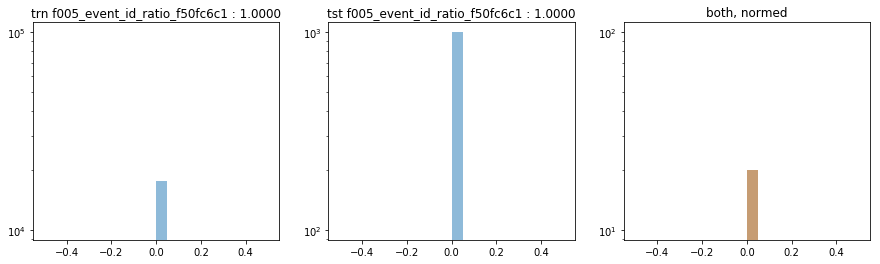

 ---------- f005_event_id_ratio_f54238ee ---------- 


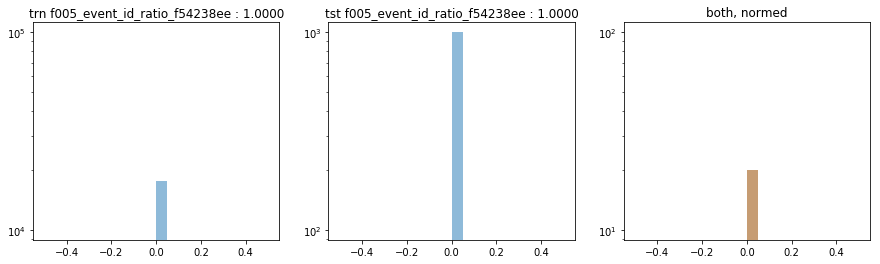

 ---------- f005_event_id_ratio_f56e0afc ---------- 


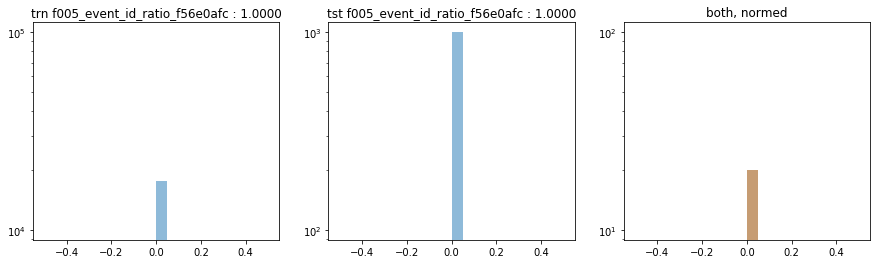

 ---------- f005_event_id_ratio_f5b8c21a ---------- 


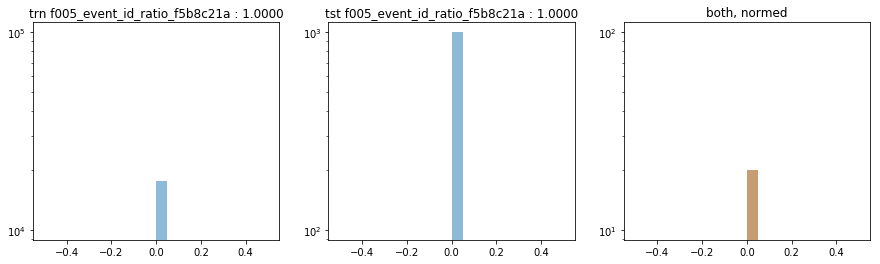

 ---------- f005_event_id_ratio_f6947f54 ---------- 


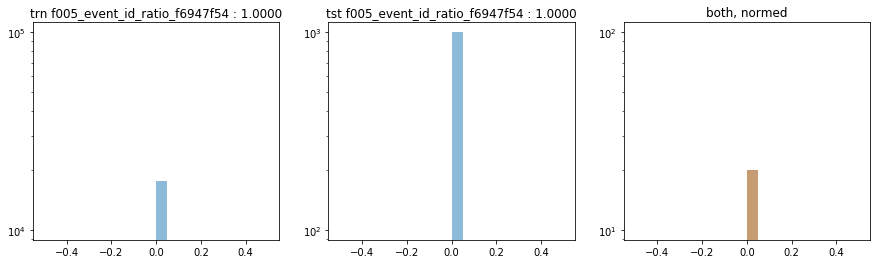

 ---------- f005_event_id_ratio_f71c4741 ---------- 


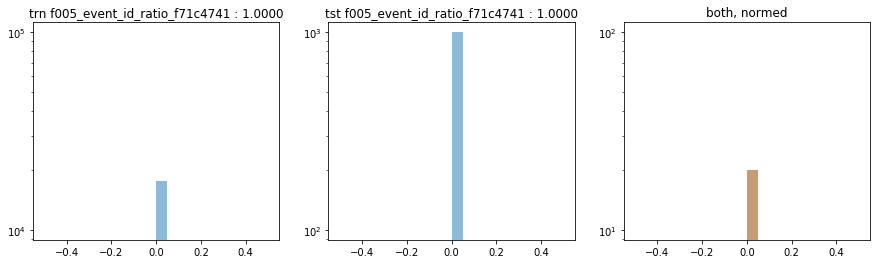

 ---------- f005_event_id_ratio_f7e47413 ---------- 


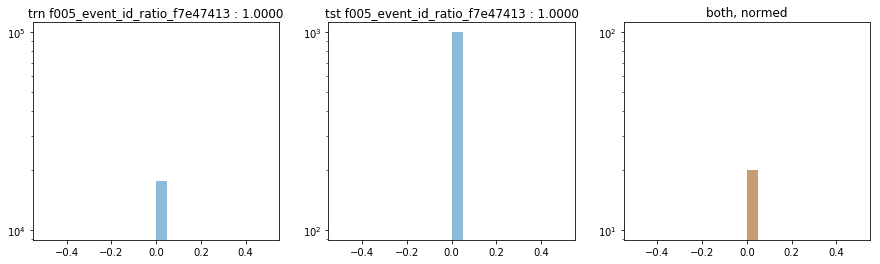

 ---------- f005_event_id_ratio_f806dc10 ---------- 


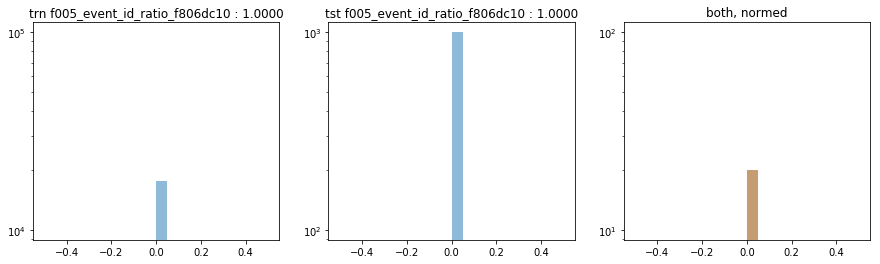

 ---------- f005_event_id_ratio_f93fc684 ---------- 


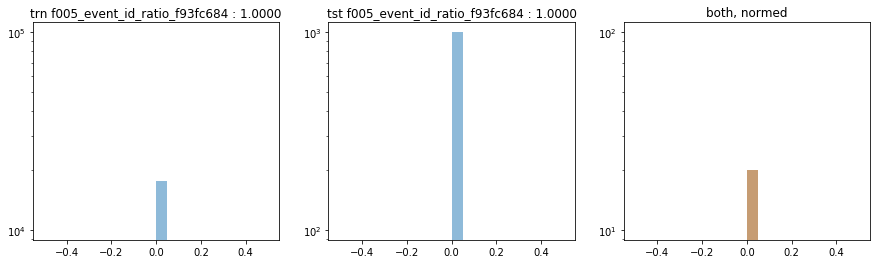

 ---------- f005_event_id_ratio_fbaf3456 ---------- 


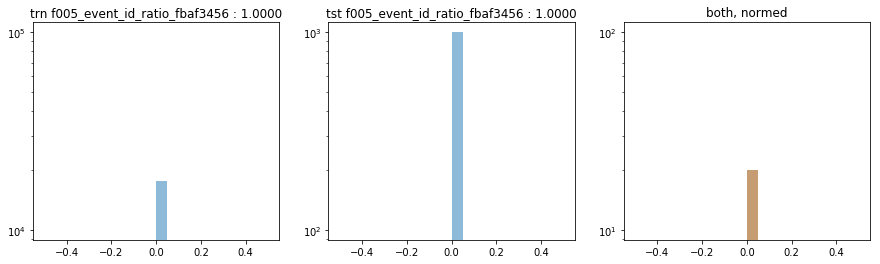

 ---------- f005_event_id_ratio_fcfdffb6 ---------- 


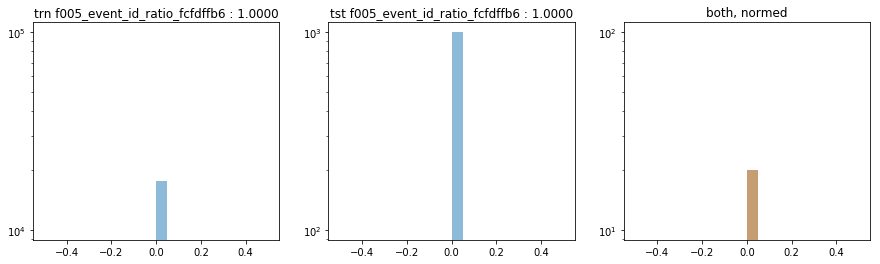

 ---------- f005_event_id_ratio_fd20ea40 ---------- 


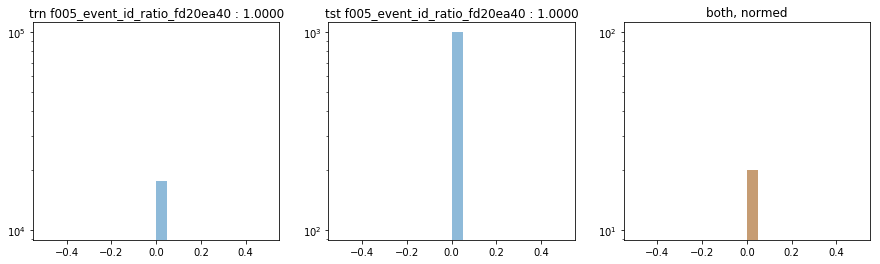

In [54]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

In [ ]:
bad_feats = [
    'prev_gs_duration', 'session_intervalrmin', 'session_intervalrstd', 'session_intervalrmax', 'session_interval', 'accum_acc_gr_-99',
    'session_intervalrmean', 'ass_session_interval', 'prev_gs_durationrmean', 'prev_gs_durationrmax',
    'ev_cnt4070', 'prev_gs_durationrstd', 'mean_g_duration_meaan', 'ev_cnt3010', 'g_duration_std', 'ev_cnt4030', 'ev_cnt3110',
    'g_duration_mean', 'meaan_g_duration_min', 'ass_session_interval_rmin', 'accum_acc_gr_3', 'g_duration_min', 'mean_g_duraation_std',
    'Air Show', 'All Star Sorting', 'Bird Measurer (Assessment)', 'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)', 'Chicken Balancer (Activity)',
    'Crystals Rule', 'Dino Dive', 'Dino Drink', 'Egg Dropper (Activity)', 'Happy Camel', 'Leaf Leader', 'Mushroom Sorter (Assessment)', 'Pan Balance', 'Sandcastle Builder (Activity)',
    'title_type_cnt_12 Monkeys_Clip', 'title_type_cnt_Air Show_Game', 'title_type_cnt_All Star Sorting_Game', 'cumsum_num_correct_Cart Balancer (Assessment)', 
    'cumsum_num_correct_Cauldron Filler (Assessment)', 'cumsum_num_correct_Chest Sorter (Assessment)', 'cumsum_num_correct_Mushroom Sorter (Assessment)', 
    'cumsum_num_incorrect_Bird Measurer (Assessment)', 'cumsum_num_incorrect_Cart Balancer (Assessment)', 'cumsum_num_incorrect_Cauldron Filler (Assessment)', 
    'cumsum_num_incorrect_Chest Sorter (Assessment)', 'cumsum_num_incorrect_Mushroom Sorter (Assessment)', ''
]